# Amazon Employee Access Challenge

### About the data

The data consist of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees.

### File Descriptions

**train.csv** - The training set. Each row has the ACTION (ground truth), Resource and information about the employee's role at the time of approval

**test.csv** - The test set for which predictions should be made. Each row asks whether an employee having the listed characteristics should have access to the listed resource.

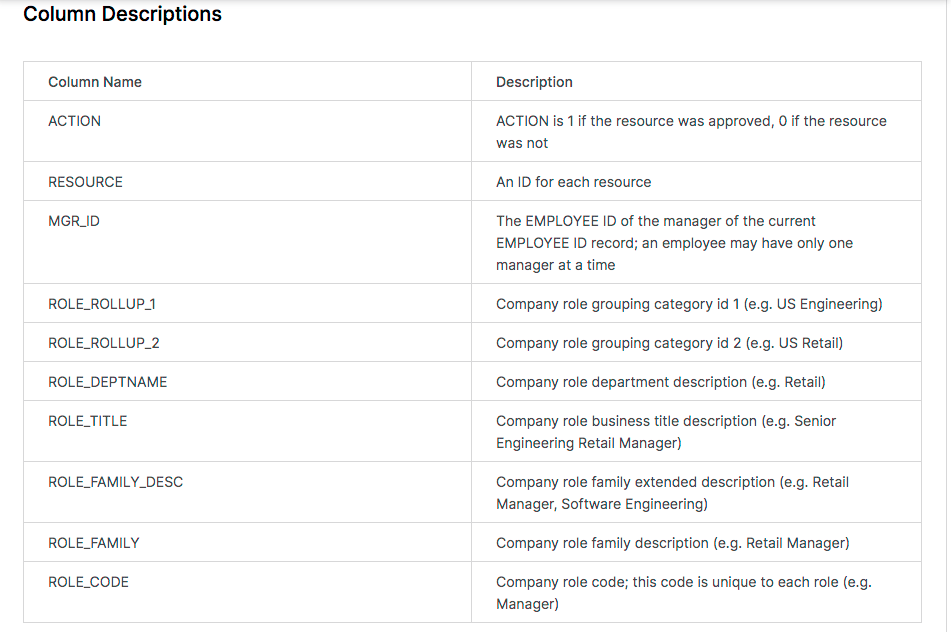

### import the libraries

In [1]:
from pyforest import*

### import the datasets


In [2]:
train = pd.read_csv("amazontrain.csv")
test = pd.read_csv("amazontest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
train.shape

(32769, 10)

In [13]:
test.shape

(58921, 10)

In [9]:
train.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [10]:
test.head()

id  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0   1     78766   72734         118079         118080         117878   
1   2     40644    4378         117961         118327         118507   
2   3     75443    2395         117961         118300         119488   
3   4     43219   19986         117961         118225         118403   
4   5     42093   50015         117961         118343         119598   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117879            118177        19721     117880  
1      118863            122008       118398     118865  
2      118172            301534       249618     118175  
3      120773            136187       118960     120774  
4      118422            300136       118424     118425

## CatBoost Model

In [11]:
!pip install catboost

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     --------------------------------------- 0.8/101.0 MB 26.8 MB/s eta 0:00:04
     - ------------------------------------- 3.9/101.0 MB 49.8 MB/s eta 0:00:02
     -- ------------------------------------ 6.9/101.0 MB 55.0 MB/s eta 0:00:02
     --- ---------------------------------- 10.4/101.0 MB 65.6 MB/s eta 0:00:02
     ----- -------------------------------- 14.1/101.0 MB 72.6 MB/s eta 0:00:02
     ------ ------------------------------- 17.2/101.0 MB 72.6 MB/s eta 0:00:02
     ------- ------------------------------ 20.3/101.0 MB 72.6 MB/s eta 0:00:02
     --------- ---------------------------- 24.0/101.0 MB 72.6 MB/s eta 0:00:02
     ---------- --------------------------- 27.2/101.0 MB 73.1 MB/s eta 0:00:02
     ----------- -------------------------- 30.2/101.0 MB 73.1 MB/s eta 0:00:01
     ------------ ------------------------- 33.6/101.0 MB 65.6 MB/s eta 0:00:02
     ------------- ------------------------ 36.

#### LOADING THE LIBRARIES

In [3]:
from catboost.datasets import amazon

# create a train and test set

traindf , testdf = amazon()

In [4]:
traindf.shape, testdf.shape

((32769, 10), (58921, 10))

In [5]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [6]:
# apply lamda to train data set
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

### Distribution of Features

**Displot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

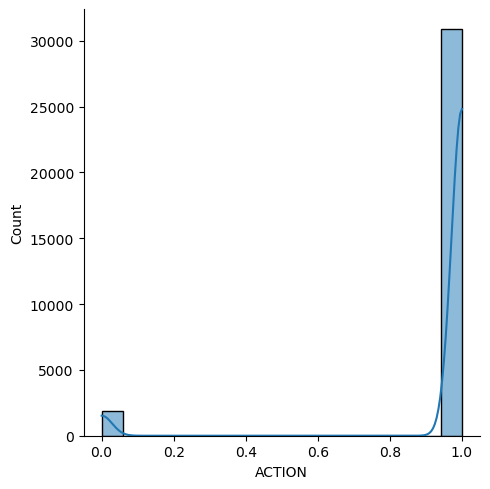

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

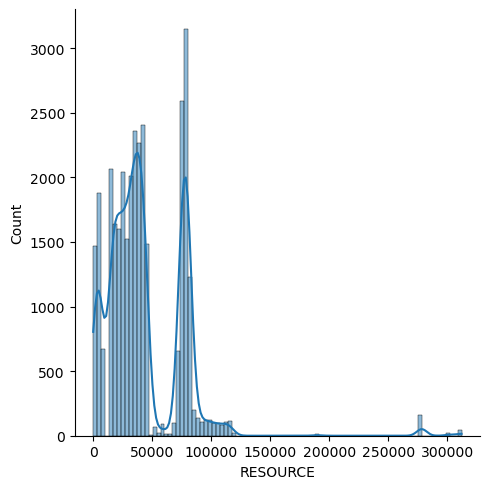

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

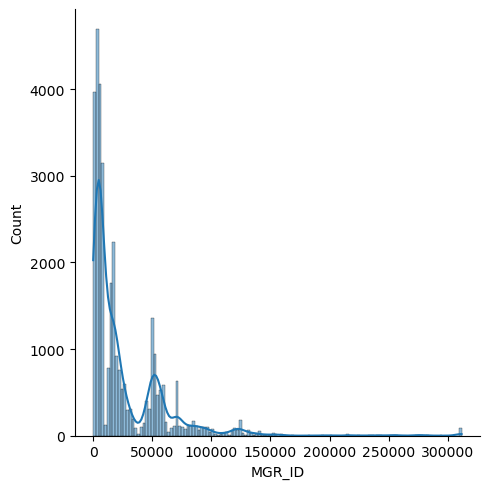

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

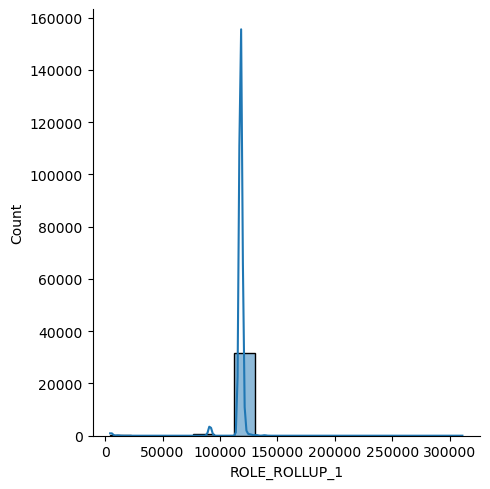

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

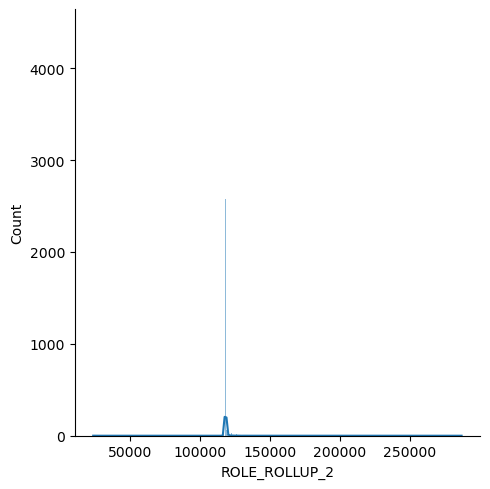

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

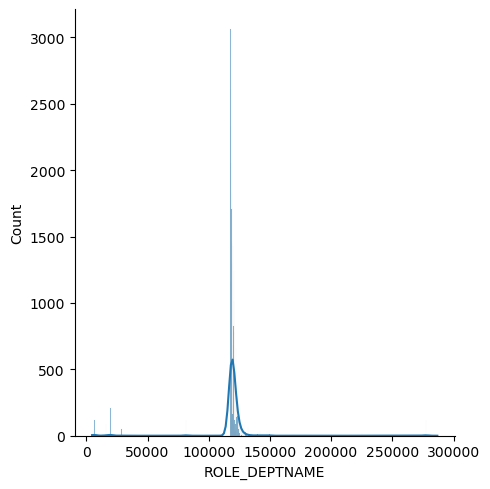

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

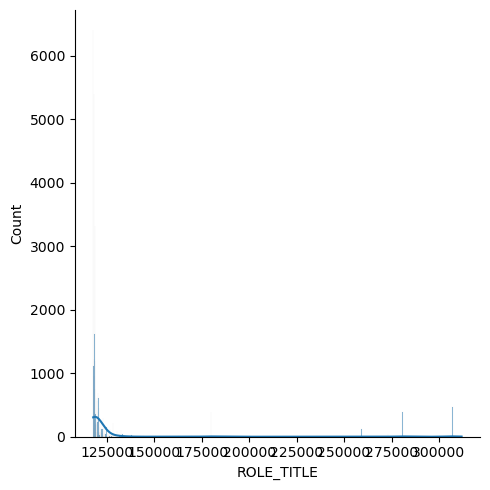

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

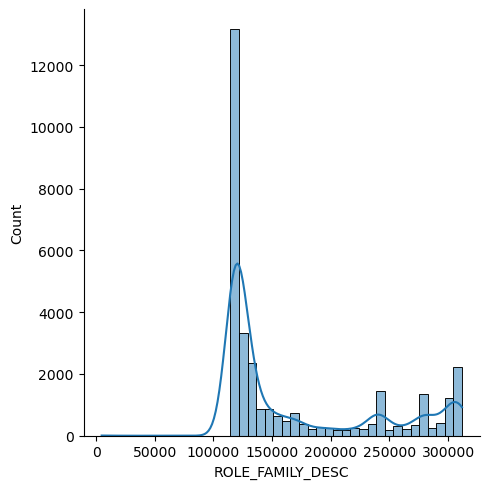

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

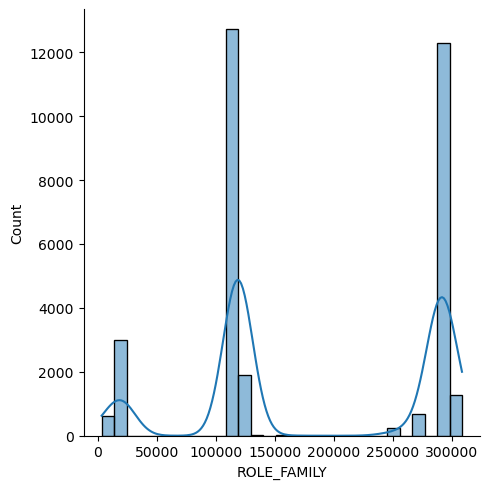

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

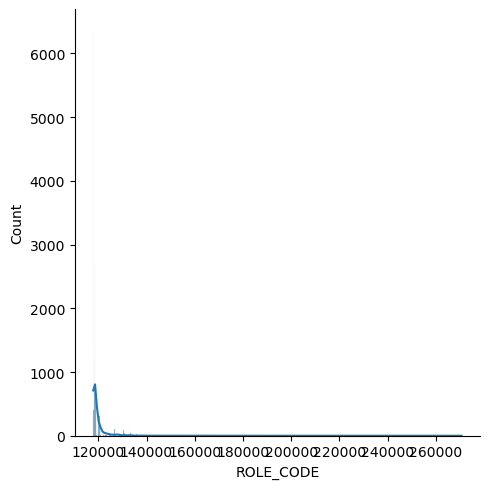

In [9]:
for i in traindf.describe().columns:
    sns.displot(traindf[i].dropna(), kde=True)
    plt.show()

**Boxplot**

In [10]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

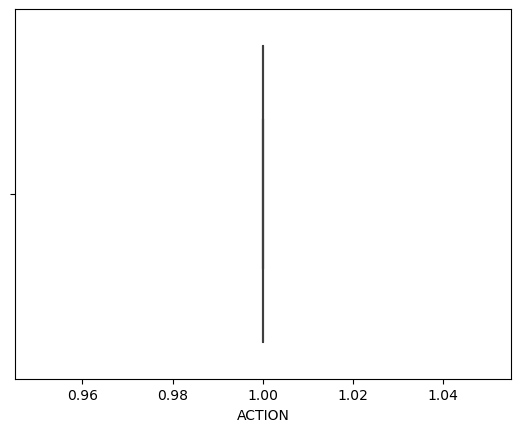

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

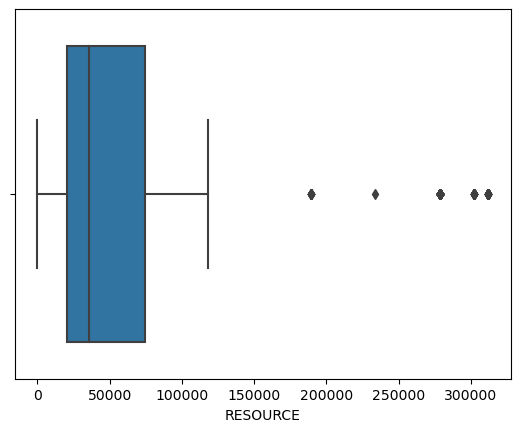

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

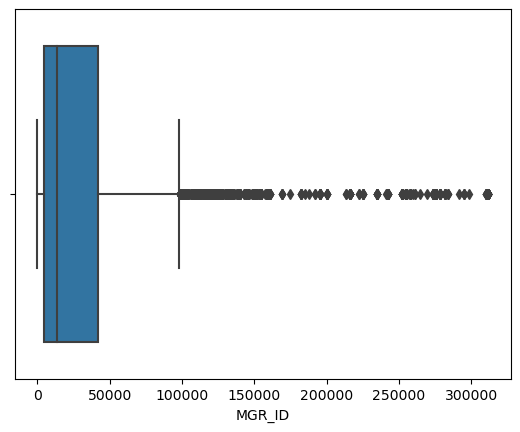

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

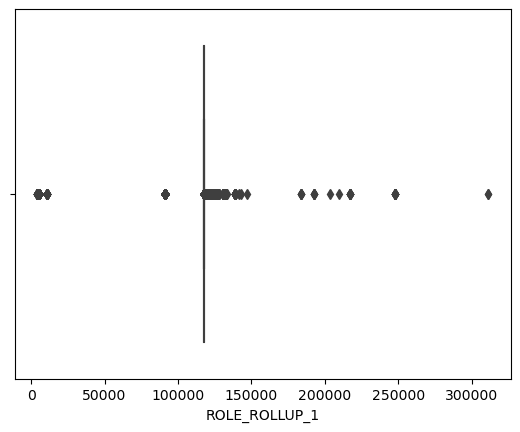

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

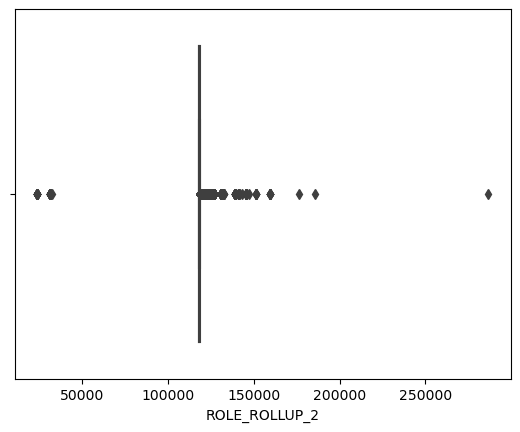

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

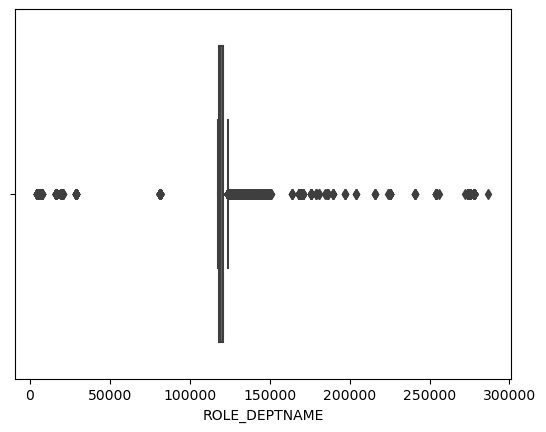

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

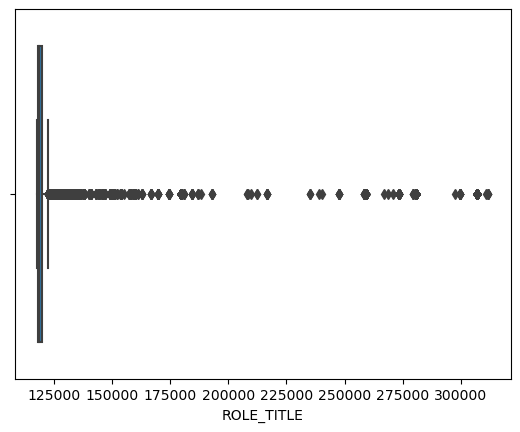

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

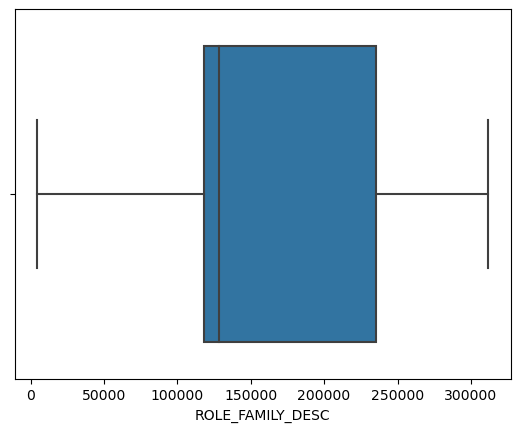

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

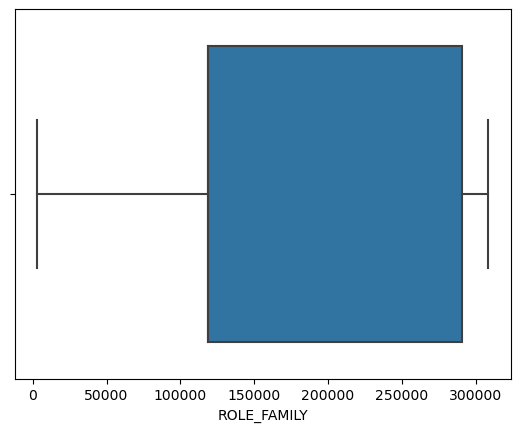

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

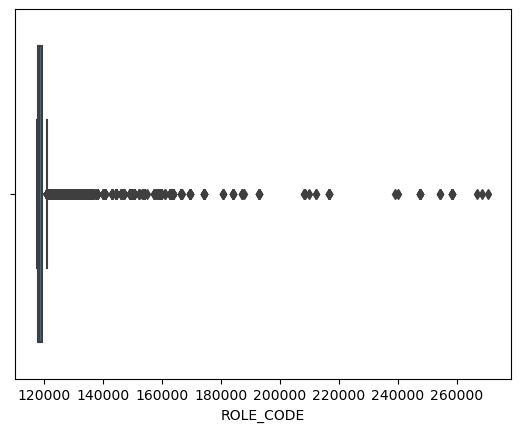

In [12]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna(),x=traindf[i])
    plt.show()

**HEATMAP**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

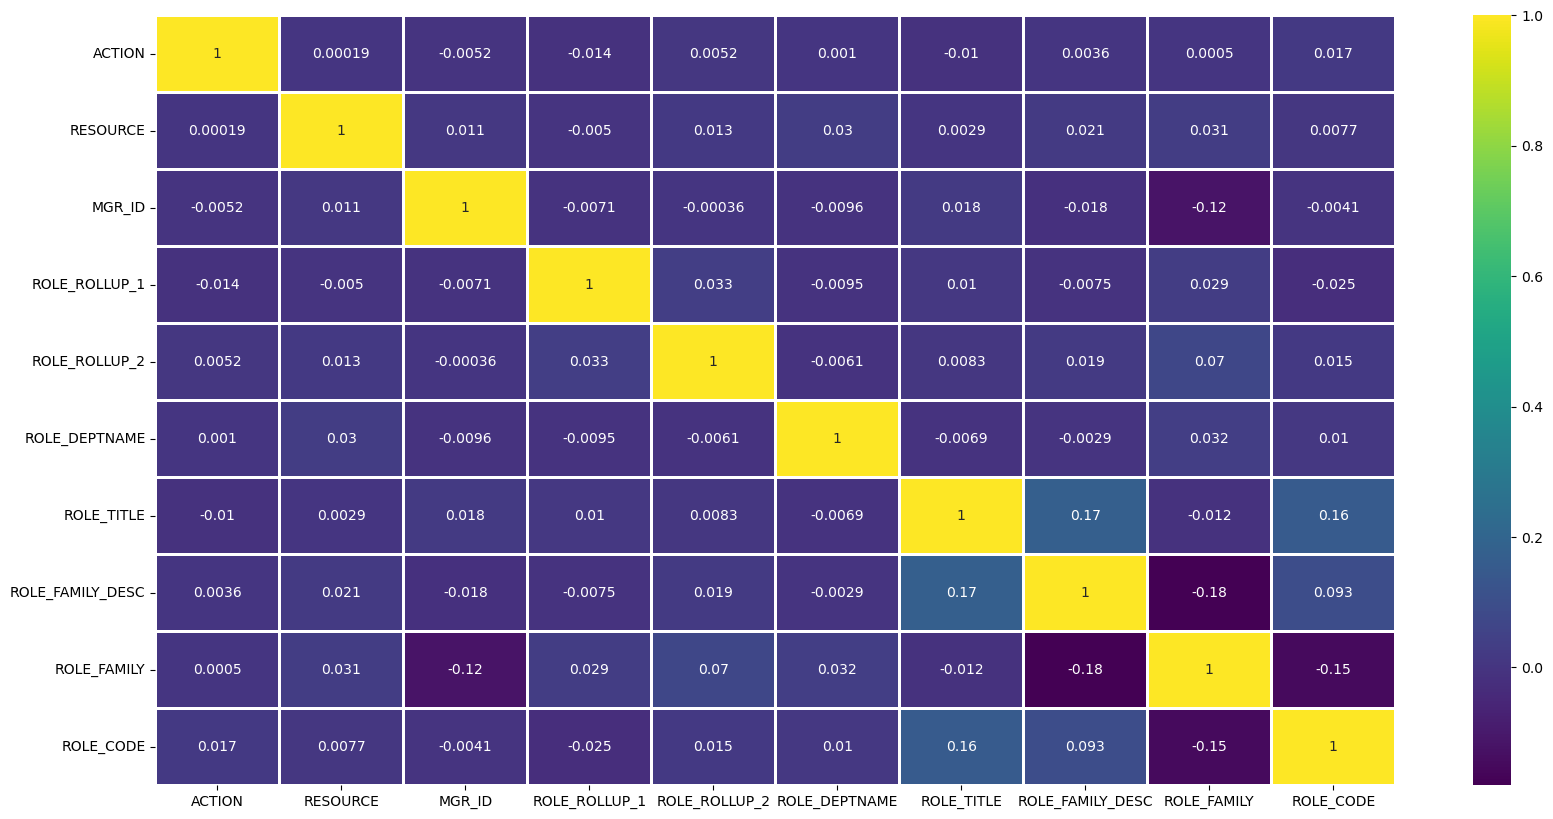

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(), annot=True, cmap='viridis',linewidth=1)

In [17]:
traindf.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [18]:
testdf.head()

id  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0   1     78766   72734         118079         118080         117878   
1   2     40644    4378         117961         118327         118507   
2   3     75443    2395         117961         118300         119488   
3   4     43219   19986         117961         118225         118403   
4   5     42093   50015         117961         118343         119598   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117879            118177        19721     117880  
1      118863            122008       118398     118865  
2      118172            301534       249618     118175  
3      120773            136187       118960     120774  
4      118422            300136       118424     118425

# MODEL BUILDING

In [78]:
x = traindf.drop('ACTION', axis = 1)
y = traindf['ACTION']
x_test =testdf.drop('id', axis = 1)

In [79]:
y.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

### Create train and test data set

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=42)

### create the model using CatBoostClassifier

In [21]:
from catboost import CatBoostClassifier

In [28]:
%%time

# Create the model
model_cat = CatBoostClassifier(loss_function='Logloss', # object function
                               eval_metric='AUC', # metric
                               verbose=200,# output to stdout info about training process every 200 iterations
                               random_seed=42)

# Fit the model
model_cat.fit(x_train,y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
             eval_set = (x_valid,y_valid), # data to validate on
             use_best_model = True, # True if we dont't want to save trees created after iteration with the best validation score
             );

Learning rate set to 0.071005
0:	test: 0.5628888	best: 0.5628888 (0)	total: 9.67ms	remaining: 9.66s
200:	test: 0.7910131	best: 0.7918149 (196)	total: 1.91s	remaining: 7.61s
400:	test: 0.8159357	best: 0.8161460 (399)	total: 3.84s	remaining: 5.74s
600:	test: 0.8270593	best: 0.8270593 (600)	total: 5.84s	remaining: 3.88s
800:	test: 0.8308788	best: 0.8310496 (794)	total: 7.87s	remaining: 1.96s
999:	test: 0.8357669	best: 0.8359987 (998)	total: 9.77s	remaining: 0us

bestTest = 0.835998668
bestIteration = 998

Shrink model to first 999 iterations.
CPU times: total: 1min 23s
Wall time: 10.2 s


In [32]:
x.head()

RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  ROLE_TITLE  \
0     39353   85475         117961         118300         123472      117905   
1     17183    1540         117961         118343         123125      118536   
2     36724   14457         118219         118220         117884      117879   
3     36135    5396         117961         118343         119993      118321   
4     42680    5905         117929         117930         119569      119323   

   ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0            117906       290919     117908  
1            118536       308574     118539  
2            267952        19721     117880  
3            240983       290919     118322  
4            123932        19793     119325

In [33]:
# In the CatBoost model treated categorical features as numerical ones.
categ_f = list(range(x.shape[1]))
print(categ_f)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [46]:
%%time

# Create the model
model_cat2 = CatBoostClassifier(loss_function='Logloss',
    iterations=100,
    learning_rate=0.01,
    depth=6,
    eval_metric="AUC",
    verbose=1,)

# Fit the model
model_cat2.fit(x_train,y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
             eval_set = (x_valid,y_valid), # data to validate on
             use_best_model = True, # True if we dont't want to save trees created after iteration with the best validation score
             );

0:	test: 0.5260029	best: 0.5260029 (0)	total: 4.78ms	remaining: 474ms
1:	test: 0.5900748	best: 0.5900748 (1)	total: 9.45ms	remaining: 463ms
2:	test: 0.5756222	best: 0.5900748 (1)	total: 14.1ms	remaining: 457ms
3:	test: 0.5922487	best: 0.5922487 (3)	total: 18.7ms	remaining: 450ms
4:	test: 0.5939740	best: 0.5939740 (4)	total: 23.4ms	remaining: 445ms
5:	test: 0.6056735	best: 0.6056735 (5)	total: 27.7ms	remaining: 434ms
6:	test: 0.6008871	best: 0.6056735 (5)	total: 31.9ms	remaining: 424ms
7:	test: 0.6000922	best: 0.6056735 (5)	total: 36.2ms	remaining: 417ms
8:	test: 0.5982905	best: 0.6056735 (5)	total: 40.6ms	remaining: 411ms
9:	test: 0.6051512	best: 0.6056735 (5)	total: 45.3ms	remaining: 408ms
10:	test: 0.6052154	best: 0.6056735 (5)	total: 49.7ms	remaining: 402ms
11:	test: 0.6166247	best: 0.6166247 (11)	total: 54.2ms	remaining: 398ms
12:	test: 0.6273038	best: 0.6273038 (12)	total: 59.1ms	remaining: 395ms
13:	test: 0.6340039	best: 0.6340039 (13)	total: 63.6ms	remaining: 391ms
14:	test: 0.6

In [82]:
%%time

# Create the model
model_cat3 = CatBoostClassifier(loss_function='Logloss',
          eval_metric='AUC',
          cat_features = categ_f,
          verbose = 200,
          random_seed = 1)

# Fit the model
model_cat3.fit(x_train,y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
             eval_set = (x_valid,y_valid), # data to validate on
             use_best_model = True, # True if we dont't want to save trees created after iteration with the best validation score
             );

Learning rate set to 0.071005
0:	test: 0.5119342	best: 0.5119342 (0)	total: 36.7ms	remaining: 36.7s
200:	test: 0.8936033	best: 0.8936307 (195)	total: 12.4s	remaining: 49.4s
400:	test: 0.8936239	best: 0.8952516 (333)	total: 25.3s	remaining: 37.8s
600:	test: 0.8929839	best: 0.8952516 (333)	total: 38.4s	remaining: 25.5s
800:	test: 0.8913036	best: 0.8952516 (333)	total: 51.5s	remaining: 12.8s
999:	test: 0.8914311	best: 0.8952516 (333)	total: 1m 4s	remaining: 0us

bestTest = 0.8952516469
bestIteration = 333

Shrink model to first 334 iterations.
CPU times: total: 6min 11s
Wall time: 1min 5s


In [83]:
print(f"Train Score: {round(model_cat.score(x_train,y_train)*100,2)}%")
print(f"Validity Score: {round(model_cat.score(x_valid,y_valid)*100,2)}%")
print('--------------------------------')
print(f"Train Score: {round(model_cat3.score(x_train,y_train)*100,2)}%")
print(f"Validity Score: {round(model_cat3.score(x_valid,y_valid)*100,2)}%")

Train Score: 96.29%
Validity Score: 95.07%
--------------------------------
Train Score: 98.95%
Validity Score: 95.8%


### Cross-Validation

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
from catboost import cv, Pool

params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 200,
    'random_seed': 1
}

# Create a CatBoost Pool for dataset processing.
total_train_data = Pool(data=x, label=y, cat_features=categ_f)

# Perform cross-validation using cv.
scores = cv(pool=total_train_data, params=params, fold_count=4, seed=1, shuffle=True, stratified=True)


Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 15.1ms	remaining: 15.1s
200:	test: 0.8935522	best: 0.8935522 (200)	total: 11.4s	remaining: 45.4s
400:	test: 0.8982868	best: 0.8983179 (397)	total: 24.7s	remaining: 36.9s
600:	test: 0.9018206	best: 0.9018206 (600)	total: 38s	remaining: 25.2s
800:	test: 0.9020369	best: 0.9021826 (785)	total: 51.1s	remaining: 12.7s
999:	test: 0.9026062	best: 0.9026237 (996)	total: 1m 4s	remaining: 0us

bestTest = 0.9026236685
bestIteration = 996

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 16.5ms	remaining: 16.5s
200:	test: 0.8828021	best: 0.8828832 (196)	total: 11.4s	remaining: 45.3s
400:	test: 0.8859741	best: 0.8859881 (388)	total: 24.4s	remaining: 36.5s
600:	test: 0.8860643	best: 0.8865214 (484)	total: 37.7s	remaining: 25s
800:	test: 0.8853617	best: 0.8865214 (484)	total: 51s	remaining: 12.7s
999:	test: 0.8844544	best: 0.8865214 (484)	total: 1m 4s	remaining: 0us

bestTest = 0.8865213709
bestIteration = 484

Tr

In [67]:
feature_imp = model_cat3.get_feature_importance(prettified=True)
feature_imp

Feature Id  Importances
0          RESOURCE    23.357305
1     ROLE_DEPTNAME    19.357392
2            MGR_ID    15.719509
3     ROLE_ROLLUP_2     9.672326
4  ROLE_FAMILY_DESC     8.094676
5        ROLE_TITLE     7.959587
6       ROLE_FAMILY     6.289261
7     ROLE_ROLLUP_1     5.220327
8         ROLE_CODE     4.329618

Text(0.5, 1.0, 'CatBoost features importance')

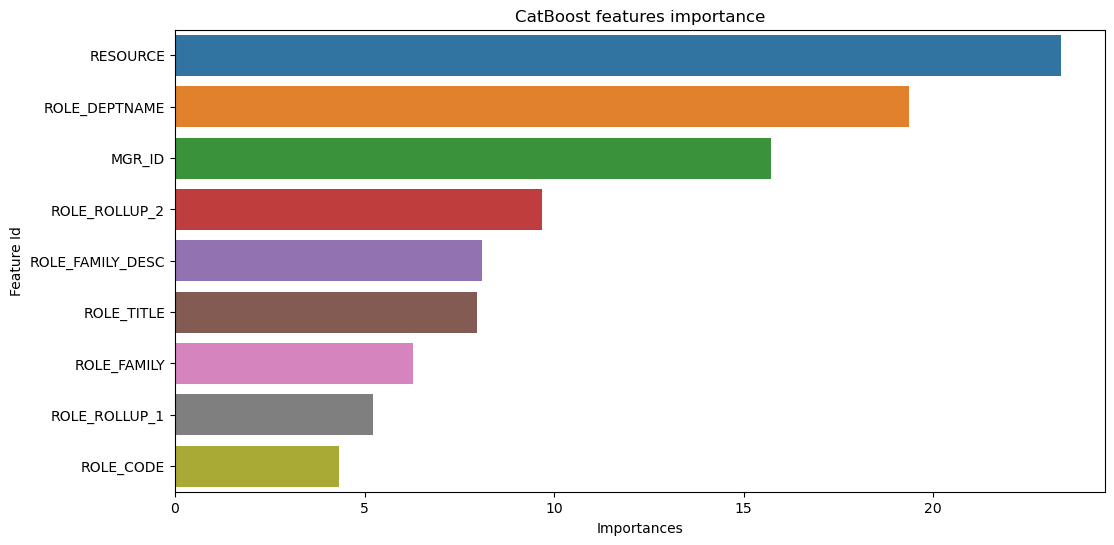

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Importances",y='Feature Id', data=feature_imp)
plt.title('CatBoost features importance')

In [93]:
# Create the model
import catboost as cb
model_cat4 = cb.CatBoostClassifier(
    learning_rate=0.01,
    depth=4,
    l2_leaf_reg=0.01,
    bootstrap_type="Bayesian",
    random_strength=0.01,
    bagging_temperature=0.5,
)

model_cat4.fit(x_train,y_train)




0:	learn: 0.6805244	total: 6.93ms	remaining: 6.92s
1:	learn: 0.6681614	total: 13.9ms	remaining: 6.91s
2:	learn: 0.6562247	total: 20.6ms	remaining: 6.84s
3:	learn: 0.6445286	total: 27.5ms	remaining: 6.86s
4:	learn: 0.6331619	total: 34.6ms	remaining: 6.88s
5:	learn: 0.6220971	total: 42ms	remaining: 6.95s
6:	learn: 0.6113102	total: 48.6ms	remaining: 6.9s
7:	learn: 0.6007998	total: 56.2ms	remaining: 6.97s
8:	learn: 0.5906395	total: 63.4ms	remaining: 6.98s
9:	learn: 0.5806540	total: 70.9ms	remaining: 7.01s
10:	learn: 0.5710030	total: 78ms	remaining: 7.01s
11:	learn: 0.5615935	total: 85.3ms	remaining: 7.03s
12:	learn: 0.5525032	total: 93.1ms	remaining: 7.07s
13:	learn: 0.5435915	total: 100ms	remaining: 7.07s
14:	learn: 0.5349576	total: 108ms	remaining: 7.09s
15:	learn: 0.5265095	total: 115ms	remaining: 7.06s
16:	learn: 0.5183203	total: 122ms	remaining: 7.04s
17:	learn: 0.5102869	total: 129ms	remaining: 7.04s
18:	learn: 0.5025255	total: 137ms	remaining: 7.05s
19:	learn: 0.4950741	total: 144ms

164:	learn: 0.2193328	total: 1.24s	remaining: 6.3s
165:	learn: 0.2191137	total: 1.25s	remaining: 6.29s
166:	learn: 0.2188817	total: 1.26s	remaining: 6.28s
167:	learn: 0.2186768	total: 1.27s	remaining: 6.28s
168:	learn: 0.2184271	total: 1.28s	remaining: 6.27s
169:	learn: 0.2182234	total: 1.28s	remaining: 6.27s
170:	learn: 0.2180170	total: 1.29s	remaining: 6.25s
171:	learn: 0.2178101	total: 1.3s	remaining: 6.25s
172:	learn: 0.2176136	total: 1.3s	remaining: 6.24s
173:	learn: 0.2174400	total: 1.31s	remaining: 6.23s
174:	learn: 0.2172636	total: 1.32s	remaining: 6.22s
175:	learn: 0.2170844	total: 1.33s	remaining: 6.21s
176:	learn: 0.2168831	total: 1.33s	remaining: 6.21s
177:	learn: 0.2166878	total: 1.34s	remaining: 6.2s
178:	learn: 0.2164858	total: 1.35s	remaining: 6.19s
179:	learn: 0.2162794	total: 1.36s	remaining: 6.19s
180:	learn: 0.2160942	total: 1.36s	remaining: 6.18s
181:	learn: 0.2159200	total: 1.37s	remaining: 6.17s
182:	learn: 0.2157480	total: 1.38s	remaining: 6.16s
183:	learn: 0.21

327:	learn: 0.2049983	total: 2.46s	remaining: 5.05s
328:	learn: 0.2049609	total: 2.47s	remaining: 5.04s
329:	learn: 0.2049331	total: 2.48s	remaining: 5.04s
330:	learn: 0.2048953	total: 2.49s	remaining: 5.03s
331:	learn: 0.2048398	total: 2.5s	remaining: 5.02s
332:	learn: 0.2048054	total: 2.5s	remaining: 5.01s
333:	learn: 0.2047537	total: 2.51s	remaining: 5s
334:	learn: 0.2047123	total: 2.52s	remaining: 5s
335:	learn: 0.2046836	total: 2.52s	remaining: 4.99s
336:	learn: 0.2046501	total: 2.53s	remaining: 4.98s
337:	learn: 0.2046088	total: 2.54s	remaining: 4.97s
338:	learn: 0.2045681	total: 2.55s	remaining: 4.96s
339:	learn: 0.2045285	total: 2.55s	remaining: 4.96s
340:	learn: 0.2044988	total: 2.56s	remaining: 4.95s
341:	learn: 0.2044603	total: 2.57s	remaining: 4.94s
342:	learn: 0.2044330	total: 2.58s	remaining: 4.93s
343:	learn: 0.2043943	total: 2.58s	remaining: 4.92s
344:	learn: 0.2043612	total: 2.59s	remaining: 4.92s
345:	learn: 0.2043363	total: 2.6s	remaining: 4.91s
346:	learn: 0.2042983

488:	learn: 0.1999031	total: 3.67s	remaining: 3.83s
489:	learn: 0.1998793	total: 3.67s	remaining: 3.82s
490:	learn: 0.1998584	total: 3.68s	remaining: 3.81s
491:	learn: 0.1998211	total: 3.69s	remaining: 3.81s
492:	learn: 0.1997952	total: 3.69s	remaining: 3.8s
493:	learn: 0.1997662	total: 3.7s	remaining: 3.79s
494:	learn: 0.1997276	total: 3.71s	remaining: 3.78s
495:	learn: 0.1997013	total: 3.71s	remaining: 3.77s
496:	learn: 0.1996648	total: 3.72s	remaining: 3.77s
497:	learn: 0.1996459	total: 3.73s	remaining: 3.76s
498:	learn: 0.1996336	total: 3.73s	remaining: 3.75s
499:	learn: 0.1996088	total: 3.74s	remaining: 3.74s
500:	learn: 0.1995726	total: 3.75s	remaining: 3.73s
501:	learn: 0.1995401	total: 3.76s	remaining: 3.73s
502:	learn: 0.1995211	total: 3.76s	remaining: 3.72s
503:	learn: 0.1995011	total: 3.77s	remaining: 3.71s
504:	learn: 0.1994792	total: 3.78s	remaining: 3.7s
505:	learn: 0.1994438	total: 3.79s	remaining: 3.7s
506:	learn: 0.1994246	total: 3.79s	remaining: 3.69s
507:	learn: 0.19

653:	learn: 0.1959025	total: 4.88s	remaining: 2.58s
654:	learn: 0.1958860	total: 4.89s	remaining: 2.58s
655:	learn: 0.1958733	total: 4.9s	remaining: 2.57s
656:	learn: 0.1958576	total: 4.91s	remaining: 2.56s
657:	learn: 0.1958282	total: 4.92s	remaining: 2.55s
658:	learn: 0.1957966	total: 4.92s	remaining: 2.55s
659:	learn: 0.1957775	total: 4.93s	remaining: 2.54s
660:	learn: 0.1957639	total: 4.94s	remaining: 2.53s
661:	learn: 0.1957436	total: 4.95s	remaining: 2.52s
662:	learn: 0.1957211	total: 4.95s	remaining: 2.52s
663:	learn: 0.1957058	total: 4.96s	remaining: 2.51s
664:	learn: 0.1956877	total: 4.97s	remaining: 2.5s
665:	learn: 0.1956661	total: 4.97s	remaining: 2.5s
666:	learn: 0.1956395	total: 4.98s	remaining: 2.49s
667:	learn: 0.1956125	total: 4.99s	remaining: 2.48s
668:	learn: 0.1955859	total: 5s	remaining: 2.47s
669:	learn: 0.1955603	total: 5s	remaining: 2.46s
670:	learn: 0.1955355	total: 5.01s	remaining: 2.46s
671:	learn: 0.1955162	total: 5.02s	remaining: 2.45s
672:	learn: 0.1954903

818:	learn: 0.1924504	total: 6.1s	remaining: 1.35s
819:	learn: 0.1924376	total: 6.11s	remaining: 1.34s
820:	learn: 0.1924071	total: 6.12s	remaining: 1.33s
821:	learn: 0.1923887	total: 6.13s	remaining: 1.33s
822:	learn: 0.1923668	total: 6.13s	remaining: 1.32s
823:	learn: 0.1923445	total: 6.14s	remaining: 1.31s
824:	learn: 0.1923192	total: 6.15s	remaining: 1.3s
825:	learn: 0.1922998	total: 6.16s	remaining: 1.3s
826:	learn: 0.1922840	total: 6.16s	remaining: 1.29s
827:	learn: 0.1922472	total: 6.17s	remaining: 1.28s
828:	learn: 0.1922344	total: 6.18s	remaining: 1.27s
829:	learn: 0.1922194	total: 6.19s	remaining: 1.27s
830:	learn: 0.1922026	total: 6.19s	remaining: 1.26s
831:	learn: 0.1921824	total: 6.2s	remaining: 1.25s
832:	learn: 0.1921686	total: 6.21s	remaining: 1.24s
833:	learn: 0.1921546	total: 6.21s	remaining: 1.24s
834:	learn: 0.1921445	total: 6.22s	remaining: 1.23s
835:	learn: 0.1921281	total: 6.23s	remaining: 1.22s
836:	learn: 0.1921136	total: 6.24s	remaining: 1.21s
837:	learn: 0.19

981:	learn: 0.1894020	total: 7.32s	remaining: 134ms
982:	learn: 0.1893868	total: 7.33s	remaining: 127ms
983:	learn: 0.1893676	total: 7.33s	remaining: 119ms
984:	learn: 0.1893544	total: 7.34s	remaining: 112ms
985:	learn: 0.1893296	total: 7.35s	remaining: 104ms
986:	learn: 0.1893146	total: 7.36s	remaining: 96.9ms
987:	learn: 0.1893012	total: 7.36s	remaining: 89.4ms
988:	learn: 0.1892902	total: 7.37s	remaining: 82ms
989:	learn: 0.1892669	total: 7.38s	remaining: 74.5ms
990:	learn: 0.1892529	total: 7.39s	remaining: 67.1ms
991:	learn: 0.1892377	total: 7.39s	remaining: 59.6ms
992:	learn: 0.1892122	total: 7.4s	remaining: 52.2ms
993:	learn: 0.1891878	total: 7.41s	remaining: 44.7ms
994:	learn: 0.1891756	total: 7.42s	remaining: 37.3ms
995:	learn: 0.1891618	total: 7.42s	remaining: 29.8ms
996:	learn: 0.1891486	total: 7.43s	remaining: 22.4ms
997:	learn: 0.1891318	total: 7.44s	remaining: 14.9ms
998:	learn: 0.1891197	total: 7.45s	remaining: 7.46ms
999:	learn: 0.1890925	total: 7.46s	remaining: 0us


In [94]:
model_cat4.score(x_valid,y_valid)

0.9438510833079036

In [95]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],   # Number of boosting iterations
    'learning_rate': [0.1, 0.01, 0.001],   # Learning rate
    'depth': [4, 6, 8],   # Depth of the trees
    'l2_leaf_reg': [1, 3, 5]   # L2 regularization coefficient
}

# Create a CatBoostClassifier
catboost = CatBoostClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to your data
grid_search.fit(x_train, y_train)


0:	learn: 0.6190986	total: 2.4ms	remaining: 238ms
1:	learn: 0.5585243	total: 5.02ms	remaining: 246ms
2:	learn: 0.5084499	total: 7.69ms	remaining: 249ms
3:	learn: 0.4665137	total: 10.1ms	remaining: 242ms
4:	learn: 0.4309474	total: 12.6ms	remaining: 240ms
5:	learn: 0.4007555	total: 15.3ms	remaining: 239ms
6:	learn: 0.3749529	total: 17.9ms	remaining: 238ms
7:	learn: 0.3529473	total: 20.5ms	remaining: 235ms
8:	learn: 0.3338884	total: 23ms	remaining: 232ms
9:	learn: 0.3176533	total: 25.5ms	remaining: 229ms
10:	learn: 0.3036734	total: 28ms	remaining: 226ms
11:	learn: 0.2917176	total: 30.5ms	remaining: 224ms
12:	learn: 0.2813753	total: 33.3ms	remaining: 223ms
13:	learn: 0.2723080	total: 35.9ms	remaining: 220ms
14:	learn: 0.2645089	total: 38.5ms	remaining: 218ms
15:	learn: 0.2576910	total: 41.2ms	remaining: 217ms
16:	learn: 0.2518177	total: 43.9ms	remaining: 214ms
17:	learn: 0.2469357	total: 46.5ms	remaining: 212ms
18:	learn: 0.2427383	total: 49ms	remaining: 209ms
19:	learn: 0.2388853	total: 5

72:	learn: 0.2019697	total: 200ms	remaining: 73.9ms
73:	learn: 0.2017830	total: 203ms	remaining: 71.3ms
74:	learn: 0.2015521	total: 206ms	remaining: 68.6ms
75:	learn: 0.2013878	total: 209ms	remaining: 65.9ms
76:	learn: 0.2012565	total: 212ms	remaining: 63.2ms
77:	learn: 0.2011391	total: 215ms	remaining: 60.5ms
78:	learn: 0.2008977	total: 218ms	remaining: 57.8ms
79:	learn: 0.2007432	total: 220ms	remaining: 55.1ms
80:	learn: 0.2006484	total: 223ms	remaining: 52.3ms
81:	learn: 0.2004094	total: 226ms	remaining: 49.6ms
82:	learn: 0.2002876	total: 229ms	remaining: 46.8ms
83:	learn: 0.2002060	total: 231ms	remaining: 44.1ms
84:	learn: 0.1999725	total: 234ms	remaining: 41.3ms
85:	learn: 0.1997745	total: 237ms	remaining: 38.6ms
86:	learn: 0.1996139	total: 240ms	remaining: 35.8ms
87:	learn: 0.1990501	total: 242ms	remaining: 33ms
88:	learn: 0.1988670	total: 246ms	remaining: 30.3ms
89:	learn: 0.1985985	total: 248ms	remaining: 27.6ms
90:	learn: 0.1984430	total: 251ms	remaining: 24.8ms
91:	learn: 0.1

75:	learn: 0.2026365	total: 210ms	remaining: 66.3ms
76:	learn: 0.2025602	total: 213ms	remaining: 63.7ms
77:	learn: 0.2020766	total: 216ms	remaining: 60.9ms
78:	learn: 0.2019406	total: 219ms	remaining: 58.2ms
79:	learn: 0.2016809	total: 222ms	remaining: 55.4ms
80:	learn: 0.2015106	total: 225ms	remaining: 52.7ms
81:	learn: 0.2012712	total: 230ms	remaining: 50.4ms
82:	learn: 0.2011987	total: 234ms	remaining: 47.9ms
83:	learn: 0.2010952	total: 237ms	remaining: 45.1ms
84:	learn: 0.2007956	total: 240ms	remaining: 42.3ms
85:	learn: 0.2006491	total: 243ms	remaining: 39.6ms
86:	learn: 0.2005129	total: 247ms	remaining: 36.8ms
87:	learn: 0.2003530	total: 249ms	remaining: 34ms
88:	learn: 0.2001828	total: 252ms	remaining: 31.1ms
89:	learn: 0.1999062	total: 255ms	remaining: 28.3ms
90:	learn: 0.1996337	total: 258ms	remaining: 25.5ms
91:	learn: 0.1995464	total: 261ms	remaining: 22.7ms
92:	learn: 0.1993210	total: 264ms	remaining: 19.9ms
93:	learn: 0.1990442	total: 267ms	remaining: 17ms
94:	learn: 0.198

71:	learn: 0.3755227	total: 198ms	remaining: 76.8ms
72:	learn: 0.3732109	total: 201ms	remaining: 74.2ms
73:	learn: 0.3709327	total: 203ms	remaining: 71.5ms
74:	learn: 0.3686799	total: 206ms	remaining: 68.6ms
75:	learn: 0.3664660	total: 209ms	remaining: 65.9ms
76:	learn: 0.3642891	total: 212ms	remaining: 63.2ms
77:	learn: 0.3621552	total: 214ms	remaining: 60.4ms
78:	learn: 0.3600495	total: 217ms	remaining: 57.7ms
79:	learn: 0.3579724	total: 220ms	remaining: 55ms
80:	learn: 0.3559302	total: 223ms	remaining: 52.2ms
81:	learn: 0.3539166	total: 226ms	remaining: 49.5ms
82:	learn: 0.3519303	total: 228ms	remaining: 46.8ms
83:	learn: 0.3499705	total: 231ms	remaining: 44ms
84:	learn: 0.3480318	total: 234ms	remaining: 41.2ms
85:	learn: 0.3461220	total: 237ms	remaining: 38.5ms
86:	learn: 0.3442351	total: 239ms	remaining: 35.7ms
87:	learn: 0.3423787	total: 242ms	remaining: 33ms
88:	learn: 0.3405487	total: 245ms	remaining: 30.2ms
89:	learn: 0.3387533	total: 247ms	remaining: 27.5ms
90:	learn: 0.33698

78:	learn: 0.3599714	total: 207ms	remaining: 54.9ms
79:	learn: 0.3578924	total: 209ms	remaining: 52.4ms
80:	learn: 0.3558473	total: 212ms	remaining: 49.8ms
81:	learn: 0.3538325	total: 215ms	remaining: 47.2ms
82:	learn: 0.3518464	total: 218ms	remaining: 44.6ms
83:	learn: 0.3498868	total: 221ms	remaining: 42.1ms
84:	learn: 0.3479483	total: 224ms	remaining: 39.5ms
85:	learn: 0.3460386	total: 226ms	remaining: 36.9ms
86:	learn: 0.3441490	total: 229ms	remaining: 34.2ms
87:	learn: 0.3422899	total: 232ms	remaining: 31.6ms
88:	learn: 0.3404619	total: 234ms	remaining: 29ms
89:	learn: 0.3386641	total: 237ms	remaining: 26.3ms
90:	learn: 0.3368942	total: 240ms	remaining: 23.7ms
91:	learn: 0.3351502	total: 242ms	remaining: 21ms
92:	learn: 0.3334125	total: 245ms	remaining: 18.4ms
93:	learn: 0.3317225	total: 248ms	remaining: 15.8ms
94:	learn: 0.3300528	total: 251ms	remaining: 13.2ms
95:	learn: 0.3284104	total: 253ms	remaining: 10.6ms
96:	learn: 0.3267914	total: 256ms	remaining: 7.91ms
97:	learn: 0.325

76:	learn: 0.3642236	total: 207ms	remaining: 61.8ms
77:	learn: 0.3620882	total: 210ms	remaining: 59.3ms
78:	learn: 0.3599817	total: 213ms	remaining: 56.6ms
79:	learn: 0.3579061	total: 216ms	remaining: 53.9ms
80:	learn: 0.3558627	total: 218ms	remaining: 51.2ms
81:	learn: 0.3538475	total: 221ms	remaining: 48.5ms
82:	learn: 0.3518620	total: 224ms	remaining: 45.9ms
83:	learn: 0.3499016	total: 227ms	remaining: 43.2ms
84:	learn: 0.3479613	total: 230ms	remaining: 40.5ms
85:	learn: 0.3460496	total: 232ms	remaining: 37.8ms
86:	learn: 0.3441615	total: 235ms	remaining: 35.2ms
87:	learn: 0.3423032	total: 238ms	remaining: 32.5ms
88:	learn: 0.3404735	total: 241ms	remaining: 29.8ms
89:	learn: 0.3386719	total: 243ms	remaining: 27ms
90:	learn: 0.3369012	total: 246ms	remaining: 24.3ms
91:	learn: 0.3351566	total: 249ms	remaining: 21.6ms
92:	learn: 0.3334181	total: 251ms	remaining: 18.9ms
93:	learn: 0.3317255	total: 254ms	remaining: 16.2ms
94:	learn: 0.3300542	total: 257ms	remaining: 13.5ms
95:	learn: 0.3

72:	learn: 0.6401225	total: 203ms	remaining: 75.1ms
73:	learn: 0.6394460	total: 206ms	remaining: 72.3ms
74:	learn: 0.6387703	total: 208ms	remaining: 69.5ms
75:	learn: 0.6380955	total: 211ms	remaining: 66.7ms
76:	learn: 0.6374218	total: 214ms	remaining: 64ms
77:	learn: 0.6367508	total: 217ms	remaining: 61.2ms
78:	learn: 0.6360802	total: 220ms	remaining: 58.4ms
79:	learn: 0.6354108	total: 222ms	remaining: 55.5ms
80:	learn: 0.6347429	total: 225ms	remaining: 52.8ms
81:	learn: 0.6340763	total: 228ms	remaining: 50ms
82:	learn: 0.6334109	total: 231ms	remaining: 47.2ms
83:	learn: 0.6327470	total: 233ms	remaining: 44.4ms
84:	learn: 0.6320842	total: 236ms	remaining: 41.6ms
85:	learn: 0.6314223	total: 238ms	remaining: 38.8ms
86:	learn: 0.6307617	total: 241ms	remaining: 36ms
87:	learn: 0.6301020	total: 244ms	remaining: 33.2ms
88:	learn: 0.6294438	total: 246ms	remaining: 30.4ms
89:	learn: 0.6287873	total: 249ms	remaining: 27.6ms
90:	learn: 0.6281320	total: 251ms	remaining: 24.9ms
91:	learn: 0.62747

76:	learn: 0.6374128	total: 205ms	remaining: 61.3ms
77:	learn: 0.6367416	total: 208ms	remaining: 58.7ms
78:	learn: 0.6360708	total: 211ms	remaining: 56.1ms
79:	learn: 0.6354013	total: 214ms	remaining: 53.5ms
80:	learn: 0.6347330	total: 217ms	remaining: 51ms
81:	learn: 0.6340664	total: 220ms	remaining: 48.4ms
82:	learn: 0.6334008	total: 223ms	remaining: 45.7ms
83:	learn: 0.6327367	total: 226ms	remaining: 43ms
84:	learn: 0.6320739	total: 228ms	remaining: 40.3ms
85:	learn: 0.6314119	total: 231ms	remaining: 37.5ms
86:	learn: 0.6307513	total: 234ms	remaining: 34.9ms
87:	learn: 0.6300914	total: 236ms	remaining: 32.2ms
88:	learn: 0.6294333	total: 239ms	remaining: 29.5ms
89:	learn: 0.6287761	total: 241ms	remaining: 26.8ms
90:	learn: 0.6281208	total: 244ms	remaining: 24.1ms
91:	learn: 0.6274665	total: 246ms	remaining: 21.4ms
92:	learn: 0.6268122	total: 249ms	remaining: 18.7ms
93:	learn: 0.6261601	total: 252ms	remaining: 16.1ms
94:	learn: 0.6255093	total: 254ms	remaining: 13.4ms
95:	learn: 0.624

74:	learn: 0.2043456	total: 204ms	remaining: 68.2ms
75:	learn: 0.2042131	total: 208ms	remaining: 65.6ms
76:	learn: 0.2040263	total: 211ms	remaining: 63.1ms
77:	learn: 0.2038427	total: 214ms	remaining: 60.4ms
78:	learn: 0.2036070	total: 218ms	remaining: 57.8ms
79:	learn: 0.2035251	total: 221ms	remaining: 55.2ms
80:	learn: 0.2032704	total: 224ms	remaining: 52.6ms
81:	learn: 0.2030043	total: 227ms	remaining: 49.8ms
82:	learn: 0.2028330	total: 229ms	remaining: 47ms
83:	learn: 0.2027441	total: 232ms	remaining: 44.2ms
84:	learn: 0.2026630	total: 235ms	remaining: 41.5ms
85:	learn: 0.2024358	total: 238ms	remaining: 38.8ms
86:	learn: 0.2023388	total: 241ms	remaining: 36.1ms
87:	learn: 0.2022676	total: 244ms	remaining: 33.3ms
88:	learn: 0.2021707	total: 247ms	remaining: 30.5ms
89:	learn: 0.2020318	total: 250ms	remaining: 27.8ms
90:	learn: 0.2018916	total: 253ms	remaining: 25ms
91:	learn: 0.2017478	total: 256ms	remaining: 22.3ms
92:	learn: 0.2013508	total: 259ms	remaining: 19.5ms
93:	learn: 0.201

72:	learn: 0.2046920	total: 203ms	remaining: 74.9ms
73:	learn: 0.2045285	total: 206ms	remaining: 72.2ms
74:	learn: 0.2043688	total: 208ms	remaining: 69.4ms
75:	learn: 0.2042702	total: 211ms	remaining: 66.8ms
76:	learn: 0.2041773	total: 214ms	remaining: 64ms
77:	learn: 0.2039537	total: 217ms	remaining: 61.3ms
78:	learn: 0.2037938	total: 220ms	remaining: 58.6ms
79:	learn: 0.2034206	total: 223ms	remaining: 55.9ms
80:	learn: 0.2033652	total: 226ms	remaining: 53.1ms
81:	learn: 0.2031432	total: 229ms	remaining: 50.3ms
82:	learn: 0.2030563	total: 232ms	remaining: 47.5ms
83:	learn: 0.2029368	total: 235ms	remaining: 44.7ms
84:	learn: 0.2028065	total: 238ms	remaining: 42ms
85:	learn: 0.2025868	total: 240ms	remaining: 39.1ms
86:	learn: 0.2024472	total: 243ms	remaining: 36.3ms
87:	learn: 0.2022986	total: 246ms	remaining: 33.5ms
88:	learn: 0.2021623	total: 248ms	remaining: 30.7ms
89:	learn: 0.2019051	total: 251ms	remaining: 27.9ms
90:	learn: 0.2016812	total: 254ms	remaining: 25.1ms
91:	learn: 0.201

73:	learn: 0.2039223	total: 205ms	remaining: 72ms
74:	learn: 0.2037524	total: 208ms	remaining: 69.4ms
75:	learn: 0.2035384	total: 211ms	remaining: 66.6ms
76:	learn: 0.2033431	total: 214ms	remaining: 63.8ms
77:	learn: 0.2031990	total: 216ms	remaining: 61ms
78:	learn: 0.2030651	total: 219ms	remaining: 58.3ms
79:	learn: 0.2029671	total: 222ms	remaining: 55.6ms
80:	learn: 0.2028131	total: 225ms	remaining: 52.8ms
81:	learn: 0.2025690	total: 228ms	remaining: 50ms
82:	learn: 0.2024219	total: 231ms	remaining: 47.3ms
83:	learn: 0.2023222	total: 234ms	remaining: 44.5ms
84:	learn: 0.2020133	total: 237ms	remaining: 41.8ms
85:	learn: 0.2018427	total: 240ms	remaining: 39ms
86:	learn: 0.2015616	total: 242ms	remaining: 36.2ms
87:	learn: 0.2014022	total: 246ms	remaining: 33.5ms
88:	learn: 0.2011853	total: 248ms	remaining: 30.7ms
89:	learn: 0.2009457	total: 251ms	remaining: 27.9ms
90:	learn: 0.2007889	total: 254ms	remaining: 25.1ms
91:	learn: 0.2006547	total: 257ms	remaining: 22.3ms
92:	learn: 0.2005312

74:	learn: 0.3694535	total: 209ms	remaining: 69.7ms
75:	learn: 0.3672395	total: 213ms	remaining: 67.1ms
76:	learn: 0.3650568	total: 215ms	remaining: 64.3ms
77:	learn: 0.3629249	total: 218ms	remaining: 61.5ms
78:	learn: 0.3608173	total: 221ms	remaining: 58.8ms
79:	learn: 0.3587411	total: 224ms	remaining: 56ms
80:	learn: 0.3567013	total: 227ms	remaining: 53.2ms
81:	learn: 0.3546933	total: 230ms	remaining: 50.4ms
82:	learn: 0.3527099	total: 232ms	remaining: 47.6ms
83:	learn: 0.3507489	total: 235ms	remaining: 44.8ms
84:	learn: 0.3488140	total: 238ms	remaining: 42ms
85:	learn: 0.3469028	total: 241ms	remaining: 39.2ms
86:	learn: 0.3450190	total: 243ms	remaining: 36.3ms
87:	learn: 0.3431586	total: 246ms	remaining: 33.5ms
88:	learn: 0.3413262	total: 249ms	remaining: 30.8ms
89:	learn: 0.3395267	total: 252ms	remaining: 28ms
90:	learn: 0.3377598	total: 255ms	remaining: 25.2ms
91:	learn: 0.3360153	total: 257ms	remaining: 22.4ms
92:	learn: 0.3342766	total: 260ms	remaining: 19.6ms
93:	learn: 0.33258

79:	learn: 0.3586983	total: 212ms	remaining: 53ms
80:	learn: 0.3566562	total: 214ms	remaining: 50.3ms
81:	learn: 0.3546443	total: 217ms	remaining: 47.7ms
82:	learn: 0.3526598	total: 220ms	remaining: 45.1ms
83:	learn: 0.3507007	total: 223ms	remaining: 42.5ms
84:	learn: 0.3487671	total: 226ms	remaining: 39.9ms
85:	learn: 0.3468562	total: 229ms	remaining: 37.3ms
86:	learn: 0.3449719	total: 232ms	remaining: 34.6ms
87:	learn: 0.3431109	total: 234ms	remaining: 32ms
88:	learn: 0.3412795	total: 237ms	remaining: 29.3ms
89:	learn: 0.3394748	total: 239ms	remaining: 26.6ms
90:	learn: 0.3377082	total: 242ms	remaining: 24ms
91:	learn: 0.3359648	total: 245ms	remaining: 21.3ms
92:	learn: 0.3342318	total: 248ms	remaining: 18.6ms
93:	learn: 0.3325376	total: 251ms	remaining: 16ms
94:	learn: 0.3308664	total: 253ms	remaining: 13.3ms
95:	learn: 0.3292240	total: 257ms	remaining: 10.7ms
96:	learn: 0.3276080	total: 259ms	remaining: 8.01ms
97:	learn: 0.3260212	total: 262ms	remaining: 5.34ms
98:	learn: 0.3244515

75:	learn: 0.6383083	total: 202ms	remaining: 63.8ms
76:	learn: 0.6376366	total: 205ms	remaining: 61.3ms
77:	learn: 0.6369690	total: 208ms	remaining: 58.6ms
78:	learn: 0.6363003	total: 211ms	remaining: 56ms
79:	learn: 0.6356341	total: 214ms	remaining: 53.4ms
80:	learn: 0.6349687	total: 216ms	remaining: 50.7ms
81:	learn: 0.6343058	total: 219ms	remaining: 48ms
82:	learn: 0.6336427	total: 221ms	remaining: 45.4ms
83:	learn: 0.6329808	total: 224ms	remaining: 42.7ms
84:	learn: 0.6323213	total: 227ms	remaining: 40ms
85:	learn: 0.6316617	total: 229ms	remaining: 37.3ms
86:	learn: 0.6310046	total: 232ms	remaining: 34.7ms
87:	learn: 0.6303466	total: 235ms	remaining: 32ms
88:	learn: 0.6296909	total: 237ms	remaining: 29.3ms
89:	learn: 0.6290364	total: 240ms	remaining: 26.7ms
90:	learn: 0.6283849	total: 242ms	remaining: 24ms
91:	learn: 0.6277331	total: 245ms	remaining: 21.3ms
92:	learn: 0.6270817	total: 247ms	remaining: 18.6ms
93:	learn: 0.6264321	total: 250ms	remaining: 16ms
94:	learn: 0.6257838	tot

77:	learn: 0.6369551	total: 203ms	remaining: 57.4ms
78:	learn: 0.6362863	total: 206ms	remaining: 54.8ms
79:	learn: 0.6356198	total: 209ms	remaining: 52.2ms
80:	learn: 0.6349539	total: 211ms	remaining: 49.6ms
81:	learn: 0.6342909	total: 214ms	remaining: 47ms
82:	learn: 0.6336276	total: 217ms	remaining: 44.5ms
83:	learn: 0.6329657	total: 220ms	remaining: 41.9ms
84:	learn: 0.6323061	total: 223ms	remaining: 39.3ms
85:	learn: 0.6316467	total: 225ms	remaining: 36.6ms
86:	learn: 0.6309892	total: 227ms	remaining: 34ms
87:	learn: 0.6303309	total: 230ms	remaining: 31.4ms
88:	learn: 0.6296749	total: 233ms	remaining: 28.8ms
89:	learn: 0.6290202	total: 236ms	remaining: 26.2ms
90:	learn: 0.6283687	total: 238ms	remaining: 23.6ms
91:	learn: 0.6277164	total: 241ms	remaining: 20.9ms
92:	learn: 0.6270650	total: 243ms	remaining: 18.3ms
93:	learn: 0.6264155	total: 246ms	remaining: 15.7ms
94:	learn: 0.6257671	total: 249ms	remaining: 13.1ms
95:	learn: 0.6251196	total: 252ms	remaining: 10.5ms
96:	learn: 0.624

75:	learn: 0.6382962	total: 199ms	remaining: 62.8ms
76:	learn: 0.6376241	total: 202ms	remaining: 60.3ms
77:	learn: 0.6369562	total: 204ms	remaining: 57.6ms
78:	learn: 0.6362873	total: 207ms	remaining: 55ms
79:	learn: 0.6356211	total: 210ms	remaining: 52.4ms
80:	learn: 0.6349553	total: 212ms	remaining: 49.8ms
81:	learn: 0.6342923	total: 215ms	remaining: 47.3ms
82:	learn: 0.6336291	total: 218ms	remaining: 44.7ms
83:	learn: 0.6329670	total: 221ms	remaining: 42ms
84:	learn: 0.6323073	total: 223ms	remaining: 39.4ms
85:	learn: 0.6316476	total: 226ms	remaining: 36.7ms
86:	learn: 0.6309903	total: 228ms	remaining: 34.1ms
87:	learn: 0.6303321	total: 231ms	remaining: 31.4ms
88:	learn: 0.6296761	total: 233ms	remaining: 28.8ms
89:	learn: 0.6290211	total: 236ms	remaining: 26.2ms
90:	learn: 0.6283694	total: 238ms	remaining: 23.5ms
91:	learn: 0.6277173	total: 240ms	remaining: 20.9ms
92:	learn: 0.6270658	total: 243ms	remaining: 18.3ms
93:	learn: 0.6264158	total: 246ms	remaining: 15.7ms
94:	learn: 0.625

74:	learn: 0.2045817	total: 206ms	remaining: 68.8ms
75:	learn: 0.2044237	total: 209ms	remaining: 66.1ms
76:	learn: 0.2043735	total: 212ms	remaining: 63.3ms
77:	learn: 0.2042092	total: 214ms	remaining: 60.5ms
78:	learn: 0.2040967	total: 218ms	remaining: 57.8ms
79:	learn: 0.2040123	total: 220ms	remaining: 55.1ms
80:	learn: 0.2039042	total: 223ms	remaining: 52.4ms
81:	learn: 0.2036723	total: 226ms	remaining: 49.7ms
82:	learn: 0.2036208	total: 229ms	remaining: 47ms
83:	learn: 0.2035168	total: 232ms	remaining: 44.2ms
84:	learn: 0.2033964	total: 235ms	remaining: 41.5ms
85:	learn: 0.2033339	total: 238ms	remaining: 38.7ms
86:	learn: 0.2032251	total: 241ms	remaining: 36ms
87:	learn: 0.2028581	total: 244ms	remaining: 33.2ms
88:	learn: 0.2026657	total: 247ms	remaining: 30.5ms
89:	learn: 0.2024447	total: 249ms	remaining: 27.7ms
90:	learn: 0.2023003	total: 252ms	remaining: 24.9ms
91:	learn: 0.2022149	total: 255ms	remaining: 22.2ms
92:	learn: 0.2021010	total: 258ms	remaining: 19.4ms
93:	learn: 0.201

76:	learn: 0.2046325	total: 204ms	remaining: 61ms
77:	learn: 0.2043364	total: 207ms	remaining: 58.4ms
78:	learn: 0.2041581	total: 210ms	remaining: 55.8ms
79:	learn: 0.2039989	total: 212ms	remaining: 53.1ms
80:	learn: 0.2038341	total: 215ms	remaining: 50.5ms
81:	learn: 0.2037010	total: 218ms	remaining: 47.9ms
82:	learn: 0.2036291	total: 221ms	remaining: 45.3ms
83:	learn: 0.2036012	total: 224ms	remaining: 42.7ms
84:	learn: 0.2034685	total: 227ms	remaining: 40.1ms
85:	learn: 0.2032453	total: 231ms	remaining: 37.6ms
86:	learn: 0.2031193	total: 233ms	remaining: 34.9ms
87:	learn: 0.2029731	total: 236ms	remaining: 32.2ms
88:	learn: 0.2027325	total: 239ms	remaining: 29.5ms
89:	learn: 0.2026335	total: 242ms	remaining: 26.8ms
90:	learn: 0.2024822	total: 245ms	remaining: 24.2ms
91:	learn: 0.2023463	total: 247ms	remaining: 21.5ms
92:	learn: 0.2022584	total: 250ms	remaining: 18.8ms
93:	learn: 0.2019859	total: 253ms	remaining: 16.1ms
94:	learn: 0.2018549	total: 256ms	remaining: 13.5ms
95:	learn: 0.2

72:	learn: 0.3747029	total: 206ms	remaining: 76.1ms
73:	learn: 0.3724305	total: 209ms	remaining: 73.3ms
74:	learn: 0.3701813	total: 211ms	remaining: 70.5ms
75:	learn: 0.3679684	total: 215ms	remaining: 67.8ms
76:	learn: 0.3657847	total: 218ms	remaining: 65ms
77:	learn: 0.3636570	total: 221ms	remaining: 62.2ms
78:	learn: 0.3615462	total: 223ms	remaining: 59.4ms
79:	learn: 0.3594724	total: 226ms	remaining: 56.6ms
80:	learn: 0.3574324	total: 229ms	remaining: 53.7ms
81:	learn: 0.3554294	total: 231ms	remaining: 50.8ms
82:	learn: 0.3534452	total: 234ms	remaining: 48ms
83:	learn: 0.3514850	total: 237ms	remaining: 45.2ms
84:	learn: 0.3495550	total: 240ms	remaining: 42.4ms
85:	learn: 0.3476456	total: 243ms	remaining: 39.5ms
86:	learn: 0.3457613	total: 245ms	remaining: 36.7ms
87:	learn: 0.3439001	total: 248ms	remaining: 33.8ms
88:	learn: 0.3420657	total: 251ms	remaining: 31ms
89:	learn: 0.3402674	total: 254ms	remaining: 28.2ms
90:	learn: 0.3385047	total: 256ms	remaining: 25.4ms
91:	learn: 0.33676

77:	learn: 0.3635786	total: 206ms	remaining: 58.2ms
78:	learn: 0.3614661	total: 209ms	remaining: 55.6ms
79:	learn: 0.3593901	total: 212ms	remaining: 52.9ms
80:	learn: 0.3573473	total: 214ms	remaining: 50.2ms
81:	learn: 0.3553428	total: 217ms	remaining: 47.7ms
82:	learn: 0.3533581	total: 220ms	remaining: 45.1ms
83:	learn: 0.3513983	total: 223ms	remaining: 42.5ms
84:	learn: 0.3494675	total: 226ms	remaining: 39.9ms
85:	learn: 0.3475588	total: 229ms	remaining: 37.3ms
86:	learn: 0.3456700	total: 232ms	remaining: 34.7ms
87:	learn: 0.3438062	total: 235ms	remaining: 32ms
88:	learn: 0.3419754	total: 237ms	remaining: 29.3ms
89:	learn: 0.3401743	total: 240ms	remaining: 26.6ms
90:	learn: 0.3384124	total: 243ms	remaining: 24ms
91:	learn: 0.3366665	total: 245ms	remaining: 21.3ms
92:	learn: 0.3349325	total: 248ms	remaining: 18.6ms
93:	learn: 0.3332406	total: 250ms	remaining: 16ms
94:	learn: 0.3315671	total: 253ms	remaining: 13.3ms
95:	learn: 0.3299212	total: 256ms	remaining: 10.7ms
96:	learn: 0.32830

75:	learn: 0.3679065	total: 208ms	remaining: 65.7ms
76:	learn: 0.3657197	total: 211ms	remaining: 63.1ms
77:	learn: 0.3635907	total: 214ms	remaining: 60.3ms
78:	learn: 0.3614789	total: 217ms	remaining: 57.6ms
79:	learn: 0.3594064	total: 220ms	remaining: 55ms
80:	learn: 0.3573652	total: 223ms	remaining: 52.2ms
81:	learn: 0.3553612	total: 226ms	remaining: 49.6ms
82:	learn: 0.3533772	total: 229ms	remaining: 46.9ms
83:	learn: 0.3514168	total: 232ms	remaining: 44.1ms
84:	learn: 0.3494849	total: 234ms	remaining: 41.3ms
85:	learn: 0.3475736	total: 237ms	remaining: 38.5ms
86:	learn: 0.3456928	total: 240ms	remaining: 35.8ms
87:	learn: 0.3438298	total: 243ms	remaining: 33.1ms
88:	learn: 0.3420002	total: 245ms	remaining: 30.3ms
89:	learn: 0.3401941	total: 248ms	remaining: 27.5ms
90:	learn: 0.3384310	total: 250ms	remaining: 24.8ms
91:	learn: 0.3366840	total: 253ms	remaining: 22ms
92:	learn: 0.3349485	total: 256ms	remaining: 19.3ms
93:	learn: 0.3332540	total: 259ms	remaining: 16.5ms
94:	learn: 0.331

73:	learn: 0.6398432	total: 204ms	remaining: 71.7ms
74:	learn: 0.6391732	total: 207ms	remaining: 69.1ms
75:	learn: 0.6385036	total: 210ms	remaining: 66.4ms
76:	learn: 0.6378329	total: 213ms	remaining: 63.5ms
77:	learn: 0.6371681	total: 216ms	remaining: 60.8ms
78:	learn: 0.6365012	total: 218ms	remaining: 58.1ms
79:	learn: 0.6358376	total: 221ms	remaining: 55.3ms
80:	learn: 0.6351747	total: 224ms	remaining: 52.5ms
81:	learn: 0.6345153	total: 227ms	remaining: 49.9ms
82:	learn: 0.6338546	total: 230ms	remaining: 47.2ms
83:	learn: 0.6331942	total: 233ms	remaining: 44.4ms
84:	learn: 0.6325376	total: 236ms	remaining: 41.6ms
85:	learn: 0.6318804	total: 238ms	remaining: 38.8ms
86:	learn: 0.6312262	total: 241ms	remaining: 36ms
87:	learn: 0.6305698	total: 244ms	remaining: 33.3ms
88:	learn: 0.6299161	total: 247ms	remaining: 30.5ms
89:	learn: 0.6292636	total: 249ms	remaining: 27.7ms
90:	learn: 0.6286155	total: 252ms	remaining: 24.9ms
91:	learn: 0.6279657	total: 255ms	remaining: 22.2ms
92:	learn: 0.6

73:	learn: 0.6398337	total: 196ms	remaining: 68.8ms
74:	learn: 0.6391635	total: 199ms	remaining: 66.4ms
75:	learn: 0.6384937	total: 202ms	remaining: 63.8ms
76:	learn: 0.6378232	total: 205ms	remaining: 61.1ms
77:	learn: 0.6371581	total: 207ms	remaining: 58.4ms
78:	learn: 0.6364908	total: 210ms	remaining: 55.8ms
79:	learn: 0.6358271	total: 213ms	remaining: 53.1ms
80:	learn: 0.6351639	total: 215ms	remaining: 50.5ms
81:	learn: 0.6345044	total: 218ms	remaining: 47.8ms
82:	learn: 0.6338436	total: 221ms	remaining: 45.3ms
83:	learn: 0.6331831	total: 224ms	remaining: 42.7ms
84:	learn: 0.6325263	total: 227ms	remaining: 40ms
85:	learn: 0.6318691	total: 229ms	remaining: 37.3ms
86:	learn: 0.6312149	total: 232ms	remaining: 34.6ms
87:	learn: 0.6305582	total: 234ms	remaining: 32ms
88:	learn: 0.6299046	total: 238ms	remaining: 29.4ms
89:	learn: 0.6292513	total: 241ms	remaining: 26.7ms
90:	learn: 0.6286031	total: 243ms	remaining: 24ms
91:	learn: 0.6279533	total: 245ms	remaining: 21.3ms
92:	learn: 0.62730

56:	learn: 0.2026374	total: 418ms	remaining: 1.05s
57:	learn: 0.2024964	total: 426ms	remaining: 1.04s
58:	learn: 0.2023388	total: 433ms	remaining: 1.03s
59:	learn: 0.2019598	total: 440ms	remaining: 1.03s
60:	learn: 0.2016842	total: 448ms	remaining: 1.02s
61:	learn: 0.2015765	total: 455ms	remaining: 1.01s
62:	learn: 0.2013307	total: 463ms	remaining: 1.01s
63:	learn: 0.2011255	total: 470ms	remaining: 999ms
64:	learn: 0.2009170	total: 478ms	remaining: 992ms
65:	learn: 0.2006653	total: 485ms	remaining: 984ms
66:	learn: 0.2005005	total: 491ms	remaining: 975ms
67:	learn: 0.2002523	total: 498ms	remaining: 967ms
68:	learn: 0.2000712	total: 506ms	remaining: 961ms
69:	learn: 0.1998540	total: 514ms	remaining: 954ms
70:	learn: 0.1996149	total: 521ms	remaining: 947ms
71:	learn: 0.1993124	total: 529ms	remaining: 940ms
72:	learn: 0.1990860	total: 536ms	remaining: 932ms
73:	learn: 0.1988711	total: 544ms	remaining: 926ms
74:	learn: 0.1987217	total: 551ms	remaining: 919ms
75:	learn: 0.1985449	total: 559

29:	learn: 0.2103606	total: 217ms	remaining: 1.23s
30:	learn: 0.2098993	total: 224ms	remaining: 1.22s
31:	learn: 0.2095852	total: 233ms	remaining: 1.22s
32:	learn: 0.2091029	total: 240ms	remaining: 1.21s
33:	learn: 0.2086551	total: 248ms	remaining: 1.21s
34:	learn: 0.2083454	total: 255ms	remaining: 1.2s
35:	learn: 0.2080488	total: 263ms	remaining: 1.2s
36:	learn: 0.2076455	total: 271ms	remaining: 1.19s
37:	learn: 0.2072564	total: 278ms	remaining: 1.19s
38:	learn: 0.2066074	total: 286ms	remaining: 1.18s
39:	learn: 0.2061664	total: 293ms	remaining: 1.17s
40:	learn: 0.2056515	total: 301ms	remaining: 1.17s
41:	learn: 0.2052074	total: 308ms	remaining: 1.16s
42:	learn: 0.2049793	total: 316ms	remaining: 1.15s
43:	learn: 0.2046369	total: 324ms	remaining: 1.15s
44:	learn: 0.2043825	total: 331ms	remaining: 1.14s
45:	learn: 0.2041267	total: 339ms	remaining: 1.13s
46:	learn: 0.2038505	total: 346ms	remaining: 1.13s
47:	learn: 0.2035991	total: 354ms	remaining: 1.12s
48:	learn: 0.2033782	total: 362ms

0:	learn: 0.5810532	total: 5.87ms	remaining: 1.17s
1:	learn: 0.4937913	total: 12.8ms	remaining: 1.27s
2:	learn: 0.4285806	total: 19.4ms	remaining: 1.27s
3:	learn: 0.3790563	total: 26.4ms	remaining: 1.29s
4:	learn: 0.3419434	total: 33.5ms	remaining: 1.31s
5:	learn: 0.3139167	total: 40.9ms	remaining: 1.32s
6:	learn: 0.2924153	total: 47.9ms	remaining: 1.32s
7:	learn: 0.2756185	total: 55.6ms	remaining: 1.33s
8:	learn: 0.2630409	total: 62.8ms	remaining: 1.33s
9:	learn: 0.2533456	total: 70ms	remaining: 1.33s
10:	learn: 0.2456681	total: 77.5ms	remaining: 1.33s
11:	learn: 0.2395929	total: 84.5ms	remaining: 1.32s
12:	learn: 0.2351181	total: 92ms	remaining: 1.32s
13:	learn: 0.2309490	total: 98.9ms	remaining: 1.31s
14:	learn: 0.2278962	total: 107ms	remaining: 1.31s
15:	learn: 0.2253299	total: 114ms	remaining: 1.31s
16:	learn: 0.2233767	total: 122ms	remaining: 1.31s
17:	learn: 0.2216679	total: 129ms	remaining: 1.31s
18:	learn: 0.2203808	total: 137ms	remaining: 1.3s
19:	learn: 0.2190524	total: 145m

186:	learn: 0.1798625	total: 1.43s	remaining: 99.2ms
187:	learn: 0.1797436	total: 1.44s	remaining: 91.7ms
188:	learn: 0.1796525	total: 1.44s	remaining: 84ms
189:	learn: 0.1794918	total: 1.45s	remaining: 76.4ms
190:	learn: 0.1793571	total: 1.46s	remaining: 68.8ms
191:	learn: 0.1792181	total: 1.47s	remaining: 61.1ms
192:	learn: 0.1790515	total: 1.47s	remaining: 53.4ms
193:	learn: 0.1788844	total: 1.48s	remaining: 45.8ms
194:	learn: 0.1788026	total: 1.49s	remaining: 38.1ms
195:	learn: 0.1786886	total: 1.5s	remaining: 30.5ms
196:	learn: 0.1785011	total: 1.5s	remaining: 22.9ms
197:	learn: 0.1783446	total: 1.51s	remaining: 15.3ms
198:	learn: 0.1782049	total: 1.52s	remaining: 7.63ms
199:	learn: 0.1780610	total: 1.53s	remaining: 0us
0:	learn: 0.5792059	total: 7.27ms	remaining: 1.45s
1:	learn: 0.4935693	total: 14.2ms	remaining: 1.4s
2:	learn: 0.4284309	total: 21.8ms	remaining: 1.43s
3:	learn: 0.3787972	total: 28.6ms	remaining: 1.4s
4:	learn: 0.3419047	total: 36.2ms	remaining: 1.41s
5:	learn: 0.

166:	learn: 0.1811667	total: 1.23s	remaining: 243ms
167:	learn: 0.1810246	total: 1.24s	remaining: 235ms
168:	learn: 0.1809439	total: 1.24s	remaining: 228ms
169:	learn: 0.1808130	total: 1.25s	remaining: 221ms
170:	learn: 0.1806848	total: 1.26s	remaining: 213ms
171:	learn: 0.1805807	total: 1.26s	remaining: 206ms
172:	learn: 0.1805296	total: 1.27s	remaining: 199ms
173:	learn: 0.1804275	total: 1.28s	remaining: 191ms
174:	learn: 0.1802510	total: 1.29s	remaining: 184ms
175:	learn: 0.1801132	total: 1.29s	remaining: 176ms
176:	learn: 0.1799923	total: 1.3s	remaining: 169ms
177:	learn: 0.1798637	total: 1.31s	remaining: 162ms
178:	learn: 0.1797160	total: 1.32s	remaining: 154ms
179:	learn: 0.1795824	total: 1.32s	remaining: 147ms
180:	learn: 0.1795002	total: 1.33s	remaining: 140ms
181:	learn: 0.1794189	total: 1.34s	remaining: 132ms
182:	learn: 0.1792509	total: 1.34s	remaining: 125ms
183:	learn: 0.1790559	total: 1.35s	remaining: 118ms
184:	learn: 0.1789123	total: 1.36s	remaining: 110ms
185:	learn: 0

138:	learn: 0.1866013	total: 1.03s	remaining: 451ms
139:	learn: 0.1864411	total: 1.03s	remaining: 444ms
140:	learn: 0.1862141	total: 1.04s	remaining: 436ms
141:	learn: 0.1861089	total: 1.05s	remaining: 429ms
142:	learn: 0.1859710	total: 1.06s	remaining: 422ms
143:	learn: 0.1858034	total: 1.07s	remaining: 415ms
144:	learn: 0.1855963	total: 1.07s	remaining: 408ms
145:	learn: 0.1854948	total: 1.08s	remaining: 400ms
146:	learn: 0.1853295	total: 1.09s	remaining: 393ms
147:	learn: 0.1851064	total: 1.1s	remaining: 386ms
148:	learn: 0.1848941	total: 1.11s	remaining: 379ms
149:	learn: 0.1847109	total: 1.11s	remaining: 371ms
150:	learn: 0.1845426	total: 1.12s	remaining: 364ms
151:	learn: 0.1842398	total: 1.13s	remaining: 357ms
152:	learn: 0.1841126	total: 1.14s	remaining: 350ms
153:	learn: 0.1839476	total: 1.15s	remaining: 342ms
154:	learn: 0.1838569	total: 1.15s	remaining: 335ms
155:	learn: 0.1837396	total: 1.16s	remaining: 327ms
156:	learn: 0.1835078	total: 1.17s	remaining: 320ms
157:	learn: 0

109:	learn: 0.2486396	total: 820ms	remaining: 671ms
110:	learn: 0.2478869	total: 828ms	remaining: 664ms
111:	learn: 0.2471703	total: 836ms	remaining: 657ms
112:	learn: 0.2464429	total: 843ms	remaining: 649ms
113:	learn: 0.2458100	total: 851ms	remaining: 642ms
114:	learn: 0.2451179	total: 858ms	remaining: 634ms
115:	learn: 0.2444663	total: 866ms	remaining: 627ms
116:	learn: 0.2438742	total: 874ms	remaining: 620ms
117:	learn: 0.2432805	total: 882ms	remaining: 613ms
118:	learn: 0.2427186	total: 889ms	remaining: 605ms
119:	learn: 0.2421541	total: 896ms	remaining: 598ms
120:	learn: 0.2415515	total: 903ms	remaining: 590ms
121:	learn: 0.2409644	total: 911ms	remaining: 582ms
122:	learn: 0.2404424	total: 918ms	remaining: 575ms
123:	learn: 0.2399231	total: 926ms	remaining: 567ms
124:	learn: 0.2393772	total: 933ms	remaining: 560ms
125:	learn: 0.2388916	total: 941ms	remaining: 552ms
126:	learn: 0.2383875	total: 949ms	remaining: 545ms
127:	learn: 0.2379238	total: 955ms	remaining: 537ms
128:	learn: 

81:	learn: 0.2775662	total: 619ms	remaining: 891ms
82:	learn: 0.2761504	total: 627ms	remaining: 884ms
83:	learn: 0.2747752	total: 635ms	remaining: 877ms
84:	learn: 0.2734484	total: 643ms	remaining: 870ms
85:	learn: 0.2720915	total: 650ms	remaining: 862ms
86:	learn: 0.2707958	total: 658ms	remaining: 854ms
87:	learn: 0.2695680	total: 665ms	remaining: 846ms
88:	learn: 0.2682836	total: 672ms	remaining: 838ms
89:	learn: 0.2671054	total: 680ms	remaining: 831ms
90:	learn: 0.2659049	total: 688ms	remaining: 824ms
91:	learn: 0.2647627	total: 696ms	remaining: 817ms
92:	learn: 0.2636654	total: 704ms	remaining: 810ms
93:	learn: 0.2626173	total: 712ms	remaining: 803ms
94:	learn: 0.2615583	total: 719ms	remaining: 795ms
95:	learn: 0.2605467	total: 726ms	remaining: 787ms
96:	learn: 0.2594840	total: 734ms	remaining: 779ms
97:	learn: 0.2585380	total: 741ms	remaining: 772ms
98:	learn: 0.2575805	total: 749ms	remaining: 764ms
99:	learn: 0.2566159	total: 757ms	remaining: 757ms
100:	learn: 0.2557208	total: 76

54:	learn: 0.3331103	total: 413ms	remaining: 1.09s
55:	learn: 0.3303081	total: 421ms	remaining: 1.08s
56:	learn: 0.3275433	total: 428ms	remaining: 1.07s
57:	learn: 0.3248746	total: 436ms	remaining: 1.07s
58:	learn: 0.3222931	total: 444ms	remaining: 1.06s
59:	learn: 0.3197306	total: 452ms	remaining: 1.05s
60:	learn: 0.3171845	total: 460ms	remaining: 1.05s
61:	learn: 0.3147501	total: 467ms	remaining: 1.04s
62:	learn: 0.3123668	total: 475ms	remaining: 1.03s
63:	learn: 0.3100373	total: 482ms	remaining: 1.02s
64:	learn: 0.3078537	total: 490ms	remaining: 1.02s
65:	learn: 0.3056521	total: 497ms	remaining: 1.01s
66:	learn: 0.3035672	total: 505ms	remaining: 1s
67:	learn: 0.3015341	total: 513ms	remaining: 995ms
68:	learn: 0.2995520	total: 520ms	remaining: 988ms
69:	learn: 0.2975193	total: 528ms	remaining: 980ms
70:	learn: 0.2956442	total: 536ms	remaining: 973ms
71:	learn: 0.2938028	total: 543ms	remaining: 966ms
72:	learn: 0.2920059	total: 551ms	remaining: 958ms
73:	learn: 0.2902416	total: 558ms	

29:	learn: 0.4356933	total: 218ms	remaining: 1.23s
30:	learn: 0.4302021	total: 225ms	remaining: 1.23s
31:	learn: 0.4248129	total: 233ms	remaining: 1.22s
32:	learn: 0.4195883	total: 241ms	remaining: 1.22s
33:	learn: 0.4145066	total: 248ms	remaining: 1.21s
34:	learn: 0.4095472	total: 256ms	remaining: 1.21s
35:	learn: 0.4046591	total: 264ms	remaining: 1.2s
36:	learn: 0.3999271	total: 272ms	remaining: 1.2s
37:	learn: 0.3953673	total: 280ms	remaining: 1.2s
38:	learn: 0.3909300	total: 288ms	remaining: 1.19s
39:	learn: 0.3865908	total: 296ms	remaining: 1.19s
40:	learn: 0.3823694	total: 305ms	remaining: 1.18s
41:	learn: 0.3781975	total: 312ms	remaining: 1.18s
42:	learn: 0.3741777	total: 321ms	remaining: 1.17s
43:	learn: 0.3703002	total: 328ms	remaining: 1.16s
44:	learn: 0.3664389	total: 335ms	remaining: 1.16s
45:	learn: 0.3627429	total: 343ms	remaining: 1.15s
46:	learn: 0.3591862	total: 351ms	remaining: 1.14s
47:	learn: 0.3556942	total: 359ms	remaining: 1.14s
48:	learn: 0.3522849	total: 367ms	

191:	learn: 0.2206485	total: 1.44s	remaining: 60.2ms
192:	learn: 0.2205265	total: 1.45s	remaining: 52.7ms
193:	learn: 0.2203187	total: 1.46s	remaining: 45.1ms
194:	learn: 0.2201773	total: 1.47s	remaining: 37.6ms
195:	learn: 0.2200662	total: 1.47s	remaining: 30.1ms
196:	learn: 0.2199348	total: 1.48s	remaining: 22.6ms
197:	learn: 0.2197974	total: 1.49s	remaining: 15.1ms
198:	learn: 0.2196786	total: 1.5s	remaining: 7.52ms
199:	learn: 0.2195412	total: 1.5s	remaining: 0us
0:	learn: 0.6809090	total: 7.37ms	remaining: 1.47s
1:	learn: 0.6689913	total: 14.4ms	remaining: 1.43s
2:	learn: 0.6572774	total: 22.2ms	remaining: 1.46s
3:	learn: 0.6458383	total: 29.8ms	remaining: 1.46s
4:	learn: 0.6346151	total: 37ms	remaining: 1.44s
5:	learn: 0.6237275	total: 44.8ms	remaining: 1.45s
6:	learn: 0.6131620	total: 51.7ms	remaining: 1.43s
7:	learn: 0.6027693	total: 59.3ms	remaining: 1.42s
8:	learn: 0.5927933	total: 66.3ms	remaining: 1.41s
9:	learn: 0.5829555	total: 73.4ms	remaining: 1.39s
10:	learn: 0.5735580

162:	learn: 0.2256794	total: 1.23s	remaining: 280ms
163:	learn: 0.2254479	total: 1.24s	remaining: 272ms
164:	learn: 0.2252176	total: 1.25s	remaining: 265ms
165:	learn: 0.2250030	total: 1.25s	remaining: 257ms
166:	learn: 0.2247322	total: 1.26s	remaining: 249ms
167:	learn: 0.2244733	total: 1.27s	remaining: 242ms
168:	learn: 0.2242537	total: 1.28s	remaining: 234ms
169:	learn: 0.2240474	total: 1.28s	remaining: 227ms
170:	learn: 0.2238386	total: 1.29s	remaining: 219ms
171:	learn: 0.2236431	total: 1.3s	remaining: 211ms
172:	learn: 0.2234068	total: 1.3s	remaining: 204ms
173:	learn: 0.2232139	total: 1.31s	remaining: 196ms
174:	learn: 0.2229913	total: 1.32s	remaining: 189ms
175:	learn: 0.2227876	total: 1.33s	remaining: 181ms
176:	learn: 0.2225963	total: 1.33s	remaining: 173ms
177:	learn: 0.2224189	total: 1.34s	remaining: 166ms
178:	learn: 0.2222296	total: 1.35s	remaining: 158ms
179:	learn: 0.2220380	total: 1.36s	remaining: 151ms
180:	learn: 0.2218498	total: 1.36s	remaining: 143ms
181:	learn: 0.

140:	learn: 0.5467482	total: 1.02s	remaining: 429ms
141:	learn: 0.5458916	total: 1.03s	remaining: 422ms
142:	learn: 0.5450382	total: 1.04s	remaining: 415ms
143:	learn: 0.5441907	total: 1.05s	remaining: 408ms
144:	learn: 0.5433362	total: 1.06s	remaining: 401ms
145:	learn: 0.5424845	total: 1.06s	remaining: 394ms
146:	learn: 0.5416426	total: 1.07s	remaining: 387ms
147:	learn: 0.5408022	total: 1.08s	remaining: 380ms
148:	learn: 0.5399644	total: 1.09s	remaining: 372ms
149:	learn: 0.5391277	total: 1.09s	remaining: 365ms
150:	learn: 0.5383128	total: 1.1s	remaining: 358ms
151:	learn: 0.5374773	total: 1.11s	remaining: 350ms
152:	learn: 0.5366420	total: 1.12s	remaining: 343ms
153:	learn: 0.5358172	total: 1.12s	remaining: 336ms
154:	learn: 0.5349842	total: 1.13s	remaining: 329ms
155:	learn: 0.5341623	total: 1.14s	remaining: 322ms
156:	learn: 0.5333445	total: 1.15s	remaining: 314ms
157:	learn: 0.5325427	total: 1.15s	remaining: 307ms
158:	learn: 0.5317265	total: 1.16s	remaining: 300ms
159:	learn: 0

110:	learn: 0.5735289	total: 818ms	remaining: 656ms
111:	learn: 0.5726032	total: 826ms	remaining: 649ms
112:	learn: 0.5716703	total: 834ms	remaining: 642ms
113:	learn: 0.5707283	total: 841ms	remaining: 635ms
114:	learn: 0.5698076	total: 850ms	remaining: 628ms
115:	learn: 0.5689104	total: 856ms	remaining: 620ms
116:	learn: 0.5679930	total: 864ms	remaining: 613ms
117:	learn: 0.5670770	total: 871ms	remaining: 605ms
118:	learn: 0.5661631	total: 878ms	remaining: 598ms
119:	learn: 0.5652553	total: 886ms	remaining: 590ms
120:	learn: 0.5643378	total: 893ms	remaining: 583ms
121:	learn: 0.5634303	total: 900ms	remaining: 575ms
122:	learn: 0.5625272	total: 907ms	remaining: 568ms
123:	learn: 0.5616311	total: 915ms	remaining: 561ms
124:	learn: 0.5607356	total: 923ms	remaining: 554ms
125:	learn: 0.5598389	total: 931ms	remaining: 547ms
126:	learn: 0.5589502	total: 939ms	remaining: 540ms
127:	learn: 0.5580662	total: 946ms	remaining: 532ms
128:	learn: 0.5571817	total: 954ms	remaining: 525ms
129:	learn: 

87:	learn: 0.5953573	total: 628ms	remaining: 799ms
88:	learn: 0.5943722	total: 636ms	remaining: 793ms
89:	learn: 0.5933872	total: 644ms	remaining: 787ms
90:	learn: 0.5923983	total: 651ms	remaining: 779ms
91:	learn: 0.5914132	total: 658ms	remaining: 773ms
92:	learn: 0.5904599	total: 664ms	remaining: 764ms
93:	learn: 0.5894922	total: 672ms	remaining: 758ms
94:	learn: 0.5885108	total: 679ms	remaining: 751ms
95:	learn: 0.5875349	total: 686ms	remaining: 743ms
96:	learn: 0.5865685	total: 694ms	remaining: 737ms
97:	learn: 0.5856145	total: 701ms	remaining: 730ms
98:	learn: 0.5846448	total: 709ms	remaining: 723ms
99:	learn: 0.5836816	total: 717ms	remaining: 717ms
100:	learn: 0.5827332	total: 724ms	remaining: 710ms
101:	learn: 0.5817801	total: 731ms	remaining: 703ms
102:	learn: 0.5808252	total: 739ms	remaining: 696ms
103:	learn: 0.5798649	total: 747ms	remaining: 689ms
104:	learn: 0.5789147	total: 754ms	remaining: 683ms
105:	learn: 0.5779735	total: 762ms	remaining: 676ms
106:	learn: 0.5770274	tot

59:	learn: 0.6244076	total: 424ms	remaining: 990ms
60:	learn: 0.6233414	total: 431ms	remaining: 983ms
61:	learn: 0.6223003	total: 438ms	remaining: 974ms
62:	learn: 0.6212350	total: 445ms	remaining: 968ms
63:	learn: 0.6201665	total: 453ms	remaining: 963ms
64:	learn: 0.6191121	total: 460ms	remaining: 956ms
65:	learn: 0.6180667	total: 468ms	remaining: 950ms
66:	learn: 0.6170112	total: 475ms	remaining: 943ms
67:	learn: 0.6159643	total: 483ms	remaining: 937ms
68:	learn: 0.6149200	total: 490ms	remaining: 930ms
69:	learn: 0.6138846	total: 497ms	remaining: 924ms
70:	learn: 0.6128561	total: 505ms	remaining: 917ms
71:	learn: 0.6118226	total: 512ms	remaining: 910ms
72:	learn: 0.6108142	total: 518ms	remaining: 901ms
73:	learn: 0.6097896	total: 525ms	remaining: 895ms
74:	learn: 0.6087521	total: 533ms	remaining: 889ms
75:	learn: 0.6077155	total: 540ms	remaining: 881ms
76:	learn: 0.6067183	total: 546ms	remaining: 873ms
77:	learn: 0.6057230	total: 552ms	remaining: 864ms
78:	learn: 0.6047056	total: 560

28:	learn: 0.6583704	total: 216ms	remaining: 1.27s
29:	learn: 0.6572094	total: 224ms	remaining: 1.27s
30:	learn: 0.6560581	total: 231ms	remaining: 1.26s
31:	learn: 0.6549203	total: 239ms	remaining: 1.25s
32:	learn: 0.6537681	total: 246ms	remaining: 1.25s
33:	learn: 0.6526152	total: 253ms	remaining: 1.24s
34:	learn: 0.6514739	total: 261ms	remaining: 1.23s
35:	learn: 0.6503337	total: 269ms	remaining: 1.22s
36:	learn: 0.6491940	total: 276ms	remaining: 1.21s
37:	learn: 0.6480581	total: 283ms	remaining: 1.21s
38:	learn: 0.6469326	total: 291ms	remaining: 1.2s
39:	learn: 0.6457965	total: 298ms	remaining: 1.19s
40:	learn: 0.6446749	total: 306ms	remaining: 1.19s
41:	learn: 0.6435504	total: 314ms	remaining: 1.18s
42:	learn: 0.6424604	total: 320ms	remaining: 1.17s
43:	learn: 0.6413756	total: 326ms	remaining: 1.16s
44:	learn: 0.6402747	total: 334ms	remaining: 1.15s
45:	learn: 0.6391973	total: 340ms	remaining: 1.14s
46:	learn: 0.6380934	total: 347ms	remaining: 1.13s
47:	learn: 0.6370193	total: 353m

197:	learn: 0.5015368	total: 1.43s	remaining: 14.5ms
198:	learn: 0.5008048	total: 1.44s	remaining: 7.25ms
199:	learn: 0.5000689	total: 1.45s	remaining: 0us
0:	learn: 0.5793265	total: 7.38ms	remaining: 1.47s
1:	learn: 0.4936845	total: 14.7ms	remaining: 1.45s
2:	learn: 0.4284527	total: 22.1ms	remaining: 1.45s
3:	learn: 0.3788789	total: 29.8ms	remaining: 1.46s
4:	learn: 0.3412409	total: 36.9ms	remaining: 1.44s
5:	learn: 0.3131746	total: 44.5ms	remaining: 1.44s
6:	learn: 0.2918619	total: 51.2ms	remaining: 1.41s
7:	learn: 0.2751579	total: 58.5ms	remaining: 1.4s
8:	learn: 0.2627469	total: 65.8ms	remaining: 1.4s
9:	learn: 0.2532264	total: 73.7ms	remaining: 1.4s
10:	learn: 0.2454616	total: 81.6ms	remaining: 1.4s
11:	learn: 0.2395068	total: 89ms	remaining: 1.4s
12:	learn: 0.2349646	total: 96.7ms	remaining: 1.39s
13:	learn: 0.2304433	total: 104ms	remaining: 1.38s
14:	learn: 0.2275326	total: 112ms	remaining: 1.38s
15:	learn: 0.2253927	total: 119ms	remaining: 1.37s
16:	learn: 0.2235173	total: 127m

160:	learn: 0.1838493	total: 1.22s	remaining: 296ms
161:	learn: 0.1836442	total: 1.23s	remaining: 289ms
162:	learn: 0.1834491	total: 1.24s	remaining: 281ms
163:	learn: 0.1833229	total: 1.25s	remaining: 274ms
164:	learn: 0.1831854	total: 1.25s	remaining: 266ms
165:	learn: 0.1830250	total: 1.26s	remaining: 259ms
166:	learn: 0.1828598	total: 1.27s	remaining: 251ms
167:	learn: 0.1827463	total: 1.28s	remaining: 244ms
168:	learn: 0.1826153	total: 1.29s	remaining: 236ms
169:	learn: 0.1823553	total: 1.29s	remaining: 228ms
170:	learn: 0.1822242	total: 1.3s	remaining: 221ms
171:	learn: 0.1821188	total: 1.31s	remaining: 213ms
172:	learn: 0.1820102	total: 1.32s	remaining: 206ms
173:	learn: 0.1818916	total: 1.32s	remaining: 198ms
174:	learn: 0.1817373	total: 1.33s	remaining: 190ms
175:	learn: 0.1816118	total: 1.34s	remaining: 183ms
176:	learn: 0.1814821	total: 1.35s	remaining: 175ms
177:	learn: 0.1814022	total: 1.36s	remaining: 168ms
178:	learn: 0.1812646	total: 1.36s	remaining: 160ms
179:	learn: 0

133:	learn: 0.1873011	total: 1.03s	remaining: 507ms
134:	learn: 0.1871813	total: 1.04s	remaining: 499ms
135:	learn: 0.1870462	total: 1.04s	remaining: 492ms
136:	learn: 0.1868866	total: 1.05s	remaining: 484ms
137:	learn: 0.1867579	total: 1.06s	remaining: 477ms
138:	learn: 0.1865438	total: 1.07s	remaining: 469ms
139:	learn: 0.1863219	total: 1.07s	remaining: 461ms
140:	learn: 0.1861086	total: 1.08s	remaining: 453ms
141:	learn: 0.1858666	total: 1.09s	remaining: 445ms
142:	learn: 0.1856977	total: 1.1s	remaining: 438ms
143:	learn: 0.1855106	total: 1.11s	remaining: 430ms
144:	learn: 0.1853625	total: 1.11s	remaining: 422ms
145:	learn: 0.1851759	total: 1.12s	remaining: 415ms
146:	learn: 0.1849666	total: 1.13s	remaining: 407ms
147:	learn: 0.1847902	total: 1.14s	remaining: 399ms
148:	learn: 0.1845644	total: 1.14s	remaining: 392ms
149:	learn: 0.1843544	total: 1.15s	remaining: 384ms
150:	learn: 0.1841108	total: 1.16s	remaining: 376ms
151:	learn: 0.1840021	total: 1.17s	remaining: 369ms
152:	learn: 0

108:	learn: 0.1927662	total: 826ms	remaining: 689ms
109:	learn: 0.1926552	total: 834ms	remaining: 682ms
110:	learn: 0.1924477	total: 842ms	remaining: 675ms
111:	learn: 0.1922514	total: 850ms	remaining: 668ms
112:	learn: 0.1919841	total: 858ms	remaining: 660ms
113:	learn: 0.1918782	total: 865ms	remaining: 653ms
114:	learn: 0.1917662	total: 873ms	remaining: 645ms
115:	learn: 0.1915960	total: 880ms	remaining: 637ms
116:	learn: 0.1914301	total: 888ms	remaining: 630ms
117:	learn: 0.1913176	total: 895ms	remaining: 622ms
118:	learn: 0.1911197	total: 903ms	remaining: 615ms
119:	learn: 0.1910062	total: 911ms	remaining: 607ms
120:	learn: 0.1908604	total: 918ms	remaining: 599ms
121:	learn: 0.1906792	total: 926ms	remaining: 592ms
122:	learn: 0.1904775	total: 933ms	remaining: 584ms
123:	learn: 0.1903348	total: 941ms	remaining: 577ms
124:	learn: 0.1902137	total: 948ms	remaining: 569ms
125:	learn: 0.1901343	total: 956ms	remaining: 562ms
126:	learn: 0.1899283	total: 965ms	remaining: 554ms
127:	learn: 

81:	learn: 0.1976076	total: 620ms	remaining: 892ms
82:	learn: 0.1974108	total: 628ms	remaining: 885ms
83:	learn: 0.1971385	total: 636ms	remaining: 879ms
84:	learn: 0.1969725	total: 644ms	remaining: 871ms
85:	learn: 0.1968015	total: 651ms	remaining: 863ms
86:	learn: 0.1967375	total: 659ms	remaining: 856ms
87:	learn: 0.1964961	total: 666ms	remaining: 848ms
88:	learn: 0.1961892	total: 674ms	remaining: 840ms
89:	learn: 0.1960437	total: 681ms	remaining: 833ms
90:	learn: 0.1958066	total: 689ms	remaining: 826ms
91:	learn: 0.1956746	total: 697ms	remaining: 818ms
92:	learn: 0.1955493	total: 704ms	remaining: 810ms
93:	learn: 0.1953748	total: 712ms	remaining: 803ms
94:	learn: 0.1951797	total: 720ms	remaining: 796ms
95:	learn: 0.1950396	total: 728ms	remaining: 789ms
96:	learn: 0.1947414	total: 736ms	remaining: 781ms
97:	learn: 0.1945511	total: 744ms	remaining: 774ms
98:	learn: 0.1943122	total: 751ms	remaining: 766ms
99:	learn: 0.1941897	total: 758ms	remaining: 758ms
100:	learn: 0.1940725	total: 76

54:	learn: 0.2032603	total: 419ms	remaining: 1.1s
55:	learn: 0.2030078	total: 426ms	remaining: 1.1s
56:	learn: 0.2026274	total: 435ms	remaining: 1.09s
57:	learn: 0.2024897	total: 443ms	remaining: 1.08s
58:	learn: 0.2022920	total: 451ms	remaining: 1.08s
59:	learn: 0.2019292	total: 459ms	remaining: 1.07s
60:	learn: 0.2016909	total: 467ms	remaining: 1.06s
61:	learn: 0.2014794	total: 475ms	remaining: 1.06s
62:	learn: 0.2012951	total: 483ms	remaining: 1.05s
63:	learn: 0.2011509	total: 491ms	remaining: 1.04s
64:	learn: 0.2009773	total: 499ms	remaining: 1.04s
65:	learn: 0.2006539	total: 507ms	remaining: 1.03s
66:	learn: 0.2004393	total: 515ms	remaining: 1.02s
67:	learn: 0.2002503	total: 524ms	remaining: 1.02s
68:	learn: 0.1999794	total: 532ms	remaining: 1.01s
69:	learn: 0.1997131	total: 540ms	remaining: 1s
70:	learn: 0.1995318	total: 548ms	remaining: 996ms
71:	learn: 0.1992674	total: 556ms	remaining: 988ms
72:	learn: 0.1990093	total: 564ms	remaining: 981ms
73:	learn: 0.1988067	total: 572ms	re

27:	learn: 0.4465099	total: 209ms	remaining: 1.28s
28:	learn: 0.4407188	total: 217ms	remaining: 1.28s
29:	learn: 0.4350229	total: 224ms	remaining: 1.27s
30:	learn: 0.4295772	total: 232ms	remaining: 1.26s
31:	learn: 0.4242033	total: 240ms	remaining: 1.26s
32:	learn: 0.4189891	total: 247ms	remaining: 1.25s
33:	learn: 0.4138854	total: 255ms	remaining: 1.24s
34:	learn: 0.4088842	total: 262ms	remaining: 1.23s
35:	learn: 0.4040243	total: 269ms	remaining: 1.23s
36:	learn: 0.3992520	total: 276ms	remaining: 1.22s
37:	learn: 0.3946828	total: 283ms	remaining: 1.21s
38:	learn: 0.3902334	total: 291ms	remaining: 1.2s
39:	learn: 0.3859359	total: 298ms	remaining: 1.19s
40:	learn: 0.3817084	total: 306ms	remaining: 1.19s
41:	learn: 0.3775738	total: 314ms	remaining: 1.18s
42:	learn: 0.3735776	total: 321ms	remaining: 1.17s
43:	learn: 0.3696831	total: 328ms	remaining: 1.16s
44:	learn: 0.3659526	total: 336ms	remaining: 1.16s
45:	learn: 0.3622435	total: 344ms	remaining: 1.15s
46:	learn: 0.3587240	total: 352m

0:	learn: 0.6811496	total: 5.79ms	remaining: 1.15s
1:	learn: 0.6691024	total: 12.7ms	remaining: 1.26s
2:	learn: 0.6573726	total: 20ms	remaining: 1.31s
3:	learn: 0.6458580	total: 26.8ms	remaining: 1.31s
4:	learn: 0.6347686	total: 34ms	remaining: 1.32s
5:	learn: 0.6239685	total: 41.3ms	remaining: 1.33s
6:	learn: 0.6134034	total: 48.6ms	remaining: 1.34s
7:	learn: 0.6030224	total: 56ms	remaining: 1.34s
8:	learn: 0.5930303	total: 63.6ms	remaining: 1.35s
9:	learn: 0.5833096	total: 71.4ms	remaining: 1.36s
10:	learn: 0.5738697	total: 79ms	remaining: 1.36s
11:	learn: 0.5647157	total: 85.9ms	remaining: 1.35s
12:	learn: 0.5557144	total: 93.4ms	remaining: 1.34s
13:	learn: 0.5470119	total: 101ms	remaining: 1.34s
14:	learn: 0.5385638	total: 108ms	remaining: 1.33s
15:	learn: 0.5301827	total: 116ms	remaining: 1.33s
16:	learn: 0.5221044	total: 123ms	remaining: 1.33s
17:	learn: 0.5142439	total: 131ms	remaining: 1.32s
18:	learn: 0.5066407	total: 138ms	remaining: 1.32s
19:	learn: 0.4992851	total: 146ms	re

162:	learn: 0.2254225	total: 1.24s	remaining: 282ms
163:	learn: 0.2252175	total: 1.25s	remaining: 274ms
164:	learn: 0.2250248	total: 1.26s	remaining: 267ms
165:	learn: 0.2248049	total: 1.26s	remaining: 259ms
166:	learn: 0.2245626	total: 1.27s	remaining: 251ms
167:	learn: 0.2243298	total: 1.28s	remaining: 244ms
168:	learn: 0.2241350	total: 1.29s	remaining: 236ms
169:	learn: 0.2239477	total: 1.29s	remaining: 228ms
170:	learn: 0.2237269	total: 1.3s	remaining: 221ms
171:	learn: 0.2235471	total: 1.31s	remaining: 213ms
172:	learn: 0.2232951	total: 1.32s	remaining: 206ms
173:	learn: 0.2231173	total: 1.32s	remaining: 198ms
174:	learn: 0.2228840	total: 1.33s	remaining: 190ms
175:	learn: 0.2226955	total: 1.34s	remaining: 183ms
176:	learn: 0.2225001	total: 1.35s	remaining: 175ms
177:	learn: 0.2223355	total: 1.36s	remaining: 168ms
178:	learn: 0.2221765	total: 1.36s	remaining: 160ms
179:	learn: 0.2220032	total: 1.37s	remaining: 152ms
180:	learn: 0.2218326	total: 1.38s	remaining: 145ms
181:	learn: 0

135:	learn: 0.2338363	total: 1.03s	remaining: 484ms
136:	learn: 0.2334289	total: 1.04s	remaining: 477ms
137:	learn: 0.2330400	total: 1.04s	remaining: 470ms
138:	learn: 0.2326579	total: 1.05s	remaining: 462ms
139:	learn: 0.2322790	total: 1.06s	remaining: 455ms
140:	learn: 0.2318895	total: 1.07s	remaining: 447ms
141:	learn: 0.2315084	total: 1.08s	remaining: 440ms
142:	learn: 0.2311011	total: 1.08s	remaining: 432ms
143:	learn: 0.2307631	total: 1.09s	remaining: 424ms
144:	learn: 0.2304360	total: 1.1s	remaining: 417ms
145:	learn: 0.2301070	total: 1.1s	remaining: 409ms
146:	learn: 0.2297895	total: 1.11s	remaining: 401ms
147:	learn: 0.2294635	total: 1.12s	remaining: 394ms
148:	learn: 0.2291576	total: 1.13s	remaining: 386ms
149:	learn: 0.2288457	total: 1.14s	remaining: 378ms
150:	learn: 0.2285613	total: 1.14s	remaining: 371ms
151:	learn: 0.2282442	total: 1.15s	remaining: 363ms
152:	learn: 0.2279368	total: 1.16s	remaining: 356ms
153:	learn: 0.2276416	total: 1.17s	remaining: 348ms
154:	learn: 0.

111:	learn: 0.2476479	total: 827ms	remaining: 650ms
112:	learn: 0.2469681	total: 834ms	remaining: 642ms
113:	learn: 0.2462942	total: 843ms	remaining: 636ms
114:	learn: 0.2456486	total: 851ms	remaining: 629ms
115:	learn: 0.2450286	total: 858ms	remaining: 621ms
116:	learn: 0.2444092	total: 865ms	remaining: 614ms
117:	learn: 0.2437944	total: 872ms	remaining: 606ms
118:	learn: 0.2431905	total: 879ms	remaining: 599ms
119:	learn: 0.2425958	total: 887ms	remaining: 591ms
120:	learn: 0.2420492	total: 895ms	remaining: 584ms
121:	learn: 0.2415103	total: 902ms	remaining: 577ms
122:	learn: 0.2409872	total: 909ms	remaining: 569ms
123:	learn: 0.2404680	total: 916ms	remaining: 562ms
124:	learn: 0.2399206	total: 924ms	remaining: 554ms
125:	learn: 0.2394223	total: 932ms	remaining: 547ms
126:	learn: 0.2389183	total: 939ms	remaining: 540ms
127:	learn: 0.2384424	total: 946ms	remaining: 532ms
128:	learn: 0.2379878	total: 953ms	remaining: 525ms
129:	learn: 0.2374873	total: 961ms	remaining: 517ms
130:	learn: 

82:	learn: 0.2762489	total: 620ms	remaining: 874ms
83:	learn: 0.2748185	total: 627ms	remaining: 866ms
84:	learn: 0.2734463	total: 635ms	remaining: 859ms
85:	learn: 0.2720695	total: 642ms	remaining: 852ms
86:	learn: 0.2707209	total: 650ms	remaining: 844ms
87:	learn: 0.2694151	total: 658ms	remaining: 837ms
88:	learn: 0.2681692	total: 665ms	remaining: 829ms
89:	learn: 0.2669706	total: 673ms	remaining: 822ms
90:	learn: 0.2657756	total: 680ms	remaining: 815ms
91:	learn: 0.2646512	total: 687ms	remaining: 807ms
92:	learn: 0.2635000	total: 695ms	remaining: 799ms
93:	learn: 0.2623878	total: 701ms	remaining: 791ms
94:	learn: 0.2613724	total: 709ms	remaining: 783ms
95:	learn: 0.2603650	total: 716ms	remaining: 776ms
96:	learn: 0.2593411	total: 723ms	remaining: 768ms
97:	learn: 0.2583440	total: 731ms	remaining: 761ms
98:	learn: 0.2573558	total: 738ms	remaining: 753ms
99:	learn: 0.2564033	total: 745ms	remaining: 745ms
100:	learn: 0.2554700	total: 752ms	remaining: 737ms
101:	learn: 0.2545771	total: 7

55:	learn: 0.6284039	total: 417ms	remaining: 1.07s
56:	learn: 0.6273197	total: 429ms	remaining: 1.08s
57:	learn: 0.6262387	total: 438ms	remaining: 1.07s
58:	learn: 0.6251761	total: 446ms	remaining: 1.07s
59:	learn: 0.6241152	total: 455ms	remaining: 1.06s
60:	learn: 0.6230713	total: 461ms	remaining: 1.05s
61:	learn: 0.6220148	total: 469ms	remaining: 1.04s
62:	learn: 0.6209863	total: 475ms	remaining: 1.03s
63:	learn: 0.6199349	total: 483ms	remaining: 1.02s
64:	learn: 0.6188644	total: 490ms	remaining: 1.02s
65:	learn: 0.6178127	total: 498ms	remaining: 1.01s
66:	learn: 0.6167608	total: 505ms	remaining: 1s
67:	learn: 0.6157140	total: 513ms	remaining: 995ms
68:	learn: 0.6146979	total: 519ms	remaining: 986ms
69:	learn: 0.6136545	total: 527ms	remaining: 979ms
70:	learn: 0.6126212	total: 534ms	remaining: 971ms
71:	learn: 0.6116136	total: 540ms	remaining: 961ms
72:	learn: 0.6105825	total: 548ms	remaining: 953ms
73:	learn: 0.6095554	total: 555ms	remaining: 945ms
74:	learn: 0.6085308	total: 562ms	

27:	learn: 0.6596033	total: 209ms	remaining: 1.28s
28:	learn: 0.6584778	total: 215ms	remaining: 1.27s
29:	learn: 0.6573259	total: 224ms	remaining: 1.27s
30:	learn: 0.6561760	total: 232ms	remaining: 1.26s
31:	learn: 0.6550543	total: 238ms	remaining: 1.25s
32:	learn: 0.6539147	total: 246ms	remaining: 1.24s
33:	learn: 0.6527792	total: 253ms	remaining: 1.24s
34:	learn: 0.6516381	total: 261ms	remaining: 1.23s
35:	learn: 0.6505071	total: 269ms	remaining: 1.23s
36:	learn: 0.6494028	total: 275ms	remaining: 1.21s
37:	learn: 0.6482794	total: 283ms	remaining: 1.21s
38:	learn: 0.6471851	total: 289ms	remaining: 1.19s
39:	learn: 0.6460911	total: 295ms	remaining: 1.18s
40:	learn: 0.6449703	total: 303ms	remaining: 1.17s
41:	learn: 0.6438441	total: 310ms	remaining: 1.17s
42:	learn: 0.6427375	total: 317ms	remaining: 1.16s
43:	learn: 0.6416333	total: 325ms	remaining: 1.15s
44:	learn: 0.6405081	total: 332ms	remaining: 1.14s
45:	learn: 0.6393871	total: 340ms	remaining: 1.14s
46:	learn: 0.6382879	total: 347

194:	learn: 0.5039614	total: 1.45s	remaining: 37.1ms
195:	learn: 0.5032250	total: 1.45s	remaining: 29.7ms
196:	learn: 0.5024791	total: 1.46s	remaining: 22.2ms
197:	learn: 0.5017453	total: 1.47s	remaining: 14.8ms
198:	learn: 0.5010179	total: 1.48s	remaining: 7.41ms
199:	learn: 0.5002802	total: 1.48s	remaining: 0us
0:	learn: 0.6919430	total: 6.06ms	remaining: 1.21s
1:	learn: 0.6906995	total: 13.3ms	remaining: 1.31s
2:	learn: 0.6894693	total: 20.7ms	remaining: 1.36s
3:	learn: 0.6882351	total: 28.2ms	remaining: 1.38s
4:	learn: 0.6869987	total: 35.3ms	remaining: 1.38s
5:	learn: 0.6857728	total: 42.8ms	remaining: 1.38s
6:	learn: 0.6845515	total: 49.8ms	remaining: 1.37s
7:	learn: 0.6833243	total: 57.4ms	remaining: 1.38s
8:	learn: 0.6821116	total: 64.7ms	remaining: 1.37s
9:	learn: 0.6809024	total: 72.4ms	remaining: 1.38s
10:	learn: 0.6797202	total: 78.2ms	remaining: 1.34s
11:	learn: 0.6785106	total: 85.5ms	remaining: 1.34s
12:	learn: 0.6773086	total: 93.1ms	remaining: 1.34s
13:	learn: 0.676101

164:	learn: 0.5266823	total: 1.23s	remaining: 261ms
165:	learn: 0.5258685	total: 1.24s	remaining: 253ms
166:	learn: 0.5250672	total: 1.24s	remaining: 246ms
167:	learn: 0.5242694	total: 1.25s	remaining: 238ms
168:	learn: 0.5234618	total: 1.26s	remaining: 231ms
169:	learn: 0.5226608	total: 1.27s	remaining: 224ms
170:	learn: 0.5218758	total: 1.27s	remaining: 216ms
171:	learn: 0.5210758	total: 1.28s	remaining: 209ms
172:	learn: 0.5202858	total: 1.29s	remaining: 201ms
173:	learn: 0.5195219	total: 1.29s	remaining: 194ms
174:	learn: 0.5187445	total: 1.3s	remaining: 186ms
175:	learn: 0.5179655	total: 1.31s	remaining: 179ms
176:	learn: 0.5171889	total: 1.32s	remaining: 171ms
177:	learn: 0.5164082	total: 1.32s	remaining: 164ms
178:	learn: 0.5156337	total: 1.33s	remaining: 156ms
179:	learn: 0.5148637	total: 1.34s	remaining: 149ms
180:	learn: 0.5140925	total: 1.35s	remaining: 141ms
181:	learn: 0.5133322	total: 1.35s	remaining: 134ms
182:	learn: 0.5125579	total: 1.36s	remaining: 127ms
183:	learn: 0

138:	learn: 0.5484415	total: 1.03s	remaining: 451ms
139:	learn: 0.5475737	total: 1.03s	remaining: 444ms
140:	learn: 0.5467236	total: 1.04s	remaining: 437ms
141:	learn: 0.5458727	total: 1.05s	remaining: 429ms
142:	learn: 0.5450404	total: 1.06s	remaining: 421ms
143:	learn: 0.5441956	total: 1.06s	remaining: 414ms
144:	learn: 0.5433422	total: 1.07s	remaining: 407ms
145:	learn: 0.5425000	total: 1.08s	remaining: 399ms
146:	learn: 0.5416570	total: 1.09s	remaining: 392ms
147:	learn: 0.5408116	total: 1.09s	remaining: 385ms
148:	learn: 0.5399749	total: 1.1s	remaining: 377ms
149:	learn: 0.5391320	total: 1.11s	remaining: 370ms
150:	learn: 0.5382945	total: 1.12s	remaining: 363ms
151:	learn: 0.5374687	total: 1.13s	remaining: 355ms
152:	learn: 0.5366432	total: 1.13s	remaining: 348ms
153:	learn: 0.5358106	total: 1.14s	remaining: 341ms
154:	learn: 0.5349859	total: 1.15s	remaining: 333ms
155:	learn: 0.5341670	total: 1.16s	remaining: 326ms
156:	learn: 0.5333426	total: 1.16s	remaining: 319ms
157:	learn: 0

110:	learn: 0.5731212	total: 819ms	remaining: 657ms
111:	learn: 0.5722034	total: 827ms	remaining: 649ms
112:	learn: 0.5712765	total: 834ms	remaining: 642ms
113:	learn: 0.5703522	total: 842ms	remaining: 636ms
114:	learn: 0.5694323	total: 850ms	remaining: 628ms
115:	learn: 0.5685185	total: 858ms	remaining: 621ms
116:	learn: 0.5676278	total: 864ms	remaining: 613ms
117:	learn: 0.5667174	total: 871ms	remaining: 605ms
118:	learn: 0.5658005	total: 879ms	remaining: 598ms
119:	learn: 0.5648953	total: 886ms	remaining: 591ms
120:	learn: 0.5639917	total: 894ms	remaining: 583ms
121:	learn: 0.5630986	total: 901ms	remaining: 576ms
122:	learn: 0.5622029	total: 909ms	remaining: 569ms
123:	learn: 0.5613046	total: 916ms	remaining: 562ms
124:	learn: 0.5604154	total: 924ms	remaining: 554ms
125:	learn: 0.5595242	total: 931ms	remaining: 547ms
126:	learn: 0.5586388	total: 939ms	remaining: 540ms
127:	learn: 0.5577535	total: 946ms	remaining: 532ms
128:	learn: 0.5568896	total: 953ms	remaining: 524ms
129:	learn: 

84:	learn: 0.1982240	total: 640ms	remaining: 866ms
85:	learn: 0.1980688	total: 648ms	remaining: 859ms
86:	learn: 0.1978829	total: 656ms	remaining: 852ms
87:	learn: 0.1976845	total: 664ms	remaining: 845ms
88:	learn: 0.1974731	total: 672ms	remaining: 838ms
89:	learn: 0.1971601	total: 679ms	remaining: 830ms
90:	learn: 0.1969952	total: 687ms	remaining: 822ms
91:	learn: 0.1968061	total: 694ms	remaining: 815ms
92:	learn: 0.1965656	total: 702ms	remaining: 807ms
93:	learn: 0.1963636	total: 709ms	remaining: 800ms
94:	learn: 0.1962109	total: 717ms	remaining: 792ms
95:	learn: 0.1959978	total: 724ms	remaining: 785ms
96:	learn: 0.1958814	total: 732ms	remaining: 777ms
97:	learn: 0.1955866	total: 739ms	remaining: 769ms
98:	learn: 0.1953508	total: 747ms	remaining: 762ms
99:	learn: 0.1951759	total: 755ms	remaining: 755ms
100:	learn: 0.1950233	total: 763ms	remaining: 747ms
101:	learn: 0.1948038	total: 770ms	remaining: 740ms
102:	learn: 0.1945801	total: 778ms	remaining: 732ms
103:	learn: 0.1943109	total:

54:	learn: 0.2021393	total: 418ms	remaining: 1.1s
55:	learn: 0.2017762	total: 427ms	remaining: 1.1s
56:	learn: 0.2014797	total: 435ms	remaining: 1.09s
57:	learn: 0.2013538	total: 443ms	remaining: 1.08s
58:	learn: 0.2010813	total: 450ms	remaining: 1.07s
59:	learn: 0.2009347	total: 458ms	remaining: 1.07s
60:	learn: 0.2007719	total: 466ms	remaining: 1.06s
61:	learn: 0.2004683	total: 473ms	remaining: 1.05s
62:	learn: 0.2002387	total: 482ms	remaining: 1.05s
63:	learn: 0.1999951	total: 489ms	remaining: 1.04s
64:	learn: 0.1998100	total: 497ms	remaining: 1.03s
65:	learn: 0.1996142	total: 505ms	remaining: 1.02s
66:	learn: 0.1993703	total: 512ms	remaining: 1.02s
67:	learn: 0.1991107	total: 521ms	remaining: 1.01s
68:	learn: 0.1989372	total: 528ms	remaining: 1s
69:	learn: 0.1987057	total: 536ms	remaining: 995ms
70:	learn: 0.1983338	total: 544ms	remaining: 988ms
71:	learn: 0.1981393	total: 551ms	remaining: 980ms
72:	learn: 0.1980591	total: 559ms	remaining: 973ms
73:	learn: 0.1977839	total: 567ms	re

27:	learn: 0.2123801	total: 209ms	remaining: 1.29s
28:	learn: 0.2118930	total: 217ms	remaining: 1.28s
29:	learn: 0.2114721	total: 224ms	remaining: 1.27s
30:	learn: 0.2111929	total: 232ms	remaining: 1.26s
31:	learn: 0.2108420	total: 239ms	remaining: 1.25s
32:	learn: 0.2102497	total: 247ms	remaining: 1.25s
33:	learn: 0.2098357	total: 255ms	remaining: 1.24s
34:	learn: 0.2095282	total: 262ms	remaining: 1.24s
35:	learn: 0.2092491	total: 270ms	remaining: 1.23s
36:	learn: 0.2090002	total: 278ms	remaining: 1.22s
37:	learn: 0.2087800	total: 285ms	remaining: 1.22s
38:	learn: 0.2083985	total: 293ms	remaining: 1.21s
39:	learn: 0.2080687	total: 300ms	remaining: 1.2s
40:	learn: 0.2077575	total: 308ms	remaining: 1.19s
41:	learn: 0.2073114	total: 315ms	remaining: 1.18s
42:	learn: 0.2070962	total: 323ms	remaining: 1.18s
43:	learn: 0.2068018	total: 330ms	remaining: 1.17s
44:	learn: 0.2066521	total: 338ms	remaining: 1.16s
45:	learn: 0.2064423	total: 345ms	remaining: 1.16s
46:	learn: 0.2061992	total: 353m

0:	learn: 0.5792571	total: 7.09ms	remaining: 1.41s
1:	learn: 0.4936384	total: 14.7ms	remaining: 1.45s
2:	learn: 0.4285088	total: 22ms	remaining: 1.44s
3:	learn: 0.3788615	total: 29.2ms	remaining: 1.43s
4:	learn: 0.3414703	total: 36.4ms	remaining: 1.42s
5:	learn: 0.3133197	total: 43.4ms	remaining: 1.4s
6:	learn: 0.2919630	total: 50.6ms	remaining: 1.39s
7:	learn: 0.2753154	total: 57.8ms	remaining: 1.39s
8:	learn: 0.2628229	total: 65.3ms	remaining: 1.39s
9:	learn: 0.2532385	total: 73.1ms	remaining: 1.39s
10:	learn: 0.2453027	total: 80.7ms	remaining: 1.39s
11:	learn: 0.2395071	total: 88.2ms	remaining: 1.38s
12:	learn: 0.2345990	total: 95.7ms	remaining: 1.38s
13:	learn: 0.2302610	total: 103ms	remaining: 1.37s
14:	learn: 0.2273272	total: 111ms	remaining: 1.36s
15:	learn: 0.2252017	total: 117ms	remaining: 1.35s
16:	learn: 0.2233522	total: 125ms	remaining: 1.34s
17:	learn: 0.2218667	total: 132ms	remaining: 1.34s
18:	learn: 0.2201835	total: 139ms	remaining: 1.33s
19:	learn: 0.2189573	total: 147

186:	learn: 0.1806710	total: 1.43s	remaining: 99.7ms
187:	learn: 0.1804567	total: 1.44s	remaining: 92ms
188:	learn: 0.1803351	total: 1.45s	remaining: 84.4ms
189:	learn: 0.1802585	total: 1.46s	remaining: 76.7ms
190:	learn: 0.1800834	total: 1.47s	remaining: 69.1ms
191:	learn: 0.1800098	total: 1.47s	remaining: 61.4ms
192:	learn: 0.1798485	total: 1.48s	remaining: 53.7ms
193:	learn: 0.1798109	total: 1.49s	remaining: 46ms
194:	learn: 0.1795715	total: 1.5s	remaining: 38.4ms
195:	learn: 0.1793962	total: 1.5s	remaining: 30.7ms
196:	learn: 0.1792460	total: 1.51s	remaining: 23ms
197:	learn: 0.1791419	total: 1.52s	remaining: 15.3ms
198:	learn: 0.1790412	total: 1.53s	remaining: 7.67ms
199:	learn: 0.1788681	total: 1.53s	remaining: 0us
0:	learn: 0.5793526	total: 7.12ms	remaining: 1.42s
1:	learn: 0.4936476	total: 14.4ms	remaining: 1.42s
2:	learn: 0.4283629	total: 22.2ms	remaining: 1.46s
3:	learn: 0.3788456	total: 29.4ms	remaining: 1.44s
4:	learn: 0.3413840	total: 37ms	remaining: 1.44s
5:	learn: 0.3131

160:	learn: 0.1839274	total: 1.23s	remaining: 297ms
161:	learn: 0.1836759	total: 1.23s	remaining: 289ms
162:	learn: 0.1834729	total: 1.24s	remaining: 282ms
163:	learn: 0.1834123	total: 1.25s	remaining: 274ms
164:	learn: 0.1831944	total: 1.26s	remaining: 267ms
165:	learn: 0.1830667	total: 1.27s	remaining: 259ms
166:	learn: 0.1828171	total: 1.27s	remaining: 252ms
167:	learn: 0.1826905	total: 1.28s	remaining: 244ms
168:	learn: 0.1825640	total: 1.29s	remaining: 237ms
169:	learn: 0.1824315	total: 1.3s	remaining: 229ms
170:	learn: 0.1822665	total: 1.3s	remaining: 221ms
171:	learn: 0.1821369	total: 1.31s	remaining: 214ms
172:	learn: 0.1820244	total: 1.32s	remaining: 206ms
173:	learn: 0.1818796	total: 1.33s	remaining: 199ms
174:	learn: 0.1816610	total: 1.34s	remaining: 191ms
175:	learn: 0.1814655	total: 1.34s	remaining: 183ms
176:	learn: 0.1812929	total: 1.35s	remaining: 176ms
177:	learn: 0.1811349	total: 1.36s	remaining: 168ms
178:	learn: 0.1809801	total: 1.37s	remaining: 160ms
179:	learn: 0.

136:	learn: 0.2337012	total: 1.03s	remaining: 473ms
137:	learn: 0.2332869	total: 1.04s	remaining: 466ms
138:	learn: 0.2328921	total: 1.04s	remaining: 458ms
139:	learn: 0.2325139	total: 1.05s	remaining: 451ms
140:	learn: 0.2321728	total: 1.06s	remaining: 444ms
141:	learn: 0.2318408	total: 1.07s	remaining: 436ms
142:	learn: 0.2314937	total: 1.07s	remaining: 428ms
143:	learn: 0.2311602	total: 1.08s	remaining: 421ms
144:	learn: 0.2308214	total: 1.09s	remaining: 413ms
145:	learn: 0.2305137	total: 1.1s	remaining: 406ms
146:	learn: 0.2302075	total: 1.1s	remaining: 398ms
147:	learn: 0.2298711	total: 1.11s	remaining: 391ms
148:	learn: 0.2295771	total: 1.12s	remaining: 384ms
149:	learn: 0.2292846	total: 1.13s	remaining: 376ms
150:	learn: 0.2289945	total: 1.14s	remaining: 369ms
151:	learn: 0.2287001	total: 1.14s	remaining: 361ms
152:	learn: 0.2283867	total: 1.15s	remaining: 354ms
153:	learn: 0.2281004	total: 1.16s	remaining: 346ms
154:	learn: 0.2278536	total: 1.17s	remaining: 339ms
155:	learn: 0.

108:	learn: 0.2494343	total: 825ms	remaining: 689ms
109:	learn: 0.2487140	total: 833ms	remaining: 682ms
110:	learn: 0.2479550	total: 841ms	remaining: 674ms
111:	learn: 0.2472847	total: 849ms	remaining: 667ms
112:	learn: 0.2465688	total: 856ms	remaining: 659ms
113:	learn: 0.2458796	total: 864ms	remaining: 652ms
114:	learn: 0.2452332	total: 872ms	remaining: 644ms
115:	learn: 0.2446063	total: 879ms	remaining: 637ms
116:	learn: 0.2439491	total: 887ms	remaining: 629ms
117:	learn: 0.2432981	total: 894ms	remaining: 621ms
118:	learn: 0.2427223	total: 901ms	remaining: 613ms
119:	learn: 0.2421574	total: 909ms	remaining: 606ms
120:	learn: 0.2416026	total: 916ms	remaining: 598ms
121:	learn: 0.2410479	total: 923ms	remaining: 590ms
122:	learn: 0.2404821	total: 931ms	remaining: 583ms
123:	learn: 0.2399257	total: 938ms	remaining: 575ms
124:	learn: 0.2394053	total: 946ms	remaining: 567ms
125:	learn: 0.2389061	total: 953ms	remaining: 560ms
126:	learn: 0.2383552	total: 961ms	remaining: 552ms
127:	learn: 

80:	learn: 0.2789762	total: 619ms	remaining: 910ms
81:	learn: 0.2775269	total: 627ms	remaining: 902ms
82:	learn: 0.2761327	total: 635ms	remaining: 895ms
83:	learn: 0.2747498	total: 642ms	remaining: 887ms
84:	learn: 0.2733962	total: 650ms	remaining: 879ms
85:	learn: 0.2720750	total: 657ms	remaining: 871ms
86:	learn: 0.2707681	total: 665ms	remaining: 863ms
87:	learn: 0.2695198	total: 672ms	remaining: 856ms
88:	learn: 0.2682591	total: 680ms	remaining: 847ms
89:	learn: 0.2670948	total: 687ms	remaining: 840ms
90:	learn: 0.2659601	total: 695ms	remaining: 832ms
91:	learn: 0.2648476	total: 702ms	remaining: 824ms
92:	learn: 0.2637664	total: 710ms	remaining: 817ms
93:	learn: 0.2627218	total: 717ms	remaining: 808ms
94:	learn: 0.2616574	total: 725ms	remaining: 801ms
95:	learn: 0.2607016	total: 730ms	remaining: 791ms
96:	learn: 0.2596794	total: 738ms	remaining: 784ms
97:	learn: 0.2587077	total: 746ms	remaining: 776ms
98:	learn: 0.2577397	total: 753ms	remaining: 768ms
99:	learn: 0.2567955	total: 761

53:	learn: 0.3358495	total: 411ms	remaining: 1.11s
54:	learn: 0.3330000	total: 419ms	remaining: 1.1s
55:	learn: 0.3302114	total: 427ms	remaining: 1.1s
56:	learn: 0.3274737	total: 435ms	remaining: 1.09s
57:	learn: 0.3248434	total: 443ms	remaining: 1.08s
58:	learn: 0.3222706	total: 450ms	remaining: 1.08s
59:	learn: 0.3197105	total: 457ms	remaining: 1.07s
60:	learn: 0.3172579	total: 465ms	remaining: 1.06s
61:	learn: 0.3148466	total: 472ms	remaining: 1.05s
62:	learn: 0.3125053	total: 480ms	remaining: 1.04s
63:	learn: 0.3101984	total: 487ms	remaining: 1.03s
64:	learn: 0.3079789	total: 495ms	remaining: 1.03s
65:	learn: 0.3058143	total: 503ms	remaining: 1.02s
66:	learn: 0.3036979	total: 510ms	remaining: 1.01s
67:	learn: 0.3016422	total: 518ms	remaining: 1s
68:	learn: 0.2996140	total: 526ms	remaining: 998ms
69:	learn: 0.2976924	total: 533ms	remaining: 990ms
70:	learn: 0.2957984	total: 541ms	remaining: 983ms
71:	learn: 0.2939520	total: 549ms	remaining: 975ms
72:	learn: 0.2921676	total: 556ms	re

27:	learn: 0.4462016	total: 211ms	remaining: 1.3s
28:	learn: 0.4404041	total: 220ms	remaining: 1.29s
29:	learn: 0.4347594	total: 228ms	remaining: 1.29s
30:	learn: 0.4292344	total: 235ms	remaining: 1.28s
31:	learn: 0.4238079	total: 243ms	remaining: 1.27s
32:	learn: 0.4185836	total: 250ms	remaining: 1.26s
33:	learn: 0.4135217	total: 258ms	remaining: 1.26s
34:	learn: 0.4086297	total: 265ms	remaining: 1.25s
35:	learn: 0.4037984	total: 273ms	remaining: 1.24s
36:	learn: 0.3990386	total: 281ms	remaining: 1.24s
37:	learn: 0.3943890	total: 288ms	remaining: 1.23s
38:	learn: 0.3898746	total: 295ms	remaining: 1.22s
39:	learn: 0.3855901	total: 303ms	remaining: 1.21s
40:	learn: 0.3813219	total: 310ms	remaining: 1.2s
41:	learn: 0.3772646	total: 318ms	remaining: 1.2s
42:	learn: 0.3733181	total: 326ms	remaining: 1.19s
43:	learn: 0.3694034	total: 333ms	remaining: 1.18s
44:	learn: 0.3656698	total: 341ms	remaining: 1.17s
45:	learn: 0.3620123	total: 348ms	remaining: 1.17s
46:	learn: 0.3584703	total: 355ms	

188:	learn: 0.2209710	total: 1.43s	remaining: 83.3ms
189:	learn: 0.2208387	total: 1.44s	remaining: 75.6ms
190:	learn: 0.2206982	total: 1.44s	remaining: 68.1ms
191:	learn: 0.2205499	total: 1.45s	remaining: 60.5ms
192:	learn: 0.2204241	total: 1.46s	remaining: 53ms
193:	learn: 0.2202935	total: 1.47s	remaining: 45.4ms
194:	learn: 0.2201377	total: 1.48s	remaining: 37.8ms
195:	learn: 0.2200046	total: 1.48s	remaining: 30.3ms
196:	learn: 0.2198547	total: 1.49s	remaining: 22.7ms
197:	learn: 0.2197261	total: 1.5s	remaining: 15.1ms
198:	learn: 0.2195691	total: 1.51s	remaining: 7.57ms
199:	learn: 0.2194440	total: 1.51s	remaining: 0us
0:	learn: 0.6919199	total: 6.95ms	remaining: 1.38s
1:	learn: 0.6906947	total: 14.3ms	remaining: 1.42s
2:	learn: 0.6894615	total: 21.5ms	remaining: 1.41s
3:	learn: 0.6882299	total: 29.1ms	remaining: 1.42s
4:	learn: 0.6869927	total: 36ms	remaining: 1.4s
5:	learn: 0.6857682	total: 43.7ms	remaining: 1.41s
6:	learn: 0.6845476	total: 51.1ms	remaining: 1.41s
7:	learn: 0.6833

162:	learn: 0.5282968	total: 1.23s	remaining: 280ms
163:	learn: 0.5274926	total: 1.24s	remaining: 273ms
164:	learn: 0.5266936	total: 1.25s	remaining: 265ms
165:	learn: 0.5258929	total: 1.26s	remaining: 258ms
166:	learn: 0.5250930	total: 1.26s	remaining: 250ms
167:	learn: 0.5242959	total: 1.27s	remaining: 243ms
168:	learn: 0.5235016	total: 1.28s	remaining: 235ms
169:	learn: 0.5227090	total: 1.29s	remaining: 227ms
170:	learn: 0.5219244	total: 1.3s	remaining: 220ms
171:	learn: 0.5211330	total: 1.3s	remaining: 212ms
172:	learn: 0.5203487	total: 1.31s	remaining: 205ms
173:	learn: 0.5195548	total: 1.32s	remaining: 197ms
174:	learn: 0.5187734	total: 1.33s	remaining: 189ms
175:	learn: 0.5179929	total: 1.33s	remaining: 182ms
176:	learn: 0.5172103	total: 1.34s	remaining: 174ms
177:	learn: 0.5164281	total: 1.35s	remaining: 167ms
178:	learn: 0.5156606	total: 1.36s	remaining: 159ms
179:	learn: 0.5148823	total: 1.36s	remaining: 152ms
180:	learn: 0.5141126	total: 1.37s	remaining: 144ms
181:	learn: 0.

135:	learn: 0.5508725	total: 1.03s	remaining: 484ms
136:	learn: 0.5500062	total: 1.04s	remaining: 477ms
137:	learn: 0.5491321	total: 1.04s	remaining: 469ms
138:	learn: 0.5482724	total: 1.05s	remaining: 462ms
139:	learn: 0.5474098	total: 1.06s	remaining: 454ms
140:	learn: 0.5465495	total: 1.07s	remaining: 446ms
141:	learn: 0.5456985	total: 1.07s	remaining: 439ms
142:	learn: 0.5448543	total: 1.08s	remaining: 432ms
143:	learn: 0.5439991	total: 1.09s	remaining: 424ms
144:	learn: 0.5431526	total: 1.1s	remaining: 417ms
145:	learn: 0.5423094	total: 1.1s	remaining: 409ms
146:	learn: 0.5414618	total: 1.11s	remaining: 401ms
147:	learn: 0.5406218	total: 1.12s	remaining: 394ms
148:	learn: 0.5397850	total: 1.13s	remaining: 386ms
149:	learn: 0.5389514	total: 1.14s	remaining: 379ms
150:	learn: 0.5381182	total: 1.14s	remaining: 371ms
151:	learn: 0.5372893	total: 1.15s	remaining: 364ms
152:	learn: 0.5364560	total: 1.16s	remaining: 356ms
153:	learn: 0.5356281	total: 1.17s	remaining: 348ms
154:	learn: 0.

110:	learn: 0.5732923	total: 828ms	remaining: 664ms
111:	learn: 0.5723537	total: 836ms	remaining: 657ms
112:	learn: 0.5714538	total: 843ms	remaining: 649ms
113:	learn: 0.5705301	total: 851ms	remaining: 642ms
114:	learn: 0.5696107	total: 858ms	remaining: 634ms
115:	learn: 0.5686939	total: 865ms	remaining: 627ms
116:	learn: 0.5677753	total: 873ms	remaining: 619ms
117:	learn: 0.5668500	total: 880ms	remaining: 612ms
118:	learn: 0.5659484	total: 888ms	remaining: 604ms
119:	learn: 0.5650373	total: 896ms	remaining: 597ms
120:	learn: 0.5641350	total: 904ms	remaining: 590ms
121:	learn: 0.5632377	total: 911ms	remaining: 583ms
122:	learn: 0.5623352	total: 919ms	remaining: 575ms
123:	learn: 0.5614349	total: 927ms	remaining: 568ms
124:	learn: 0.5605486	total: 934ms	remaining: 560ms
125:	learn: 0.5596567	total: 942ms	remaining: 553ms
126:	learn: 0.5587597	total: 949ms	remaining: 546ms
127:	learn: 0.5578686	total: 957ms	remaining: 539ms
128:	learn: 0.5569802	total: 965ms	remaining: 531ms
129:	learn: 

82:	learn: 0.6004618	total: 620ms	remaining: 874ms
83:	learn: 0.5994544	total: 628ms	remaining: 868ms
84:	learn: 0.5984591	total: 637ms	remaining: 861ms
85:	learn: 0.5974643	total: 644ms	remaining: 854ms
86:	learn: 0.5964692	total: 652ms	remaining: 846ms
87:	learn: 0.5954715	total: 659ms	remaining: 838ms
88:	learn: 0.5944882	total: 667ms	remaining: 831ms
89:	learn: 0.5935036	total: 674ms	remaining: 824ms
90:	learn: 0.5925143	total: 681ms	remaining: 816ms
91:	learn: 0.5915402	total: 689ms	remaining: 809ms
92:	learn: 0.5905611	total: 696ms	remaining: 801ms
93:	learn: 0.5895784	total: 704ms	remaining: 794ms
94:	learn: 0.5886125	total: 711ms	remaining: 786ms
95:	learn: 0.5876383	total: 719ms	remaining: 779ms
96:	learn: 0.5866739	total: 727ms	remaining: 772ms
97:	learn: 0.5857126	total: 734ms	remaining: 764ms
98:	learn: 0.5847545	total: 742ms	remaining: 757ms
99:	learn: 0.5837936	total: 749ms	remaining: 749ms
100:	learn: 0.5828359	total: 757ms	remaining: 742ms
101:	learn: 0.5818829	total: 7

54:	learn: 0.6294541	total: 411ms	remaining: 1.08s
55:	learn: 0.6283725	total: 419ms	remaining: 1.08s
56:	learn: 0.6273067	total: 426ms	remaining: 1.07s
57:	learn: 0.6262212	total: 434ms	remaining: 1.06s
58:	learn: 0.6251583	total: 442ms	remaining: 1.05s
59:	learn: 0.6240972	total: 449ms	remaining: 1.05s
60:	learn: 0.6230321	total: 457ms	remaining: 1.04s
61:	learn: 0.6219821	total: 464ms	remaining: 1.03s
62:	learn: 0.6209342	total: 471ms	remaining: 1.02s
63:	learn: 0.6198859	total: 479ms	remaining: 1.02s
64:	learn: 0.6188358	total: 487ms	remaining: 1.01s
65:	learn: 0.6177724	total: 494ms	remaining: 1s
66:	learn: 0.6167189	total: 501ms	remaining: 995ms
67:	learn: 0.6156783	total: 509ms	remaining: 988ms
68:	learn: 0.6146330	total: 517ms	remaining: 981ms
69:	learn: 0.6136025	total: 524ms	remaining: 974ms
70:	learn: 0.6125766	total: 532ms	remaining: 966ms
71:	learn: 0.6115493	total: 539ms	remaining: 959ms
72:	learn: 0.6105210	total: 547ms	remaining: 951ms
73:	learn: 0.6094997	total: 554ms	

28:	learn: 0.2115811	total: 213ms	remaining: 1.99s
29:	learn: 0.2111330	total: 220ms	remaining: 1.98s
30:	learn: 0.2105396	total: 228ms	remaining: 1.98s
31:	learn: 0.2100318	total: 236ms	remaining: 1.97s
32:	learn: 0.2097315	total: 244ms	remaining: 1.97s
33:	learn: 0.2094116	total: 251ms	remaining: 1.96s
34:	learn: 0.2090892	total: 259ms	remaining: 1.96s
35:	learn: 0.2084926	total: 267ms	remaining: 1.95s
36:	learn: 0.2081056	total: 274ms	remaining: 1.95s
37:	learn: 0.2078380	total: 282ms	remaining: 1.94s
38:	learn: 0.2076412	total: 289ms	remaining: 1.93s
39:	learn: 0.2071529	total: 296ms	remaining: 1.93s
40:	learn: 0.2069135	total: 303ms	remaining: 1.92s
41:	learn: 0.2065093	total: 311ms	remaining: 1.91s
42:	learn: 0.2062304	total: 319ms	remaining: 1.9s
43:	learn: 0.2060136	total: 327ms	remaining: 1.9s
44:	learn: 0.2057185	total: 333ms	remaining: 1.89s
45:	learn: 0.2053349	total: 341ms	remaining: 1.88s
46:	learn: 0.2051017	total: 348ms	remaining: 1.87s
47:	learn: 0.2046691	total: 356ms

188:	learn: 0.1789497	total: 1.43s	remaining: 842ms
189:	learn: 0.1787721	total: 1.44s	remaining: 835ms
190:	learn: 0.1786381	total: 1.45s	remaining: 828ms
191:	learn: 0.1785393	total: 1.46s	remaining: 821ms
192:	learn: 0.1784222	total: 1.47s	remaining: 813ms
193:	learn: 0.1782980	total: 1.47s	remaining: 805ms
194:	learn: 0.1782154	total: 1.48s	remaining: 798ms
195:	learn: 0.1781323	total: 1.49s	remaining: 790ms
196:	learn: 0.1779670	total: 1.5s	remaining: 783ms
197:	learn: 0.1778529	total: 1.5s	remaining: 775ms
198:	learn: 0.1777775	total: 1.51s	remaining: 767ms
199:	learn: 0.1775250	total: 1.52s	remaining: 760ms
200:	learn: 0.1773617	total: 1.53s	remaining: 752ms
201:	learn: 0.1772500	total: 1.53s	remaining: 745ms
202:	learn: 0.1770415	total: 1.54s	remaining: 737ms
203:	learn: 0.1768858	total: 1.55s	remaining: 730ms
204:	learn: 0.1767986	total: 1.56s	remaining: 722ms
205:	learn: 0.1766980	total: 1.57s	remaining: 715ms
206:	learn: 0.1765366	total: 1.57s	remaining: 707ms
207:	learn: 0.

54:	learn: 0.2016502	total: 408ms	remaining: 1.82s
55:	learn: 0.2014339	total: 416ms	remaining: 1.81s
56:	learn: 0.2013346	total: 425ms	remaining: 1.81s
57:	learn: 0.2011925	total: 433ms	remaining: 1.81s
58:	learn: 0.2010023	total: 441ms	remaining: 1.8s
59:	learn: 0.2008098	total: 449ms	remaining: 1.8s
60:	learn: 0.2005659	total: 456ms	remaining: 1.79s
61:	learn: 0.2003429	total: 464ms	remaining: 1.78s
62:	learn: 0.2002518	total: 472ms	remaining: 1.77s
63:	learn: 0.1999992	total: 480ms	remaining: 1.77s
64:	learn: 0.1996447	total: 487ms	remaining: 1.76s
65:	learn: 0.1993612	total: 496ms	remaining: 1.76s
66:	learn: 0.1992073	total: 503ms	remaining: 1.75s
67:	learn: 0.1989959	total: 511ms	remaining: 1.74s
68:	learn: 0.1987004	total: 518ms	remaining: 1.73s
69:	learn: 0.1984860	total: 526ms	remaining: 1.73s
70:	learn: 0.1982821	total: 533ms	remaining: 1.72s
71:	learn: 0.1980542	total: 541ms	remaining: 1.71s
72:	learn: 0.1978324	total: 549ms	remaining: 1.71s
73:	learn: 0.1975467	total: 557ms

237:	learn: 0.1705892	total: 1.83s	remaining: 477ms
238:	learn: 0.1705459	total: 1.84s	remaining: 469ms
239:	learn: 0.1704147	total: 1.85s	remaining: 462ms
240:	learn: 0.1702694	total: 1.85s	remaining: 454ms
241:	learn: 0.1700736	total: 1.86s	remaining: 446ms
242:	learn: 0.1698958	total: 1.87s	remaining: 439ms
243:	learn: 0.1697372	total: 1.88s	remaining: 431ms
244:	learn: 0.1695671	total: 1.88s	remaining: 423ms
245:	learn: 0.1694670	total: 1.89s	remaining: 415ms
246:	learn: 0.1692937	total: 1.9s	remaining: 407ms
247:	learn: 0.1691401	total: 1.91s	remaining: 400ms
248:	learn: 0.1688987	total: 1.91s	remaining: 392ms
249:	learn: 0.1688115	total: 1.92s	remaining: 384ms
250:	learn: 0.1686954	total: 1.93s	remaining: 377ms
251:	learn: 0.1685451	total: 1.94s	remaining: 369ms
252:	learn: 0.1684854	total: 1.94s	remaining: 361ms
253:	learn: 0.1684125	total: 1.95s	remaining: 354ms
254:	learn: 0.1683048	total: 1.96s	remaining: 346ms
255:	learn: 0.1681678	total: 1.97s	remaining: 338ms
256:	learn: 0

108:	learn: 0.1918834	total: 824ms	remaining: 1.44s
109:	learn: 0.1917423	total: 832ms	remaining: 1.44s
110:	learn: 0.1915612	total: 839ms	remaining: 1.43s
111:	learn: 0.1914080	total: 847ms	remaining: 1.42s
112:	learn: 0.1912243	total: 855ms	remaining: 1.41s
113:	learn: 0.1910074	total: 862ms	remaining: 1.41s
114:	learn: 0.1908723	total: 870ms	remaining: 1.4s
115:	learn: 0.1906739	total: 878ms	remaining: 1.39s
116:	learn: 0.1905818	total: 886ms	remaining: 1.39s
117:	learn: 0.1904145	total: 894ms	remaining: 1.38s
118:	learn: 0.1902455	total: 901ms	remaining: 1.37s
119:	learn: 0.1900306	total: 909ms	remaining: 1.36s
120:	learn: 0.1898585	total: 917ms	remaining: 1.36s
121:	learn: 0.1897382	total: 925ms	remaining: 1.35s
122:	learn: 0.1895954	total: 933ms	remaining: 1.34s
123:	learn: 0.1894540	total: 940ms	remaining: 1.33s
124:	learn: 0.1893282	total: 948ms	remaining: 1.33s
125:	learn: 0.1891940	total: 956ms	remaining: 1.32s
126:	learn: 0.1890169	total: 964ms	remaining: 1.31s
127:	learn: 0

269:	learn: 0.1691873	total: 2.06s	remaining: 229ms
270:	learn: 0.1690957	total: 2.06s	remaining: 221ms
271:	learn: 0.1689918	total: 2.07s	remaining: 213ms
272:	learn: 0.1688812	total: 2.08s	remaining: 206ms
273:	learn: 0.1687557	total: 2.09s	remaining: 198ms
274:	learn: 0.1685612	total: 2.09s	remaining: 190ms
275:	learn: 0.1684359	total: 2.1s	remaining: 183ms
276:	learn: 0.1682906	total: 2.11s	remaining: 175ms
277:	learn: 0.1681720	total: 2.12s	remaining: 168ms
278:	learn: 0.1680209	total: 2.13s	remaining: 160ms
279:	learn: 0.1679179	total: 2.13s	remaining: 152ms
280:	learn: 0.1678328	total: 2.14s	remaining: 145ms
281:	learn: 0.1676940	total: 2.15s	remaining: 137ms
282:	learn: 0.1675761	total: 2.15s	remaining: 129ms
283:	learn: 0.1674852	total: 2.16s	remaining: 122ms
284:	learn: 0.1674124	total: 2.17s	remaining: 114ms
285:	learn: 0.1672553	total: 2.18s	remaining: 107ms
286:	learn: 0.1670957	total: 2.19s	remaining: 99ms
287:	learn: 0.1669979	total: 2.19s	remaining: 91.4ms
288:	learn: 0

135:	learn: 0.1860842	total: 1.03s	remaining: 1.24s
136:	learn: 0.1859389	total: 1.04s	remaining: 1.23s
137:	learn: 0.1856451	total: 1.04s	remaining: 1.22s
138:	learn: 0.1854634	total: 1.05s	remaining: 1.22s
139:	learn: 0.1853264	total: 1.06s	remaining: 1.21s
140:	learn: 0.1851989	total: 1.07s	remaining: 1.2s
141:	learn: 0.1850615	total: 1.07s	remaining: 1.2s
142:	learn: 0.1848401	total: 1.08s	remaining: 1.19s
143:	learn: 0.1846535	total: 1.09s	remaining: 1.18s
144:	learn: 0.1845222	total: 1.1s	remaining: 1.17s
145:	learn: 0.1843541	total: 1.1s	remaining: 1.17s
146:	learn: 0.1841738	total: 1.11s	remaining: 1.16s
147:	learn: 0.1839751	total: 1.12s	remaining: 1.15s
148:	learn: 0.1838043	total: 1.13s	remaining: 1.14s
149:	learn: 0.1836863	total: 1.14s	remaining: 1.14s
150:	learn: 0.1835152	total: 1.14s	remaining: 1.13s
151:	learn: 0.1834124	total: 1.15s	remaining: 1.12s
152:	learn: 0.1832752	total: 1.16s	remaining: 1.11s
153:	learn: 0.1830246	total: 1.17s	remaining: 1.1s
154:	learn: 0.182

293:	learn: 0.1659158	total: 2.25s	remaining: 46ms
294:	learn: 0.1658504	total: 2.26s	remaining: 38.3ms
295:	learn: 0.1657924	total: 2.27s	remaining: 30.7ms
296:	learn: 0.1656643	total: 2.28s	remaining: 23ms
297:	learn: 0.1655606	total: 2.28s	remaining: 15.3ms
298:	learn: 0.1654554	total: 2.29s	remaining: 7.66ms
299:	learn: 0.1653604	total: 2.3s	remaining: 0us
0:	learn: 0.5792857	total: 7.02ms	remaining: 2.1s
1:	learn: 0.4934887	total: 14.5ms	remaining: 2.17s
2:	learn: 0.4280654	total: 22ms	remaining: 2.18s
3:	learn: 0.3786078	total: 29.5ms	remaining: 2.18s
4:	learn: 0.3410302	total: 36.9ms	remaining: 2.17s
5:	learn: 0.3128228	total: 44.3ms	remaining: 2.17s
6:	learn: 0.2914962	total: 51.6ms	remaining: 2.16s
7:	learn: 0.2747283	total: 59ms	remaining: 2.15s
8:	learn: 0.2623247	total: 67.2ms	remaining: 2.17s
9:	learn: 0.2523789	total: 74.4ms	remaining: 2.16s
10:	learn: 0.2454336	total: 80.5ms	remaining: 2.12s
11:	learn: 0.2394146	total: 88ms	remaining: 2.11s
12:	learn: 0.2346201	total: 95

159:	learn: 0.1831421	total: 1.23s	remaining: 1.07s
160:	learn: 0.1830168	total: 1.24s	remaining: 1.07s
161:	learn: 0.1828768	total: 1.24s	remaining: 1.06s
162:	learn: 0.1827865	total: 1.25s	remaining: 1.05s
163:	learn: 0.1825968	total: 1.26s	remaining: 1.04s
164:	learn: 0.1825300	total: 1.27s	remaining: 1.04s
165:	learn: 0.1824448	total: 1.27s	remaining: 1.03s
166:	learn: 0.1821442	total: 1.28s	remaining: 1.02s
167:	learn: 0.1819721	total: 1.29s	remaining: 1.01s
168:	learn: 0.1818592	total: 1.3s	remaining: 1.01s
169:	learn: 0.1816685	total: 1.31s	remaining: 999ms
170:	learn: 0.1815758	total: 1.31s	remaining: 991ms
171:	learn: 0.1813884	total: 1.32s	remaining: 984ms
172:	learn: 0.1811636	total: 1.33s	remaining: 976ms
173:	learn: 0.1810232	total: 1.34s	remaining: 969ms
174:	learn: 0.1809098	total: 1.34s	remaining: 961ms
175:	learn: 0.1806616	total: 1.35s	remaining: 954ms
176:	learn: 0.1804766	total: 1.36s	remaining: 945ms
177:	learn: 0.1802732	total: 1.37s	remaining: 938ms
178:	learn: 0

28:	learn: 0.4407385	total: 212ms	remaining: 1.98s
29:	learn: 0.4350916	total: 219ms	remaining: 1.97s
30:	learn: 0.4295318	total: 227ms	remaining: 1.97s
31:	learn: 0.4241285	total: 236ms	remaining: 1.97s
32:	learn: 0.4188806	total: 243ms	remaining: 1.97s
33:	learn: 0.4138204	total: 251ms	remaining: 1.96s
34:	learn: 0.4088703	total: 259ms	remaining: 1.96s
35:	learn: 0.4040711	total: 266ms	remaining: 1.95s
36:	learn: 0.3993521	total: 274ms	remaining: 1.95s
37:	learn: 0.3947843	total: 282ms	remaining: 1.94s
38:	learn: 0.3903514	total: 289ms	remaining: 1.94s
39:	learn: 0.3860321	total: 297ms	remaining: 1.93s
40:	learn: 0.3817190	total: 305ms	remaining: 1.92s
41:	learn: 0.3775784	total: 312ms	remaining: 1.92s
42:	learn: 0.3735816	total: 320ms	remaining: 1.91s
43:	learn: 0.3697228	total: 327ms	remaining: 1.9s
44:	learn: 0.3658643	total: 334ms	remaining: 1.89s
45:	learn: 0.3621875	total: 342ms	remaining: 1.89s
46:	learn: 0.3586344	total: 349ms	remaining: 1.88s
47:	learn: 0.3552005	total: 356m

214:	learn: 0.2173343	total: 1.64s	remaining: 647ms
215:	learn: 0.2172176	total: 1.65s	remaining: 640ms
216:	learn: 0.2170918	total: 1.65s	remaining: 632ms
217:	learn: 0.2169647	total: 1.66s	remaining: 625ms
218:	learn: 0.2168768	total: 1.67s	remaining: 618ms
219:	learn: 0.2168007	total: 1.68s	remaining: 610ms
220:	learn: 0.2167057	total: 1.69s	remaining: 603ms
221:	learn: 0.2166057	total: 1.69s	remaining: 595ms
222:	learn: 0.2165147	total: 1.7s	remaining: 587ms
223:	learn: 0.2164045	total: 1.71s	remaining: 579ms
224:	learn: 0.2163082	total: 1.72s	remaining: 572ms
225:	learn: 0.2162234	total: 1.72s	remaining: 564ms
226:	learn: 0.2161177	total: 1.73s	remaining: 557ms
227:	learn: 0.2160484	total: 1.74s	remaining: 550ms
228:	learn: 0.2159795	total: 1.75s	remaining: 542ms
229:	learn: 0.2158579	total: 1.75s	remaining: 534ms
230:	learn: 0.2157593	total: 1.76s	remaining: 526ms
231:	learn: 0.2156555	total: 1.77s	remaining: 519ms
232:	learn: 0.2155871	total: 1.78s	remaining: 511ms
233:	learn: 0

79:	learn: 0.2804944	total: 626ms	remaining: 1.72s
80:	learn: 0.2790011	total: 634ms	remaining: 1.71s
81:	learn: 0.2775662	total: 641ms	remaining: 1.71s
82:	learn: 0.2761504	total: 649ms	remaining: 1.7s
83:	learn: 0.2747752	total: 658ms	remaining: 1.69s
84:	learn: 0.2734484	total: 666ms	remaining: 1.68s
85:	learn: 0.2720915	total: 673ms	remaining: 1.67s
86:	learn: 0.2707958	total: 681ms	remaining: 1.67s
87:	learn: 0.2695680	total: 689ms	remaining: 1.66s
88:	learn: 0.2682836	total: 697ms	remaining: 1.65s
89:	learn: 0.2671054	total: 705ms	remaining: 1.65s
90:	learn: 0.2659049	total: 713ms	remaining: 1.64s
91:	learn: 0.2647627	total: 721ms	remaining: 1.63s
92:	learn: 0.2636654	total: 729ms	remaining: 1.62s
93:	learn: 0.2626173	total: 737ms	remaining: 1.61s
94:	learn: 0.2615583	total: 744ms	remaining: 1.61s
95:	learn: 0.2605467	total: 752ms	remaining: 1.6s
96:	learn: 0.2594840	total: 760ms	remaining: 1.59s
97:	learn: 0.2585380	total: 768ms	remaining: 1.58s
98:	learn: 0.2575805	total: 775ms

263:	learn: 0.2136297	total: 2.05s	remaining: 279ms
264:	learn: 0.2135675	total: 2.06s	remaining: 271ms
265:	learn: 0.2135101	total: 2.06s	remaining: 264ms
266:	learn: 0.2134524	total: 2.07s	remaining: 256ms
267:	learn: 0.2133737	total: 2.08s	remaining: 248ms
268:	learn: 0.2133138	total: 2.08s	remaining: 240ms
269:	learn: 0.2132398	total: 2.09s	remaining: 233ms
270:	learn: 0.2131678	total: 2.1s	remaining: 225ms
271:	learn: 0.2130876	total: 2.11s	remaining: 217ms
272:	learn: 0.2130141	total: 2.11s	remaining: 209ms
273:	learn: 0.2129614	total: 2.12s	remaining: 201ms
274:	learn: 0.2129026	total: 2.13s	remaining: 194ms
275:	learn: 0.2128465	total: 2.14s	remaining: 186ms
276:	learn: 0.2128111	total: 2.15s	remaining: 178ms
277:	learn: 0.2127226	total: 2.15s	remaining: 170ms
278:	learn: 0.2126577	total: 2.16s	remaining: 163ms
279:	learn: 0.2126182	total: 2.17s	remaining: 155ms
280:	learn: 0.2125627	total: 2.18s	remaining: 147ms
281:	learn: 0.2125087	total: 2.18s	remaining: 139ms
282:	learn: 0

133:	learn: 0.2352323	total: 1.02s	remaining: 1.26s
134:	learn: 0.2348455	total: 1.03s	remaining: 1.26s
135:	learn: 0.2344407	total: 1.04s	remaining: 1.25s
136:	learn: 0.2340244	total: 1.04s	remaining: 1.24s
137:	learn: 0.2336435	total: 1.05s	remaining: 1.24s
138:	learn: 0.2332654	total: 1.06s	remaining: 1.23s
139:	learn: 0.2328789	total: 1.07s	remaining: 1.22s
140:	learn: 0.2325028	total: 1.07s	remaining: 1.21s
141:	learn: 0.2321501	total: 1.08s	remaining: 1.21s
142:	learn: 0.2317741	total: 1.09s	remaining: 1.2s
143:	learn: 0.2314335	total: 1.1s	remaining: 1.19s
144:	learn: 0.2311220	total: 1.11s	remaining: 1.18s
145:	learn: 0.2307594	total: 1.11s	remaining: 1.18s
146:	learn: 0.2304191	total: 1.12s	remaining: 1.17s
147:	learn: 0.2300528	total: 1.13s	remaining: 1.16s
148:	learn: 0.2297028	total: 1.14s	remaining: 1.15s
149:	learn: 0.2293634	total: 1.14s	remaining: 1.14s
150:	learn: 0.2290859	total: 1.15s	remaining: 1.14s
151:	learn: 0.2287744	total: 1.16s	remaining: 1.13s
152:	learn: 0.

291:	learn: 0.2121654	total: 2.24s	remaining: 61.4ms
292:	learn: 0.2121109	total: 2.25s	remaining: 53.7ms
293:	learn: 0.2120673	total: 2.26s	remaining: 46.1ms
294:	learn: 0.2120215	total: 2.27s	remaining: 38.4ms
295:	learn: 0.2119707	total: 2.28s	remaining: 30.8ms
296:	learn: 0.2119241	total: 2.29s	remaining: 23.1ms
297:	learn: 0.2118832	total: 2.3s	remaining: 15.4ms
298:	learn: 0.2118466	total: 2.31s	remaining: 7.72ms
299:	learn: 0.2118004	total: 2.31s	remaining: 0us
0:	learn: 0.6808990	total: 7.38ms	remaining: 2.21s
1:	learn: 0.6691905	total: 14.4ms	remaining: 2.15s
2:	learn: 0.6576901	total: 20.7ms	remaining: 2.05s
3:	learn: 0.6461968	total: 28.4ms	remaining: 2.1s
4:	learn: 0.6350493	total: 35.5ms	remaining: 2.1s
5:	learn: 0.6241951	total: 43.1ms	remaining: 2.11s
6:	learn: 0.6136411	total: 50.4ms	remaining: 2.11s
7:	learn: 0.6032704	total: 58ms	remaining: 2.12s
8:	learn: 0.5932659	total: 65.8ms	remaining: 2.13s
9:	learn: 0.5835366	total: 73.1ms	remaining: 2.12s
10:	learn: 0.5742720	

159:	learn: 0.2267989	total: 1.23s	remaining: 1.08s
160:	learn: 0.2265358	total: 1.24s	remaining: 1.07s
161:	learn: 0.2262802	total: 1.25s	remaining: 1.06s
162:	learn: 0.2260314	total: 1.25s	remaining: 1.05s
163:	learn: 0.2258017	total: 1.26s	remaining: 1.05s
164:	learn: 0.2255855	total: 1.27s	remaining: 1.04s
165:	learn: 0.2253519	total: 1.28s	remaining: 1.03s
166:	learn: 0.2251144	total: 1.28s	remaining: 1.02s
167:	learn: 0.2249072	total: 1.29s	remaining: 1.02s
168:	learn: 0.2246942	total: 1.3s	remaining: 1.01s
169:	learn: 0.2244607	total: 1.31s	remaining: 1s
170:	learn: 0.2242639	total: 1.32s	remaining: 994ms
171:	learn: 0.2240668	total: 1.32s	remaining: 986ms
172:	learn: 0.2238620	total: 1.33s	remaining: 978ms
173:	learn: 0.2236438	total: 1.34s	remaining: 969ms
174:	learn: 0.2234254	total: 1.35s	remaining: 962ms
175:	learn: 0.2232092	total: 1.35s	remaining: 954ms
176:	learn: 0.2230029	total: 1.36s	remaining: 946ms
177:	learn: 0.2228160	total: 1.37s	remaining: 938ms
178:	learn: 0.22

28:	learn: 0.4402420	total: 218ms	remaining: 2.04s
29:	learn: 0.4346015	total: 226ms	remaining: 2.03s
30:	learn: 0.4291262	total: 234ms	remaining: 2.03s
31:	learn: 0.4237739	total: 242ms	remaining: 2.03s
32:	learn: 0.4185845	total: 250ms	remaining: 2.02s
33:	learn: 0.4134566	total: 258ms	remaining: 2.01s
34:	learn: 0.4085050	total: 265ms	remaining: 2.01s
35:	learn: 0.4036586	total: 272ms	remaining: 2s
36:	learn: 0.3989049	total: 280ms	remaining: 1.99s
37:	learn: 0.3943220	total: 287ms	remaining: 1.98s
38:	learn: 0.3898599	total: 294ms	remaining: 1.97s
39:	learn: 0.3855706	total: 302ms	remaining: 1.96s
40:	learn: 0.3813381	total: 309ms	remaining: 1.95s
41:	learn: 0.3771938	total: 317ms	remaining: 1.95s
42:	learn: 0.3732153	total: 324ms	remaining: 1.94s
43:	learn: 0.3693494	total: 332ms	remaining: 1.93s
44:	learn: 0.3656134	total: 339ms	remaining: 1.92s
45:	learn: 0.3619207	total: 347ms	remaining: 1.92s
46:	learn: 0.3584072	total: 355ms	remaining: 1.91s
47:	learn: 0.3548885	total: 362ms	

210:	learn: 0.2177713	total: 1.64s	remaining: 691ms
211:	learn: 0.2176840	total: 1.65s	remaining: 683ms
212:	learn: 0.2175561	total: 1.65s	remaining: 675ms
213:	learn: 0.2174197	total: 1.66s	remaining: 667ms
214:	learn: 0.2173213	total: 1.67s	remaining: 660ms
215:	learn: 0.2171996	total: 1.68s	remaining: 652ms
216:	learn: 0.2171224	total: 1.68s	remaining: 644ms
217:	learn: 0.2170241	total: 1.69s	remaining: 637ms
218:	learn: 0.2169363	total: 1.7s	remaining: 629ms
219:	learn: 0.2168506	total: 1.71s	remaining: 621ms
220:	learn: 0.2167655	total: 1.72s	remaining: 614ms
221:	learn: 0.2166670	total: 1.72s	remaining: 606ms
222:	learn: 0.2165588	total: 1.73s	remaining: 598ms
223:	learn: 0.2164421	total: 1.74s	remaining: 590ms
224:	learn: 0.2163222	total: 1.75s	remaining: 582ms
225:	learn: 0.2162146	total: 1.75s	remaining: 574ms
226:	learn: 0.2161071	total: 1.76s	remaining: 566ms
227:	learn: 0.2160008	total: 1.77s	remaining: 559ms
228:	learn: 0.2159149	total: 1.78s	remaining: 551ms
229:	learn: 0

82:	learn: 0.6005160	total: 618ms	remaining: 1.61s
83:	learn: 0.5995230	total: 626ms	remaining: 1.61s
84:	learn: 0.5985213	total: 634ms	remaining: 1.6s
85:	learn: 0.5975211	total: 641ms	remaining: 1.59s
86:	learn: 0.5965314	total: 650ms	remaining: 1.59s
87:	learn: 0.5955429	total: 657ms	remaining: 1.58s
88:	learn: 0.5945740	total: 664ms	remaining: 1.57s
89:	learn: 0.5935864	total: 671ms	remaining: 1.57s
90:	learn: 0.5925989	total: 679ms	remaining: 1.56s
91:	learn: 0.5916216	total: 688ms	remaining: 1.55s
92:	learn: 0.5906539	total: 696ms	remaining: 1.55s
93:	learn: 0.5897000	total: 702ms	remaining: 1.54s
94:	learn: 0.5887253	total: 711ms	remaining: 1.53s
95:	learn: 0.5877562	total: 719ms	remaining: 1.53s
96:	learn: 0.5867879	total: 727ms	remaining: 1.52s
97:	learn: 0.5858143	total: 735ms	remaining: 1.51s
98:	learn: 0.5848534	total: 742ms	remaining: 1.51s
99:	learn: 0.5839155	total: 749ms	remaining: 1.5s
100:	learn: 0.5829637	total: 756ms	remaining: 1.49s
101:	learn: 0.5820341	total: 763

264:	learn: 0.4564816	total: 2.04s	remaining: 269ms
265:	learn: 0.4558664	total: 2.05s	remaining: 262ms
266:	learn: 0.4552504	total: 2.06s	remaining: 254ms
267:	learn: 0.4546422	total: 2.06s	remaining: 246ms
268:	learn: 0.4540384	total: 2.07s	remaining: 239ms
269:	learn: 0.4534328	total: 2.08s	remaining: 231ms
270:	learn: 0.4528250	total: 2.09s	remaining: 223ms
271:	learn: 0.4522161	total: 2.1s	remaining: 216ms
272:	learn: 0.4516138	total: 2.1s	remaining: 208ms
273:	learn: 0.4510130	total: 2.11s	remaining: 200ms
274:	learn: 0.4504162	total: 2.12s	remaining: 193ms
275:	learn: 0.4498132	total: 2.13s	remaining: 185ms
276:	learn: 0.4492124	total: 2.14s	remaining: 177ms
277:	learn: 0.4486092	total: 2.14s	remaining: 170ms
278:	learn: 0.4480146	total: 2.15s	remaining: 162ms
279:	learn: 0.4474238	total: 2.16s	remaining: 154ms
280:	learn: 0.4468311	total: 2.17s	remaining: 147ms
281:	learn: 0.4462479	total: 2.18s	remaining: 139ms
282:	learn: 0.4456628	total: 2.18s	remaining: 131ms
283:	learn: 0.

133:	learn: 0.5528012	total: 1.02s	remaining: 1.26s
134:	learn: 0.5519255	total: 1.03s	remaining: 1.26s
135:	learn: 0.5510563	total: 1.04s	remaining: 1.25s
136:	learn: 0.5501957	total: 1.05s	remaining: 1.24s
137:	learn: 0.5493346	total: 1.05s	remaining: 1.24s
138:	learn: 0.5484726	total: 1.06s	remaining: 1.23s
139:	learn: 0.5476061	total: 1.07s	remaining: 1.22s
140:	learn: 0.5467370	total: 1.08s	remaining: 1.22s
141:	learn: 0.5458795	total: 1.08s	remaining: 1.21s
142:	learn: 0.5450243	total: 1.09s	remaining: 1.2s
143:	learn: 0.5441731	total: 1.1s	remaining: 1.19s
144:	learn: 0.5433209	total: 1.11s	remaining: 1.19s
145:	learn: 0.5424716	total: 1.12s	remaining: 1.18s
146:	learn: 0.5416220	total: 1.12s	remaining: 1.17s
147:	learn: 0.5407806	total: 1.13s	remaining: 1.16s
148:	learn: 0.5399498	total: 1.14s	remaining: 1.16s
149:	learn: 0.5391124	total: 1.15s	remaining: 1.15s
150:	learn: 0.5382776	total: 1.16s	remaining: 1.14s
151:	learn: 0.5374630	total: 1.16s	remaining: 1.13s
152:	learn: 0.

0:	learn: 0.6919413	total: 6.27ms	remaining: 1.87s
1:	learn: 0.6906962	total: 13ms	remaining: 1.94s
2:	learn: 0.6894883	total: 19.8ms	remaining: 1.96s
3:	learn: 0.6882554	total: 26.9ms	remaining: 1.99s
4:	learn: 0.6870186	total: 34.8ms	remaining: 2.05s
5:	learn: 0.6857966	total: 41.7ms	remaining: 2.04s
6:	learn: 0.6845736	total: 49.7ms	remaining: 2.08s
7:	learn: 0.6833464	total: 57.5ms	remaining: 2.1s
8:	learn: 0.6821327	total: 65.2ms	remaining: 2.11s
9:	learn: 0.6809212	total: 73.1ms	remaining: 2.12s
10:	learn: 0.6797367	total: 79.2ms	remaining: 2.08s
11:	learn: 0.6785234	total: 87.1ms	remaining: 2.09s
12:	learn: 0.6773211	total: 94.1ms	remaining: 2.08s
13:	learn: 0.6761144	total: 103ms	remaining: 2.1s
14:	learn: 0.6749075	total: 110ms	remaining: 2.08s
15:	learn: 0.6736933	total: 117ms	remaining: 2.08s
16:	learn: 0.6725085	total: 125ms	remaining: 2.09s
17:	learn: 0.6713286	total: 132ms	remaining: 2.06s
18:	learn: 0.6701531	total: 140ms	remaining: 2.06s
19:	learn: 0.6690000	total: 146m

161:	learn: 0.5291040	total: 1.23s	remaining: 1.05s
162:	learn: 0.5282938	total: 1.24s	remaining: 1.04s
163:	learn: 0.5274897	total: 1.25s	remaining: 1.04s
164:	learn: 0.5266908	total: 1.26s	remaining: 1.03s
165:	learn: 0.5258888	total: 1.27s	remaining: 1.02s
166:	learn: 0.5251088	total: 1.27s	remaining: 1.01s
167:	learn: 0.5243163	total: 1.28s	remaining: 1.01s
168:	learn: 0.5235210	total: 1.29s	remaining: 999ms
169:	learn: 0.5227271	total: 1.3s	remaining: 992ms
170:	learn: 0.5219328	total: 1.3s	remaining: 985ms
171:	learn: 0.5211431	total: 1.31s	remaining: 977ms
172:	learn: 0.5203537	total: 1.32s	remaining: 969ms
173:	learn: 0.5195693	total: 1.33s	remaining: 962ms
174:	learn: 0.5187889	total: 1.34s	remaining: 955ms
175:	learn: 0.5180274	total: 1.34s	remaining: 946ms
176:	learn: 0.5172626	total: 1.35s	remaining: 938ms
177:	learn: 0.5164931	total: 1.36s	remaining: 931ms
178:	learn: 0.5157112	total: 1.37s	remaining: 924ms
179:	learn: 0.5149330	total: 1.37s	remaining: 915ms
180:	learn: 0.

27:	learn: 0.6598190	total: 207ms	remaining: 2.01s
28:	learn: 0.6586861	total: 214ms	remaining: 2s
29:	learn: 0.6575562	total: 221ms	remaining: 1.99s
30:	learn: 0.6564090	total: 229ms	remaining: 1.99s
31:	learn: 0.6552641	total: 237ms	remaining: 1.98s
32:	learn: 0.6541237	total: 245ms	remaining: 1.98s
33:	learn: 0.6529993	total: 252ms	remaining: 1.97s
34:	learn: 0.6518797	total: 259ms	remaining: 1.96s
35:	learn: 0.6507416	total: 266ms	remaining: 1.95s
36:	learn: 0.6496101	total: 275ms	remaining: 1.95s
37:	learn: 0.6484746	total: 283ms	remaining: 1.95s
38:	learn: 0.6473470	total: 290ms	remaining: 1.94s
39:	learn: 0.6462240	total: 299ms	remaining: 1.94s
40:	learn: 0.6450914	total: 306ms	remaining: 1.94s
41:	learn: 0.6439729	total: 314ms	remaining: 1.93s
42:	learn: 0.6428516	total: 322ms	remaining: 1.93s
43:	learn: 0.6417401	total: 329ms	remaining: 1.92s
44:	learn: 0.6406290	total: 337ms	remaining: 1.91s
45:	learn: 0.6395306	total: 345ms	remaining: 1.9s
46:	learn: 0.6384231	total: 353ms	r

188:	learn: 0.5084072	total: 1.43s	remaining: 840ms
189:	learn: 0.5076608	total: 1.44s	remaining: 833ms
190:	learn: 0.5069228	total: 1.45s	remaining: 825ms
191:	learn: 0.5061753	total: 1.45s	remaining: 817ms
192:	learn: 0.5054251	total: 1.46s	remaining: 810ms
193:	learn: 0.5046782	total: 1.47s	remaining: 802ms
194:	learn: 0.5039386	total: 1.48s	remaining: 795ms
195:	learn: 0.5032020	total: 1.48s	remaining: 788ms
196:	learn: 0.5024608	total: 1.49s	remaining: 780ms
197:	learn: 0.5017430	total: 1.5s	remaining: 772ms
198:	learn: 0.5010113	total: 1.51s	remaining: 765ms
199:	learn: 0.5002701	total: 1.51s	remaining: 757ms
200:	learn: 0.4995389	total: 1.52s	remaining: 750ms
201:	learn: 0.4988110	total: 1.53s	remaining: 742ms
202:	learn: 0.4980815	total: 1.54s	remaining: 735ms
203:	learn: 0.4973589	total: 1.55s	remaining: 728ms
204:	learn: 0.4966291	total: 1.55s	remaining: 720ms
205:	learn: 0.4959075	total: 1.56s	remaining: 713ms
206:	learn: 0.4951955	total: 1.57s	remaining: 705ms
207:	learn: 0

55:	learn: 0.6283045	total: 423ms	remaining: 1.84s
56:	learn: 0.6272544	total: 430ms	remaining: 1.83s
57:	learn: 0.6261769	total: 438ms	remaining: 1.83s
58:	learn: 0.6251062	total: 446ms	remaining: 1.82s
59:	learn: 0.6240460	total: 454ms	remaining: 1.81s
60:	learn: 0.6229710	total: 461ms	remaining: 1.8s
61:	learn: 0.6219342	total: 468ms	remaining: 1.79s
62:	learn: 0.6208700	total: 475ms	remaining: 1.78s
63:	learn: 0.6198221	total: 483ms	remaining: 1.78s
64:	learn: 0.6187954	total: 489ms	remaining: 1.77s
65:	learn: 0.6177441	total: 497ms	remaining: 1.76s
66:	learn: 0.6166925	total: 505ms	remaining: 1.76s
67:	learn: 0.6156400	total: 512ms	remaining: 1.75s
68:	learn: 0.6146030	total: 520ms	remaining: 1.74s
69:	learn: 0.6135671	total: 528ms	remaining: 1.73s
70:	learn: 0.6125348	total: 535ms	remaining: 1.73s
71:	learn: 0.6114991	total: 544ms	remaining: 1.72s
72:	learn: 0.6104928	total: 550ms	remaining: 1.71s
73:	learn: 0.6094521	total: 558ms	remaining: 1.7s
74:	learn: 0.6084436	total: 564ms

214:	learn: 0.4893613	total: 1.64s	remaining: 647ms
215:	learn: 0.4886612	total: 1.65s	remaining: 640ms
216:	learn: 0.4879627	total: 1.65s	remaining: 633ms
217:	learn: 0.4872704	total: 1.66s	remaining: 625ms
218:	learn: 0.4865782	total: 1.67s	remaining: 617ms
219:	learn: 0.4858875	total: 1.68s	remaining: 610ms
220:	learn: 0.4852085	total: 1.68s	remaining: 602ms
221:	learn: 0.4845191	total: 1.69s	remaining: 594ms
222:	learn: 0.4838311	total: 1.7s	remaining: 586ms
223:	learn: 0.4831394	total: 1.71s	remaining: 579ms
224:	learn: 0.4824551	total: 1.71s	remaining: 572ms
225:	learn: 0.4817652	total: 1.72s	remaining: 564ms
226:	learn: 0.4810717	total: 1.73s	remaining: 556ms
227:	learn: 0.4803952	total: 1.74s	remaining: 549ms
228:	learn: 0.4797113	total: 1.75s	remaining: 541ms
229:	learn: 0.4790385	total: 1.75s	remaining: 534ms
230:	learn: 0.4783678	total: 1.76s	remaining: 526ms
231:	learn: 0.4776791	total: 1.77s	remaining: 519ms
232:	learn: 0.4770128	total: 1.78s	remaining: 511ms
233:	learn: 0

78:	learn: 0.1980980	total: 621ms	remaining: 1.74s
79:	learn: 0.1979717	total: 630ms	remaining: 1.73s
80:	learn: 0.1977263	total: 637ms	remaining: 1.72s
81:	learn: 0.1975390	total: 645ms	remaining: 1.72s
82:	learn: 0.1974166	total: 654ms	remaining: 1.71s
83:	learn: 0.1972644	total: 661ms	remaining: 1.7s
84:	learn: 0.1970837	total: 669ms	remaining: 1.69s
85:	learn: 0.1968182	total: 678ms	remaining: 1.69s
86:	learn: 0.1964181	total: 685ms	remaining: 1.68s
87:	learn: 0.1961884	total: 693ms	remaining: 1.67s
88:	learn: 0.1960654	total: 701ms	remaining: 1.66s
89:	learn: 0.1959389	total: 709ms	remaining: 1.65s
90:	learn: 0.1958128	total: 718ms	remaining: 1.65s
91:	learn: 0.1955991	total: 725ms	remaining: 1.64s
92:	learn: 0.1954812	total: 733ms	remaining: 1.63s
93:	learn: 0.1952747	total: 741ms	remaining: 1.62s
94:	learn: 0.1951499	total: 749ms	remaining: 1.62s
95:	learn: 0.1948805	total: 758ms	remaining: 1.61s
96:	learn: 0.1946737	total: 765ms	remaining: 1.6s
97:	learn: 0.1944666	total: 773ms

255:	learn: 0.1704325	total: 2.04s	remaining: 352ms
256:	learn: 0.1703517	total: 2.05s	remaining: 344ms
257:	learn: 0.1702416	total: 2.06s	remaining: 336ms
258:	learn: 0.1701843	total: 2.07s	remaining: 328ms
259:	learn: 0.1699424	total: 2.08s	remaining: 320ms
260:	learn: 0.1698612	total: 2.09s	remaining: 312ms
261:	learn: 0.1696937	total: 2.09s	remaining: 304ms
262:	learn: 0.1695426	total: 2.1s	remaining: 296ms
263:	learn: 0.1694146	total: 2.11s	remaining: 288ms
264:	learn: 0.1691733	total: 2.12s	remaining: 280ms
265:	learn: 0.1690803	total: 2.13s	remaining: 272ms
266:	learn: 0.1689793	total: 2.13s	remaining: 264ms
267:	learn: 0.1688505	total: 2.14s	remaining: 256ms
268:	learn: 0.1687607	total: 2.15s	remaining: 248ms
269:	learn: 0.1686469	total: 2.16s	remaining: 240ms
270:	learn: 0.1685703	total: 2.17s	remaining: 232ms
271:	learn: 0.1684601	total: 2.18s	remaining: 224ms
272:	learn: 0.1683889	total: 2.18s	remaining: 216ms
273:	learn: 0.1682870	total: 2.19s	remaining: 208ms
274:	learn: 0

127:	learn: 0.1883416	total: 1.02s	remaining: 1.38s
128:	learn: 0.1881582	total: 1.03s	remaining: 1.37s
129:	learn: 0.1880192	total: 1.04s	remaining: 1.36s
130:	learn: 0.1878487	total: 1.05s	remaining: 1.35s
131:	learn: 0.1876012	total: 1.06s	remaining: 1.34s
132:	learn: 0.1874769	total: 1.06s	remaining: 1.34s
133:	learn: 0.1873011	total: 1.07s	remaining: 1.33s
134:	learn: 0.1871813	total: 1.08s	remaining: 1.32s
135:	learn: 0.1870462	total: 1.09s	remaining: 1.31s
136:	learn: 0.1868866	total: 1.1s	remaining: 1.3s
137:	learn: 0.1867579	total: 1.1s	remaining: 1.3s
138:	learn: 0.1865438	total: 1.11s	remaining: 1.29s
139:	learn: 0.1863219	total: 1.12s	remaining: 1.28s
140:	learn: 0.1861086	total: 1.13s	remaining: 1.27s
141:	learn: 0.1858666	total: 1.14s	remaining: 1.26s
142:	learn: 0.1856977	total: 1.14s	remaining: 1.26s
143:	learn: 0.1855106	total: 1.15s	remaining: 1.25s
144:	learn: 0.1853625	total: 1.16s	remaining: 1.24s
145:	learn: 0.1851759	total: 1.17s	remaining: 1.23s
146:	learn: 0.18

0:	learn: 0.5812662	total: 6.1ms	remaining: 1.82s
1:	learn: 0.4939558	total: 13.6ms	remaining: 2.02s
2:	learn: 0.4287062	total: 21.7ms	remaining: 2.15s
3:	learn: 0.3784180	total: 29.6ms	remaining: 2.19s
4:	learn: 0.3415490	total: 37ms	remaining: 2.18s
5:	learn: 0.3131732	total: 45.1ms	remaining: 2.21s
6:	learn: 0.2918323	total: 52.7ms	remaining: 2.21s
7:	learn: 0.2751062	total: 60.3ms	remaining: 2.2s
8:	learn: 0.2625874	total: 68.4ms	remaining: 2.21s
9:	learn: 0.2528810	total: 75.9ms	remaining: 2.2s
10:	learn: 0.2450228	total: 84.4ms	remaining: 2.22s
11:	learn: 0.2392572	total: 91.8ms	remaining: 2.2s
12:	learn: 0.2346107	total: 99.4ms	remaining: 2.19s
13:	learn: 0.2309101	total: 108ms	remaining: 2.2s
14:	learn: 0.2280614	total: 115ms	remaining: 2.19s
15:	learn: 0.2255137	total: 124ms	remaining: 2.2s
16:	learn: 0.2235385	total: 132ms	remaining: 2.2s
17:	learn: 0.2219227	total: 140ms	remaining: 2.19s
18:	learn: 0.2206248	total: 148ms	remaining: 2.19s
19:	learn: 0.2191573	total: 156ms	rem

177:	learn: 0.1817172	total: 1.43s	remaining: 979ms
178:	learn: 0.1816439	total: 1.44s	remaining: 971ms
179:	learn: 0.1814321	total: 1.44s	remaining: 963ms
180:	learn: 0.1812308	total: 1.45s	remaining: 955ms
181:	learn: 0.1811464	total: 1.46s	remaining: 946ms
182:	learn: 0.1810332	total: 1.47s	remaining: 938ms
183:	learn: 0.1809410	total: 1.48s	remaining: 930ms
184:	learn: 0.1808330	total: 1.48s	remaining: 922ms
185:	learn: 0.1806139	total: 1.49s	remaining: 914ms
186:	learn: 0.1805052	total: 1.5s	remaining: 906ms
187:	learn: 0.1804090	total: 1.51s	remaining: 898ms
188:	learn: 0.1802459	total: 1.51s	remaining: 890ms
189:	learn: 0.1801495	total: 1.52s	remaining: 881ms
190:	learn: 0.1800490	total: 1.53s	remaining: 874ms
191:	learn: 0.1799607	total: 1.54s	remaining: 865ms
192:	learn: 0.1798409	total: 1.54s	remaining: 857ms
193:	learn: 0.1797013	total: 1.55s	remaining: 849ms
194:	learn: 0.1795785	total: 1.56s	remaining: 841ms
195:	learn: 0.1793668	total: 1.57s	remaining: 833ms
196:	learn: 0

52:	learn: 0.2038804	total: 413ms	remaining: 1.93s
53:	learn: 0.2036800	total: 422ms	remaining: 1.92s
54:	learn: 0.2035151	total: 431ms	remaining: 1.92s
55:	learn: 0.2032080	total: 437ms	remaining: 1.91s
56:	learn: 0.2030448	total: 446ms	remaining: 1.9s
57:	learn: 0.2027561	total: 453ms	remaining: 1.89s
58:	learn: 0.2024671	total: 460ms	remaining: 1.88s
59:	learn: 0.2022876	total: 468ms	remaining: 1.87s
60:	learn: 0.2020109	total: 476ms	remaining: 1.87s
61:	learn: 0.2018122	total: 484ms	remaining: 1.86s
62:	learn: 0.2015067	total: 493ms	remaining: 1.85s
63:	learn: 0.2013391	total: 501ms	remaining: 1.85s
64:	learn: 0.2011570	total: 509ms	remaining: 1.84s
65:	learn: 0.2009370	total: 517ms	remaining: 1.83s
66:	learn: 0.2007333	total: 526ms	remaining: 1.83s
67:	learn: 0.2005672	total: 534ms	remaining: 1.82s
68:	learn: 0.2004268	total: 542ms	remaining: 1.81s
69:	learn: 0.2002981	total: 550ms	remaining: 1.81s
70:	learn: 0.2000219	total: 557ms	remaining: 1.8s
71:	learn: 0.1996684	total: 567ms

234:	learn: 0.1740838	total: 1.87s	remaining: 517ms
235:	learn: 0.1739865	total: 1.87s	remaining: 508ms
236:	learn: 0.1738462	total: 1.88s	remaining: 501ms
237:	learn: 0.1737604	total: 1.89s	remaining: 493ms
238:	learn: 0.1736879	total: 1.9s	remaining: 485ms
239:	learn: 0.1735894	total: 1.91s	remaining: 477ms
240:	learn: 0.1735285	total: 1.92s	remaining: 469ms
241:	learn: 0.1734633	total: 1.92s	remaining: 461ms
242:	learn: 0.1732760	total: 1.93s	remaining: 453ms
243:	learn: 0.1731670	total: 1.94s	remaining: 445ms
244:	learn: 0.1730733	total: 1.95s	remaining: 437ms
245:	learn: 0.1729549	total: 1.96s	remaining: 429ms
246:	learn: 0.1728714	total: 1.96s	remaining: 421ms
247:	learn: 0.1727867	total: 1.97s	remaining: 413ms
248:	learn: 0.1727292	total: 1.98s	remaining: 405ms
249:	learn: 0.1724749	total: 1.99s	remaining: 397ms
250:	learn: 0.1724113	total: 2s	remaining: 390ms
251:	learn: 0.1723195	total: 2s	remaining: 382ms
252:	learn: 0.1721493	total: 2.01s	remaining: 374ms
253:	learn: 0.17208

105:	learn: 0.1925167	total: 824ms	remaining: 1.51s
106:	learn: 0.1923870	total: 832ms	remaining: 1.5s
107:	learn: 0.1921913	total: 840ms	remaining: 1.49s
108:	learn: 0.1919593	total: 849ms	remaining: 1.49s
109:	learn: 0.1918400	total: 857ms	remaining: 1.48s
110:	learn: 0.1916735	total: 865ms	remaining: 1.47s
111:	learn: 0.1915086	total: 873ms	remaining: 1.47s
112:	learn: 0.1913380	total: 881ms	remaining: 1.46s
113:	learn: 0.1910460	total: 888ms	remaining: 1.45s
114:	learn: 0.1908734	total: 896ms	remaining: 1.44s
115:	learn: 0.1905974	total: 904ms	remaining: 1.43s
116:	learn: 0.1904086	total: 912ms	remaining: 1.43s
117:	learn: 0.1901913	total: 919ms	remaining: 1.42s
118:	learn: 0.1900734	total: 928ms	remaining: 1.41s
119:	learn: 0.1898773	total: 936ms	remaining: 1.4s
120:	learn: 0.1897112	total: 943ms	remaining: 1.4s
121:	learn: 0.1894910	total: 952ms	remaining: 1.39s
122:	learn: 0.1893887	total: 960ms	remaining: 1.38s
123:	learn: 0.1892367	total: 967ms	remaining: 1.37s
124:	learn: 0.1

285:	learn: 0.1668045	total: 2.27s	remaining: 111ms
286:	learn: 0.1666707	total: 2.27s	remaining: 103ms
287:	learn: 0.1665273	total: 2.28s	remaining: 95.1ms
288:	learn: 0.1664285	total: 2.29s	remaining: 87.2ms
289:	learn: 0.1663472	total: 2.3s	remaining: 79.3ms
290:	learn: 0.1662798	total: 2.31s	remaining: 71.3ms
291:	learn: 0.1661329	total: 2.31s	remaining: 63.4ms
292:	learn: 0.1660449	total: 2.32s	remaining: 55.5ms
293:	learn: 0.1659433	total: 2.33s	remaining: 47.6ms
294:	learn: 0.1658173	total: 2.34s	remaining: 39.6ms
295:	learn: 0.1657231	total: 2.35s	remaining: 31.7ms
296:	learn: 0.1656511	total: 2.35s	remaining: 23.8ms
297:	learn: 0.1655317	total: 2.36s	remaining: 15.9ms
298:	learn: 0.1654261	total: 2.37s	remaining: 7.93ms
299:	learn: 0.1653366	total: 2.38s	remaining: 0us
0:	learn: 0.6809190	total: 7.02ms	remaining: 2.1s
1:	learn: 0.6690192	total: 15.2ms	remaining: 2.27s
2:	learn: 0.6573411	total: 23ms	remaining: 2.27s
3:	learn: 0.6458916	total: 30.8ms	remaining: 2.28s
4:	learn: 

155:	learn: 0.2275442	total: 1.24s	remaining: 1.14s
156:	learn: 0.2272330	total: 1.24s	remaining: 1.13s
157:	learn: 0.2270028	total: 1.25s	remaining: 1.13s
158:	learn: 0.2267493	total: 1.26s	remaining: 1.12s
159:	learn: 0.2264811	total: 1.27s	remaining: 1.11s
160:	learn: 0.2262557	total: 1.28s	remaining: 1.1s
161:	learn: 0.2260242	total: 1.28s	remaining: 1.09s
162:	learn: 0.2257910	total: 1.29s	remaining: 1.09s
163:	learn: 0.2255447	total: 1.3s	remaining: 1.08s
164:	learn: 0.2253302	total: 1.31s	remaining: 1.07s
165:	learn: 0.2250681	total: 1.32s	remaining: 1.06s
166:	learn: 0.2248130	total: 1.32s	remaining: 1.05s
167:	learn: 0.2245932	total: 1.33s	remaining: 1.05s
168:	learn: 0.2243946	total: 1.34s	remaining: 1.04s
169:	learn: 0.2242074	total: 1.35s	remaining: 1.03s
170:	learn: 0.2239905	total: 1.36s	remaining: 1.02s
171:	learn: 0.2237537	total: 1.36s	remaining: 1.01s
172:	learn: 0.2235458	total: 1.37s	remaining: 1.01s
173:	learn: 0.2233463	total: 1.38s	remaining: 1000ms
174:	learn: 0

28:	learn: 0.4404715	total: 216ms	remaining: 2.02s
29:	learn: 0.4347801	total: 224ms	remaining: 2.02s
30:	learn: 0.4292490	total: 232ms	remaining: 2.01s
31:	learn: 0.4239235	total: 240ms	remaining: 2.01s
32:	learn: 0.4186427	total: 248ms	remaining: 2s
33:	learn: 0.4135482	total: 256ms	remaining: 2s
34:	learn: 0.4085742	total: 263ms	remaining: 1.99s
35:	learn: 0.4036907	total: 271ms	remaining: 1.99s
36:	learn: 0.3989412	total: 279ms	remaining: 1.98s
37:	learn: 0.3942329	total: 286ms	remaining: 1.97s
38:	learn: 0.3898099	total: 294ms	remaining: 1.97s
39:	learn: 0.3853155	total: 302ms	remaining: 1.96s
40:	learn: 0.3811169	total: 310ms	remaining: 1.96s
41:	learn: 0.3769584	total: 317ms	remaining: 1.95s
42:	learn: 0.3729005	total: 325ms	remaining: 1.94s
43:	learn: 0.3689803	total: 333ms	remaining: 1.94s
44:	learn: 0.3652789	total: 341ms	remaining: 1.93s
45:	learn: 0.3616082	total: 349ms	remaining: 1.93s
46:	learn: 0.3580026	total: 356ms	remaining: 1.92s
47:	learn: 0.3544915	total: 364ms	rem

212:	learn: 0.2176359	total: 1.64s	remaining: 669ms
213:	learn: 0.2175509	total: 1.65s	remaining: 662ms
214:	learn: 0.2174434	total: 1.65s	remaining: 654ms
215:	learn: 0.2173323	total: 1.66s	remaining: 646ms
216:	learn: 0.2172331	total: 1.67s	remaining: 639ms
217:	learn: 0.2171534	total: 1.68s	remaining: 632ms
218:	learn: 0.2170425	total: 1.69s	remaining: 624ms
219:	learn: 0.2169592	total: 1.7s	remaining: 616ms
220:	learn: 0.2168387	total: 1.7s	remaining: 609ms
221:	learn: 0.2167423	total: 1.71s	remaining: 601ms
222:	learn: 0.2166504	total: 1.72s	remaining: 593ms
223:	learn: 0.2165679	total: 1.72s	remaining: 585ms
224:	learn: 0.2164597	total: 1.73s	remaining: 578ms
225:	learn: 0.2163604	total: 1.74s	remaining: 570ms
226:	learn: 0.2162624	total: 1.75s	remaining: 562ms
227:	learn: 0.2162012	total: 1.76s	remaining: 555ms
228:	learn: 0.2161406	total: 1.76s	remaining: 547ms
229:	learn: 0.2160425	total: 1.77s	remaining: 539ms
230:	learn: 0.2159416	total: 1.78s	remaining: 532ms
231:	learn: 0.

80:	learn: 0.2788678	total: 624ms	remaining: 1.69s
81:	learn: 0.2774068	total: 632ms	remaining: 1.68s
82:	learn: 0.2760129	total: 640ms	remaining: 1.67s
83:	learn: 0.2745769	total: 648ms	remaining: 1.67s
84:	learn: 0.2732222	total: 657ms	remaining: 1.66s
85:	learn: 0.2719066	total: 665ms	remaining: 1.65s
86:	learn: 0.2706425	total: 673ms	remaining: 1.65s
87:	learn: 0.2694260	total: 681ms	remaining: 1.64s
88:	learn: 0.2681849	total: 689ms	remaining: 1.63s
89:	learn: 0.2669918	total: 697ms	remaining: 1.63s
90:	learn: 0.2657986	total: 704ms	remaining: 1.62s
91:	learn: 0.2646687	total: 712ms	remaining: 1.61s
92:	learn: 0.2635268	total: 720ms	remaining: 1.6s
93:	learn: 0.2624164	total: 727ms	remaining: 1.59s
94:	learn: 0.2614036	total: 735ms	remaining: 1.59s
95:	learn: 0.2604038	total: 743ms	remaining: 1.58s
96:	learn: 0.2593782	total: 751ms	remaining: 1.57s
97:	learn: 0.2583772	total: 758ms	remaining: 1.56s
98:	learn: 0.2574053	total: 766ms	remaining: 1.55s
99:	learn: 0.2564606	total: 773m

259:	learn: 0.2139214	total: 2.04s	remaining: 315ms
260:	learn: 0.2138651	total: 2.05s	remaining: 307ms
261:	learn: 0.2137976	total: 2.06s	remaining: 299ms
262:	learn: 0.2137443	total: 2.07s	remaining: 291ms
263:	learn: 0.2136851	total: 2.08s	remaining: 283ms
264:	learn: 0.2136311	total: 2.08s	remaining: 275ms
265:	learn: 0.2135718	total: 2.09s	remaining: 267ms
266:	learn: 0.2135013	total: 2.1s	remaining: 260ms
267:	learn: 0.2134410	total: 2.11s	remaining: 252ms
268:	learn: 0.2133861	total: 2.12s	remaining: 244ms
269:	learn: 0.2133229	total: 2.12s	remaining: 236ms
270:	learn: 0.2132645	total: 2.13s	remaining: 228ms
271:	learn: 0.2132064	total: 2.14s	remaining: 220ms
272:	learn: 0.2131396	total: 2.15s	remaining: 212ms
273:	learn: 0.2130926	total: 2.15s	remaining: 204ms
274:	learn: 0.2130436	total: 2.16s	remaining: 196ms
275:	learn: 0.2129943	total: 2.17s	remaining: 189ms
276:	learn: 0.2129625	total: 2.18s	remaining: 181ms
277:	learn: 0.2129106	total: 2.18s	remaining: 173ms
278:	learn: 0

131:	learn: 0.2365724	total: 1.02s	remaining: 1.3s
132:	learn: 0.2360709	total: 1.03s	remaining: 1.29s
133:	learn: 0.2356229	total: 1.04s	remaining: 1.29s
134:	learn: 0.2351941	total: 1.05s	remaining: 1.28s
135:	learn: 0.2347997	total: 1.05s	remaining: 1.27s
136:	learn: 0.2343565	total: 1.06s	remaining: 1.26s
137:	learn: 0.2339651	total: 1.07s	remaining: 1.26s
138:	learn: 0.2335724	total: 1.08s	remaining: 1.25s
139:	learn: 0.2332179	total: 1.08s	remaining: 1.24s
140:	learn: 0.2328719	total: 1.09s	remaining: 1.23s
141:	learn: 0.2325240	total: 1.1s	remaining: 1.23s
142:	learn: 0.2322031	total: 1.11s	remaining: 1.22s
143:	learn: 0.2318852	total: 1.12s	remaining: 1.21s
144:	learn: 0.2315325	total: 1.12s	remaining: 1.2s
145:	learn: 0.2312008	total: 1.13s	remaining: 1.2s
146:	learn: 0.2308770	total: 1.14s	remaining: 1.19s
147:	learn: 0.2305385	total: 1.15s	remaining: 1.18s
148:	learn: 0.2302140	total: 1.16s	remaining: 1.17s
149:	learn: 0.2299141	total: 1.16s	remaining: 1.16s
150:	learn: 0.22

0:	learn: 0.6809143	total: 7.64ms	remaining: 2.28s
1:	learn: 0.6690068	total: 15.4ms	remaining: 2.3s
2:	learn: 0.6573124	total: 23.5ms	remaining: 2.32s
3:	learn: 0.6458728	total: 31.4ms	remaining: 2.32s
4:	learn: 0.6346732	total: 39.3ms	remaining: 2.32s
5:	learn: 0.6237930	total: 47.3ms	remaining: 2.32s
6:	learn: 0.6132390	total: 55.3ms	remaining: 2.31s
7:	learn: 0.6028505	total: 63.7ms	remaining: 2.32s
8:	learn: 0.5928830	total: 71.4ms	remaining: 2.31s
9:	learn: 0.5830430	total: 78.9ms	remaining: 2.29s
10:	learn: 0.5735905	total: 87.5ms	remaining: 2.3s
11:	learn: 0.5644015	total: 95.5ms	remaining: 2.29s
12:	learn: 0.5554370	total: 103ms	remaining: 2.28s
13:	learn: 0.5466062	total: 111ms	remaining: 2.27s
14:	learn: 0.5381808	total: 119ms	remaining: 2.26s
15:	learn: 0.5299596	total: 127ms	remaining: 2.26s
16:	learn: 0.5219325	total: 135ms	remaining: 2.25s
17:	learn: 0.5140858	total: 143ms	remaining: 2.24s
18:	learn: 0.5064308	total: 151ms	remaining: 2.24s
19:	learn: 0.4990229	total: 159

186:	learn: 0.2211029	total: 1.45s	remaining: 877ms
187:	learn: 0.2209661	total: 1.46s	remaining: 870ms
188:	learn: 0.2208412	total: 1.47s	remaining: 862ms
189:	learn: 0.2206751	total: 1.48s	remaining: 854ms
190:	learn: 0.2205608	total: 1.48s	remaining: 847ms
191:	learn: 0.2204297	total: 1.49s	remaining: 839ms
192:	learn: 0.2203024	total: 1.5s	remaining: 832ms
193:	learn: 0.2201366	total: 1.51s	remaining: 824ms
194:	learn: 0.2199846	total: 1.51s	remaining: 816ms
195:	learn: 0.2198543	total: 1.52s	remaining: 807ms
196:	learn: 0.2196838	total: 1.53s	remaining: 799ms
197:	learn: 0.2195778	total: 1.53s	remaining: 791ms
198:	learn: 0.2194415	total: 1.54s	remaining: 783ms
199:	learn: 0.2193092	total: 1.55s	remaining: 776ms
200:	learn: 0.2191760	total: 1.56s	remaining: 768ms
201:	learn: 0.2190377	total: 1.57s	remaining: 760ms
202:	learn: 0.2188674	total: 1.57s	remaining: 752ms
203:	learn: 0.2187648	total: 1.58s	remaining: 745ms
204:	learn: 0.2186327	total: 1.59s	remaining: 737ms
205:	learn: 0

56:	learn: 0.6273197	total: 426ms	remaining: 1.81s
57:	learn: 0.6262387	total: 434ms	remaining: 1.81s
58:	learn: 0.6251761	total: 442ms	remaining: 1.8s
59:	learn: 0.6241152	total: 450ms	remaining: 1.8s
60:	learn: 0.6230713	total: 456ms	remaining: 1.79s
61:	learn: 0.6220148	total: 464ms	remaining: 1.78s
62:	learn: 0.6209863	total: 470ms	remaining: 1.77s
63:	learn: 0.6199349	total: 478ms	remaining: 1.76s
64:	learn: 0.6188644	total: 486ms	remaining: 1.75s
65:	learn: 0.6178127	total: 493ms	remaining: 1.75s
66:	learn: 0.6167608	total: 501ms	remaining: 1.74s
67:	learn: 0.6157140	total: 509ms	remaining: 1.74s
68:	learn: 0.6146979	total: 516ms	remaining: 1.73s
69:	learn: 0.6136545	total: 524ms	remaining: 1.72s
70:	learn: 0.6126212	total: 531ms	remaining: 1.71s
71:	learn: 0.6116136	total: 538ms	remaining: 1.7s
72:	learn: 0.6105825	total: 545ms	remaining: 1.7s
73:	learn: 0.6095554	total: 553ms	remaining: 1.69s
74:	learn: 0.6085308	total: 560ms	remaining: 1.68s
75:	learn: 0.6075070	total: 568ms	r

215:	learn: 0.4885273	total: 1.64s	remaining: 637ms
216:	learn: 0.4878244	total: 1.64s	remaining: 629ms
217:	learn: 0.4871141	total: 1.65s	remaining: 622ms
218:	learn: 0.4864217	total: 1.66s	remaining: 614ms
219:	learn: 0.4857327	total: 1.67s	remaining: 606ms
220:	learn: 0.4850359	total: 1.67s	remaining: 599ms
221:	learn: 0.4843492	total: 1.68s	remaining: 591ms
222:	learn: 0.4836782	total: 1.69s	remaining: 583ms
223:	learn: 0.4829953	total: 1.7s	remaining: 575ms
224:	learn: 0.4823081	total: 1.7s	remaining: 568ms
225:	learn: 0.4816137	total: 1.71s	remaining: 560ms
226:	learn: 0.4809387	total: 1.72s	remaining: 553ms
227:	learn: 0.4802508	total: 1.73s	remaining: 546ms
228:	learn: 0.4795781	total: 1.74s	remaining: 538ms
229:	learn: 0.4789064	total: 1.74s	remaining: 531ms
230:	learn: 0.4782309	total: 1.75s	remaining: 523ms
231:	learn: 0.4775635	total: 1.76s	remaining: 515ms
232:	learn: 0.4768772	total: 1.77s	remaining: 508ms
233:	learn: 0.4761973	total: 1.77s	remaining: 500ms
234:	learn: 0.

80:	learn: 0.6024832	total: 613ms	remaining: 1.66s
81:	learn: 0.6014859	total: 621ms	remaining: 1.65s
82:	learn: 0.6004771	total: 629ms	remaining: 1.65s
83:	learn: 0.5994810	total: 638ms	remaining: 1.64s
84:	learn: 0.5984907	total: 646ms	remaining: 1.63s
85:	learn: 0.5975000	total: 654ms	remaining: 1.63s
86:	learn: 0.5965105	total: 662ms	remaining: 1.62s
87:	learn: 0.5955193	total: 671ms	remaining: 1.61s
88:	learn: 0.5945332	total: 678ms	remaining: 1.61s
89:	learn: 0.5935440	total: 686ms	remaining: 1.6s
90:	learn: 0.5925550	total: 694ms	remaining: 1.59s
91:	learn: 0.5915707	total: 702ms	remaining: 1.59s
92:	learn: 0.5905944	total: 711ms	remaining: 1.58s
93:	learn: 0.5896220	total: 719ms	remaining: 1.57s
94:	learn: 0.5886430	total: 727ms	remaining: 1.57s
95:	learn: 0.5876781	total: 734ms	remaining: 1.56s
96:	learn: 0.5867225	total: 742ms	remaining: 1.55s
97:	learn: 0.5857546	total: 750ms	remaining: 1.55s
98:	learn: 0.5847904	total: 758ms	remaining: 1.54s
99:	learn: 0.5838411	total: 766m

265:	learn: 0.4559888	total: 2.04s	remaining: 261ms
266:	learn: 0.4553767	total: 2.05s	remaining: 253ms
267:	learn: 0.4547621	total: 2.06s	remaining: 246ms
268:	learn: 0.4541543	total: 2.06s	remaining: 238ms
269:	learn: 0.4535325	total: 2.07s	remaining: 230ms
270:	learn: 0.4529212	total: 2.08s	remaining: 223ms
271:	learn: 0.4523180	total: 2.09s	remaining: 215ms
272:	learn: 0.4517183	total: 2.09s	remaining: 207ms
273:	learn: 0.4511136	total: 2.1s	remaining: 199ms
274:	learn: 0.4505052	total: 2.11s	remaining: 192ms
275:	learn: 0.4498941	total: 2.12s	remaining: 184ms
276:	learn: 0.4492957	total: 2.13s	remaining: 176ms
277:	learn: 0.4486987	total: 2.13s	remaining: 169ms
278:	learn: 0.4481091	total: 2.14s	remaining: 161ms
279:	learn: 0.4475120	total: 2.15s	remaining: 153ms
280:	learn: 0.4469252	total: 2.15s	remaining: 146ms
281:	learn: 0.4463429	total: 2.16s	remaining: 138ms
282:	learn: 0.4457625	total: 2.17s	remaining: 130ms
283:	learn: 0.4451780	total: 2.18s	remaining: 123ms
284:	learn: 0

134:	learn: 0.5517813	total: 1.02s	remaining: 1.25s
135:	learn: 0.5509163	total: 1.03s	remaining: 1.24s
136:	learn: 0.5500452	total: 1.04s	remaining: 1.24s
137:	learn: 0.5491789	total: 1.05s	remaining: 1.23s
138:	learn: 0.5483198	total: 1.05s	remaining: 1.22s
139:	learn: 0.5474638	total: 1.06s	remaining: 1.21s
140:	learn: 0.5465938	total: 1.07s	remaining: 1.21s
141:	learn: 0.5457357	total: 1.08s	remaining: 1.2s
142:	learn: 0.5448888	total: 1.08s	remaining: 1.19s
143:	learn: 0.5440446	total: 1.09s	remaining: 1.18s
144:	learn: 0.5431893	total: 1.1s	remaining: 1.18s
145:	learn: 0.5423415	total: 1.11s	remaining: 1.17s
146:	learn: 0.5414933	total: 1.11s	remaining: 1.16s
147:	learn: 0.5406569	total: 1.12s	remaining: 1.15s
148:	learn: 0.5398198	total: 1.13s	remaining: 1.15s
149:	learn: 0.5389802	total: 1.14s	remaining: 1.14s
150:	learn: 0.5381462	total: 1.15s	remaining: 1.13s
151:	learn: 0.5373153	total: 1.15s	remaining: 1.12s
152:	learn: 0.5364846	total: 1.16s	remaining: 1.11s
153:	learn: 0.

294:	learn: 0.4385336	total: 2.25s	remaining: 38.1ms
295:	learn: 0.4379681	total: 2.25s	remaining: 30.5ms
296:	learn: 0.4374040	total: 2.26s	remaining: 22.9ms
297:	learn: 0.4368421	total: 2.27s	remaining: 15.2ms
298:	learn: 0.4362793	total: 2.28s	remaining: 7.62ms
299:	learn: 0.4357164	total: 2.29s	remaining: 0us
0:	learn: 0.6919111	total: 7.24ms	remaining: 2.16s
1:	learn: 0.6906902	total: 15.2ms	remaining: 2.26s
2:	learn: 0.6894623	total: 22.7ms	remaining: 2.25s
3:	learn: 0.6882261	total: 30.2ms	remaining: 2.24s
4:	learn: 0.6869938	total: 37.9ms	remaining: 2.23s
5:	learn: 0.6857670	total: 45.3ms	remaining: 2.22s
6:	learn: 0.6845450	total: 52.8ms	remaining: 2.21s
7:	learn: 0.6833175	total: 60.1ms	remaining: 2.19s
8:	learn: 0.6821041	total: 68ms	remaining: 2.2s
9:	learn: 0.6808945	total: 76.1ms	remaining: 2.21s
10:	learn: 0.6796927	total: 83.7ms	remaining: 2.2s
11:	learn: 0.6784929	total: 91.4ms	remaining: 2.19s
12:	learn: 0.6772922	total: 98.2ms	remaining: 2.17s
13:	learn: 0.6760973	to

157:	learn: 0.5325260	total: 1.2s	remaining: 1.08s
158:	learn: 0.5317078	total: 1.21s	remaining: 1.07s
159:	learn: 0.5308933	total: 1.22s	remaining: 1.06s
160:	learn: 0.5300773	total: 1.22s	remaining: 1.05s
161:	learn: 0.5292697	total: 1.23s	remaining: 1.05s
162:	learn: 0.5284661	total: 1.24s	remaining: 1.04s
163:	learn: 0.5276629	total: 1.25s	remaining: 1.03s
164:	learn: 0.5268692	total: 1.25s	remaining: 1.02s
165:	learn: 0.5260751	total: 1.26s	remaining: 1.02s
166:	learn: 0.5252820	total: 1.27s	remaining: 1.01s
167:	learn: 0.5244832	total: 1.27s	remaining: 1s
168:	learn: 0.5236867	total: 1.28s	remaining: 995ms
169:	learn: 0.5228959	total: 1.29s	remaining: 987ms
170:	learn: 0.5221253	total: 1.3s	remaining: 979ms
171:	learn: 0.5213313	total: 1.3s	remaining: 972ms
172:	learn: 0.5205480	total: 1.31s	remaining: 964ms
173:	learn: 0.5197567	total: 1.32s	remaining: 957ms
174:	learn: 0.5189785	total: 1.33s	remaining: 949ms
175:	learn: 0.5182051	total: 1.33s	remaining: 941ms
176:	learn: 0.5174

27:	learn: 0.6595042	total: 211ms	remaining: 2.05s
28:	learn: 0.6583488	total: 219ms	remaining: 2.04s
29:	learn: 0.6571880	total: 227ms	remaining: 2.04s
30:	learn: 0.6560368	total: 234ms	remaining: 2.03s
31:	learn: 0.6548970	total: 242ms	remaining: 2.03s
32:	learn: 0.6537444	total: 249ms	remaining: 2.02s
33:	learn: 0.6526068	total: 257ms	remaining: 2.01s
34:	learn: 0.6514660	total: 265ms	remaining: 2s
35:	learn: 0.6503265	total: 272ms	remaining: 1.99s
36:	learn: 0.6491869	total: 280ms	remaining: 1.99s
37:	learn: 0.6480432	total: 287ms	remaining: 1.98s
38:	learn: 0.6469221	total: 295ms	remaining: 1.97s
39:	learn: 0.6457766	total: 302ms	remaining: 1.97s
40:	learn: 0.6446576	total: 310ms	remaining: 1.96s
41:	learn: 0.6435293	total: 318ms	remaining: 1.95s
42:	learn: 0.6424013	total: 326ms	remaining: 1.95s
43:	learn: 0.6412799	total: 333ms	remaining: 1.94s
44:	learn: 0.6401800	total: 341ms	remaining: 1.93s
45:	learn: 0.6390715	total: 349ms	remaining: 1.93s
46:	learn: 0.6379645	total: 356ms	

187:	learn: 0.5086827	total: 1.43s	remaining: 854ms
188:	learn: 0.5079253	total: 1.44s	remaining: 847ms
189:	learn: 0.5071762	total: 1.45s	remaining: 840ms
190:	learn: 0.5064280	total: 1.46s	remaining: 832ms
191:	learn: 0.5056834	total: 1.47s	remaining: 825ms
192:	learn: 0.5049369	total: 1.47s	remaining: 817ms
193:	learn: 0.5042001	total: 1.48s	remaining: 810ms
194:	learn: 0.5034639	total: 1.49s	remaining: 802ms
195:	learn: 0.5027305	total: 1.5s	remaining: 795ms
196:	learn: 0.5019990	total: 1.5s	remaining: 787ms
197:	learn: 0.5012673	total: 1.51s	remaining: 780ms
198:	learn: 0.5005306	total: 1.52s	remaining: 772ms
199:	learn: 0.4997917	total: 1.53s	remaining: 764ms
200:	learn: 0.4990522	total: 1.54s	remaining: 757ms
201:	learn: 0.4983280	total: 1.54s	remaining: 749ms
202:	learn: 0.4976116	total: 1.55s	remaining: 741ms
203:	learn: 0.4968914	total: 1.56s	remaining: 734ms
204:	learn: 0.4961752	total: 1.57s	remaining: 726ms
205:	learn: 0.4954514	total: 1.57s	remaining: 718ms
206:	learn: 0.

53:	learn: 0.2043542	total: 418ms	remaining: 1.91s
54:	learn: 0.2041387	total: 427ms	remaining: 1.9s
55:	learn: 0.2038435	total: 435ms	remaining: 1.9s
56:	learn: 0.2035444	total: 443ms	remaining: 1.89s
57:	learn: 0.2033514	total: 451ms	remaining: 1.88s
58:	learn: 0.2033062	total: 459ms	remaining: 1.87s
59:	learn: 0.2031046	total: 467ms	remaining: 1.87s
60:	learn: 0.2027731	total: 475ms	remaining: 1.86s
61:	learn: 0.2026271	total: 482ms	remaining: 1.85s
62:	learn: 0.2024699	total: 491ms	remaining: 1.84s
63:	learn: 0.2021623	total: 498ms	remaining: 1.84s
64:	learn: 0.2019555	total: 506ms	remaining: 1.83s
65:	learn: 0.2018156	total: 514ms	remaining: 1.82s
66:	learn: 0.2016166	total: 522ms	remaining: 1.82s
67:	learn: 0.2014574	total: 530ms	remaining: 1.81s
68:	learn: 0.2013075	total: 538ms	remaining: 1.8s
69:	learn: 0.2011999	total: 546ms	remaining: 1.79s
70:	learn: 0.2010057	total: 554ms	remaining: 1.79s
71:	learn: 0.2007694	total: 562ms	remaining: 1.78s
72:	learn: 0.2005584	total: 570ms	

233:	learn: 0.1755159	total: 1.84s	remaining: 519ms
234:	learn: 0.1754610	total: 1.85s	remaining: 512ms
235:	learn: 0.1754021	total: 1.86s	remaining: 504ms
236:	learn: 0.1753235	total: 1.87s	remaining: 496ms
237:	learn: 0.1750897	total: 1.87s	remaining: 488ms
238:	learn: 0.1750076	total: 1.88s	remaining: 481ms
239:	learn: 0.1749032	total: 1.89s	remaining: 473ms
240:	learn: 0.1748683	total: 1.9s	remaining: 465ms
241:	learn: 0.1747576	total: 1.91s	remaining: 457ms
242:	learn: 0.1745057	total: 1.92s	remaining: 449ms
243:	learn: 0.1742944	total: 1.92s	remaining: 441ms
244:	learn: 0.1741314	total: 1.93s	remaining: 433ms
245:	learn: 0.1739189	total: 1.94s	remaining: 425ms
246:	learn: 0.1738038	total: 1.96s	remaining: 420ms
247:	learn: 0.1737218	total: 1.96s	remaining: 412ms
248:	learn: 0.1736284	total: 1.97s	remaining: 404ms
249:	learn: 0.1735857	total: 1.98s	remaining: 396ms
250:	learn: 0.1734924	total: 1.99s	remaining: 388ms
251:	learn: 0.1733719	total: 2s	remaining: 380ms
252:	learn: 0.17

105:	learn: 0.1917895	total: 817ms	remaining: 1.5s
106:	learn: 0.1916733	total: 825ms	remaining: 1.49s
107:	learn: 0.1914835	total: 833ms	remaining: 1.48s
108:	learn: 0.1913556	total: 841ms	remaining: 1.47s
109:	learn: 0.1911806	total: 849ms	remaining: 1.47s
110:	learn: 0.1910134	total: 857ms	remaining: 1.46s
111:	learn: 0.1908393	total: 865ms	remaining: 1.45s
112:	learn: 0.1906237	total: 872ms	remaining: 1.44s
113:	learn: 0.1904767	total: 880ms	remaining: 1.44s
114:	learn: 0.1902551	total: 888ms	remaining: 1.43s
115:	learn: 0.1901154	total: 896ms	remaining: 1.42s
116:	learn: 0.1899934	total: 903ms	remaining: 1.41s
117:	learn: 0.1898949	total: 911ms	remaining: 1.41s
118:	learn: 0.1897225	total: 919ms	remaining: 1.4s
119:	learn: 0.1894270	total: 927ms	remaining: 1.39s
120:	learn: 0.1892590	total: 935ms	remaining: 1.38s
121:	learn: 0.1889610	total: 942ms	remaining: 1.37s
122:	learn: 0.1888378	total: 950ms	remaining: 1.37s
123:	learn: 0.1886530	total: 957ms	remaining: 1.36s
124:	learn: 0.

287:	learn: 0.1672777	total: 2.26s	remaining: 94.1ms
288:	learn: 0.1672131	total: 2.27s	remaining: 86.3ms
289:	learn: 0.1671633	total: 2.27s	remaining: 78.4ms
290:	learn: 0.1671174	total: 2.28s	remaining: 70.6ms
291:	learn: 0.1670013	total: 2.29s	remaining: 62.7ms
292:	learn: 0.1669138	total: 2.3s	remaining: 54.9ms
293:	learn: 0.1668513	total: 2.31s	remaining: 47ms
294:	learn: 0.1667517	total: 2.31s	remaining: 39.2ms
295:	learn: 0.1665995	total: 2.32s	remaining: 31.4ms
296:	learn: 0.1665077	total: 2.33s	remaining: 23.5ms
297:	learn: 0.1662748	total: 2.34s	remaining: 15.7ms
298:	learn: 0.1662624	total: 2.34s	remaining: 7.84ms
299:	learn: 0.1661237	total: 2.35s	remaining: 0us
0:	learn: 0.5793682	total: 7.26ms	remaining: 2.17s
1:	learn: 0.4936106	total: 14.8ms	remaining: 2.21s
2:	learn: 0.4284984	total: 22.4ms	remaining: 2.22s
3:	learn: 0.3788846	total: 29.9ms	remaining: 2.21s
4:	learn: 0.3413741	total: 37.1ms	remaining: 2.19s
5:	learn: 0.3132766	total: 44.5ms	remaining: 2.18s
6:	learn: 0

155:	learn: 0.1865793	total: 1.22s	remaining: 1.13s
156:	learn: 0.1863525	total: 1.23s	remaining: 1.12s
157:	learn: 0.1862340	total: 1.24s	remaining: 1.11s
158:	learn: 0.1861471	total: 1.25s	remaining: 1.11s
159:	learn: 0.1860150	total: 1.25s	remaining: 1.1s
160:	learn: 0.1859498	total: 1.26s	remaining: 1.09s
161:	learn: 0.1858663	total: 1.27s	remaining: 1.08s
162:	learn: 0.1857936	total: 1.28s	remaining: 1.07s
163:	learn: 0.1856751	total: 1.29s	remaining: 1.07s
164:	learn: 0.1855507	total: 1.29s	remaining: 1.06s
165:	learn: 0.1853317	total: 1.3s	remaining: 1.05s
166:	learn: 0.1851535	total: 1.31s	remaining: 1.04s
167:	learn: 0.1849296	total: 1.32s	remaining: 1.03s
168:	learn: 0.1848109	total: 1.32s	remaining: 1.03s
169:	learn: 0.1847378	total: 1.33s	remaining: 1.02s
170:	learn: 0.1844925	total: 1.34s	remaining: 1.01s
171:	learn: 0.1843450	total: 1.35s	remaining: 1s
172:	learn: 0.1841660	total: 1.36s	remaining: 996ms
173:	learn: 0.1839499	total: 1.36s	remaining: 987ms
174:	learn: 0.183

28:	learn: 0.2121904	total: 220ms	remaining: 2.06s
29:	learn: 0.2116800	total: 228ms	remaining: 2.05s
30:	learn: 0.2109970	total: 236ms	remaining: 2.05s
31:	learn: 0.2105687	total: 245ms	remaining: 2.05s
32:	learn: 0.2100174	total: 252ms	remaining: 2.04s
33:	learn: 0.2097284	total: 260ms	remaining: 2.03s
34:	learn: 0.2093993	total: 267ms	remaining: 2.02s
35:	learn: 0.2089265	total: 275ms	remaining: 2.02s
36:	learn: 0.2084100	total: 283ms	remaining: 2.01s
37:	learn: 0.2079379	total: 291ms	remaining: 2s
38:	learn: 0.2075876	total: 299ms	remaining: 2s
39:	learn: 0.2072256	total: 306ms	remaining: 1.99s
40:	learn: 0.2069733	total: 314ms	remaining: 1.98s
41:	learn: 0.2067274	total: 320ms	remaining: 1.97s
42:	learn: 0.2064899	total: 328ms	remaining: 1.96s
43:	learn: 0.2060982	total: 336ms	remaining: 1.96s
44:	learn: 0.2058343	total: 344ms	remaining: 1.95s
45:	learn: 0.2054907	total: 352ms	remaining: 1.94s
46:	learn: 0.2052423	total: 359ms	remaining: 1.93s
47:	learn: 0.2049540	total: 368ms	rem

209:	learn: 0.1774196	total: 1.65s	remaining: 709ms
210:	learn: 0.1772848	total: 1.66s	remaining: 701ms
211:	learn: 0.1771833	total: 1.67s	remaining: 694ms
212:	learn: 0.1770209	total: 1.68s	remaining: 686ms
213:	learn: 0.1768834	total: 1.69s	remaining: 678ms
214:	learn: 0.1767223	total: 1.7s	remaining: 670ms
215:	learn: 0.1766725	total: 1.7s	remaining: 662ms
216:	learn: 0.1765492	total: 1.71s	remaining: 655ms
217:	learn: 0.1764386	total: 1.72s	remaining: 647ms
218:	learn: 0.1763567	total: 1.73s	remaining: 639ms
219:	learn: 0.1763161	total: 1.73s	remaining: 631ms
220:	learn: 0.1760810	total: 1.74s	remaining: 623ms
221:	learn: 0.1759540	total: 1.75s	remaining: 615ms
222:	learn: 0.1757985	total: 1.76s	remaining: 607ms
223:	learn: 0.1756362	total: 1.76s	remaining: 599ms
224:	learn: 0.1755508	total: 1.77s	remaining: 591ms
225:	learn: 0.1754956	total: 1.78s	remaining: 583ms
226:	learn: 0.1754121	total: 1.79s	remaining: 575ms
227:	learn: 0.1753422	total: 1.8s	remaining: 567ms
228:	learn: 0.1

79:	learn: 0.1981944	total: 627ms	remaining: 1.72s
80:	learn: 0.1980369	total: 634ms	remaining: 1.71s
81:	learn: 0.1978803	total: 642ms	remaining: 1.71s
82:	learn: 0.1976351	total: 650ms	remaining: 1.7s
83:	learn: 0.1973089	total: 658ms	remaining: 1.69s
84:	learn: 0.1972350	total: 666ms	remaining: 1.68s
85:	learn: 0.1970175	total: 673ms	remaining: 1.68s
86:	learn: 0.1967805	total: 681ms	remaining: 1.67s
87:	learn: 0.1966593	total: 689ms	remaining: 1.66s
88:	learn: 0.1963816	total: 696ms	remaining: 1.65s
89:	learn: 0.1959619	total: 704ms	remaining: 1.64s
90:	learn: 0.1958421	total: 711ms	remaining: 1.63s
91:	learn: 0.1955975	total: 720ms	remaining: 1.63s
92:	learn: 0.1954252	total: 727ms	remaining: 1.62s
93:	learn: 0.1952070	total: 735ms	remaining: 1.61s
94:	learn: 0.1949528	total: 743ms	remaining: 1.6s
95:	learn: 0.1947582	total: 751ms	remaining: 1.59s
96:	learn: 0.1945930	total: 759ms	remaining: 1.59s
97:	learn: 0.1945157	total: 766ms	remaining: 1.58s
98:	learn: 0.1942430	total: 774ms

260:	learn: 0.1704096	total: 2.05s	remaining: 307ms
261:	learn: 0.1702446	total: 2.06s	remaining: 299ms
262:	learn: 0.1701381	total: 2.07s	remaining: 291ms
263:	learn: 0.1699730	total: 2.08s	remaining: 283ms
264:	learn: 0.1698798	total: 2.08s	remaining: 275ms
265:	learn: 0.1697119	total: 2.09s	remaining: 267ms
266:	learn: 0.1695198	total: 2.1s	remaining: 259ms
267:	learn: 0.1694578	total: 2.11s	remaining: 252ms
268:	learn: 0.1693916	total: 2.11s	remaining: 244ms
269:	learn: 0.1693103	total: 2.12s	remaining: 236ms
270:	learn: 0.1692162	total: 2.13s	remaining: 228ms
271:	learn: 0.1690921	total: 2.14s	remaining: 220ms
272:	learn: 0.1689727	total: 2.15s	remaining: 212ms
273:	learn: 0.1687666	total: 2.15s	remaining: 204ms
274:	learn: 0.1686468	total: 2.16s	remaining: 196ms
275:	learn: 0.1685354	total: 2.17s	remaining: 189ms
276:	learn: 0.1684133	total: 2.18s	remaining: 181ms
277:	learn: 0.1683271	total: 2.18s	remaining: 173ms
278:	learn: 0.1682150	total: 2.19s	remaining: 165ms
279:	learn: 0

132:	learn: 0.2352935	total: 1.03s	remaining: 1.29s
133:	learn: 0.2348703	total: 1.04s	remaining: 1.28s
134:	learn: 0.2344684	total: 1.04s	remaining: 1.28s
135:	learn: 0.2340710	total: 1.05s	remaining: 1.27s
136:	learn: 0.2337012	total: 1.06s	remaining: 1.26s
137:	learn: 0.2332869	total: 1.07s	remaining: 1.26s
138:	learn: 0.2328921	total: 1.08s	remaining: 1.25s
139:	learn: 0.2325139	total: 1.08s	remaining: 1.24s
140:	learn: 0.2321728	total: 1.09s	remaining: 1.23s
141:	learn: 0.2318408	total: 1.1s	remaining: 1.23s
142:	learn: 0.2314937	total: 1.11s	remaining: 1.22s
143:	learn: 0.2311602	total: 1.11s	remaining: 1.21s
144:	learn: 0.2308214	total: 1.12s	remaining: 1.2s
145:	learn: 0.2305137	total: 1.13s	remaining: 1.19s
146:	learn: 0.2302075	total: 1.14s	remaining: 1.19s
147:	learn: 0.2298711	total: 1.15s	remaining: 1.18s
148:	learn: 0.2295771	total: 1.16s	remaining: 1.17s
149:	learn: 0.2292846	total: 1.16s	remaining: 1.16s
150:	learn: 0.2289945	total: 1.17s	remaining: 1.16s
151:	learn: 0.

0:	learn: 0.6809229	total: 7.4ms	remaining: 2.21s
1:	learn: 0.6690415	total: 15.4ms	remaining: 2.29s
2:	learn: 0.6573526	total: 23.4ms	remaining: 2.32s
3:	learn: 0.6458829	total: 31.1ms	remaining: 2.31s
4:	learn: 0.6347127	total: 39ms	remaining: 2.3s
5:	learn: 0.6238667	total: 46.7ms	remaining: 2.29s
6:	learn: 0.6132980	total: 54.1ms	remaining: 2.26s
7:	learn: 0.6029234	total: 62ms	remaining: 2.26s
8:	learn: 0.5929401	total: 69.3ms	remaining: 2.24s
9:	learn: 0.5832262	total: 77.6ms	remaining: 2.25s
10:	learn: 0.5737921	total: 85.4ms	remaining: 2.24s
11:	learn: 0.5646396	total: 93.2ms	remaining: 2.24s
12:	learn: 0.5556900	total: 101ms	remaining: 2.23s
13:	learn: 0.5468614	total: 109ms	remaining: 2.22s
14:	learn: 0.5384239	total: 116ms	remaining: 2.21s
15:	learn: 0.5302302	total: 124ms	remaining: 2.2s
16:	learn: 0.5221873	total: 132ms	remaining: 2.19s
17:	learn: 0.5143612	total: 140ms	remaining: 2.19s
18:	learn: 0.5067278	total: 147ms	remaining: 2.17s
19:	learn: 0.4993428	total: 155ms	re

161:	learn: 0.2261077	total: 1.24s	remaining: 1.05s
162:	learn: 0.2258873	total: 1.24s	remaining: 1.04s
163:	learn: 0.2256939	total: 1.25s	remaining: 1.04s
164:	learn: 0.2254589	total: 1.26s	remaining: 1.03s
165:	learn: 0.2252752	total: 1.27s	remaining: 1.02s
166:	learn: 0.2250613	total: 1.27s	remaining: 1.01s
167:	learn: 0.2248487	total: 1.28s	remaining: 1.01s
168:	learn: 0.2246317	total: 1.29s	remaining: 1s
169:	learn: 0.2244262	total: 1.3s	remaining: 992ms
170:	learn: 0.2242152	total: 1.3s	remaining: 985ms
171:	learn: 0.2240321	total: 1.31s	remaining: 977ms
172:	learn: 0.2238405	total: 1.32s	remaining: 969ms
173:	learn: 0.2236351	total: 1.33s	remaining: 961ms
174:	learn: 0.2234290	total: 1.33s	remaining: 953ms
175:	learn: 0.2232523	total: 1.34s	remaining: 946ms
176:	learn: 0.2230403	total: 1.35s	remaining: 938ms
177:	learn: 0.2228526	total: 1.36s	remaining: 931ms
178:	learn: 0.2226712	total: 1.37s	remaining: 924ms
179:	learn: 0.2224892	total: 1.37s	remaining: 915ms
180:	learn: 0.222

28:	learn: 0.4406932	total: 219ms	remaining: 2.05s
29:	learn: 0.4349978	total: 228ms	remaining: 2.05s
30:	learn: 0.4294194	total: 236ms	remaining: 2.04s
31:	learn: 0.4240638	total: 244ms	remaining: 2.04s
32:	learn: 0.4188582	total: 252ms	remaining: 2.04s
33:	learn: 0.4136999	total: 259ms	remaining: 2.03s
34:	learn: 0.4086845	total: 267ms	remaining: 2.02s
35:	learn: 0.4039117	total: 275ms	remaining: 2.02s
36:	learn: 0.3992541	total: 282ms	remaining: 2.01s
37:	learn: 0.3946058	total: 290ms	remaining: 2s
38:	learn: 0.3901396	total: 298ms	remaining: 1.99s
39:	learn: 0.3856944	total: 305ms	remaining: 1.99s
40:	learn: 0.3814577	total: 313ms	remaining: 1.98s
41:	learn: 0.3773197	total: 321ms	remaining: 1.97s
42:	learn: 0.3732488	total: 328ms	remaining: 1.96s
43:	learn: 0.3693437	total: 336ms	remaining: 1.96s
44:	learn: 0.3656291	total: 344ms	remaining: 1.95s
45:	learn: 0.3620076	total: 351ms	remaining: 1.94s
46:	learn: 0.3584689	total: 359ms	remaining: 1.93s
47:	learn: 0.3549829	total: 367ms	

214:	learn: 0.2182191	total: 1.65s	remaining: 652ms
215:	learn: 0.2180880	total: 1.66s	remaining: 644ms
216:	learn: 0.2179958	total: 1.67s	remaining: 638ms
217:	learn: 0.2179000	total: 1.68s	remaining: 630ms
218:	learn: 0.2177579	total: 1.68s	remaining: 622ms
219:	learn: 0.2176644	total: 1.69s	remaining: 615ms
220:	learn: 0.2175721	total: 1.7s	remaining: 607ms
221:	learn: 0.2174570	total: 1.71s	remaining: 600ms
222:	learn: 0.2173716	total: 1.71s	remaining: 592ms
223:	learn: 0.2172696	total: 1.72s	remaining: 584ms
224:	learn: 0.2171769	total: 1.73s	remaining: 576ms
225:	learn: 0.2170790	total: 1.74s	remaining: 568ms
226:	learn: 0.2169878	total: 1.74s	remaining: 561ms
227:	learn: 0.2168935	total: 1.75s	remaining: 553ms
228:	learn: 0.2167948	total: 1.76s	remaining: 545ms
229:	learn: 0.2167412	total: 1.77s	remaining: 538ms
230:	learn: 0.2166523	total: 1.77s	remaining: 530ms
231:	learn: 0.2165741	total: 1.78s	remaining: 523ms
232:	learn: 0.2165051	total: 1.79s	remaining: 515ms
233:	learn: 0

80:	learn: 0.2792429	total: 618ms	remaining: 1.67s
81:	learn: 0.2777517	total: 625ms	remaining: 1.66s
82:	learn: 0.2763461	total: 633ms	remaining: 1.66s
83:	learn: 0.2749492	total: 642ms	remaining: 1.65s
84:	learn: 0.2735930	total: 649ms	remaining: 1.64s
85:	learn: 0.2722678	total: 657ms	remaining: 1.63s
86:	learn: 0.2709982	total: 664ms	remaining: 1.63s
87:	learn: 0.2697275	total: 671ms	remaining: 1.62s
88:	learn: 0.2684561	total: 680ms	remaining: 1.61s
89:	learn: 0.2672306	total: 687ms	remaining: 1.6s
90:	learn: 0.2660155	total: 696ms	remaining: 1.6s
91:	learn: 0.2649224	total: 703ms	remaining: 1.59s
92:	learn: 0.2637525	total: 711ms	remaining: 1.58s
93:	learn: 0.2626661	total: 719ms	remaining: 1.57s
94:	learn: 0.2616881	total: 724ms	remaining: 1.56s
95:	learn: 0.2606353	total: 732ms	remaining: 1.55s
96:	learn: 0.2596512	total: 739ms	remaining: 1.55s
97:	learn: 0.2586665	total: 747ms	remaining: 1.54s
98:	learn: 0.2577106	total: 755ms	remaining: 1.53s
99:	learn: 0.2568036	total: 762ms

240:	learn: 0.2153569	total: 1.85s	remaining: 454ms
241:	learn: 0.2152896	total: 1.86s	remaining: 447ms
242:	learn: 0.2151989	total: 1.87s	remaining: 439ms
243:	learn: 0.2151252	total: 1.88s	remaining: 431ms
244:	learn: 0.2150335	total: 1.89s	remaining: 423ms
245:	learn: 0.2149611	total: 1.89s	remaining: 416ms
246:	learn: 0.2148711	total: 1.9s	remaining: 408ms
247:	learn: 0.2147643	total: 1.91s	remaining: 400ms
248:	learn: 0.2146723	total: 1.92s	remaining: 392ms
249:	learn: 0.2145840	total: 1.92s	remaining: 385ms
250:	learn: 0.2144889	total: 1.93s	remaining: 377ms
251:	learn: 0.2144354	total: 1.94s	remaining: 369ms
252:	learn: 0.2143704	total: 1.95s	remaining: 361ms
253:	learn: 0.2143105	total: 1.95s	remaining: 354ms
254:	learn: 0.2142237	total: 1.96s	remaining: 346ms
255:	learn: 0.2141457	total: 1.97s	remaining: 338ms
256:	learn: 0.2140773	total: 1.98s	remaining: 331ms
257:	learn: 0.2140038	total: 1.98s	remaining: 323ms
258:	learn: 0.2139536	total: 1.99s	remaining: 315ms
259:	learn: 0

108:	learn: 0.2494522	total: 839ms	remaining: 1.47s
109:	learn: 0.2487279	total: 847ms	remaining: 1.46s
110:	learn: 0.2479401	total: 855ms	remaining: 1.46s
111:	learn: 0.2472640	total: 863ms	remaining: 1.45s
112:	learn: 0.2465492	total: 870ms	remaining: 1.44s
113:	learn: 0.2458933	total: 879ms	remaining: 1.43s
114:	learn: 0.2452625	total: 886ms	remaining: 1.43s
115:	learn: 0.2445995	total: 894ms	remaining: 1.42s
116:	learn: 0.2440121	total: 902ms	remaining: 1.41s
117:	learn: 0.2434055	total: 910ms	remaining: 1.4s
118:	learn: 0.2428188	total: 918ms	remaining: 1.4s
119:	learn: 0.2422039	total: 925ms	remaining: 1.39s
120:	learn: 0.2416442	total: 933ms	remaining: 1.38s
121:	learn: 0.2411121	total: 940ms	remaining: 1.37s
122:	learn: 0.2405617	total: 947ms	remaining: 1.36s
123:	learn: 0.2399590	total: 955ms	remaining: 1.35s
124:	learn: 0.2394367	total: 963ms	remaining: 1.35s
125:	learn: 0.2388952	total: 971ms	remaining: 1.34s
126:	learn: 0.2383535	total: 978ms	remaining: 1.33s
127:	learn: 0.

269:	learn: 0.2131795	total: 2.08s	remaining: 231ms
270:	learn: 0.2131401	total: 2.08s	remaining: 223ms
271:	learn: 0.2130795	total: 2.09s	remaining: 216ms
272:	learn: 0.2130243	total: 2.1s	remaining: 208ms
273:	learn: 0.2129703	total: 2.11s	remaining: 200ms
274:	learn: 0.2129256	total: 2.12s	remaining: 192ms
275:	learn: 0.2128629	total: 2.12s	remaining: 185ms
276:	learn: 0.2127923	total: 2.13s	remaining: 177ms
277:	learn: 0.2127323	total: 2.14s	remaining: 169ms
278:	learn: 0.2126882	total: 2.15s	remaining: 162ms
279:	learn: 0.2126299	total: 2.15s	remaining: 154ms
280:	learn: 0.2125687	total: 2.16s	remaining: 146ms
281:	learn: 0.2125374	total: 2.17s	remaining: 138ms
282:	learn: 0.2124847	total: 2.18s	remaining: 131ms
283:	learn: 0.2124290	total: 2.18s	remaining: 123ms
284:	learn: 0.2123721	total: 2.19s	remaining: 115ms
285:	learn: 0.2123223	total: 2.2s	remaining: 108ms
286:	learn: 0.2122671	total: 2.21s	remaining: 100ms
287:	learn: 0.2122081	total: 2.21s	remaining: 92.3ms
288:	learn: 0

131:	learn: 0.5543634	total: 1.02s	remaining: 1.3s
132:	learn: 0.5534755	total: 1.03s	remaining: 1.29s
133:	learn: 0.5525957	total: 1.03s	remaining: 1.28s
134:	learn: 0.5517229	total: 1.04s	remaining: 1.27s
135:	learn: 0.5508533	total: 1.05s	remaining: 1.27s
136:	learn: 0.5499823	total: 1.06s	remaining: 1.26s
137:	learn: 0.5491221	total: 1.06s	remaining: 1.25s
138:	learn: 0.5482560	total: 1.07s	remaining: 1.24s
139:	learn: 0.5473873	total: 1.08s	remaining: 1.24s
140:	learn: 0.5465330	total: 1.09s	remaining: 1.23s
141:	learn: 0.5456825	total: 1.1s	remaining: 1.22s
142:	learn: 0.5448325	total: 1.1s	remaining: 1.21s
143:	learn: 0.5439793	total: 1.11s	remaining: 1.2s
144:	learn: 0.5431262	total: 1.12s	remaining: 1.2s
145:	learn: 0.5422829	total: 1.13s	remaining: 1.19s
146:	learn: 0.5414419	total: 1.14s	remaining: 1.18s
147:	learn: 0.5406023	total: 1.14s	remaining: 1.17s
148:	learn: 0.5397642	total: 1.15s	remaining: 1.17s
149:	learn: 0.5389340	total: 1.16s	remaining: 1.16s
150:	learn: 0.538

290:	learn: 0.4408436	total: 2.25s	remaining: 69.8ms
291:	learn: 0.4402713	total: 2.26s	remaining: 62ms
292:	learn: 0.4397036	total: 2.27s	remaining: 54.3ms
293:	learn: 0.4391352	total: 2.28s	remaining: 46.5ms
294:	learn: 0.4385684	total: 2.29s	remaining: 38.8ms
295:	learn: 0.4380102	total: 2.29s	remaining: 31ms
296:	learn: 0.4374457	total: 2.3s	remaining: 23.3ms
297:	learn: 0.4368896	total: 2.31s	remaining: 15.5ms
298:	learn: 0.4363243	total: 2.32s	remaining: 7.75ms
299:	learn: 0.4357724	total: 2.33s	remaining: 0us
0:	learn: 0.6919130	total: 7.15ms	remaining: 2.14s
1:	learn: 0.6906946	total: 14.4ms	remaining: 2.15s
2:	learn: 0.6894637	total: 21.9ms	remaining: 2.16s
3:	learn: 0.6882262	total: 29.4ms	remaining: 2.18s
4:	learn: 0.6869939	total: 36.8ms	remaining: 2.17s
5:	learn: 0.6857694	total: 44ms	remaining: 2.16s
6:	learn: 0.6845456	total: 51.5ms	remaining: 2.15s
7:	learn: 0.6833163	total: 58.8ms	remaining: 2.15s
8:	learn: 0.6821034	total: 66.3ms	remaining: 2.14s
9:	learn: 0.6808934	t

160:	learn: 0.5298976	total: 1.24s	remaining: 1.07s
161:	learn: 0.5290939	total: 1.25s	remaining: 1.06s
162:	learn: 0.5282777	total: 1.25s	remaining: 1.05s
163:	learn: 0.5274949	total: 1.26s	remaining: 1.05s
164:	learn: 0.5267001	total: 1.27s	remaining: 1.04s
165:	learn: 0.5259063	total: 1.28s	remaining: 1.03s
166:	learn: 0.5251053	total: 1.28s	remaining: 1.02s
167:	learn: 0.5243075	total: 1.29s	remaining: 1.01s
168:	learn: 0.5235152	total: 1.3s	remaining: 1.01s
169:	learn: 0.5227250	total: 1.31s	remaining: 999ms
170:	learn: 0.5219418	total: 1.31s	remaining: 991ms
171:	learn: 0.5211554	total: 1.32s	remaining: 983ms
172:	learn: 0.5203749	total: 1.33s	remaining: 976ms
173:	learn: 0.5195921	total: 1.34s	remaining: 968ms
174:	learn: 0.5188148	total: 1.34s	remaining: 961ms
175:	learn: 0.5180399	total: 1.35s	remaining: 953ms
176:	learn: 0.5172551	total: 1.36s	remaining: 945ms
177:	learn: 0.5164800	total: 1.37s	remaining: 938ms
178:	learn: 0.5156991	total: 1.38s	remaining: 930ms
179:	learn: 0

27:	learn: 0.6595988	total: 208ms	remaining: 2.02s
28:	learn: 0.6584457	total: 216ms	remaining: 2.02s
29:	learn: 0.6572918	total: 224ms	remaining: 2.02s
30:	learn: 0.6561318	total: 232ms	remaining: 2.01s
31:	learn: 0.6549866	total: 240ms	remaining: 2.01s
32:	learn: 0.6538472	total: 247ms	remaining: 2s
33:	learn: 0.6526974	total: 254ms	remaining: 1.99s
34:	learn: 0.6515513	total: 262ms	remaining: 1.98s
35:	learn: 0.6504249	total: 269ms	remaining: 1.98s
36:	learn: 0.6493005	total: 277ms	remaining: 1.97s
37:	learn: 0.6481677	total: 285ms	remaining: 1.97s
38:	learn: 0.6470393	total: 293ms	remaining: 1.96s
39:	learn: 0.6458972	total: 300ms	remaining: 1.95s
40:	learn: 0.6447737	total: 307ms	remaining: 1.94s
41:	learn: 0.6436508	total: 315ms	remaining: 1.93s
42:	learn: 0.6425441	total: 323ms	remaining: 1.93s
43:	learn: 0.6414423	total: 330ms	remaining: 1.92s
44:	learn: 0.6403262	total: 338ms	remaining: 1.92s
45:	learn: 0.6392536	total: 344ms	remaining: 1.9s
46:	learn: 0.6381548	total: 352ms	r

187:	learn: 0.5087835	total: 1.43s	remaining: 854ms
188:	learn: 0.5080284	total: 1.44s	remaining: 846ms
189:	learn: 0.5072777	total: 1.45s	remaining: 839ms
190:	learn: 0.5065330	total: 1.46s	remaining: 831ms
191:	learn: 0.5057795	total: 1.46s	remaining: 824ms
192:	learn: 0.5050384	total: 1.47s	remaining: 816ms
193:	learn: 0.5042861	total: 1.48s	remaining: 809ms
194:	learn: 0.5035517	total: 1.49s	remaining: 801ms
195:	learn: 0.5028091	total: 1.49s	remaining: 793ms
196:	learn: 0.5020731	total: 1.5s	remaining: 786ms
197:	learn: 0.5013381	total: 1.51s	remaining: 778ms
198:	learn: 0.5005932	total: 1.52s	remaining: 770ms
199:	learn: 0.4998630	total: 1.52s	remaining: 763ms
200:	learn: 0.4991338	total: 1.53s	remaining: 755ms
201:	learn: 0.4984067	total: 1.54s	remaining: 747ms
202:	learn: 0.4976871	total: 1.55s	remaining: 740ms
203:	learn: 0.4969628	total: 1.55s	remaining: 732ms
204:	learn: 0.4962473	total: 1.56s	remaining: 724ms
205:	learn: 0.4955300	total: 1.57s	remaining: 717ms
206:	learn: 0

54:	learn: 0.6294912	total: 421ms	remaining: 1.88s
55:	learn: 0.6284026	total: 429ms	remaining: 1.87s
56:	learn: 0.6273331	total: 437ms	remaining: 1.86s
57:	learn: 0.6262664	total: 445ms	remaining: 1.86s
58:	learn: 0.6252045	total: 452ms	remaining: 1.85s
59:	learn: 0.6241490	total: 460ms	remaining: 1.84s
60:	learn: 0.6230842	total: 467ms	remaining: 1.83s
61:	learn: 0.6220102	total: 475ms	remaining: 1.82s
62:	learn: 0.6209521	total: 483ms	remaining: 1.81s
63:	learn: 0.6199054	total: 490ms	remaining: 1.81s
64:	learn: 0.6188590	total: 498ms	remaining: 1.8s
65:	learn: 0.6178152	total: 505ms	remaining: 1.79s
66:	learn: 0.6167649	total: 513ms	remaining: 1.78s
67:	learn: 0.6157278	total: 521ms	remaining: 1.78s
68:	learn: 0.6146822	total: 528ms	remaining: 1.77s
69:	learn: 0.6136506	total: 536ms	remaining: 1.76s
70:	learn: 0.6126246	total: 543ms	remaining: 1.75s
71:	learn: 0.6115964	total: 551ms	remaining: 1.74s
72:	learn: 0.6105713	total: 558ms	remaining: 1.74s
73:	learn: 0.6095716	total: 565m

214:	learn: 0.4893738	total: 1.64s	remaining: 650ms
215:	learn: 0.4886714	total: 1.65s	remaining: 642ms
216:	learn: 0.4879734	total: 1.66s	remaining: 635ms
217:	learn: 0.4872797	total: 1.67s	remaining: 627ms
218:	learn: 0.4865862	total: 1.68s	remaining: 620ms
219:	learn: 0.4858920	total: 1.68s	remaining: 612ms
220:	learn: 0.4852021	total: 1.69s	remaining: 604ms
221:	learn: 0.4845176	total: 1.7s	remaining: 597ms
222:	learn: 0.4838353	total: 1.7s	remaining: 589ms
223:	learn: 0.4831453	total: 1.71s	remaining: 581ms
224:	learn: 0.4824590	total: 1.72s	remaining: 573ms
225:	learn: 0.4817729	total: 1.73s	remaining: 566ms
226:	learn: 0.4810854	total: 1.73s	remaining: 558ms
227:	learn: 0.4804123	total: 1.74s	remaining: 550ms
228:	learn: 0.4797399	total: 1.75s	remaining: 543ms
229:	learn: 0.4790677	total: 1.76s	remaining: 535ms
230:	learn: 0.4783872	total: 1.76s	remaining: 527ms
231:	learn: 0.4777154	total: 1.77s	remaining: 519ms
232:	learn: 0.4770425	total: 1.78s	remaining: 512ms
233:	learn: 0.

81:	learn: 0.6013568	total: 618ms	remaining: 1.64s
82:	learn: 0.6003586	total: 626ms	remaining: 1.64s
83:	learn: 0.5993431	total: 635ms	remaining: 1.63s
84:	learn: 0.5983429	total: 643ms	remaining: 1.63s
85:	learn: 0.5973434	total: 650ms	remaining: 1.62s
86:	learn: 0.5963530	total: 658ms	remaining: 1.61s
87:	learn: 0.5953718	total: 665ms	remaining: 1.6s
88:	learn: 0.5943893	total: 673ms	remaining: 1.59s
89:	learn: 0.5934031	total: 681ms	remaining: 1.59s
90:	learn: 0.5924122	total: 688ms	remaining: 1.58s
91:	learn: 0.5914373	total: 696ms	remaining: 1.57s
92:	learn: 0.5904575	total: 704ms	remaining: 1.57s
93:	learn: 0.5894744	total: 711ms	remaining: 1.56s
94:	learn: 0.5885067	total: 719ms	remaining: 1.55s
95:	learn: 0.5875313	total: 726ms	remaining: 1.54s
96:	learn: 0.5865649	total: 734ms	remaining: 1.54s
97:	learn: 0.5855999	total: 742ms	remaining: 1.53s
98:	learn: 0.5846407	total: 749ms	remaining: 1.52s
99:	learn: 0.5836831	total: 757ms	remaining: 1.51s
100:	learn: 0.5827290	total: 764

265:	learn: 0.4557115	total: 2.04s	remaining: 261ms
266:	learn: 0.4550933	total: 2.05s	remaining: 253ms
267:	learn: 0.4544973	total: 2.06s	remaining: 246ms
268:	learn: 0.4538858	total: 2.06s	remaining: 238ms
269:	learn: 0.4532817	total: 2.07s	remaining: 230ms
270:	learn: 0.4526785	total: 2.08s	remaining: 223ms
271:	learn: 0.4520717	total: 2.09s	remaining: 215ms
272:	learn: 0.4514677	total: 2.1s	remaining: 207ms
273:	learn: 0.4508708	total: 2.1s	remaining: 200ms
274:	learn: 0.4502690	total: 2.11s	remaining: 192ms
275:	learn: 0.4496579	total: 2.12s	remaining: 184ms
276:	learn: 0.4490611	total: 2.13s	remaining: 176ms
277:	learn: 0.4484664	total: 2.13s	remaining: 169ms
278:	learn: 0.4478641	total: 2.14s	remaining: 161ms
279:	learn: 0.4472707	total: 2.15s	remaining: 153ms
280:	learn: 0.4466836	total: 2.15s	remaining: 146ms
281:	learn: 0.4460969	total: 2.16s	remaining: 138ms
282:	learn: 0.4455090	total: 2.17s	remaining: 130ms
283:	learn: 0.4449212	total: 2.18s	remaining: 123ms
284:	learn: 0.

53:	learn: 0.1984106	total: 210ms	remaining: 179ms
54:	learn: 0.1978612	total: 214ms	remaining: 175ms
55:	learn: 0.1972443	total: 217ms	remaining: 171ms
56:	learn: 0.1964580	total: 221ms	remaining: 167ms
57:	learn: 0.1961081	total: 226ms	remaining: 163ms
58:	learn: 0.1957326	total: 230ms	remaining: 160ms
59:	learn: 0.1952395	total: 234ms	remaining: 156ms
60:	learn: 0.1947854	total: 238ms	remaining: 152ms
61:	learn: 0.1946438	total: 242ms	remaining: 148ms
62:	learn: 0.1942231	total: 246ms	remaining: 145ms
63:	learn: 0.1940292	total: 250ms	remaining: 141ms
64:	learn: 0.1937040	total: 254ms	remaining: 137ms
65:	learn: 0.1932308	total: 258ms	remaining: 133ms
66:	learn: 0.1929580	total: 262ms	remaining: 129ms
67:	learn: 0.1927617	total: 266ms	remaining: 125ms
68:	learn: 0.1924385	total: 270ms	remaining: 121ms
69:	learn: 0.1920305	total: 274ms	remaining: 118ms
70:	learn: 0.1916605	total: 278ms	remaining: 114ms
71:	learn: 0.1911311	total: 282ms	remaining: 110ms
72:	learn: 0.1909484	total: 286

54:	learn: 0.1973270	total: 211ms	remaining: 173ms
55:	learn: 0.1970577	total: 216ms	remaining: 169ms
56:	learn: 0.1965298	total: 220ms	remaining: 166ms
57:	learn: 0.1960277	total: 224ms	remaining: 162ms
58:	learn: 0.1956974	total: 228ms	remaining: 158ms
59:	learn: 0.1951256	total: 232ms	remaining: 155ms
60:	learn: 0.1947479	total: 236ms	remaining: 151ms
61:	learn: 0.1944071	total: 240ms	remaining: 147ms
62:	learn: 0.1940339	total: 245ms	remaining: 144ms
63:	learn: 0.1937895	total: 249ms	remaining: 140ms
64:	learn: 0.1935992	total: 253ms	remaining: 136ms
65:	learn: 0.1931510	total: 257ms	remaining: 132ms
66:	learn: 0.1927110	total: 261ms	remaining: 128ms
67:	learn: 0.1922624	total: 265ms	remaining: 125ms
68:	learn: 0.1919736	total: 269ms	remaining: 121ms
69:	learn: 0.1916983	total: 273ms	remaining: 117ms
70:	learn: 0.1913260	total: 277ms	remaining: 113ms
71:	learn: 0.1910451	total: 280ms	remaining: 109ms
72:	learn: 0.1907361	total: 285ms	remaining: 105ms
73:	learn: 0.1906144	total: 289

55:	learn: 0.4181576	total: 211ms	remaining: 166ms
56:	learn: 0.4151969	total: 215ms	remaining: 162ms
57:	learn: 0.4122777	total: 219ms	remaining: 159ms
58:	learn: 0.4093921	total: 223ms	remaining: 155ms
59:	learn: 0.4065530	total: 227ms	remaining: 151ms
60:	learn: 0.4037353	total: 231ms	remaining: 148ms
61:	learn: 0.4009804	total: 235ms	remaining: 144ms
62:	learn: 0.3982772	total: 240ms	remaining: 141ms
63:	learn: 0.3956135	total: 244ms	remaining: 137ms
64:	learn: 0.3929894	total: 248ms	remaining: 133ms
65:	learn: 0.3903992	total: 252ms	remaining: 130ms
66:	learn: 0.3878530	total: 256ms	remaining: 126ms
67:	learn: 0.3853372	total: 259ms	remaining: 122ms
68:	learn: 0.3828618	total: 263ms	remaining: 118ms
69:	learn: 0.3804334	total: 267ms	remaining: 114ms
70:	learn: 0.3780394	total: 271ms	remaining: 111ms
71:	learn: 0.3756805	total: 274ms	remaining: 107ms
72:	learn: 0.3733635	total: 278ms	remaining: 103ms
73:	learn: 0.3710663	total: 282ms	remaining: 99ms
74:	learn: 0.3688177	total: 286m

52:	learn: 0.4272386	total: 208ms	remaining: 184ms
53:	learn: 0.4241443	total: 212ms	remaining: 181ms
54:	learn: 0.4210875	total: 216ms	remaining: 177ms
55:	learn: 0.4180788	total: 221ms	remaining: 173ms
56:	learn: 0.4151171	total: 225ms	remaining: 170ms
57:	learn: 0.4121978	total: 229ms	remaining: 166ms
58:	learn: 0.4093136	total: 233ms	remaining: 162ms
59:	learn: 0.4064757	total: 237ms	remaining: 158ms
60:	learn: 0.4036584	total: 241ms	remaining: 154ms
61:	learn: 0.4009027	total: 245ms	remaining: 150ms
62:	learn: 0.3981984	total: 249ms	remaining: 146ms
63:	learn: 0.3955363	total: 253ms	remaining: 142ms
64:	learn: 0.3929090	total: 257ms	remaining: 139ms
65:	learn: 0.3903168	total: 261ms	remaining: 135ms
66:	learn: 0.3877685	total: 265ms	remaining: 130ms
67:	learn: 0.3852499	total: 269ms	remaining: 127ms
68:	learn: 0.3827737	total: 273ms	remaining: 123ms
69:	learn: 0.3803437	total: 277ms	remaining: 119ms
70:	learn: 0.3779481	total: 281ms	remaining: 115ms
71:	learn: 0.3755877	total: 285

55:	learn: 0.4181027	total: 214ms	remaining: 168ms
56:	learn: 0.4151430	total: 218ms	remaining: 165ms
57:	learn: 0.4122221	total: 222ms	remaining: 161ms
58:	learn: 0.4093344	total: 226ms	remaining: 157ms
59:	learn: 0.4064938	total: 230ms	remaining: 154ms
60:	learn: 0.4036768	total: 234ms	remaining: 150ms
61:	learn: 0.4009184	total: 239ms	remaining: 147ms
62:	learn: 0.3982137	total: 243ms	remaining: 143ms
63:	learn: 0.3955517	total: 247ms	remaining: 139ms
64:	learn: 0.3929278	total: 252ms	remaining: 136ms
65:	learn: 0.3903233	total: 256ms	remaining: 132ms
66:	learn: 0.3877731	total: 260ms	remaining: 128ms
67:	learn: 0.3852595	total: 264ms	remaining: 124ms
68:	learn: 0.3827854	total: 268ms	remaining: 120ms
69:	learn: 0.3803586	total: 272ms	remaining: 116ms
70:	learn: 0.3779641	total: 276ms	remaining: 113ms
71:	learn: 0.3756042	total: 279ms	remaining: 109ms
72:	learn: 0.3732880	total: 283ms	remaining: 105ms
73:	learn: 0.3709921	total: 287ms	remaining: 101ms
74:	learn: 0.3687424	total: 291

54:	learn: 0.6526222	total: 207ms	remaining: 170ms
55:	learn: 0.6519232	total: 212ms	remaining: 166ms
56:	learn: 0.6512264	total: 215ms	remaining: 162ms
57:	learn: 0.6505309	total: 219ms	remaining: 159ms
58:	learn: 0.6498370	total: 223ms	remaining: 155ms
59:	learn: 0.6491423	total: 227ms	remaining: 152ms
60:	learn: 0.6484490	total: 232ms	remaining: 148ms
61:	learn: 0.6477576	total: 236ms	remaining: 145ms
62:	learn: 0.6470688	total: 240ms	remaining: 141ms
63:	learn: 0.6463811	total: 244ms	remaining: 137ms
64:	learn: 0.6456933	total: 248ms	remaining: 134ms
65:	learn: 0.6450085	total: 252ms	remaining: 130ms
66:	learn: 0.6443245	total: 256ms	remaining: 126ms
67:	learn: 0.6436409	total: 260ms	remaining: 122ms
68:	learn: 0.6429585	total: 264ms	remaining: 118ms
69:	learn: 0.6422786	total: 267ms	remaining: 115ms
70:	learn: 0.6416000	total: 271ms	remaining: 111ms
71:	learn: 0.6409211	total: 275ms	remaining: 107ms
72:	learn: 0.6402453	total: 279ms	remaining: 103ms
73:	learn: 0.6395691	total: 283

54:	learn: 0.6526183	total: 212ms	remaining: 173ms
55:	learn: 0.6519193	total: 216ms	remaining: 169ms
56:	learn: 0.6512219	total: 219ms	remaining: 166ms
57:	learn: 0.6505265	total: 224ms	remaining: 162ms
58:	learn: 0.6498323	total: 228ms	remaining: 158ms
59:	learn: 0.6491378	total: 232ms	remaining: 155ms
60:	learn: 0.6484444	total: 236ms	remaining: 151ms
61:	learn: 0.6477531	total: 241ms	remaining: 148ms
62:	learn: 0.6470643	total: 245ms	remaining: 144ms
63:	learn: 0.6463766	total: 249ms	remaining: 140ms
64:	learn: 0.6456885	total: 253ms	remaining: 136ms
65:	learn: 0.6450036	total: 256ms	remaining: 132ms
66:	learn: 0.6443198	total: 260ms	remaining: 128ms
67:	learn: 0.6436360	total: 264ms	remaining: 124ms
68:	learn: 0.6429534	total: 268ms	remaining: 120ms
69:	learn: 0.6422735	total: 272ms	remaining: 116ms
70:	learn: 0.6415945	total: 276ms	remaining: 113ms
71:	learn: 0.6409152	total: 280ms	remaining: 109ms
72:	learn: 0.6402393	total: 283ms	remaining: 105ms
73:	learn: 0.6395636	total: 288

51:	learn: 0.2027337	total: 201ms	remaining: 186ms
52:	learn: 0.2023734	total: 206ms	remaining: 182ms
53:	learn: 0.2018359	total: 210ms	remaining: 178ms
54:	learn: 0.2014624	total: 214ms	remaining: 175ms
55:	learn: 0.2012228	total: 218ms	remaining: 171ms
56:	learn: 0.2010167	total: 222ms	remaining: 168ms
57:	learn: 0.2006715	total: 227ms	remaining: 164ms
58:	learn: 0.2003132	total: 231ms	remaining: 160ms
59:	learn: 0.1999929	total: 235ms	remaining: 156ms
60:	learn: 0.1995847	total: 239ms	remaining: 153ms
61:	learn: 0.1993299	total: 243ms	remaining: 149ms
62:	learn: 0.1989771	total: 247ms	remaining: 145ms
63:	learn: 0.1987335	total: 251ms	remaining: 141ms
64:	learn: 0.1985481	total: 255ms	remaining: 137ms
65:	learn: 0.1982479	total: 259ms	remaining: 133ms
66:	learn: 0.1979424	total: 263ms	remaining: 130ms
67:	learn: 0.1975965	total: 267ms	remaining: 126ms
68:	learn: 0.1973416	total: 271ms	remaining: 122ms
69:	learn: 0.1971222	total: 275ms	remaining: 118ms
70:	learn: 0.1968501	total: 279

55:	learn: 0.2012558	total: 213ms	remaining: 168ms
56:	learn: 0.2009161	total: 217ms	remaining: 164ms
57:	learn: 0.2006252	total: 221ms	remaining: 160ms
58:	learn: 0.2003761	total: 225ms	remaining: 157ms
59:	learn: 0.1998819	total: 229ms	remaining: 153ms
60:	learn: 0.1996204	total: 234ms	remaining: 149ms
61:	learn: 0.1989694	total: 238ms	remaining: 146ms
62:	learn: 0.1985904	total: 241ms	remaining: 142ms
63:	learn: 0.1982998	total: 246ms	remaining: 138ms
64:	learn: 0.1979361	total: 249ms	remaining: 134ms
65:	learn: 0.1977751	total: 254ms	remaining: 131ms
66:	learn: 0.1974353	total: 258ms	remaining: 127ms
67:	learn: 0.1972016	total: 262ms	remaining: 123ms
68:	learn: 0.1969145	total: 266ms	remaining: 119ms
69:	learn: 0.1966121	total: 270ms	remaining: 116ms
70:	learn: 0.1961895	total: 274ms	remaining: 112ms
71:	learn: 0.1959383	total: 278ms	remaining: 108ms
72:	learn: 0.1956647	total: 281ms	remaining: 104ms
73:	learn: 0.1953113	total: 285ms	remaining: 100ms
74:	learn: 0.1949397	total: 289

51:	learn: 0.2028459	total: 201ms	remaining: 186ms
52:	learn: 0.2023820	total: 205ms	remaining: 182ms
53:	learn: 0.2020174	total: 209ms	remaining: 178ms
54:	learn: 0.2014477	total: 213ms	remaining: 174ms
55:	learn: 0.2010555	total: 217ms	remaining: 170ms
56:	learn: 0.2005895	total: 221ms	remaining: 167ms
57:	learn: 0.2001362	total: 225ms	remaining: 163ms
58:	learn: 0.1997575	total: 229ms	remaining: 159ms
59:	learn: 0.1994038	total: 233ms	remaining: 155ms
60:	learn: 0.1990910	total: 238ms	remaining: 152ms
61:	learn: 0.1988645	total: 241ms	remaining: 148ms
62:	learn: 0.1984479	total: 245ms	remaining: 144ms
63:	learn: 0.1981143	total: 249ms	remaining: 140ms
64:	learn: 0.1979171	total: 253ms	remaining: 136ms
65:	learn: 0.1974804	total: 256ms	remaining: 132ms
66:	learn: 0.1970573	total: 260ms	remaining: 128ms
67:	learn: 0.1967569	total: 264ms	remaining: 124ms
68:	learn: 0.1964353	total: 268ms	remaining: 120ms
69:	learn: 0.1961615	total: 272ms	remaining: 117ms
70:	learn: 0.1960305	total: 276

53:	learn: 0.4259315	total: 208ms	remaining: 177ms
54:	learn: 0.4228970	total: 212ms	remaining: 174ms
55:	learn: 0.4198889	total: 216ms	remaining: 170ms
56:	learn: 0.4169376	total: 220ms	remaining: 166ms
57:	learn: 0.4140315	total: 225ms	remaining: 163ms
58:	learn: 0.4111452	total: 229ms	remaining: 159ms
59:	learn: 0.4083024	total: 233ms	remaining: 155ms
60:	learn: 0.4055037	total: 237ms	remaining: 151ms
61:	learn: 0.4027492	total: 241ms	remaining: 148ms
62:	learn: 0.4000576	total: 245ms	remaining: 144ms
63:	learn: 0.3974010	total: 249ms	remaining: 140ms
64:	learn: 0.3947668	total: 253ms	remaining: 136ms
65:	learn: 0.3921946	total: 257ms	remaining: 132ms
66:	learn: 0.3896545	total: 260ms	remaining: 128ms
67:	learn: 0.3871387	total: 265ms	remaining: 125ms
68:	learn: 0.3846617	total: 269ms	remaining: 121ms
69:	learn: 0.3822363	total: 272ms	remaining: 117ms
70:	learn: 0.3798509	total: 276ms	remaining: 113ms
71:	learn: 0.3774796	total: 280ms	remaining: 109ms
72:	learn: 0.3751697	total: 284

53:	learn: 0.4259395	total: 214ms	remaining: 182ms
54:	learn: 0.4229041	total: 218ms	remaining: 178ms
55:	learn: 0.4198972	total: 222ms	remaining: 174ms
56:	learn: 0.4169422	total: 226ms	remaining: 170ms
57:	learn: 0.4140369	total: 230ms	remaining: 166ms
58:	learn: 0.4111723	total: 234ms	remaining: 162ms
59:	learn: 0.4083307	total: 238ms	remaining: 158ms
60:	learn: 0.4055311	total: 242ms	remaining: 155ms
61:	learn: 0.4027767	total: 246ms	remaining: 151ms
62:	learn: 0.4000847	total: 250ms	remaining: 147ms
63:	learn: 0.3974286	total: 254ms	remaining: 143ms
64:	learn: 0.3947920	total: 258ms	remaining: 139ms
65:	learn: 0.3922189	total: 261ms	remaining: 135ms
66:	learn: 0.3896820	total: 265ms	remaining: 131ms
67:	learn: 0.3871648	total: 269ms	remaining: 127ms
68:	learn: 0.3846851	total: 273ms	remaining: 123ms
69:	learn: 0.3822591	total: 277ms	remaining: 119ms
70:	learn: 0.3798695	total: 281ms	remaining: 115ms
71:	learn: 0.3774951	total: 285ms	remaining: 111ms
72:	learn: 0.3751834	total: 288

52:	learn: 0.6543975	total: 203ms	remaining: 180ms
53:	learn: 0.6537030	total: 207ms	remaining: 177ms
54:	learn: 0.6530117	total: 211ms	remaining: 173ms
55:	learn: 0.6523162	total: 215ms	remaining: 169ms
56:	learn: 0.6516273	total: 219ms	remaining: 165ms
57:	learn: 0.6509386	total: 223ms	remaining: 162ms
58:	learn: 0.6502509	total: 227ms	remaining: 158ms
59:	learn: 0.6495607	total: 232ms	remaining: 154ms
60:	learn: 0.6488755	total: 236ms	remaining: 151ms
61:	learn: 0.6481901	total: 240ms	remaining: 147ms
62:	learn: 0.6475090	total: 244ms	remaining: 144ms
63:	learn: 0.6468283	total: 249ms	remaining: 140ms
64:	learn: 0.6461486	total: 253ms	remaining: 136ms
65:	learn: 0.6454723	total: 257ms	remaining: 132ms
66:	learn: 0.6447963	total: 261ms	remaining: 128ms
67:	learn: 0.6441180	total: 264ms	remaining: 124ms
68:	learn: 0.6434401	total: 269ms	remaining: 121ms
69:	learn: 0.6427669	total: 273ms	remaining: 117ms
70:	learn: 0.6420954	total: 277ms	remaining: 113ms
71:	learn: 0.6414186	total: 281

52:	learn: 0.6543726	total: 203ms	remaining: 180ms
53:	learn: 0.6536783	total: 207ms	remaining: 177ms
54:	learn: 0.6529865	total: 211ms	remaining: 173ms
55:	learn: 0.6522914	total: 215ms	remaining: 169ms
56:	learn: 0.6516008	total: 220ms	remaining: 166ms
57:	learn: 0.6509119	total: 224ms	remaining: 162ms
58:	learn: 0.6502241	total: 228ms	remaining: 158ms
59:	learn: 0.6495338	total: 232ms	remaining: 155ms
60:	learn: 0.6488488	total: 237ms	remaining: 151ms
61:	learn: 0.6481632	total: 241ms	remaining: 148ms
62:	learn: 0.6474821	total: 245ms	remaining: 144ms
63:	learn: 0.6468015	total: 249ms	remaining: 140ms
64:	learn: 0.6461167	total: 253ms	remaining: 136ms
65:	learn: 0.6454398	total: 257ms	remaining: 133ms
66:	learn: 0.6447636	total: 261ms	remaining: 129ms
67:	learn: 0.6440850	total: 265ms	remaining: 125ms
68:	learn: 0.6434069	total: 269ms	remaining: 121ms
69:	learn: 0.6427334	total: 273ms	remaining: 117ms
70:	learn: 0.6420617	total: 277ms	remaining: 113ms
71:	learn: 0.6413847	total: 282

53:	learn: 0.6536878	total: 206ms	remaining: 175ms
54:	learn: 0.6529961	total: 211ms	remaining: 173ms
55:	learn: 0.6523005	total: 215ms	remaining: 169ms
56:	learn: 0.6516113	total: 219ms	remaining: 165ms
57:	learn: 0.6509222	total: 223ms	remaining: 162ms
58:	learn: 0.6502344	total: 227ms	remaining: 158ms
59:	learn: 0.6495437	total: 231ms	remaining: 154ms
60:	learn: 0.6488585	total: 236ms	remaining: 151ms
61:	learn: 0.6481726	total: 240ms	remaining: 147ms
62:	learn: 0.6474909	total: 243ms	remaining: 143ms
63:	learn: 0.6468104	total: 247ms	remaining: 139ms
64:	learn: 0.6461279	total: 251ms	remaining: 135ms
65:	learn: 0.6454515	total: 255ms	remaining: 132ms
66:	learn: 0.6447750	total: 259ms	remaining: 128ms
67:	learn: 0.6440970	total: 263ms	remaining: 124ms
68:	learn: 0.6434189	total: 267ms	remaining: 120ms
69:	learn: 0.6427457	total: 270ms	remaining: 116ms
70:	learn: 0.6420742	total: 275ms	remaining: 112ms
71:	learn: 0.6413973	total: 278ms	remaining: 108ms
72:	learn: 0.6407284	total: 282

51:	learn: 0.2043837	total: 208ms	remaining: 192ms
52:	learn: 0.2039287	total: 213ms	remaining: 189ms
53:	learn: 0.2035237	total: 217ms	remaining: 185ms
54:	learn: 0.2032604	total: 220ms	remaining: 180ms
55:	learn: 0.2029370	total: 225ms	remaining: 177ms
56:	learn: 0.2022531	total: 229ms	remaining: 173ms
57:	learn: 0.2020157	total: 234ms	remaining: 169ms
58:	learn: 0.2015442	total: 238ms	remaining: 166ms
59:	learn: 0.2011750	total: 242ms	remaining: 161ms
60:	learn: 0.2008129	total: 246ms	remaining: 158ms
61:	learn: 0.2005355	total: 251ms	remaining: 154ms
62:	learn: 0.2003369	total: 254ms	remaining: 149ms
63:	learn: 0.2000524	total: 258ms	remaining: 145ms
64:	learn: 0.1998768	total: 262ms	remaining: 141ms
65:	learn: 0.1996422	total: 266ms	remaining: 137ms
66:	learn: 0.1992001	total: 270ms	remaining: 133ms
67:	learn: 0.1989790	total: 274ms	remaining: 129ms
68:	learn: 0.1987198	total: 278ms	remaining: 125ms
69:	learn: 0.1983138	total: 282ms	remaining: 121ms
70:	learn: 0.1979302	total: 286

54:	learn: 0.2025594	total: 213ms	remaining: 174ms
55:	learn: 0.2022930	total: 218ms	remaining: 171ms
56:	learn: 0.2018706	total: 221ms	remaining: 167ms
57:	learn: 0.2016366	total: 225ms	remaining: 163ms
58:	learn: 0.2012829	total: 229ms	remaining: 159ms
59:	learn: 0.2009250	total: 234ms	remaining: 156ms
60:	learn: 0.2005231	total: 238ms	remaining: 152ms
61:	learn: 0.2002312	total: 242ms	remaining: 148ms
62:	learn: 0.1998088	total: 247ms	remaining: 145ms
63:	learn: 0.1995417	total: 251ms	remaining: 141ms
64:	learn: 0.1993255	total: 255ms	remaining: 137ms
65:	learn: 0.1991704	total: 259ms	remaining: 133ms
66:	learn: 0.1988322	total: 263ms	remaining: 129ms
67:	learn: 0.1985432	total: 267ms	remaining: 126ms
68:	learn: 0.1982753	total: 271ms	remaining: 122ms
69:	learn: 0.1980704	total: 275ms	remaining: 118ms
70:	learn: 0.1977317	total: 279ms	remaining: 114ms
71:	learn: 0.1974890	total: 283ms	remaining: 110ms
72:	learn: 0.1972280	total: 287ms	remaining: 106ms
73:	learn: 0.1971901	total: 291

55:	learn: 0.4214974	total: 208ms	remaining: 163ms
56:	learn: 0.4185650	total: 212ms	remaining: 160ms
57:	learn: 0.4156673	total: 216ms	remaining: 156ms
58:	learn: 0.4127803	total: 220ms	remaining: 153ms
59:	learn: 0.4099373	total: 224ms	remaining: 149ms
60:	learn: 0.4071510	total: 228ms	remaining: 146ms
61:	learn: 0.4044004	total: 232ms	remaining: 142ms
62:	learn: 0.4017378	total: 236ms	remaining: 139ms
63:	learn: 0.3990910	total: 240ms	remaining: 135ms
64:	learn: 0.3964663	total: 244ms	remaining: 131ms
65:	learn: 0.3939067	total: 248ms	remaining: 128ms
66:	learn: 0.3913823	total: 251ms	remaining: 124ms
67:	learn: 0.3888651	total: 256ms	remaining: 120ms
68:	learn: 0.3863819	total: 259ms	remaining: 117ms
69:	learn: 0.3839620	total: 263ms	remaining: 113ms
70:	learn: 0.3815818	total: 267ms	remaining: 109ms
71:	learn: 0.3791977	total: 271ms	remaining: 105ms
72:	learn: 0.3768909	total: 275ms	remaining: 102ms
73:	learn: 0.3746055	total: 278ms	remaining: 97.8ms
74:	learn: 0.3723614	total: 28

53:	learn: 0.4274254	total: 212ms	remaining: 180ms
54:	learn: 0.4244037	total: 216ms	remaining: 177ms
55:	learn: 0.4213898	total: 220ms	remaining: 173ms
56:	learn: 0.4184586	total: 224ms	remaining: 169ms
57:	learn: 0.4155611	total: 228ms	remaining: 165ms
58:	learn: 0.4126764	total: 233ms	remaining: 162ms
59:	learn: 0.4098337	total: 237ms	remaining: 158ms
60:	learn: 0.4070491	total: 241ms	remaining: 154ms
61:	learn: 0.4042943	total: 246ms	remaining: 151ms
62:	learn: 0.4016172	total: 250ms	remaining: 147ms
63:	learn: 0.3989775	total: 254ms	remaining: 143ms
64:	learn: 0.3963356	total: 258ms	remaining: 139ms
65:	learn: 0.3937737	total: 262ms	remaining: 135ms
66:	learn: 0.3912485	total: 266ms	remaining: 131ms
67:	learn: 0.3887302	total: 270ms	remaining: 127ms
68:	learn: 0.3862472	total: 274ms	remaining: 123ms
69:	learn: 0.3838257	total: 278ms	remaining: 119ms
70:	learn: 0.3814447	total: 282ms	remaining: 115ms
71:	learn: 0.3790587	total: 286ms	remaining: 111ms
72:	learn: 0.3767509	total: 290

51:	learn: 0.4336598	total: 207ms	remaining: 191ms
52:	learn: 0.4305339	total: 211ms	remaining: 187ms
53:	learn: 0.4274582	total: 215ms	remaining: 183ms
54:	learn: 0.4244390	total: 219ms	remaining: 180ms
55:	learn: 0.4214233	total: 224ms	remaining: 176ms
56:	learn: 0.4184890	total: 227ms	remaining: 172ms
57:	learn: 0.4155898	total: 232ms	remaining: 168ms
58:	learn: 0.4127019	total: 236ms	remaining: 164ms
59:	learn: 0.4098564	total: 240ms	remaining: 160ms
60:	learn: 0.4070718	total: 244ms	remaining: 156ms
61:	learn: 0.4043223	total: 248ms	remaining: 152ms
62:	learn: 0.4016408	total: 252ms	remaining: 148ms
63:	learn: 0.3989952	total: 257ms	remaining: 144ms
64:	learn: 0.3963682	total: 261ms	remaining: 141ms
65:	learn: 0.3937876	total: 265ms	remaining: 137ms
66:	learn: 0.3912605	total: 269ms	remaining: 133ms
67:	learn: 0.3887464	total: 273ms	remaining: 129ms
68:	learn: 0.3862641	total: 277ms	remaining: 125ms
69:	learn: 0.3838468	total: 281ms	remaining: 120ms
70:	learn: 0.3814679	total: 285

52:	learn: 0.6547012	total: 204ms	remaining: 181ms
53:	learn: 0.6540126	total: 208ms	remaining: 177ms
54:	learn: 0.6533279	total: 212ms	remaining: 174ms
55:	learn: 0.6526365	total: 217ms	remaining: 170ms
56:	learn: 0.6519517	total: 221ms	remaining: 167ms
57:	learn: 0.6512691	total: 225ms	remaining: 163ms
58:	learn: 0.6505870	total: 229ms	remaining: 159ms
59:	learn: 0.6499001	total: 233ms	remaining: 156ms
60:	learn: 0.6492229	total: 238ms	remaining: 152ms
61:	learn: 0.6485422	total: 242ms	remaining: 148ms
62:	learn: 0.6478676	total: 246ms	remaining: 144ms
63:	learn: 0.6471926	total: 250ms	remaining: 141ms
64:	learn: 0.6465111	total: 254ms	remaining: 137ms
65:	learn: 0.6458420	total: 258ms	remaining: 133ms
66:	learn: 0.6451726	total: 262ms	remaining: 129ms
67:	learn: 0.6444987	total: 266ms	remaining: 125ms
68:	learn: 0.6438245	total: 270ms	remaining: 121ms
69:	learn: 0.6431560	total: 274ms	remaining: 118ms
70:	learn: 0.6424911	total: 278ms	remaining: 114ms
71:	learn: 0.6418166	total: 283

55:	learn: 0.6526400	total: 214ms	remaining: 168ms
56:	learn: 0.6519547	total: 218ms	remaining: 164ms
57:	learn: 0.6512720	total: 222ms	remaining: 160ms
58:	learn: 0.6505895	total: 225ms	remaining: 157ms
59:	learn: 0.6499026	total: 229ms	remaining: 153ms
60:	learn: 0.6492250	total: 233ms	remaining: 149ms
61:	learn: 0.6485448	total: 237ms	remaining: 145ms
62:	learn: 0.6478700	total: 241ms	remaining: 142ms
63:	learn: 0.6471950	total: 246ms	remaining: 138ms
64:	learn: 0.6465136	total: 250ms	remaining: 135ms
65:	learn: 0.6458441	total: 254ms	remaining: 131ms
66:	learn: 0.6451750	total: 258ms	remaining: 127ms
67:	learn: 0.6445008	total: 262ms	remaining: 123ms
68:	learn: 0.6438263	total: 266ms	remaining: 119ms
69:	learn: 0.6431580	total: 269ms	remaining: 115ms
70:	learn: 0.6424925	total: 273ms	remaining: 112ms
71:	learn: 0.6418175	total: 277ms	remaining: 108ms
72:	learn: 0.6411545	total: 281ms	remaining: 104ms
73:	learn: 0.6404928	total: 285ms	remaining: 100ms
74:	learn: 0.6398307	total: 289

21:	learn: 0.2084391	total: 220ms	remaining: 1.78s
22:	learn: 0.2070693	total: 230ms	remaining: 1.77s
23:	learn: 0.2059561	total: 241ms	remaining: 1.77s
24:	learn: 0.2050842	total: 251ms	remaining: 1.76s
25:	learn: 0.2040601	total: 261ms	remaining: 1.75s
26:	learn: 0.2031674	total: 272ms	remaining: 1.74s
27:	learn: 0.2024511	total: 282ms	remaining: 1.73s
28:	learn: 0.2017309	total: 292ms	remaining: 1.72s
29:	learn: 0.2007126	total: 302ms	remaining: 1.71s
30:	learn: 0.2002710	total: 312ms	remaining: 1.7s
31:	learn: 0.1996698	total: 322ms	remaining: 1.69s
32:	learn: 0.1991246	total: 332ms	remaining: 1.68s
33:	learn: 0.1982793	total: 342ms	remaining: 1.67s
34:	learn: 0.1975038	total: 353ms	remaining: 1.66s
35:	learn: 0.1967835	total: 363ms	remaining: 1.65s
36:	learn: 0.1963013	total: 373ms	remaining: 1.64s
37:	learn: 0.1959888	total: 383ms	remaining: 1.63s
38:	learn: 0.1955760	total: 393ms	remaining: 1.62s
39:	learn: 0.1950553	total: 403ms	remaining: 1.61s
40:	learn: 0.1945063	total: 413m

186:	learn: 0.1500892	total: 1.84s	remaining: 128ms
187:	learn: 0.1497479	total: 1.86s	remaining: 119ms
188:	learn: 0.1495969	total: 1.87s	remaining: 109ms
189:	learn: 0.1493230	total: 1.88s	remaining: 98.8ms
190:	learn: 0.1490712	total: 1.89s	remaining: 89ms
191:	learn: 0.1489189	total: 1.9s	remaining: 79.1ms
192:	learn: 0.1487759	total: 1.91s	remaining: 69.2ms
193:	learn: 0.1486316	total: 1.92s	remaining: 59.3ms
194:	learn: 0.1484580	total: 1.93s	remaining: 49.4ms
195:	learn: 0.1481792	total: 1.94s	remaining: 39.5ms
196:	learn: 0.1479585	total: 1.95s	remaining: 29.6ms
197:	learn: 0.1476979	total: 1.96s	remaining: 19.8ms
198:	learn: 0.1475062	total: 1.97s	remaining: 9.88ms
199:	learn: 0.1472606	total: 1.98s	remaining: 0us
0:	learn: 0.5786272	total: 9.8ms	remaining: 1.95s
1:	learn: 0.4920340	total: 20.1ms	remaining: 1.99s
2:	learn: 0.4247698	total: 30.4ms	remaining: 2s
3:	learn: 0.3757191	total: 41.3ms	remaining: 2.02s
4:	learn: 0.3371051	total: 52.1ms	remaining: 2.03s
5:	learn: 0.3088

147:	learn: 0.1590328	total: 1.49s	remaining: 523ms
148:	learn: 0.1587532	total: 1.5s	remaining: 513ms
149:	learn: 0.1585684	total: 1.51s	remaining: 503ms
150:	learn: 0.1583890	total: 1.52s	remaining: 493ms
151:	learn: 0.1582034	total: 1.53s	remaining: 483ms
152:	learn: 0.1580075	total: 1.54s	remaining: 472ms
153:	learn: 0.1578715	total: 1.55s	remaining: 462ms
154:	learn: 0.1575246	total: 1.56s	remaining: 452ms
155:	learn: 0.1573022	total: 1.57s	remaining: 442ms
156:	learn: 0.1570641	total: 1.58s	remaining: 432ms
157:	learn: 0.1568510	total: 1.59s	remaining: 422ms
158:	learn: 0.1565843	total: 1.6s	remaining: 412ms
159:	learn: 0.1563358	total: 1.61s	remaining: 402ms
160:	learn: 0.1560186	total: 1.61s	remaining: 391ms
161:	learn: 0.1556860	total: 1.63s	remaining: 381ms
162:	learn: 0.1554757	total: 1.64s	remaining: 371ms
163:	learn: 0.1551408	total: 1.65s	remaining: 362ms
164:	learn: 0.1549522	total: 1.66s	remaining: 352ms
165:	learn: 0.1543689	total: 1.67s	remaining: 341ms
166:	learn: 0.

125:	learn: 0.1672779	total: 1.26s	remaining: 738ms
126:	learn: 0.1670123	total: 1.27s	remaining: 729ms
127:	learn: 0.1668050	total: 1.28s	remaining: 720ms
128:	learn: 0.1666422	total: 1.29s	remaining: 710ms
129:	learn: 0.1661109	total: 1.3s	remaining: 700ms
130:	learn: 0.1657792	total: 1.31s	remaining: 690ms
131:	learn: 0.1651446	total: 1.32s	remaining: 680ms
132:	learn: 0.1647549	total: 1.33s	remaining: 671ms
133:	learn: 0.1645268	total: 1.34s	remaining: 661ms
134:	learn: 0.1644028	total: 1.35s	remaining: 650ms
135:	learn: 0.1640107	total: 1.36s	remaining: 641ms
136:	learn: 0.1637361	total: 1.37s	remaining: 631ms
137:	learn: 0.1635605	total: 1.38s	remaining: 621ms
138:	learn: 0.1632247	total: 1.39s	remaining: 611ms
139:	learn: 0.1627813	total: 1.4s	remaining: 601ms
140:	learn: 0.1624920	total: 1.41s	remaining: 591ms
141:	learn: 0.1620779	total: 1.42s	remaining: 581ms
142:	learn: 0.1617925	total: 1.43s	remaining: 571ms
143:	learn: 0.1615459	total: 1.44s	remaining: 561ms
144:	learn: 0.

88:	learn: 0.1763325	total: 854ms	remaining: 1.06s
89:	learn: 0.1760888	total: 865ms	remaining: 1.06s
90:	learn: 0.1756424	total: 875ms	remaining: 1.05s
91:	learn: 0.1754107	total: 884ms	remaining: 1.04s
92:	learn: 0.1749912	total: 893ms	remaining: 1.03s
93:	learn: 0.1744952	total: 903ms	remaining: 1.02s
94:	learn: 0.1739834	total: 913ms	remaining: 1.01s
95:	learn: 0.1737200	total: 922ms	remaining: 999ms
96:	learn: 0.1734411	total: 931ms	remaining: 989ms
97:	learn: 0.1731831	total: 941ms	remaining: 979ms
98:	learn: 0.1729281	total: 950ms	remaining: 969ms
99:	learn: 0.1726705	total: 959ms	remaining: 959ms
100:	learn: 0.1722714	total: 970ms	remaining: 950ms
101:	learn: 0.1716297	total: 980ms	remaining: 941ms
102:	learn: 0.1711881	total: 989ms	remaining: 932ms
103:	learn: 0.1708903	total: 998ms	remaining: 922ms
104:	learn: 0.1705201	total: 1.01s	remaining: 912ms
105:	learn: 0.1702781	total: 1.02s	remaining: 902ms
106:	learn: 0.1699497	total: 1.03s	remaining: 892ms
107:	learn: 0.1697832	to

64:	learn: 0.1844470	total: 617ms	remaining: 1.28s
65:	learn: 0.1839961	total: 627ms	remaining: 1.27s
66:	learn: 0.1834556	total: 637ms	remaining: 1.26s
67:	learn: 0.1831116	total: 648ms	remaining: 1.26s
68:	learn: 0.1827059	total: 658ms	remaining: 1.25s
69:	learn: 0.1822517	total: 668ms	remaining: 1.24s
70:	learn: 0.1819242	total: 678ms	remaining: 1.23s
71:	learn: 0.1815012	total: 688ms	remaining: 1.22s
72:	learn: 0.1810884	total: 698ms	remaining: 1.21s
73:	learn: 0.1807882	total: 708ms	remaining: 1.2s
74:	learn: 0.1804631	total: 717ms	remaining: 1.2s
75:	learn: 0.1801276	total: 727ms	remaining: 1.19s
76:	learn: 0.1799670	total: 736ms	remaining: 1.18s
77:	learn: 0.1797357	total: 746ms	remaining: 1.17s
78:	learn: 0.1792412	total: 756ms	remaining: 1.16s
79:	learn: 0.1788815	total: 766ms	remaining: 1.15s
80:	learn: 0.1786890	total: 776ms	remaining: 1.14s
81:	learn: 0.1782914	total: 786ms	remaining: 1.13s
82:	learn: 0.1779313	total: 796ms	remaining: 1.12s
83:	learn: 0.1775332	total: 805ms

23:	learn: 0.4691675	total: 218ms	remaining: 1.6s
24:	learn: 0.4625647	total: 228ms	remaining: 1.59s
25:	learn: 0.4562972	total: 237ms	remaining: 1.59s
26:	learn: 0.4500501	total: 247ms	remaining: 1.58s
27:	learn: 0.4440856	total: 257ms	remaining: 1.58s
28:	learn: 0.4382989	total: 266ms	remaining: 1.57s
29:	learn: 0.4326311	total: 275ms	remaining: 1.56s
30:	learn: 0.4271198	total: 285ms	remaining: 1.55s
31:	learn: 0.4217495	total: 294ms	remaining: 1.54s
32:	learn: 0.4165257	total: 304ms	remaining: 1.54s
33:	learn: 0.4112945	total: 313ms	remaining: 1.53s
34:	learn: 0.4063915	total: 322ms	remaining: 1.52s
35:	learn: 0.4014956	total: 332ms	remaining: 1.51s
36:	learn: 0.3967245	total: 341ms	remaining: 1.5s
37:	learn: 0.3920690	total: 351ms	remaining: 1.49s
38:	learn: 0.3875155	total: 360ms	remaining: 1.49s
39:	learn: 0.3832240	total: 369ms	remaining: 1.48s
40:	learn: 0.3789870	total: 379ms	remaining: 1.47s
41:	learn: 0.3747471	total: 388ms	remaining: 1.46s
42:	learn: 0.3707427	total: 398ms

194:	learn: 0.2129204	total: 1.86s	remaining: 47.7ms
195:	learn: 0.2127173	total: 1.87s	remaining: 38.2ms
196:	learn: 0.2125550	total: 1.88s	remaining: 28.7ms
197:	learn: 0.2124149	total: 1.89s	remaining: 19.1ms
198:	learn: 0.2122793	total: 1.9s	remaining: 9.56ms
199:	learn: 0.2121336	total: 1.91s	remaining: 0us
0:	learn: 0.6808310	total: 8.55ms	remaining: 1.7s
1:	learn: 0.6687859	total: 17.9ms	remaining: 1.77s
2:	learn: 0.6567348	total: 26.9ms	remaining: 1.76s
3:	learn: 0.6452683	total: 35.5ms	remaining: 1.74s
4:	learn: 0.6337573	total: 44.5ms	remaining: 1.73s
5:	learn: 0.6228772	total: 53.4ms	remaining: 1.73s
6:	learn: 0.6121671	total: 62.4ms	remaining: 1.72s
7:	learn: 0.6016142	total: 71.4ms	remaining: 1.71s
8:	learn: 0.5914730	total: 80.2ms	remaining: 1.7s
9:	learn: 0.5817116	total: 89.4ms	remaining: 1.7s
10:	learn: 0.5722084	total: 97.6ms	remaining: 1.68s
11:	learn: 0.5629221	total: 107ms	remaining: 1.68s
12:	learn: 0.5538606	total: 117ms	remaining: 1.68s
13:	learn: 0.5450135	tota

172:	learn: 0.2174416	total: 1.65s	remaining: 258ms
173:	learn: 0.2172044	total: 1.66s	remaining: 248ms
174:	learn: 0.2169857	total: 1.67s	remaining: 239ms
175:	learn: 0.2168024	total: 1.68s	remaining: 229ms
176:	learn: 0.2165700	total: 1.69s	remaining: 220ms
177:	learn: 0.2163925	total: 1.7s	remaining: 210ms
178:	learn: 0.2161350	total: 1.71s	remaining: 201ms
179:	learn: 0.2159088	total: 1.72s	remaining: 191ms
180:	learn: 0.2156644	total: 1.73s	remaining: 181ms
181:	learn: 0.2154325	total: 1.74s	remaining: 172ms
182:	learn: 0.2152079	total: 1.75s	remaining: 162ms
183:	learn: 0.2149696	total: 1.75s	remaining: 153ms
184:	learn: 0.2147941	total: 1.76s	remaining: 143ms
185:	learn: 0.2146055	total: 1.77s	remaining: 134ms
186:	learn: 0.2144309	total: 1.78s	remaining: 124ms
187:	learn: 0.2142023	total: 1.79s	remaining: 114ms
188:	learn: 0.2140509	total: 1.8s	remaining: 105ms
189:	learn: 0.2138654	total: 1.81s	remaining: 95.4ms
190:	learn: 0.2136870	total: 1.82s	remaining: 85.9ms
191:	learn: 

154:	learn: 0.2222772	total: 1.5s	remaining: 436ms
155:	learn: 0.2219411	total: 1.51s	remaining: 426ms
156:	learn: 0.2216952	total: 1.52s	remaining: 417ms
157:	learn: 0.2214408	total: 1.53s	remaining: 407ms
158:	learn: 0.2212044	total: 1.54s	remaining: 397ms
159:	learn: 0.2209142	total: 1.55s	remaining: 388ms
160:	learn: 0.2206278	total: 1.56s	remaining: 378ms
161:	learn: 0.2203584	total: 1.57s	remaining: 368ms
162:	learn: 0.2200535	total: 1.58s	remaining: 358ms
163:	learn: 0.2197676	total: 1.59s	remaining: 349ms
164:	learn: 0.2194917	total: 1.6s	remaining: 339ms
165:	learn: 0.2192653	total: 1.61s	remaining: 329ms
166:	learn: 0.2190518	total: 1.62s	remaining: 319ms
167:	learn: 0.2187371	total: 1.63s	remaining: 310ms
168:	learn: 0.2184921	total: 1.64s	remaining: 300ms
169:	learn: 0.2182534	total: 1.65s	remaining: 290ms
170:	learn: 0.2179681	total: 1.65s	remaining: 281ms
171:	learn: 0.2176967	total: 1.66s	remaining: 271ms
172:	learn: 0.2174866	total: 1.67s	remaining: 261ms
173:	learn: 0.

129:	learn: 0.2323233	total: 1.25s	remaining: 671ms
130:	learn: 0.2318825	total: 1.26s	remaining: 662ms
131:	learn: 0.2314628	total: 1.27s	remaining: 653ms
132:	learn: 0.2309814	total: 1.28s	remaining: 644ms
133:	learn: 0.2305404	total: 1.29s	remaining: 634ms
134:	learn: 0.2301069	total: 1.3s	remaining: 625ms
135:	learn: 0.2296106	total: 1.31s	remaining: 615ms
136:	learn: 0.2291931	total: 1.32s	remaining: 605ms
137:	learn: 0.2287886	total: 1.32s	remaining: 596ms
138:	learn: 0.2283783	total: 1.34s	remaining: 586ms
139:	learn: 0.2279202	total: 1.35s	remaining: 577ms
140:	learn: 0.2274805	total: 1.35s	remaining: 567ms
141:	learn: 0.2270986	total: 1.36s	remaining: 558ms
142:	learn: 0.2267276	total: 1.37s	remaining: 548ms
143:	learn: 0.2263772	total: 1.38s	remaining: 538ms
144:	learn: 0.2259953	total: 1.39s	remaining: 529ms
145:	learn: 0.2256292	total: 1.4s	remaining: 519ms
146:	learn: 0.2252294	total: 1.41s	remaining: 509ms
147:	learn: 0.2248538	total: 1.42s	remaining: 500ms
148:	learn: 0.

108:	learn: 0.2444815	total: 1.04s	remaining: 867ms
109:	learn: 0.2437181	total: 1.05s	remaining: 859ms
110:	learn: 0.2429503	total: 1.06s	remaining: 850ms
111:	learn: 0.2422646	total: 1.07s	remaining: 840ms
112:	learn: 0.2416449	total: 1.08s	remaining: 831ms
113:	learn: 0.2409488	total: 1.09s	remaining: 822ms
114:	learn: 0.2403385	total: 1.1s	remaining: 812ms
115:	learn: 0.2396697	total: 1.11s	remaining: 803ms
116:	learn: 0.2390243	total: 1.12s	remaining: 793ms
117:	learn: 0.2384534	total: 1.13s	remaining: 783ms
118:	learn: 0.2378135	total: 1.14s	remaining: 774ms
119:	learn: 0.2371782	total: 1.15s	remaining: 765ms
120:	learn: 0.2366275	total: 1.16s	remaining: 755ms
121:	learn: 0.2359793	total: 1.17s	remaining: 746ms
122:	learn: 0.2353322	total: 1.18s	remaining: 736ms
123:	learn: 0.2348075	total: 1.19s	remaining: 726ms
124:	learn: 0.2342412	total: 1.2s	remaining: 717ms
125:	learn: 0.2336947	total: 1.2s	remaining: 707ms
126:	learn: 0.2331881	total: 1.21s	remaining: 698ms
127:	learn: 0.2

68:	learn: 0.6136555	total: 658ms	remaining: 1.25s
69:	learn: 0.6126160	total: 669ms	remaining: 1.24s
70:	learn: 0.6115733	total: 679ms	remaining: 1.23s
71:	learn: 0.6105231	total: 689ms	remaining: 1.22s
72:	learn: 0.6094791	total: 699ms	remaining: 1.22s
73:	learn: 0.6084455	total: 708ms	remaining: 1.21s
74:	learn: 0.6074085	total: 718ms	remaining: 1.2s
75:	learn: 0.6063724	total: 727ms	remaining: 1.19s
76:	learn: 0.6053433	total: 737ms	remaining: 1.18s
77:	learn: 0.6043081	total: 747ms	remaining: 1.17s
78:	learn: 0.6032843	total: 756ms	remaining: 1.16s
79:	learn: 0.6022652	total: 766ms	remaining: 1.15s
80:	learn: 0.6012578	total: 775ms	remaining: 1.14s
81:	learn: 0.6002455	total: 785ms	remaining: 1.13s
82:	learn: 0.5992082	total: 794ms	remaining: 1.12s
83:	learn: 0.5982004	total: 804ms	remaining: 1.11s
84:	learn: 0.5971948	total: 813ms	remaining: 1.1s
85:	learn: 0.5961901	total: 822ms	remaining: 1.09s
86:	learn: 0.5951821	total: 832ms	remaining: 1.08s
87:	learn: 0.5941781	total: 842ms

44:	learn: 0.6398628	total: 425ms	remaining: 1.46s
45:	learn: 0.6387295	total: 434ms	remaining: 1.45s
46:	learn: 0.6376180	total: 444ms	remaining: 1.45s
47:	learn: 0.6365103	total: 454ms	remaining: 1.44s
48:	learn: 0.6354048	total: 463ms	remaining: 1.43s
49:	learn: 0.6343011	total: 472ms	remaining: 1.41s
50:	learn: 0.6331873	total: 482ms	remaining: 1.41s
51:	learn: 0.6320778	total: 491ms	remaining: 1.4s
52:	learn: 0.6309817	total: 500ms	remaining: 1.39s
53:	learn: 0.6298788	total: 510ms	remaining: 1.38s
54:	learn: 0.6287775	total: 520ms	remaining: 1.37s
55:	learn: 0.6276624	total: 530ms	remaining: 1.36s
56:	learn: 0.6265726	total: 539ms	remaining: 1.35s
57:	learn: 0.6254878	total: 549ms	remaining: 1.34s
58:	learn: 0.6244057	total: 558ms	remaining: 1.33s
59:	learn: 0.6233245	total: 568ms	remaining: 1.33s
60:	learn: 0.6222305	total: 578ms	remaining: 1.32s
61:	learn: 0.6211470	total: 587ms	remaining: 1.31s
62:	learn: 0.6200709	total: 597ms	remaining: 1.3s
63:	learn: 0.6190069	total: 606ms

21:	learn: 0.6662611	total: 213ms	remaining: 1.72s
22:	learn: 0.6650779	total: 223ms	remaining: 1.71s
23:	learn: 0.6639006	total: 233ms	remaining: 1.71s
24:	learn: 0.6627072	total: 243ms	remaining: 1.7s
25:	learn: 0.6615424	total: 252ms	remaining: 1.69s
26:	learn: 0.6603787	total: 262ms	remaining: 1.68s
27:	learn: 0.6592183	total: 279ms	remaining: 1.72s
28:	learn: 0.6580578	total: 290ms	remaining: 1.71s
29:	learn: 0.6569033	total: 299ms	remaining: 1.69s
30:	learn: 0.6557506	total: 309ms	remaining: 1.68s
31:	learn: 0.6545986	total: 319ms	remaining: 1.67s
32:	learn: 0.6534532	total: 329ms	remaining: 1.66s
33:	learn: 0.6522985	total: 338ms	remaining: 1.65s
34:	learn: 0.6511503	total: 349ms	remaining: 1.64s
35:	learn: 0.6500033	total: 358ms	remaining: 1.63s
36:	learn: 0.6488527	total: 368ms	remaining: 1.62s
37:	learn: 0.6477502	total: 374ms	remaining: 1.59s
38:	learn: 0.6465862	total: 384ms	remaining: 1.59s
39:	learn: 0.6454367	total: 394ms	remaining: 1.57s
40:	learn: 0.6443084	total: 403m

190:	learn: 0.5042976	total: 1.87s	remaining: 88.1ms
191:	learn: 0.5035475	total: 1.88s	remaining: 78.3ms
192:	learn: 0.5027920	total: 1.89s	remaining: 68.6ms
193:	learn: 0.5020552	total: 1.9s	remaining: 58.8ms
194:	learn: 0.5013174	total: 1.91s	remaining: 49ms
195:	learn: 0.5005695	total: 1.92s	remaining: 39.2ms
196:	learn: 0.4998244	total: 1.93s	remaining: 29.4ms
197:	learn: 0.4990773	total: 1.94s	remaining: 19.6ms
198:	learn: 0.4983445	total: 1.95s	remaining: 9.79ms
199:	learn: 0.4976015	total: 1.96s	remaining: 0us
0:	learn: 0.6919074	total: 9.32ms	remaining: 1.85s
1:	learn: 0.6906675	total: 18.7ms	remaining: 1.85s
2:	learn: 0.6893978	total: 27.4ms	remaining: 1.8s
3:	learn: 0.6881501	total: 36.7ms	remaining: 1.8s
4:	learn: 0.6868823	total: 46.3ms	remaining: 1.8s
5:	learn: 0.6856622	total: 55.3ms	remaining: 1.79s
6:	learn: 0.6844300	total: 64.9ms	remaining: 1.79s
7:	learn: 0.6831883	total: 74.7ms	remaining: 1.79s
8:	learn: 0.6819506	total: 84.1ms	remaining: 1.78s
9:	learn: 0.6807260	

154:	learn: 0.5331077	total: 1.46s	remaining: 424ms
155:	learn: 0.5322793	total: 1.47s	remaining: 415ms
156:	learn: 0.5314519	total: 1.48s	remaining: 405ms
157:	learn: 0.5306326	total: 1.49s	remaining: 396ms
158:	learn: 0.5298255	total: 1.5s	remaining: 387ms
159:	learn: 0.5290081	total: 1.51s	remaining: 377ms
160:	learn: 0.5281963	total: 1.52s	remaining: 368ms
161:	learn: 0.5273701	total: 1.53s	remaining: 358ms
162:	learn: 0.5265391	total: 1.54s	remaining: 349ms
163:	learn: 0.5257265	total: 1.54s	remaining: 339ms
164:	learn: 0.5249210	total: 1.55s	remaining: 330ms
165:	learn: 0.5241107	total: 1.56s	remaining: 321ms
166:	learn: 0.5233013	total: 1.57s	remaining: 311ms
167:	learn: 0.5225005	total: 1.58s	remaining: 302ms
168:	learn: 0.5216940	total: 1.59s	remaining: 292ms
169:	learn: 0.5208927	total: 1.6s	remaining: 283ms
170:	learn: 0.5200993	total: 1.61s	remaining: 273ms
171:	learn: 0.5193152	total: 1.62s	remaining: 264ms
172:	learn: 0.5184976	total: 1.63s	remaining: 255ms
173:	learn: 0.

129:	learn: 0.5544110	total: 1.24s	remaining: 666ms
130:	learn: 0.5535243	total: 1.25s	remaining: 657ms
131:	learn: 0.5526461	total: 1.26s	remaining: 647ms
132:	learn: 0.5517653	total: 1.26s	remaining: 638ms
133:	learn: 0.5508832	total: 1.27s	remaining: 628ms
134:	learn: 0.5500073	total: 1.28s	remaining: 619ms
135:	learn: 0.5491250	total: 1.29s	remaining: 610ms
136:	learn: 0.5482280	total: 1.3s	remaining: 600ms
137:	learn: 0.5473385	total: 1.31s	remaining: 590ms
138:	learn: 0.5464745	total: 1.32s	remaining: 581ms
139:	learn: 0.5456153	total: 1.33s	remaining: 571ms
140:	learn: 0.5447576	total: 1.34s	remaining: 562ms
141:	learn: 0.5438992	total: 1.35s	remaining: 552ms
142:	learn: 0.5430415	total: 1.36s	remaining: 543ms
143:	learn: 0.5421865	total: 1.37s	remaining: 533ms
144:	learn: 0.5413189	total: 1.38s	remaining: 524ms
145:	learn: 0.5404703	total: 1.39s	remaining: 514ms
146:	learn: 0.5396279	total: 1.4s	remaining: 505ms
147:	learn: 0.5387758	total: 1.41s	remaining: 495ms
148:	learn: 0.

104:	learn: 0.1742003	total: 1.04s	remaining: 938ms
105:	learn: 0.1740229	total: 1.05s	remaining: 928ms
106:	learn: 0.1737897	total: 1.06s	remaining: 918ms
107:	learn: 0.1735319	total: 1.07s	remaining: 908ms
108:	learn: 0.1731467	total: 1.07s	remaining: 898ms
109:	learn: 0.1729137	total: 1.08s	remaining: 888ms
110:	learn: 0.1726981	total: 1.09s	remaining: 878ms
111:	learn: 0.1723774	total: 1.1s	remaining: 868ms
112:	learn: 0.1721408	total: 1.11s	remaining: 858ms
113:	learn: 0.1719963	total: 1.12s	remaining: 847ms
114:	learn: 0.1716300	total: 1.13s	remaining: 837ms
115:	learn: 0.1713985	total: 1.14s	remaining: 828ms
116:	learn: 0.1711443	total: 1.15s	remaining: 818ms
117:	learn: 0.1706690	total: 1.16s	remaining: 808ms
118:	learn: 0.1701915	total: 1.17s	remaining: 798ms
119:	learn: 0.1700337	total: 1.18s	remaining: 788ms
120:	learn: 0.1697283	total: 1.19s	remaining: 778ms
121:	learn: 0.1695900	total: 1.2s	remaining: 768ms
122:	learn: 0.1693742	total: 1.21s	remaining: 758ms
123:	learn: 0.

67:	learn: 0.1848571	total: 634ms	remaining: 1.23s
68:	learn: 0.1845710	total: 644ms	remaining: 1.22s
69:	learn: 0.1842517	total: 653ms	remaining: 1.21s
70:	learn: 0.1838772	total: 662ms	remaining: 1.2s
71:	learn: 0.1831900	total: 671ms	remaining: 1.19s
72:	learn: 0.1828507	total: 681ms	remaining: 1.18s
73:	learn: 0.1824018	total: 690ms	remaining: 1.17s
74:	learn: 0.1821160	total: 700ms	remaining: 1.17s
75:	learn: 0.1818574	total: 709ms	remaining: 1.16s
76:	learn: 0.1814757	total: 718ms	remaining: 1.15s
77:	learn: 0.1812603	total: 727ms	remaining: 1.14s
78:	learn: 0.1809337	total: 737ms	remaining: 1.13s
79:	learn: 0.1807129	total: 746ms	remaining: 1.12s
80:	learn: 0.1804042	total: 756ms	remaining: 1.11s
81:	learn: 0.1800238	total: 765ms	remaining: 1.1s
82:	learn: 0.1795558	total: 775ms	remaining: 1.09s
83:	learn: 0.1792465	total: 784ms	remaining: 1.08s
84:	learn: 0.1788752	total: 793ms	remaining: 1.07s
85:	learn: 0.1786122	total: 802ms	remaining: 1.06s
86:	learn: 0.1782283	total: 812ms

43:	learn: 0.1963234	total: 413ms	remaining: 1.46s
44:	learn: 0.1959638	total: 423ms	remaining: 1.46s
45:	learn: 0.1955637	total: 432ms	remaining: 1.45s
46:	learn: 0.1950406	total: 442ms	remaining: 1.44s
47:	learn: 0.1946415	total: 451ms	remaining: 1.43s
48:	learn: 0.1941795	total: 461ms	remaining: 1.42s
49:	learn: 0.1937026	total: 470ms	remaining: 1.41s
50:	learn: 0.1934050	total: 480ms	remaining: 1.4s
51:	learn: 0.1929625	total: 489ms	remaining: 1.39s
52:	learn: 0.1923642	total: 499ms	remaining: 1.38s
53:	learn: 0.1918814	total: 509ms	remaining: 1.37s
54:	learn: 0.1913925	total: 518ms	remaining: 1.36s
55:	learn: 0.1908020	total: 527ms	remaining: 1.36s
56:	learn: 0.1905347	total: 537ms	remaining: 1.35s
57:	learn: 0.1900660	total: 546ms	remaining: 1.34s
58:	learn: 0.1898162	total: 556ms	remaining: 1.33s
59:	learn: 0.1896312	total: 565ms	remaining: 1.32s
60:	learn: 0.1893485	total: 575ms	remaining: 1.31s
61:	learn: 0.1890337	total: 584ms	remaining: 1.3s
62:	learn: 0.1887078	total: 594ms

22:	learn: 0.2090132	total: 213ms	remaining: 1.64s
23:	learn: 0.2082599	total: 223ms	remaining: 1.63s
24:	learn: 0.2068622	total: 232ms	remaining: 1.62s
25:	learn: 0.2061096	total: 241ms	remaining: 1.61s
26:	learn: 0.2056628	total: 250ms	remaining: 1.6s
27:	learn: 0.2047931	total: 260ms	remaining: 1.59s
28:	learn: 0.2040923	total: 269ms	remaining: 1.59s
29:	learn: 0.2034235	total: 279ms	remaining: 1.58s
30:	learn: 0.2028466	total: 288ms	remaining: 1.57s
31:	learn: 0.2020617	total: 297ms	remaining: 1.56s
32:	learn: 0.2014740	total: 307ms	remaining: 1.55s
33:	learn: 0.2008197	total: 317ms	remaining: 1.54s
34:	learn: 0.2004408	total: 326ms	remaining: 1.54s
35:	learn: 0.1997365	total: 335ms	remaining: 1.53s
36:	learn: 0.1990644	total: 345ms	remaining: 1.52s
37:	learn: 0.1984412	total: 354ms	remaining: 1.51s
38:	learn: 0.1980434	total: 364ms	remaining: 1.5s
39:	learn: 0.1971533	total: 373ms	remaining: 1.49s
40:	learn: 0.1966051	total: 383ms	remaining: 1.48s
41:	learn: 0.1959458	total: 392ms

198:	learn: 0.1508972	total: 1.86s	remaining: 9.38ms
199:	learn: 0.1506259	total: 1.88s	remaining: 0us
0:	learn: 0.5786862	total: 8.65ms	remaining: 1.72s
1:	learn: 0.4920166	total: 18ms	remaining: 1.78s
2:	learn: 0.4253608	total: 27.1ms	remaining: 1.78s
3:	learn: 0.3756169	total: 35.9ms	remaining: 1.76s
4:	learn: 0.3372242	total: 44.8ms	remaining: 1.75s
5:	learn: 0.3087530	total: 53.6ms	remaining: 1.73s
6:	learn: 0.2877224	total: 62.8ms	remaining: 1.73s
7:	learn: 0.2713287	total: 72.1ms	remaining: 1.73s
8:	learn: 0.2584854	total: 81.1ms	remaining: 1.72s
9:	learn: 0.2485252	total: 90.5ms	remaining: 1.72s
10:	learn: 0.2412659	total: 98.4ms	remaining: 1.69s
11:	learn: 0.2341902	total: 108ms	remaining: 1.69s
12:	learn: 0.2294407	total: 117ms	remaining: 1.68s
13:	learn: 0.2257590	total: 126ms	remaining: 1.67s
14:	learn: 0.2227291	total: 135ms	remaining: 1.67s
15:	learn: 0.2200770	total: 144ms	remaining: 1.66s
16:	learn: 0.2176689	total: 153ms	remaining: 1.65s
17:	learn: 0.2162794	total: 163

176:	learn: 0.1536465	total: 1.66s	remaining: 216ms
177:	learn: 0.1534710	total: 1.67s	remaining: 207ms
178:	learn: 0.1532557	total: 1.68s	remaining: 197ms
179:	learn: 0.1529404	total: 1.69s	remaining: 188ms
180:	learn: 0.1527017	total: 1.7s	remaining: 178ms
181:	learn: 0.1525170	total: 1.71s	remaining: 169ms
182:	learn: 0.1522996	total: 1.72s	remaining: 160ms
183:	learn: 0.1521662	total: 1.73s	remaining: 150ms
184:	learn: 0.1517605	total: 1.74s	remaining: 141ms
185:	learn: 0.1514798	total: 1.75s	remaining: 131ms
186:	learn: 0.1513212	total: 1.75s	remaining: 122ms
187:	learn: 0.1511941	total: 1.76s	remaining: 113ms
188:	learn: 0.1509942	total: 1.77s	remaining: 103ms
189:	learn: 0.1507895	total: 1.78s	remaining: 93.8ms
190:	learn: 0.1505380	total: 1.79s	remaining: 84.4ms
191:	learn: 0.1503341	total: 1.8s	remaining: 75ms
192:	learn: 0.1500694	total: 1.81s	remaining: 65.7ms
193:	learn: 0.1500148	total: 1.82s	remaining: 56.3ms
194:	learn: 0.1498240	total: 1.83s	remaining: 46.9ms
195:	learn

157:	learn: 0.2219484	total: 1.48s	remaining: 393ms
158:	learn: 0.2216396	total: 1.49s	remaining: 384ms
159:	learn: 0.2213224	total: 1.5s	remaining: 374ms
160:	learn: 0.2210640	total: 1.51s	remaining: 365ms
161:	learn: 0.2208497	total: 1.52s	remaining: 356ms
162:	learn: 0.2206123	total: 1.52s	remaining: 346ms
163:	learn: 0.2204032	total: 1.53s	remaining: 337ms
164:	learn: 0.2201537	total: 1.54s	remaining: 327ms
165:	learn: 0.2199106	total: 1.55s	remaining: 318ms
166:	learn: 0.2196408	total: 1.56s	remaining: 309ms
167:	learn: 0.2193811	total: 1.57s	remaining: 299ms
168:	learn: 0.2191027	total: 1.58s	remaining: 290ms
169:	learn: 0.2188664	total: 1.59s	remaining: 281ms
170:	learn: 0.2186618	total: 1.6s	remaining: 271ms
171:	learn: 0.2184221	total: 1.61s	remaining: 262ms
172:	learn: 0.2181221	total: 1.62s	remaining: 253ms
173:	learn: 0.2179111	total: 1.63s	remaining: 243ms
174:	learn: 0.2176723	total: 1.64s	remaining: 234ms
175:	learn: 0.2174507	total: 1.65s	remaining: 225ms
176:	learn: 0.

134:	learn: 0.2304788	total: 1.26s	remaining: 607ms
135:	learn: 0.2300545	total: 1.27s	remaining: 598ms
136:	learn: 0.2296270	total: 1.28s	remaining: 589ms
137:	learn: 0.2292183	total: 1.29s	remaining: 579ms
138:	learn: 0.2288060	total: 1.3s	remaining: 570ms
139:	learn: 0.2283652	total: 1.31s	remaining: 561ms
140:	learn: 0.2279280	total: 1.32s	remaining: 551ms
141:	learn: 0.2275056	total: 1.33s	remaining: 542ms
142:	learn: 0.2271437	total: 1.33s	remaining: 533ms
143:	learn: 0.2267731	total: 1.34s	remaining: 523ms
144:	learn: 0.2263029	total: 1.35s	remaining: 514ms
145:	learn: 0.2259253	total: 1.36s	remaining: 504ms
146:	learn: 0.2255728	total: 1.37s	remaining: 495ms
147:	learn: 0.2252264	total: 1.38s	remaining: 485ms
148:	learn: 0.2248181	total: 1.39s	remaining: 476ms
149:	learn: 0.2244526	total: 1.4s	remaining: 467ms
150:	learn: 0.2241356	total: 1.41s	remaining: 458ms
151:	learn: 0.2237845	total: 1.42s	remaining: 448ms
152:	learn: 0.2234716	total: 1.43s	remaining: 439ms
153:	learn: 0.

112:	learn: 0.2423507	total: 1.05s	remaining: 807ms
113:	learn: 0.2416611	total: 1.06s	remaining: 798ms
114:	learn: 0.2408834	total: 1.07s	remaining: 788ms
115:	learn: 0.2401732	total: 1.07s	remaining: 779ms
116:	learn: 0.2394267	total: 1.08s	remaining: 770ms
117:	learn: 0.2387748	total: 1.09s	remaining: 760ms
118:	learn: 0.2382109	total: 1.1s	remaining: 751ms
119:	learn: 0.2376015	total: 1.11s	remaining: 742ms
120:	learn: 0.2370276	total: 1.12s	remaining: 733ms
121:	learn: 0.2364525	total: 1.13s	remaining: 723ms
122:	learn: 0.2359374	total: 1.14s	remaining: 714ms
123:	learn: 0.2354069	total: 1.15s	remaining: 704ms
124:	learn: 0.2348777	total: 1.16s	remaining: 695ms
125:	learn: 0.2342638	total: 1.17s	remaining: 686ms
126:	learn: 0.2337209	total: 1.18s	remaining: 677ms
127:	learn: 0.2331337	total: 1.19s	remaining: 667ms
128:	learn: 0.2326667	total: 1.2s	remaining: 658ms
129:	learn: 0.2321665	total: 1.2s	remaining: 649ms
130:	learn: 0.2316844	total: 1.21s	remaining: 640ms
131:	learn: 0.2

91:	learn: 0.2618180	total: 847ms	remaining: 994ms
92:	learn: 0.2606483	total: 856ms	remaining: 985ms
93:	learn: 0.2595389	total: 866ms	remaining: 976ms
94:	learn: 0.2584554	total: 875ms	remaining: 967ms
95:	learn: 0.2574126	total: 884ms	remaining: 958ms
96:	learn: 0.2564056	total: 893ms	remaining: 948ms
97:	learn: 0.2554252	total: 902ms	remaining: 939ms
98:	learn: 0.2544531	total: 911ms	remaining: 930ms
99:	learn: 0.2534309	total: 921ms	remaining: 921ms
100:	learn: 0.2525300	total: 930ms	remaining: 912ms
101:	learn: 0.2515588	total: 940ms	remaining: 903ms
102:	learn: 0.2505261	total: 949ms	remaining: 894ms
103:	learn: 0.2496948	total: 958ms	remaining: 884ms
104:	learn: 0.2488814	total: 967ms	remaining: 875ms
105:	learn: 0.2480157	total: 976ms	remaining: 866ms
106:	learn: 0.2472159	total: 985ms	remaining: 856ms
107:	learn: 0.2464114	total: 995ms	remaining: 847ms
108:	learn: 0.2456213	total: 1s	remaining: 838ms
109:	learn: 0.2448641	total: 1.01s	remaining: 829ms
110:	learn: 0.2440944	to

67:	learn: 0.2984147	total: 630ms	remaining: 1.22s
68:	learn: 0.2963526	total: 642ms	remaining: 1.22s
69:	learn: 0.2942975	total: 652ms	remaining: 1.21s
70:	learn: 0.2924416	total: 661ms	remaining: 1.2s
71:	learn: 0.2905541	total: 671ms	remaining: 1.19s
72:	learn: 0.2887548	total: 681ms	remaining: 1.19s
73:	learn: 0.2870222	total: 693ms	remaining: 1.18s
74:	learn: 0.2853353	total: 703ms	remaining: 1.17s
75:	learn: 0.2836026	total: 714ms	remaining: 1.17s
76:	learn: 0.2819126	total: 725ms	remaining: 1.16s
77:	learn: 0.2803534	total: 735ms	remaining: 1.15s
78:	learn: 0.2787450	total: 745ms	remaining: 1.14s
79:	learn: 0.2771975	total: 754ms	remaining: 1.13s
80:	learn: 0.2757578	total: 764ms	remaining: 1.12s
81:	learn: 0.2742941	total: 773ms	remaining: 1.11s
82:	learn: 0.2727872	total: 782ms	remaining: 1.1s
83:	learn: 0.2714466	total: 789ms	remaining: 1.09s
84:	learn: 0.2701112	total: 799ms	remaining: 1.08s
85:	learn: 0.2688120	total: 809ms	remaining: 1.07s
86:	learn: 0.2675307	total: 818ms

44:	learn: 0.6399360	total: 415ms	remaining: 1.43s
45:	learn: 0.6388112	total: 425ms	remaining: 1.42s
46:	learn: 0.6376998	total: 434ms	remaining: 1.41s
47:	learn: 0.6365936	total: 444ms	remaining: 1.4s
48:	learn: 0.6354905	total: 453ms	remaining: 1.4s
49:	learn: 0.6343915	total: 462ms	remaining: 1.39s
50:	learn: 0.6332869	total: 471ms	remaining: 1.38s
51:	learn: 0.6321764	total: 480ms	remaining: 1.37s
52:	learn: 0.6310793	total: 490ms	remaining: 1.36s
53:	learn: 0.6299682	total: 499ms	remaining: 1.35s
54:	learn: 0.6288790	total: 509ms	remaining: 1.34s
55:	learn: 0.6277826	total: 518ms	remaining: 1.33s
56:	learn: 0.6267043	total: 527ms	remaining: 1.32s
57:	learn: 0.6256203	total: 537ms	remaining: 1.31s
58:	learn: 0.6245451	total: 547ms	remaining: 1.31s
59:	learn: 0.6234622	total: 556ms	remaining: 1.3s
60:	learn: 0.6223697	total: 565ms	remaining: 1.29s
61:	learn: 0.6212941	total: 575ms	remaining: 1.28s
62:	learn: 0.6202170	total: 584ms	remaining: 1.27s
63:	learn: 0.6191527	total: 593ms	

22:	learn: 0.6651495	total: 223ms	remaining: 1.71s
23:	learn: 0.6639828	total: 233ms	remaining: 1.71s
24:	learn: 0.6627978	total: 243ms	remaining: 1.7s
25:	learn: 0.6616388	total: 253ms	remaining: 1.69s
26:	learn: 0.6604740	total: 263ms	remaining: 1.68s
27:	learn: 0.6593178	total: 272ms	remaining: 1.67s
28:	learn: 0.6581594	total: 282ms	remaining: 1.66s
29:	learn: 0.6570042	total: 292ms	remaining: 1.65s
30:	learn: 0.6558566	total: 301ms	remaining: 1.64s
31:	learn: 0.6547008	total: 312ms	remaining: 1.64s
32:	learn: 0.6535538	total: 322ms	remaining: 1.63s
33:	learn: 0.6524042	total: 333ms	remaining: 1.62s
34:	learn: 0.6512642	total: 343ms	remaining: 1.62s
35:	learn: 0.6501237	total: 354ms	remaining: 1.61s
36:	learn: 0.6489749	total: 363ms	remaining: 1.6s
37:	learn: 0.6478763	total: 369ms	remaining: 1.57s
38:	learn: 0.6467198	total: 379ms	remaining: 1.56s
39:	learn: 0.6455753	total: 388ms	remaining: 1.55s
40:	learn: 0.6444502	total: 397ms	remaining: 1.54s
41:	learn: 0.6433364	total: 406ms

191:	learn: 0.5040908	total: 1.86s	remaining: 77.6ms
192:	learn: 0.5033338	total: 1.87s	remaining: 67.9ms
193:	learn: 0.5025945	total: 1.88s	remaining: 58.2ms
194:	learn: 0.5018579	total: 1.89s	remaining: 48.5ms
195:	learn: 0.5011076	total: 1.9s	remaining: 38.8ms
196:	learn: 0.5003557	total: 1.91s	remaining: 29.1ms
197:	learn: 0.4996145	total: 1.92s	remaining: 19.4ms
198:	learn: 0.4988844	total: 1.93s	remaining: 9.7ms
199:	learn: 0.4981498	total: 1.94s	remaining: 0us
0:	learn: 0.6919065	total: 8.78ms	remaining: 1.75s
1:	learn: 0.6906654	total: 17.9ms	remaining: 1.77s
2:	learn: 0.6894043	total: 27.7ms	remaining: 1.82s
3:	learn: 0.6881580	total: 37.6ms	remaining: 1.84s
4:	learn: 0.6868933	total: 46.8ms	remaining: 1.83s
5:	learn: 0.6856615	total: 55.7ms	remaining: 1.8s
6:	learn: 0.6844251	total: 65.6ms	remaining: 1.81s
7:	learn: 0.6831855	total: 75.4ms	remaining: 1.81s
8:	learn: 0.6819550	total: 84.7ms	remaining: 1.8s
9:	learn: 0.6807331	total: 93.9ms	remaining: 1.78s
10:	learn: 0.6795258

170:	learn: 0.5202083	total: 1.65s	remaining: 280ms
171:	learn: 0.5194257	total: 1.66s	remaining: 271ms
172:	learn: 0.5186107	total: 1.67s	remaining: 261ms
173:	learn: 0.5178165	total: 1.68s	remaining: 251ms
174:	learn: 0.5170235	total: 1.69s	remaining: 242ms
175:	learn: 0.5162414	total: 1.7s	remaining: 232ms
176:	learn: 0.5154656	total: 1.71s	remaining: 223ms
177:	learn: 0.5146929	total: 1.72s	remaining: 213ms
178:	learn: 0.5139185	total: 1.73s	remaining: 203ms
179:	learn: 0.5131430	total: 1.74s	remaining: 194ms
180:	learn: 0.5123779	total: 1.75s	remaining: 184ms
181:	learn: 0.5115944	total: 1.76s	remaining: 174ms
182:	learn: 0.5108331	total: 1.77s	remaining: 165ms
183:	learn: 0.5100574	total: 1.78s	remaining: 155ms
184:	learn: 0.5092879	total: 1.79s	remaining: 145ms
185:	learn: 0.5085154	total: 1.8s	remaining: 136ms
186:	learn: 0.5077470	total: 1.81s	remaining: 126ms
187:	learn: 0.5069828	total: 1.82s	remaining: 116ms
188:	learn: 0.5062307	total: 1.83s	remaining: 107ms
189:	learn: 0.

151:	learn: 0.5359302	total: 1.48s	remaining: 468ms
152:	learn: 0.5350928	total: 1.49s	remaining: 458ms
153:	learn: 0.5342575	total: 1.5s	remaining: 448ms
154:	learn: 0.5334230	total: 1.51s	remaining: 439ms
155:	learn: 0.5325991	total: 1.52s	remaining: 429ms
156:	learn: 0.5317725	total: 1.53s	remaining: 419ms
157:	learn: 0.5309558	total: 1.54s	remaining: 409ms
158:	learn: 0.5301495	total: 1.55s	remaining: 399ms
159:	learn: 0.5293328	total: 1.56s	remaining: 390ms
160:	learn: 0.5285216	total: 1.57s	remaining: 380ms
161:	learn: 0.5276983	total: 1.58s	remaining: 370ms
162:	learn: 0.5268724	total: 1.58s	remaining: 360ms
163:	learn: 0.5260596	total: 1.59s	remaining: 350ms
164:	learn: 0.5252538	total: 1.6s	remaining: 340ms
165:	learn: 0.5244462	total: 1.61s	remaining: 330ms
166:	learn: 0.5236395	total: 1.62s	remaining: 321ms
167:	learn: 0.5228390	total: 1.63s	remaining: 311ms
168:	learn: 0.5220347	total: 1.64s	remaining: 301ms
169:	learn: 0.5212374	total: 1.65s	remaining: 291ms
170:	learn: 0.

131:	learn: 0.5529440	total: 1.26s	remaining: 647ms
132:	learn: 0.5520631	total: 1.27s	remaining: 638ms
133:	learn: 0.5511838	total: 1.28s	remaining: 629ms
134:	learn: 0.5503118	total: 1.29s	remaining: 620ms
135:	learn: 0.5494339	total: 1.3s	remaining: 610ms
136:	learn: 0.5485414	total: 1.31s	remaining: 601ms
137:	learn: 0.5476571	total: 1.31s	remaining: 591ms
138:	learn: 0.5467964	total: 1.32s	remaining: 582ms
139:	learn: 0.5459371	total: 1.33s	remaining: 572ms
140:	learn: 0.5450794	total: 1.34s	remaining: 563ms
141:	learn: 0.5442214	total: 1.35s	remaining: 553ms
142:	learn: 0.5433650	total: 1.36s	remaining: 544ms
143:	learn: 0.5425139	total: 1.37s	remaining: 534ms
144:	learn: 0.5416484	total: 1.38s	remaining: 524ms
145:	learn: 0.5408017	total: 1.39s	remaining: 515ms
146:	learn: 0.5399598	total: 1.4s	remaining: 505ms
147:	learn: 0.5391108	total: 1.41s	remaining: 495ms
148:	learn: 0.5382712	total: 1.42s	remaining: 486ms
149:	learn: 0.5374390	total: 1.43s	remaining: 476ms
150:	learn: 0.

105:	learn: 0.1746650	total: 1.06s	remaining: 945ms
106:	learn: 0.1744847	total: 1.08s	remaining: 936ms
107:	learn: 0.1742706	total: 1.09s	remaining: 925ms
108:	learn: 0.1739340	total: 1.1s	remaining: 915ms
109:	learn: 0.1735785	total: 1.11s	remaining: 906ms
110:	learn: 0.1733171	total: 1.12s	remaining: 896ms
111:	learn: 0.1730785	total: 1.13s	remaining: 886ms
112:	learn: 0.1728303	total: 1.14s	remaining: 876ms
113:	learn: 0.1726765	total: 1.15s	remaining: 866ms
114:	learn: 0.1723618	total: 1.16s	remaining: 856ms
115:	learn: 0.1722172	total: 1.17s	remaining: 845ms
116:	learn: 0.1720177	total: 1.18s	remaining: 835ms
117:	learn: 0.1717663	total: 1.19s	remaining: 825ms
118:	learn: 0.1713546	total: 1.2s	remaining: 815ms
119:	learn: 0.1711703	total: 1.21s	remaining: 805ms
120:	learn: 0.1707875	total: 1.22s	remaining: 794ms
121:	learn: 0.1705332	total: 1.23s	remaining: 784ms
122:	learn: 0.1703229	total: 1.24s	remaining: 774ms
123:	learn: 0.1701441	total: 1.25s	remaining: 764ms
124:	learn: 0.

83:	learn: 0.1804406	total: 854ms	remaining: 1.18s
84:	learn: 0.1801596	total: 864ms	remaining: 1.17s
85:	learn: 0.1797026	total: 875ms	remaining: 1.16s
86:	learn: 0.1793702	total: 886ms	remaining: 1.15s
87:	learn: 0.1788067	total: 896ms	remaining: 1.14s
88:	learn: 0.1784033	total: 905ms	remaining: 1.13s
89:	learn: 0.1781872	total: 915ms	remaining: 1.12s
90:	learn: 0.1779208	total: 926ms	remaining: 1.11s
91:	learn: 0.1777215	total: 936ms	remaining: 1.1s
92:	learn: 0.1774138	total: 946ms	remaining: 1.09s
93:	learn: 0.1770819	total: 956ms	remaining: 1.08s
94:	learn: 0.1765632	total: 966ms	remaining: 1.07s
95:	learn: 0.1763241	total: 976ms	remaining: 1.06s
96:	learn: 0.1760868	total: 985ms	remaining: 1.05s
97:	learn: 0.1758126	total: 996ms	remaining: 1.04s
98:	learn: 0.1754371	total: 1s	remaining: 1.03s
99:	learn: 0.1752761	total: 1.01s	remaining: 1.01s
100:	learn: 0.1749383	total: 1.02s	remaining: 1s
101:	learn: 0.1747025	total: 1.03s	remaining: 995ms
102:	learn: 0.1745570	total: 1.05s	r

61:	learn: 0.1894690	total: 633ms	remaining: 1.41s
62:	learn: 0.1892115	total: 643ms	remaining: 1.4s
63:	learn: 0.1890375	total: 654ms	remaining: 1.39s
64:	learn: 0.1888191	total: 664ms	remaining: 1.38s
65:	learn: 0.1884662	total: 674ms	remaining: 1.37s
66:	learn: 0.1882087	total: 684ms	remaining: 1.36s
67:	learn: 0.1878213	total: 695ms	remaining: 1.35s
68:	learn: 0.1875237	total: 705ms	remaining: 1.34s
69:	learn: 0.1871061	total: 716ms	remaining: 1.33s
70:	learn: 0.1867183	total: 725ms	remaining: 1.32s
71:	learn: 0.1862855	total: 735ms	remaining: 1.31s
72:	learn: 0.1857924	total: 745ms	remaining: 1.3s
73:	learn: 0.1855709	total: 755ms	remaining: 1.29s
74:	learn: 0.1851974	total: 765ms	remaining: 1.27s
75:	learn: 0.1849962	total: 775ms	remaining: 1.26s
76:	learn: 0.1847531	total: 784ms	remaining: 1.25s
77:	learn: 0.1845397	total: 795ms	remaining: 1.24s
78:	learn: 0.1841656	total: 804ms	remaining: 1.23s
79:	learn: 0.1837531	total: 814ms	remaining: 1.22s
80:	learn: 0.1835107	total: 824ms

21:	learn: 0.2100983	total: 210ms	remaining: 1.7s
22:	learn: 0.2089073	total: 220ms	remaining: 1.69s
23:	learn: 0.2082404	total: 230ms	remaining: 1.68s
24:	learn: 0.2069101	total: 239ms	remaining: 1.68s
25:	learn: 0.2061647	total: 249ms	remaining: 1.67s
26:	learn: 0.2053204	total: 259ms	remaining: 1.66s
27:	learn: 0.2044845	total: 268ms	remaining: 1.65s
28:	learn: 0.2038504	total: 278ms	remaining: 1.64s
29:	learn: 0.2033682	total: 288ms	remaining: 1.63s
30:	learn: 0.2028823	total: 298ms	remaining: 1.63s
31:	learn: 0.2021504	total: 308ms	remaining: 1.61s
32:	learn: 0.2016719	total: 317ms	remaining: 1.61s
33:	learn: 0.2010815	total: 327ms	remaining: 1.6s
34:	learn: 0.2003107	total: 337ms	remaining: 1.59s
35:	learn: 0.1995543	total: 347ms	remaining: 1.58s
36:	learn: 0.1988952	total: 357ms	remaining: 1.57s
37:	learn: 0.1985567	total: 367ms	remaining: 1.56s
38:	learn: 0.1981530	total: 377ms	remaining: 1.55s
39:	learn: 0.1973279	total: 387ms	remaining: 1.55s
40:	learn: 0.1967820	total: 396ms

187:	learn: 0.1546439	total: 1.87s	remaining: 119ms
188:	learn: 0.1544844	total: 1.88s	remaining: 109ms
189:	learn: 0.1543525	total: 1.89s	remaining: 99.5ms
190:	learn: 0.1541971	total: 1.9s	remaining: 89.6ms
191:	learn: 0.1539936	total: 1.91s	remaining: 79.6ms
192:	learn: 0.1538738	total: 1.92s	remaining: 69.7ms
193:	learn: 0.1536731	total: 1.93s	remaining: 59.7ms
194:	learn: 0.1535047	total: 1.94s	remaining: 49.8ms
195:	learn: 0.1534299	total: 1.95s	remaining: 39.8ms
196:	learn: 0.1532385	total: 1.96s	remaining: 29.8ms
197:	learn: 0.1530933	total: 1.97s	remaining: 19.9ms
198:	learn: 0.1529274	total: 1.98s	remaining: 9.94ms
199:	learn: 0.1527984	total: 1.99s	remaining: 0us
0:	learn: 0.5788851	total: 9.08ms	remaining: 1.81s
1:	learn: 0.4922283	total: 19.4ms	remaining: 1.92s
2:	learn: 0.4256519	total: 29.3ms	remaining: 1.92s
3:	learn: 0.3759423	total: 38.5ms	remaining: 1.89s
4:	learn: 0.3375710	total: 48ms	remaining: 1.87s
5:	learn: 0.3091004	total: 57.9ms	remaining: 1.87s
6:	learn: 0.2

150:	learn: 0.1623118	total: 1.51s	remaining: 489ms
151:	learn: 0.1620131	total: 1.52s	remaining: 479ms
152:	learn: 0.1617705	total: 1.53s	remaining: 469ms
153:	learn: 0.1615000	total: 1.54s	remaining: 460ms
154:	learn: 0.1612119	total: 1.55s	remaining: 450ms
155:	learn: 0.1609744	total: 1.56s	remaining: 440ms
156:	learn: 0.1607083	total: 1.57s	remaining: 430ms
157:	learn: 0.1604179	total: 1.58s	remaining: 420ms
158:	learn: 0.1601104	total: 1.59s	remaining: 410ms
159:	learn: 0.1599516	total: 1.6s	remaining: 400ms
160:	learn: 0.1597411	total: 1.61s	remaining: 389ms
161:	learn: 0.1594983	total: 1.62s	remaining: 379ms
162:	learn: 0.1593130	total: 1.63s	remaining: 370ms
163:	learn: 0.1590218	total: 1.64s	remaining: 360ms
164:	learn: 0.1588462	total: 1.65s	remaining: 349ms
165:	learn: 0.1586165	total: 1.66s	remaining: 339ms
166:	learn: 0.1584888	total: 1.67s	remaining: 329ms
167:	learn: 0.1583410	total: 1.68s	remaining: 320ms
168:	learn: 0.1581074	total: 1.69s	remaining: 309ms
169:	learn: 0

128:	learn: 0.2331464	total: 1.27s	remaining: 699ms
129:	learn: 0.2326271	total: 1.28s	remaining: 690ms
130:	learn: 0.2321823	total: 1.29s	remaining: 680ms
131:	learn: 0.2317453	total: 1.3s	remaining: 670ms
132:	learn: 0.2312564	total: 1.31s	remaining: 660ms
133:	learn: 0.2308075	total: 1.32s	remaining: 651ms
134:	learn: 0.2303506	total: 1.33s	remaining: 641ms
135:	learn: 0.2298680	total: 1.34s	remaining: 631ms
136:	learn: 0.2294606	total: 1.35s	remaining: 621ms
137:	learn: 0.2290824	total: 1.36s	remaining: 612ms
138:	learn: 0.2286135	total: 1.37s	remaining: 602ms
139:	learn: 0.2281864	total: 1.38s	remaining: 592ms
140:	learn: 0.2277898	total: 1.39s	remaining: 582ms
141:	learn: 0.2273827	total: 1.4s	remaining: 572ms
142:	learn: 0.2270140	total: 1.41s	remaining: 562ms
143:	learn: 0.2266659	total: 1.42s	remaining: 552ms
144:	learn: 0.2262247	total: 1.43s	remaining: 542ms
145:	learn: 0.2258317	total: 1.44s	remaining: 532ms
146:	learn: 0.2254668	total: 1.45s	remaining: 522ms
147:	learn: 0.

105:	learn: 0.2481737	total: 1.05s	remaining: 931ms
106:	learn: 0.2473849	total: 1.06s	remaining: 922ms
107:	learn: 0.2466341	total: 1.07s	remaining: 912ms
108:	learn: 0.2458534	total: 1.08s	remaining: 902ms
109:	learn: 0.2450929	total: 1.09s	remaining: 892ms
110:	learn: 0.2443481	total: 1.1s	remaining: 883ms
111:	learn: 0.2436217	total: 1.11s	remaining: 872ms
112:	learn: 0.2429182	total: 1.12s	remaining: 862ms
113:	learn: 0.2420713	total: 1.13s	remaining: 853ms
114:	learn: 0.2413972	total: 1.14s	remaining: 843ms
115:	learn: 0.2407881	total: 1.15s	remaining: 833ms
116:	learn: 0.2401274	total: 1.16s	remaining: 823ms
117:	learn: 0.2394967	total: 1.17s	remaining: 813ms
118:	learn: 0.2388034	total: 1.18s	remaining: 804ms
119:	learn: 0.2382082	total: 1.19s	remaining: 794ms
120:	learn: 0.2376392	total: 1.2s	remaining: 784ms
121:	learn: 0.2369708	total: 1.21s	remaining: 774ms
122:	learn: 0.2363639	total: 1.22s	remaining: 764ms
123:	learn: 0.2358288	total: 1.23s	remaining: 754ms
124:	learn: 0.

65:	learn: 0.3031799	total: 641ms	remaining: 1.3s
66:	learn: 0.3010548	total: 650ms	remaining: 1.29s
67:	learn: 0.2989817	total: 660ms	remaining: 1.28s
68:	learn: 0.2969212	total: 670ms	remaining: 1.27s
69:	learn: 0.2949667	total: 681ms	remaining: 1.26s
70:	learn: 0.2930799	total: 691ms	remaining: 1.25s
71:	learn: 0.2911867	total: 700ms	remaining: 1.24s
72:	learn: 0.2892786	total: 710ms	remaining: 1.23s
73:	learn: 0.2875008	total: 720ms	remaining: 1.23s
74:	learn: 0.2856992	total: 729ms	remaining: 1.22s
75:	learn: 0.2839575	total: 739ms	remaining: 1.21s
76:	learn: 0.2823006	total: 749ms	remaining: 1.2s
77:	learn: 0.2806775	total: 759ms	remaining: 1.19s
78:	learn: 0.2790940	total: 769ms	remaining: 1.18s
79:	learn: 0.2775713	total: 778ms	remaining: 1.17s
80:	learn: 0.2760586	total: 787ms	remaining: 1.16s
81:	learn: 0.2746114	total: 797ms	remaining: 1.15s
82:	learn: 0.2731305	total: 807ms	remaining: 1.14s
83:	learn: 0.2717360	total: 816ms	remaining: 1.13s
84:	learn: 0.2703835	total: 826ms

44:	learn: 0.3640427	total: 437ms	remaining: 1.5s
45:	learn: 0.3603446	total: 447ms	remaining: 1.5s
46:	learn: 0.3567593	total: 457ms	remaining: 1.49s
47:	learn: 0.3533296	total: 468ms	remaining: 1.48s
48:	learn: 0.3498986	total: 478ms	remaining: 1.47s
49:	learn: 0.3464776	total: 488ms	remaining: 1.46s
50:	learn: 0.3432113	total: 498ms	remaining: 1.45s
51:	learn: 0.3399841	total: 507ms	remaining: 1.44s
52:	learn: 0.3368786	total: 517ms	remaining: 1.43s
53:	learn: 0.3338594	total: 527ms	remaining: 1.42s
54:	learn: 0.3309493	total: 537ms	remaining: 1.41s
55:	learn: 0.3280170	total: 546ms	remaining: 1.4s
56:	learn: 0.3251090	total: 556ms	remaining: 1.39s
57:	learn: 0.3223945	total: 566ms	remaining: 1.39s
58:	learn: 0.3197701	total: 576ms	remaining: 1.38s
59:	learn: 0.3172267	total: 586ms	remaining: 1.37s
60:	learn: 0.3146607	total: 596ms	remaining: 1.36s
61:	learn: 0.3122594	total: 606ms	remaining: 1.35s
62:	learn: 0.3099322	total: 615ms	remaining: 1.34s
63:	learn: 0.3076645	total: 625ms	

21:	learn: 0.4833465	total: 212ms	remaining: 1.71s
22:	learn: 0.4764734	total: 222ms	remaining: 1.7s
23:	learn: 0.4698321	total: 232ms	remaining: 1.7s
24:	learn: 0.4632614	total: 242ms	remaining: 1.69s
25:	learn: 0.4569998	total: 251ms	remaining: 1.68s
26:	learn: 0.4508701	total: 262ms	remaining: 1.68s
27:	learn: 0.4449316	total: 271ms	remaining: 1.67s
28:	learn: 0.4391603	total: 281ms	remaining: 1.66s
29:	learn: 0.4334748	total: 290ms	remaining: 1.65s
30:	learn: 0.4279908	total: 300ms	remaining: 1.64s
31:	learn: 0.4225918	total: 311ms	remaining: 1.63s
32:	learn: 0.4173844	total: 321ms	remaining: 1.62s
33:	learn: 0.4122640	total: 331ms	remaining: 1.61s
34:	learn: 0.4073536	total: 341ms	remaining: 1.61s
35:	learn: 0.4024893	total: 351ms	remaining: 1.6s
36:	learn: 0.3977202	total: 361ms	remaining: 1.59s
37:	learn: 0.3930902	total: 370ms	remaining: 1.58s
38:	learn: 0.3885235	total: 380ms	remaining: 1.57s
39:	learn: 0.3842309	total: 390ms	remaining: 1.56s
40:	learn: 0.3799776	total: 399ms	

193:	learn: 0.2147914	total: 1.89s	remaining: 58.4ms
194:	learn: 0.2146215	total: 1.9s	remaining: 48.7ms
195:	learn: 0.2144484	total: 1.91s	remaining: 38.9ms
196:	learn: 0.2142779	total: 1.92s	remaining: 29.2ms
197:	learn: 0.2141009	total: 1.93s	remaining: 19.5ms
198:	learn: 0.2139869	total: 1.94s	remaining: 9.74ms
199:	learn: 0.2137889	total: 1.95s	remaining: 0us
0:	learn: 0.6919099	total: 9.19ms	remaining: 1.83s
1:	learn: 0.6906731	total: 18.8ms	remaining: 1.86s
2:	learn: 0.6894130	total: 27.9ms	remaining: 1.83s
3:	learn: 0.6881663	total: 36.8ms	remaining: 1.8s
4:	learn: 0.6869056	total: 46.1ms	remaining: 1.8s
5:	learn: 0.6856755	total: 55.4ms	remaining: 1.79s
6:	learn: 0.6844415	total: 64.9ms	remaining: 1.79s
7:	learn: 0.6832015	total: 74.3ms	remaining: 1.78s
8:	learn: 0.6819750	total: 83.6ms	remaining: 1.77s
9:	learn: 0.6807488	total: 93.2ms	remaining: 1.77s
10:	learn: 0.6795424	total: 101ms	remaining: 1.74s
11:	learn: 0.6783242	total: 111ms	remaining: 1.73s
12:	learn: 0.6771151	to

172:	learn: 0.5189124	total: 1.66s	remaining: 259ms
173:	learn: 0.5181235	total: 1.67s	remaining: 249ms
174:	learn: 0.5173347	total: 1.68s	remaining: 240ms
175:	learn: 0.5165534	total: 1.69s	remaining: 230ms
176:	learn: 0.5157767	total: 1.7s	remaining: 221ms
177:	learn: 0.5150070	total: 1.71s	remaining: 211ms
178:	learn: 0.5142340	total: 1.72s	remaining: 202ms
179:	learn: 0.5134552	total: 1.73s	remaining: 192ms
180:	learn: 0.5126901	total: 1.74s	remaining: 182ms
181:	learn: 0.5119102	total: 1.75s	remaining: 173ms
182:	learn: 0.5111502	total: 1.76s	remaining: 163ms
183:	learn: 0.5103876	total: 1.76s	remaining: 154ms
184:	learn: 0.5096213	total: 1.77s	remaining: 144ms
185:	learn: 0.5088558	total: 1.78s	remaining: 134ms
186:	learn: 0.5080917	total: 1.79s	remaining: 125ms
187:	learn: 0.5073271	total: 1.8s	remaining: 115ms
188:	learn: 0.5065740	total: 1.81s	remaining: 106ms
189:	learn: 0.5058225	total: 1.82s	remaining: 96.1ms
190:	learn: 0.5050737	total: 1.83s	remaining: 86.5ms
191:	learn: 

147:	learn: 0.5393581	total: 1.46s	remaining: 511ms
148:	learn: 0.5385222	total: 1.47s	remaining: 502ms
149:	learn: 0.5376910	total: 1.48s	remaining: 492ms
150:	learn: 0.5368441	total: 1.49s	remaining: 482ms
151:	learn: 0.5360196	total: 1.5s	remaining: 472ms
152:	learn: 0.5351807	total: 1.5s	remaining: 462ms
153:	learn: 0.5343475	total: 1.51s	remaining: 452ms
154:	learn: 0.5335138	total: 1.52s	remaining: 442ms
155:	learn: 0.5326971	total: 1.53s	remaining: 433ms
156:	learn: 0.5318730	total: 1.54s	remaining: 423ms
157:	learn: 0.5310607	total: 1.55s	remaining: 413ms
158:	learn: 0.5302552	total: 1.56s	remaining: 403ms
159:	learn: 0.5294392	total: 1.57s	remaining: 393ms
160:	learn: 0.5286284	total: 1.58s	remaining: 383ms
161:	learn: 0.5278040	total: 1.59s	remaining: 373ms
162:	learn: 0.5269807	total: 1.6s	remaining: 364ms
163:	learn: 0.5261645	total: 1.61s	remaining: 354ms
164:	learn: 0.5253535	total: 1.62s	remaining: 344ms
165:	learn: 0.5245461	total: 1.63s	remaining: 334ms
166:	learn: 0.5

126:	learn: 0.5575473	total: 1.24s	remaining: 711ms
127:	learn: 0.5566542	total: 1.25s	remaining: 702ms
128:	learn: 0.5557691	total: 1.26s	remaining: 692ms
129:	learn: 0.5548878	total: 1.27s	remaining: 682ms
130:	learn: 0.5540000	total: 1.28s	remaining: 673ms
131:	learn: 0.5530991	total: 1.29s	remaining: 663ms
132:	learn: 0.5522116	total: 1.3s	remaining: 653ms
133:	learn: 0.5513417	total: 1.31s	remaining: 643ms
134:	learn: 0.5504672	total: 1.31s	remaining: 634ms
135:	learn: 0.5495830	total: 1.32s	remaining: 624ms
136:	learn: 0.5487170	total: 1.33s	remaining: 614ms
137:	learn: 0.5478470	total: 1.34s	remaining: 604ms
138:	learn: 0.5469801	total: 1.35s	remaining: 595ms
139:	learn: 0.5461213	total: 1.36s	remaining: 585ms
140:	learn: 0.5452637	total: 1.37s	remaining: 575ms
141:	learn: 0.5444063	total: 1.38s	remaining: 565ms
142:	learn: 0.5435333	total: 1.39s	remaining: 556ms
143:	learn: 0.5426751	total: 1.4s	remaining: 546ms
144:	learn: 0.5418343	total: 1.41s	remaining: 536ms
145:	learn: 0.

106:	learn: 0.5762188	total: 1.05s	remaining: 910ms
107:	learn: 0.5752763	total: 1.06s	remaining: 900ms
108:	learn: 0.5743193	total: 1.07s	remaining: 891ms
109:	learn: 0.5733799	total: 1.08s	remaining: 882ms
110:	learn: 0.5724341	total: 1.09s	remaining: 872ms
111:	learn: 0.5714906	total: 1.1s	remaining: 863ms
112:	learn: 0.5705492	total: 1.11s	remaining: 853ms
113:	learn: 0.5696153	total: 1.12s	remaining: 843ms
114:	learn: 0.5686767	total: 1.13s	remaining: 834ms
115:	learn: 0.5677537	total: 1.14s	remaining: 824ms
116:	learn: 0.5668159	total: 1.15s	remaining: 815ms
117:	learn: 0.5659040	total: 1.16s	remaining: 805ms
118:	learn: 0.5649894	total: 1.17s	remaining: 795ms
119:	learn: 0.5640599	total: 1.18s	remaining: 786ms
120:	learn: 0.5631444	total: 1.19s	remaining: 776ms
121:	learn: 0.5622465	total: 1.2s	remaining: 766ms
122:	learn: 0.5613451	total: 1.21s	remaining: 756ms
123:	learn: 0.5604391	total: 1.22s	remaining: 747ms
124:	learn: 0.5595401	total: 1.23s	remaining: 737ms
125:	learn: 0.

82:	learn: 0.5995273	total: 841ms	remaining: 1.19s
83:	learn: 0.5985175	total: 852ms	remaining: 1.18s
84:	learn: 0.5975178	total: 862ms	remaining: 1.17s
85:	learn: 0.5965195	total: 872ms	remaining: 1.16s
86:	learn: 0.5955222	total: 882ms	remaining: 1.15s
87:	learn: 0.5945181	total: 893ms	remaining: 1.14s
88:	learn: 0.5935068	total: 903ms	remaining: 1.13s
89:	learn: 0.5925103	total: 912ms	remaining: 1.11s
90:	learn: 0.5915383	total: 922ms	remaining: 1.1s
91:	learn: 0.5905513	total: 931ms	remaining: 1.09s
92:	learn: 0.5895724	total: 941ms	remaining: 1.08s
93:	learn: 0.5885861	total: 951ms	remaining: 1.07s
94:	learn: 0.5876024	total: 961ms	remaining: 1.06s
95:	learn: 0.5866358	total: 971ms	remaining: 1.05s
96:	learn: 0.5856675	total: 981ms	remaining: 1.04s
97:	learn: 0.5846966	total: 991ms	remaining: 1.03s
98:	learn: 0.5837218	total: 1s	remaining: 1.02s
99:	learn: 0.5827469	total: 1.01s	remaining: 1.01s
100:	learn: 0.5817853	total: 1.02s	remaining: 1s
101:	learn: 0.5808038	total: 1.03s	re

42:	learn: 0.1937248	total: 410ms	remaining: 2.45s
43:	learn: 0.1930543	total: 421ms	remaining: 2.45s
44:	learn: 0.1926298	total: 431ms	remaining: 2.44s
45:	learn: 0.1920207	total: 441ms	remaining: 2.44s
46:	learn: 0.1919180	total: 450ms	remaining: 2.42s
47:	learn: 0.1913682	total: 460ms	remaining: 2.41s
48:	learn: 0.1909824	total: 469ms	remaining: 2.4s
49:	learn: 0.1906269	total: 479ms	remaining: 2.4s
50:	learn: 0.1901912	total: 489ms	remaining: 2.39s
51:	learn: 0.1898849	total: 499ms	remaining: 2.38s
52:	learn: 0.1893793	total: 508ms	remaining: 2.37s
53:	learn: 0.1891697	total: 518ms	remaining: 2.36s
54:	learn: 0.1887205	total: 528ms	remaining: 2.35s
55:	learn: 0.1882926	total: 539ms	remaining: 2.35s
56:	learn: 0.1878418	total: 549ms	remaining: 2.34s
57:	learn: 0.1872792	total: 559ms	remaining: 2.33s
58:	learn: 0.1868961	total: 569ms	remaining: 2.32s
59:	learn: 0.1863052	total: 579ms	remaining: 2.32s
60:	learn: 0.1858928	total: 589ms	remaining: 2.31s
61:	learn: 0.1856402	total: 599ms

212:	learn: 0.1446115	total: 2.07s	remaining: 847ms
213:	learn: 0.1444258	total: 2.08s	remaining: 837ms
214:	learn: 0.1442622	total: 2.09s	remaining: 828ms
215:	learn: 0.1440063	total: 2.1s	remaining: 818ms
216:	learn: 0.1438914	total: 2.11s	remaining: 808ms
217:	learn: 0.1437647	total: 2.12s	remaining: 798ms
218:	learn: 0.1436931	total: 2.13s	remaining: 788ms
219:	learn: 0.1434279	total: 2.14s	remaining: 778ms
220:	learn: 0.1432093	total: 2.15s	remaining: 769ms
221:	learn: 0.1429404	total: 2.16s	remaining: 759ms
222:	learn: 0.1427877	total: 2.17s	remaining: 749ms
223:	learn: 0.1426266	total: 2.18s	remaining: 740ms
224:	learn: 0.1424128	total: 2.19s	remaining: 730ms
225:	learn: 0.1422804	total: 2.2s	remaining: 720ms
226:	learn: 0.1420782	total: 2.21s	remaining: 711ms
227:	learn: 0.1419082	total: 2.22s	remaining: 701ms
228:	learn: 0.1415658	total: 2.23s	remaining: 691ms
229:	learn: 0.1413563	total: 2.24s	remaining: 682ms
230:	learn: 0.1412217	total: 2.25s	remaining: 672ms
231:	learn: 0.

83:	learn: 0.1782611	total: 824ms	remaining: 2.12s
84:	learn: 0.1779874	total: 835ms	remaining: 2.11s
85:	learn: 0.1776889	total: 845ms	remaining: 2.1s
86:	learn: 0.1772302	total: 860ms	remaining: 2.1s
87:	learn: 0.1767896	total: 870ms	remaining: 2.1s
88:	learn: 0.1763206	total: 880ms	remaining: 2.09s
89:	learn: 0.1761750	total: 890ms	remaining: 2.08s
90:	learn: 0.1760247	total: 900ms	remaining: 2.07s
91:	learn: 0.1756497	total: 911ms	remaining: 2.06s
92:	learn: 0.1753301	total: 921ms	remaining: 2.05s
93:	learn: 0.1750554	total: 931ms	remaining: 2.04s
94:	learn: 0.1746646	total: 941ms	remaining: 2.03s
95:	learn: 0.1742703	total: 952ms	remaining: 2.02s
96:	learn: 0.1739532	total: 962ms	remaining: 2.01s
97:	learn: 0.1736565	total: 972ms	remaining: 2s
98:	learn: 0.1732247	total: 983ms	remaining: 1.99s
99:	learn: 0.1728049	total: 992ms	remaining: 1.98s
100:	learn: 0.1726099	total: 1s	remaining: 1.98s
101:	learn: 0.1723592	total: 1.01s	remaining: 1.97s
102:	learn: 0.1720807	total: 1.02s	rem

248:	learn: 0.1368049	total: 2.49s	remaining: 509ms
249:	learn: 0.1365456	total: 2.5s	remaining: 499ms
250:	learn: 0.1363965	total: 2.51s	remaining: 490ms
251:	learn: 0.1362637	total: 2.52s	remaining: 480ms
252:	learn: 0.1361484	total: 2.53s	remaining: 470ms
253:	learn: 0.1359983	total: 2.54s	remaining: 460ms
254:	learn: 0.1358108	total: 2.55s	remaining: 450ms
255:	learn: 0.1356386	total: 2.56s	remaining: 440ms
256:	learn: 0.1355345	total: 2.57s	remaining: 430ms
257:	learn: 0.1352890	total: 2.58s	remaining: 420ms
258:	learn: 0.1351412	total: 2.59s	remaining: 410ms
259:	learn: 0.1347526	total: 2.6s	remaining: 400ms
260:	learn: 0.1345324	total: 2.61s	remaining: 390ms
261:	learn: 0.1343457	total: 2.62s	remaining: 380ms
262:	learn: 0.1341835	total: 2.63s	remaining: 370ms
263:	learn: 0.1340150	total: 2.64s	remaining: 360ms
264:	learn: 0.1337929	total: 2.65s	remaining: 350ms
265:	learn: 0.1336087	total: 2.66s	remaining: 340ms
266:	learn: 0.1335001	total: 2.67s	remaining: 330ms
267:	learn: 0.

126:	learn: 0.1670123	total: 1.24s	remaining: 1.69s
127:	learn: 0.1668050	total: 1.25s	remaining: 1.68s
128:	learn: 0.1666422	total: 1.26s	remaining: 1.67s
129:	learn: 0.1661109	total: 1.27s	remaining: 1.66s
130:	learn: 0.1657792	total: 1.28s	remaining: 1.65s
131:	learn: 0.1651446	total: 1.29s	remaining: 1.64s
132:	learn: 0.1647549	total: 1.3s	remaining: 1.63s
133:	learn: 0.1645268	total: 1.31s	remaining: 1.62s
134:	learn: 0.1644028	total: 1.32s	remaining: 1.61s
135:	learn: 0.1640107	total: 1.33s	remaining: 1.61s
136:	learn: 0.1637361	total: 1.34s	remaining: 1.6s
137:	learn: 0.1635605	total: 1.35s	remaining: 1.59s
138:	learn: 0.1632247	total: 1.36s	remaining: 1.58s
139:	learn: 0.1627813	total: 1.37s	remaining: 1.57s
140:	learn: 0.1624920	total: 1.38s	remaining: 1.56s
141:	learn: 0.1620779	total: 1.39s	remaining: 1.55s
142:	learn: 0.1617925	total: 1.4s	remaining: 1.54s
143:	learn: 0.1615459	total: 1.41s	remaining: 1.53s
144:	learn: 0.1612025	total: 1.42s	remaining: 1.52s
145:	learn: 0.1

297:	learn: 0.1315382	total: 2.91s	remaining: 19.6ms
298:	learn: 0.1314316	total: 2.92s	remaining: 9.78ms
299:	learn: 0.1313103	total: 2.93s	remaining: 0us
0:	learn: 0.5785334	total: 8.83ms	remaining: 2.64s
1:	learn: 0.4920021	total: 18.3ms	remaining: 2.72s
2:	learn: 0.4247039	total: 27.6ms	remaining: 2.73s
3:	learn: 0.3750983	total: 36.8ms	remaining: 2.73s
4:	learn: 0.3366581	total: 45.9ms	remaining: 2.71s
5:	learn: 0.3095028	total: 55.3ms	remaining: 2.71s
6:	learn: 0.2882363	total: 65ms	remaining: 2.72s
7:	learn: 0.2716830	total: 74.2ms	remaining: 2.71s
8:	learn: 0.2587733	total: 83.6ms	remaining: 2.7s
9:	learn: 0.2490618	total: 93.1ms	remaining: 2.7s
10:	learn: 0.2417948	total: 101ms	remaining: 2.66s
11:	learn: 0.2344466	total: 110ms	remaining: 2.65s
12:	learn: 0.2296914	total: 120ms	remaining: 2.64s
13:	learn: 0.2256208	total: 129ms	remaining: 2.64s
14:	learn: 0.2228171	total: 139ms	remaining: 2.64s
15:	learn: 0.2198237	total: 149ms	remaining: 2.64s
16:	learn: 0.2172155	total: 158m

169:	learn: 0.1528341	total: 1.64s	remaining: 1.25s
170:	learn: 0.1526502	total: 1.65s	remaining: 1.25s
171:	learn: 0.1523826	total: 1.66s	remaining: 1.24s
172:	learn: 0.1520980	total: 1.67s	remaining: 1.23s
173:	learn: 0.1518759	total: 1.68s	remaining: 1.22s
174:	learn: 0.1516215	total: 1.69s	remaining: 1.21s
175:	learn: 0.1513961	total: 1.7s	remaining: 1.2s
176:	learn: 0.1511592	total: 1.71s	remaining: 1.19s
177:	learn: 0.1509573	total: 1.72s	remaining: 1.18s
178:	learn: 0.1507447	total: 1.73s	remaining: 1.17s
179:	learn: 0.1503892	total: 1.74s	remaining: 1.16s
180:	learn: 0.1501632	total: 1.75s	remaining: 1.15s
181:	learn: 0.1500442	total: 1.76s	remaining: 1.14s
182:	learn: 0.1497779	total: 1.77s	remaining: 1.13s
183:	learn: 0.1494221	total: 1.78s	remaining: 1.12s
184:	learn: 0.1490648	total: 1.79s	remaining: 1.11s
185:	learn: 0.1487726	total: 1.8s	remaining: 1.1s
186:	learn: 0.1485722	total: 1.81s	remaining: 1.09s
187:	learn: 0.1484625	total: 1.82s	remaining: 1.08s
188:	learn: 0.14

44:	learn: 0.1925538	total: 430ms	remaining: 2.44s
45:	learn: 0.1920443	total: 440ms	remaining: 2.43s
46:	learn: 0.1917495	total: 450ms	remaining: 2.42s
47:	learn: 0.1912439	total: 460ms	remaining: 2.41s
48:	learn: 0.1907776	total: 469ms	remaining: 2.4s
49:	learn: 0.1903897	total: 479ms	remaining: 2.39s
50:	learn: 0.1900209	total: 489ms	remaining: 2.39s
51:	learn: 0.1896240	total: 498ms	remaining: 2.38s
52:	learn: 0.1891168	total: 508ms	remaining: 2.37s
53:	learn: 0.1886864	total: 518ms	remaining: 2.36s
54:	learn: 0.1884720	total: 527ms	remaining: 2.35s
55:	learn: 0.1877807	total: 537ms	remaining: 2.34s
56:	learn: 0.1875004	total: 547ms	remaining: 2.33s
57:	learn: 0.1869763	total: 556ms	remaining: 2.32s
58:	learn: 0.1866386	total: 566ms	remaining: 2.31s
59:	learn: 0.1862281	total: 576ms	remaining: 2.3s
60:	learn: 0.1857008	total: 585ms	remaining: 2.29s
61:	learn: 0.1853292	total: 594ms	remaining: 2.28s
62:	learn: 0.1850273	total: 604ms	remaining: 2.27s
63:	learn: 0.1846324	total: 614ms

217:	learn: 0.1420407	total: 2.09s	remaining: 785ms
218:	learn: 0.1419082	total: 2.1s	remaining: 776ms
219:	learn: 0.1417537	total: 2.11s	remaining: 767ms
220:	learn: 0.1415687	total: 2.12s	remaining: 757ms
221:	learn: 0.1413285	total: 2.13s	remaining: 748ms
222:	learn: 0.1411470	total: 2.14s	remaining: 738ms
223:	learn: 0.1409717	total: 2.15s	remaining: 729ms
224:	learn: 0.1407786	total: 2.16s	remaining: 719ms
225:	learn: 0.1405465	total: 2.17s	remaining: 709ms
226:	learn: 0.1403330	total: 2.18s	remaining: 700ms
227:	learn: 0.1401793	total: 2.19s	remaining: 691ms
228:	learn: 0.1399238	total: 2.2s	remaining: 681ms
229:	learn: 0.1397504	total: 2.21s	remaining: 671ms
230:	learn: 0.1395964	total: 2.21s	remaining: 662ms
231:	learn: 0.1394731	total: 2.22s	remaining: 652ms
232:	learn: 0.1393325	total: 2.23s	remaining: 642ms
233:	learn: 0.1390630	total: 2.24s	remaining: 633ms
234:	learn: 0.1389568	total: 2.25s	remaining: 623ms
235:	learn: 0.1387774	total: 2.26s	remaining: 614ms
236:	learn: 0.

87:	learn: 0.2654759	total: 831ms	remaining: 2s
88:	learn: 0.2641947	total: 841ms	remaining: 1.99s
89:	learn: 0.2630457	total: 851ms	remaining: 1.98s
90:	learn: 0.2619044	total: 861ms	remaining: 1.98s
91:	learn: 0.2607685	total: 870ms	remaining: 1.97s
92:	learn: 0.2596126	total: 879ms	remaining: 1.96s
93:	learn: 0.2584305	total: 889ms	remaining: 1.95s
94:	learn: 0.2573651	total: 898ms	remaining: 1.94s
95:	learn: 0.2563230	total: 907ms	remaining: 1.93s
96:	learn: 0.2553018	total: 916ms	remaining: 1.92s
97:	learn: 0.2543355	total: 925ms	remaining: 1.91s
98:	learn: 0.2533211	total: 935ms	remaining: 1.9s
99:	learn: 0.2523244	total: 945ms	remaining: 1.89s
100:	learn: 0.2514253	total: 954ms	remaining: 1.88s
101:	learn: 0.2505115	total: 963ms	remaining: 1.87s
102:	learn: 0.2494938	total: 972ms	remaining: 1.86s
103:	learn: 0.2486393	total: 982ms	remaining: 1.85s
104:	learn: 0.2478278	total: 991ms	remaining: 1.84s
105:	learn: 0.2469585	total: 1s	remaining: 1.83s
106:	learn: 0.2461656	total: 1.0

256:	learn: 0.2052305	total: 2.46s	remaining: 412ms
257:	learn: 0.2051187	total: 2.47s	remaining: 402ms
258:	learn: 0.2050565	total: 2.48s	remaining: 393ms
259:	learn: 0.2049916	total: 2.49s	remaining: 383ms
260:	learn: 0.2049119	total: 2.5s	remaining: 374ms
261:	learn: 0.2048171	total: 2.51s	remaining: 364ms
262:	learn: 0.2047255	total: 2.52s	remaining: 355ms
263:	learn: 0.2045911	total: 2.53s	remaining: 345ms
264:	learn: 0.2045151	total: 2.54s	remaining: 335ms
265:	learn: 0.2044397	total: 2.55s	remaining: 326ms
266:	learn: 0.2043291	total: 2.56s	remaining: 316ms
267:	learn: 0.2042245	total: 2.57s	remaining: 307ms
268:	learn: 0.2041531	total: 2.58s	remaining: 297ms
269:	learn: 0.2040769	total: 2.58s	remaining: 287ms
270:	learn: 0.2040097	total: 2.59s	remaining: 278ms
271:	learn: 0.2039438	total: 2.6s	remaining: 268ms
272:	learn: 0.2038746	total: 2.61s	remaining: 258ms
273:	learn: 0.2038010	total: 2.62s	remaining: 249ms
274:	learn: 0.2037123	total: 2.63s	remaining: 239ms
275:	learn: 0.

131:	learn: 0.2310765	total: 1.27s	remaining: 1.62s
132:	learn: 0.2305837	total: 1.28s	remaining: 1.61s
133:	learn: 0.2301223	total: 1.29s	remaining: 1.6s
134:	learn: 0.2296815	total: 1.3s	remaining: 1.59s
135:	learn: 0.2292551	total: 1.31s	remaining: 1.58s
136:	learn: 0.2288253	total: 1.32s	remaining: 1.57s
137:	learn: 0.2284374	total: 1.33s	remaining: 1.56s
138:	learn: 0.2280269	total: 1.34s	remaining: 1.55s
139:	learn: 0.2275849	total: 1.35s	remaining: 1.54s
140:	learn: 0.2271465	total: 1.36s	remaining: 1.53s
141:	learn: 0.2267250	total: 1.37s	remaining: 1.52s
142:	learn: 0.2263624	total: 1.38s	remaining: 1.51s
143:	learn: 0.2260270	total: 1.39s	remaining: 1.5s
144:	learn: 0.2255561	total: 1.4s	remaining: 1.49s
145:	learn: 0.2251770	total: 1.41s	remaining: 1.48s
146:	learn: 0.2248200	total: 1.42s	remaining: 1.47s
147:	learn: 0.2244750	total: 1.43s	remaining: 1.46s
148:	learn: 0.2240838	total: 1.44s	remaining: 1.45s
149:	learn: 0.2237734	total: 1.44s	remaining: 1.44s
150:	learn: 0.22

0:	learn: 0.6808004	total: 9.14ms	remaining: 2.73s
1:	learn: 0.6687500	total: 18.2ms	remaining: 2.71s
2:	learn: 0.6567382	total: 27ms	remaining: 2.68s
3:	learn: 0.6451416	total: 36.1ms	remaining: 2.67s
4:	learn: 0.6337175	total: 45ms	remaining: 2.65s
5:	learn: 0.6228187	total: 53.6ms	remaining: 2.63s
6:	learn: 0.6121180	total: 62.7ms	remaining: 2.63s
7:	learn: 0.6016420	total: 71.8ms	remaining: 2.62s
8:	learn: 0.5914780	total: 80.8ms	remaining: 2.61s
9:	learn: 0.5816876	total: 89.8ms	remaining: 2.6s
10:	learn: 0.5722351	total: 97.9ms	remaining: 2.57s
11:	learn: 0.5629187	total: 107ms	remaining: 2.57s
12:	learn: 0.5539057	total: 117ms	remaining: 2.57s
13:	learn: 0.5450221	total: 126ms	remaining: 2.57s
14:	learn: 0.5365503	total: 135ms	remaining: 2.57s
15:	learn: 0.5282435	total: 144ms	remaining: 2.56s
16:	learn: 0.5201608	total: 154ms	remaining: 2.56s
17:	learn: 0.5123589	total: 163ms	remaining: 2.56s
18:	learn: 0.5047543	total: 172ms	remaining: 2.55s
19:	learn: 0.4972181	total: 182ms	r

173:	learn: 0.2172837	total: 1.65s	remaining: 1.19s
174:	learn: 0.2170552	total: 1.66s	remaining: 1.18s
175:	learn: 0.2168119	total: 1.67s	remaining: 1.17s
176:	learn: 0.2166163	total: 1.68s	remaining: 1.17s
177:	learn: 0.2164072	total: 1.69s	remaining: 1.16s
178:	learn: 0.2162358	total: 1.7s	remaining: 1.15s
179:	learn: 0.2160392	total: 1.71s	remaining: 1.14s
180:	learn: 0.2158746	total: 1.72s	remaining: 1.13s
181:	learn: 0.2156726	total: 1.72s	remaining: 1.12s
182:	learn: 0.2154808	total: 1.73s	remaining: 1.11s
183:	learn: 0.2152975	total: 1.74s	remaining: 1.1s
184:	learn: 0.2151110	total: 1.75s	remaining: 1.09s
185:	learn: 0.2148767	total: 1.76s	remaining: 1.08s
186:	learn: 0.2147022	total: 1.77s	remaining: 1.07s
187:	learn: 0.2145533	total: 1.78s	remaining: 1.06s
188:	learn: 0.2142882	total: 1.79s	remaining: 1.05s
189:	learn: 0.2141042	total: 1.8s	remaining: 1.04s
190:	learn: 0.2139286	total: 1.81s	remaining: 1.03s
191:	learn: 0.2137657	total: 1.82s	remaining: 1.02s
192:	learn: 0.2

44:	learn: 0.3633010	total: 436ms	remaining: 2.47s
45:	learn: 0.3596177	total: 446ms	remaining: 2.46s
46:	learn: 0.3560384	total: 458ms	remaining: 2.46s
47:	learn: 0.3526107	total: 467ms	remaining: 2.45s
48:	learn: 0.3491844	total: 477ms	remaining: 2.44s
49:	learn: 0.3457699	total: 487ms	remaining: 2.43s
50:	learn: 0.3424745	total: 496ms	remaining: 2.42s
51:	learn: 0.3392260	total: 505ms	remaining: 2.41s
52:	learn: 0.3361286	total: 514ms	remaining: 2.4s
53:	learn: 0.3330909	total: 524ms	remaining: 2.38s
54:	learn: 0.3301872	total: 533ms	remaining: 2.37s
55:	learn: 0.3272018	total: 542ms	remaining: 2.36s
56:	learn: 0.3242855	total: 552ms	remaining: 2.35s
57:	learn: 0.3215579	total: 561ms	remaining: 2.34s
58:	learn: 0.3189425	total: 570ms	remaining: 2.33s
59:	learn: 0.3163893	total: 580ms	remaining: 2.32s
60:	learn: 0.3138248	total: 589ms	remaining: 2.31s
61:	learn: 0.3114228	total: 598ms	remaining: 2.29s
62:	learn: 0.3090989	total: 607ms	remaining: 2.28s
63:	learn: 0.3068365	total: 616m

216:	learn: 0.2097160	total: 2.08s	remaining: 795ms
217:	learn: 0.2095719	total: 2.09s	remaining: 785ms
218:	learn: 0.2094453	total: 2.1s	remaining: 776ms
219:	learn: 0.2093059	total: 2.11s	remaining: 766ms
220:	learn: 0.2092198	total: 2.12s	remaining: 757ms
221:	learn: 0.2090748	total: 2.13s	remaining: 747ms
222:	learn: 0.2089468	total: 2.14s	remaining: 738ms
223:	learn: 0.2088366	total: 2.15s	remaining: 728ms
224:	learn: 0.2087274	total: 2.15s	remaining: 718ms
225:	learn: 0.2086273	total: 2.17s	remaining: 709ms
226:	learn: 0.2085291	total: 2.17s	remaining: 699ms
227:	learn: 0.2084100	total: 2.18s	remaining: 690ms
228:	learn: 0.2082916	total: 2.19s	remaining: 680ms
229:	learn: 0.2081486	total: 2.2s	remaining: 671ms
230:	learn: 0.2080144	total: 2.21s	remaining: 661ms
231:	learn: 0.2079025	total: 2.22s	remaining: 652ms
232:	learn: 0.2077889	total: 2.23s	remaining: 642ms
233:	learn: 0.2076564	total: 2.24s	remaining: 632ms
234:	learn: 0.2075825	total: 2.25s	remaining: 623ms
235:	learn: 0.

91:	learn: 0.2607270	total: 867ms	remaining: 1.96s
92:	learn: 0.2595699	total: 877ms	remaining: 1.95s
93:	learn: 0.2584312	total: 887ms	remaining: 1.94s
94:	learn: 0.2572936	total: 897ms	remaining: 1.93s
95:	learn: 0.2562598	total: 906ms	remaining: 1.93s
96:	learn: 0.2552538	total: 916ms	remaining: 1.92s
97:	learn: 0.2542878	total: 925ms	remaining: 1.91s
98:	learn: 0.2533121	total: 934ms	remaining: 1.9s
99:	learn: 0.2522624	total: 944ms	remaining: 1.89s
100:	learn: 0.2513262	total: 953ms	remaining: 1.88s
101:	learn: 0.2503912	total: 962ms	remaining: 1.87s
102:	learn: 0.2493968	total: 971ms	remaining: 1.86s
103:	learn: 0.2485384	total: 980ms	remaining: 1.85s
104:	learn: 0.2477311	total: 989ms	remaining: 1.84s
105:	learn: 0.2468956	total: 999ms	remaining: 1.83s
106:	learn: 0.2460776	total: 1.01s	remaining: 1.82s
107:	learn: 0.2453060	total: 1.02s	remaining: 1.81s
108:	learn: 0.2444815	total: 1.03s	remaining: 1.8s
109:	learn: 0.2437181	total: 1.03s	remaining: 1.79s
110:	learn: 0.2429503	t

266:	learn: 0.2043601	total: 2.53s	remaining: 313ms
267:	learn: 0.2042739	total: 2.54s	remaining: 304ms
268:	learn: 0.2041983	total: 2.55s	remaining: 294ms
269:	learn: 0.2040999	total: 2.56s	remaining: 285ms
270:	learn: 0.2040168	total: 2.57s	remaining: 275ms
271:	learn: 0.2039572	total: 2.58s	remaining: 266ms
272:	learn: 0.2038226	total: 2.59s	remaining: 256ms
273:	learn: 0.2037334	total: 2.6s	remaining: 247ms
274:	learn: 0.2036473	total: 2.61s	remaining: 237ms
275:	learn: 0.2036038	total: 2.62s	remaining: 228ms
276:	learn: 0.2035066	total: 2.63s	remaining: 218ms
277:	learn: 0.2033972	total: 2.64s	remaining: 209ms
278:	learn: 0.2032910	total: 2.65s	remaining: 199ms
279:	learn: 0.2032117	total: 2.66s	remaining: 190ms
280:	learn: 0.2031570	total: 2.67s	remaining: 181ms
281:	learn: 0.2030750	total: 2.68s	remaining: 171ms
282:	learn: 0.2029823	total: 2.69s	remaining: 162ms
283:	learn: 0.2029194	total: 2.7s	remaining: 152ms
284:	learn: 0.2028485	total: 2.71s	remaining: 143ms
285:	learn: 0.

132:	learn: 0.5517655	total: 1.25s	remaining: 1.57s
133:	learn: 0.5508836	total: 1.26s	remaining: 1.56s
134:	learn: 0.5500054	total: 1.27s	remaining: 1.55s
135:	learn: 0.5491258	total: 1.28s	remaining: 1.54s
136:	learn: 0.5482310	total: 1.29s	remaining: 1.54s
137:	learn: 0.5473525	total: 1.3s	remaining: 1.53s
138:	learn: 0.5464904	total: 1.31s	remaining: 1.52s
139:	learn: 0.5456306	total: 1.32s	remaining: 1.51s
140:	learn: 0.5447749	total: 1.33s	remaining: 1.5s
141:	learn: 0.5439087	total: 1.34s	remaining: 1.49s
142:	learn: 0.5430466	total: 1.35s	remaining: 1.48s
143:	learn: 0.5421910	total: 1.36s	remaining: 1.47s
144:	learn: 0.5413221	total: 1.37s	remaining: 1.46s
145:	learn: 0.5404751	total: 1.38s	remaining: 1.45s
146:	learn: 0.5396314	total: 1.39s	remaining: 1.44s
147:	learn: 0.5387726	total: 1.4s	remaining: 1.44s
148:	learn: 0.5379350	total: 1.41s	remaining: 1.43s
149:	learn: 0.5371035	total: 1.42s	remaining: 1.42s
150:	learn: 0.5362623	total: 1.43s	remaining: 1.41s
151:	learn: 0.5

0:	learn: 0.6919051	total: 9.17ms	remaining: 2.74s
1:	learn: 0.6906669	total: 19ms	remaining: 2.83s
2:	learn: 0.6893980	total: 28.8ms	remaining: 2.85s
3:	learn: 0.6881605	total: 38ms	remaining: 2.81s
4:	learn: 0.6868981	total: 47ms	remaining: 2.77s
5:	learn: 0.6856670	total: 56.6ms	remaining: 2.77s
6:	learn: 0.6844259	total: 66.3ms	remaining: 2.78s
7:	learn: 0.6831745	total: 75.8ms	remaining: 2.77s
8:	learn: 0.6819400	total: 85.6ms	remaining: 2.77s
9:	learn: 0.6807211	total: 95.9ms	remaining: 2.78s
10:	learn: 0.6795053	total: 104ms	remaining: 2.74s
11:	learn: 0.6782876	total: 114ms	remaining: 2.73s
12:	learn: 0.6770701	total: 124ms	remaining: 2.73s
13:	learn: 0.6758515	total: 134ms	remaining: 2.74s
14:	learn: 0.6746520	total: 144ms	remaining: 2.73s
15:	learn: 0.6734453	total: 152ms	remaining: 2.71s
16:	learn: 0.6722468	total: 162ms	remaining: 2.7s
17:	learn: 0.6710590	total: 171ms	remaining: 2.68s
18:	learn: 0.6698677	total: 180ms	remaining: 2.67s
19:	learn: 0.6686676	total: 190ms	rema

175:	learn: 0.5159684	total: 1.68s	remaining: 1.18s
176:	learn: 0.5151890	total: 1.69s	remaining: 1.17s
177:	learn: 0.5144174	total: 1.7s	remaining: 1.16s
178:	learn: 0.5136364	total: 1.71s	remaining: 1.15s
179:	learn: 0.5128588	total: 1.72s	remaining: 1.14s
180:	learn: 0.5120918	total: 1.72s	remaining: 1.13s
181:	learn: 0.5113096	total: 1.73s	remaining: 1.12s
182:	learn: 0.5105469	total: 1.74s	remaining: 1.11s
183:	learn: 0.5097710	total: 1.75s	remaining: 1.1s
184:	learn: 0.5089963	total: 1.76s	remaining: 1.09s
185:	learn: 0.5082284	total: 1.77s	remaining: 1.09s
186:	learn: 0.5074577	total: 1.78s	remaining: 1.08s
187:	learn: 0.5066901	total: 1.79s	remaining: 1.07s
188:	learn: 0.5059381	total: 1.8s	remaining: 1.06s
189:	learn: 0.5051814	total: 1.81s	remaining: 1.05s
190:	learn: 0.5044274	total: 1.82s	remaining: 1.04s
191:	learn: 0.5036799	total: 1.83s	remaining: 1.03s
192:	learn: 0.5029207	total: 1.84s	remaining: 1.02s
193:	learn: 0.5021805	total: 1.85s	remaining: 1.01s
194:	learn: 0.5

44:	learn: 0.6398190	total: 418ms	remaining: 2.37s
45:	learn: 0.6386895	total: 428ms	remaining: 2.36s
46:	learn: 0.6375742	total: 437ms	remaining: 2.35s
47:	learn: 0.6364666	total: 447ms	remaining: 2.35s
48:	learn: 0.6353594	total: 456ms	remaining: 2.34s
49:	learn: 0.6342555	total: 465ms	remaining: 2.33s
50:	learn: 0.6331455	total: 475ms	remaining: 2.32s
51:	learn: 0.6320345	total: 484ms	remaining: 2.31s
52:	learn: 0.6309339	total: 493ms	remaining: 2.3s
53:	learn: 0.6298232	total: 503ms	remaining: 2.29s
54:	learn: 0.6287269	total: 513ms	remaining: 2.28s
55:	learn: 0.6276177	total: 522ms	remaining: 2.27s
56:	learn: 0.6265388	total: 531ms	remaining: 2.26s
57:	learn: 0.6254523	total: 540ms	remaining: 2.25s
58:	learn: 0.6243708	total: 549ms	remaining: 2.24s
59:	learn: 0.6232905	total: 559ms	remaining: 2.23s
60:	learn: 0.6221966	total: 568ms	remaining: 2.23s
61:	learn: 0.6211248	total: 577ms	remaining: 2.22s
62:	learn: 0.6200436	total: 587ms	remaining: 2.21s
63:	learn: 0.6189799	total: 596m

217:	learn: 0.4846357	total: 2.07s	remaining: 779ms
218:	learn: 0.4839439	total: 2.08s	remaining: 770ms
219:	learn: 0.4832370	total: 2.09s	remaining: 760ms
220:	learn: 0.4825208	total: 2.1s	remaining: 751ms
221:	learn: 0.4818256	total: 2.11s	remaining: 742ms
222:	learn: 0.4811217	total: 2.12s	remaining: 732ms
223:	learn: 0.4804305	total: 2.13s	remaining: 722ms
224:	learn: 0.4797417	total: 2.14s	remaining: 713ms
225:	learn: 0.4790609	total: 2.15s	remaining: 703ms
226:	learn: 0.4783691	total: 2.16s	remaining: 694ms
227:	learn: 0.4776825	total: 2.17s	remaining: 684ms
228:	learn: 0.4769995	total: 2.17s	remaining: 674ms
229:	learn: 0.4763205	total: 2.18s	remaining: 665ms
230:	learn: 0.4756298	total: 2.19s	remaining: 655ms
231:	learn: 0.4749501	total: 2.2s	remaining: 646ms
232:	learn: 0.4742679	total: 2.21s	remaining: 636ms
233:	learn: 0.4735972	total: 2.22s	remaining: 627ms
234:	learn: 0.4729199	total: 2.23s	remaining: 617ms
235:	learn: 0.4722493	total: 2.24s	remaining: 607ms
236:	learn: 0.

88:	learn: 0.5933359	total: 843ms	remaining: 2s
89:	learn: 0.5923330	total: 853ms	remaining: 1.99s
90:	learn: 0.5913554	total: 863ms	remaining: 1.98s
91:	learn: 0.5903755	total: 873ms	remaining: 1.97s
92:	learn: 0.5893930	total: 882ms	remaining: 1.96s
93:	learn: 0.5883929	total: 892ms	remaining: 1.96s
94:	learn: 0.5874083	total: 902ms	remaining: 1.95s
95:	learn: 0.5864396	total: 911ms	remaining: 1.94s
96:	learn: 0.5854654	total: 921ms	remaining: 1.93s
97:	learn: 0.5844991	total: 930ms	remaining: 1.92s
98:	learn: 0.5835147	total: 940ms	remaining: 1.91s
99:	learn: 0.5825402	total: 949ms	remaining: 1.9s
100:	learn: 0.5815763	total: 959ms	remaining: 1.89s
101:	learn: 0.5805970	total: 968ms	remaining: 1.88s
102:	learn: 0.5796336	total: 978ms	remaining: 1.87s
103:	learn: 0.5786771	total: 987ms	remaining: 1.86s
104:	learn: 0.5777323	total: 997ms	remaining: 1.85s
105:	learn: 0.5767771	total: 1.01s	remaining: 1.84s
106:	learn: 0.5758412	total: 1.01s	remaining: 1.83s
107:	learn: 0.5748973	total:

259:	learn: 0.4570125	total: 2.47s	remaining: 381ms
260:	learn: 0.4563711	total: 2.48s	remaining: 371ms
261:	learn: 0.4557317	total: 2.49s	remaining: 362ms
262:	learn: 0.4551095	total: 2.5s	remaining: 352ms
263:	learn: 0.4544821	total: 2.51s	remaining: 343ms
264:	learn: 0.4538637	total: 2.52s	remaining: 333ms
265:	learn: 0.4532465	total: 2.53s	remaining: 324ms
266:	learn: 0.4526387	total: 2.54s	remaining: 314ms
267:	learn: 0.4520206	total: 2.55s	remaining: 305ms
268:	learn: 0.4514123	total: 2.56s	remaining: 295ms
269:	learn: 0.4508092	total: 2.57s	remaining: 286ms
270:	learn: 0.4502039	total: 2.58s	remaining: 276ms
271:	learn: 0.4496004	total: 2.59s	remaining: 267ms
272:	learn: 0.4489876	total: 2.6s	remaining: 257ms
273:	learn: 0.4483817	total: 2.61s	remaining: 248ms
274:	learn: 0.4477781	total: 2.62s	remaining: 238ms
275:	learn: 0.4471835	total: 2.63s	remaining: 229ms
276:	learn: 0.4465800	total: 2.64s	remaining: 219ms
277:	learn: 0.4459792	total: 2.65s	remaining: 209ms
278:	learn: 0.

132:	learn: 0.5517653	total: 1.25s	remaining: 1.57s
133:	learn: 0.5508832	total: 1.26s	remaining: 1.56s
134:	learn: 0.5500073	total: 1.27s	remaining: 1.56s
135:	learn: 0.5491250	total: 1.28s	remaining: 1.55s
136:	learn: 0.5482280	total: 1.29s	remaining: 1.54s
137:	learn: 0.5473385	total: 1.3s	remaining: 1.53s
138:	learn: 0.5464745	total: 1.31s	remaining: 1.52s
139:	learn: 0.5456153	total: 1.32s	remaining: 1.51s
140:	learn: 0.5447576	total: 1.33s	remaining: 1.5s
141:	learn: 0.5438992	total: 1.34s	remaining: 1.49s
142:	learn: 0.5430415	total: 1.35s	remaining: 1.48s
143:	learn: 0.5421865	total: 1.36s	remaining: 1.47s
144:	learn: 0.5413189	total: 1.37s	remaining: 1.46s
145:	learn: 0.5404703	total: 1.38s	remaining: 1.45s
146:	learn: 0.5396279	total: 1.39s	remaining: 1.44s
147:	learn: 0.5387758	total: 1.4s	remaining: 1.44s
148:	learn: 0.5379350	total: 1.41s	remaining: 1.43s
149:	learn: 0.5371024	total: 1.42s	remaining: 1.42s
150:	learn: 0.5362606	total: 1.43s	remaining: 1.41s
151:	learn: 0.5

0:	learn: 0.5788020	total: 9.18ms	remaining: 2.74s
1:	learn: 0.4922158	total: 18.2ms	remaining: 2.71s
2:	learn: 0.4252313	total: 27.8ms	remaining: 2.75s
3:	learn: 0.3754023	total: 37ms	remaining: 2.74s
4:	learn: 0.3371553	total: 45.9ms	remaining: 2.71s
5:	learn: 0.3094606	total: 55.1ms	remaining: 2.7s
6:	learn: 0.2880887	total: 64.5ms	remaining: 2.7s
7:	learn: 0.2714980	total: 73.7ms	remaining: 2.69s
8:	learn: 0.2587332	total: 82.9ms	remaining: 2.68s
9:	learn: 0.2489817	total: 92.9ms	remaining: 2.69s
10:	learn: 0.2417295	total: 101ms	remaining: 2.65s
11:	learn: 0.2345490	total: 110ms	remaining: 2.64s
12:	learn: 0.2299474	total: 120ms	remaining: 2.65s
13:	learn: 0.2255603	total: 129ms	remaining: 2.64s
14:	learn: 0.2225553	total: 139ms	remaining: 2.64s
15:	learn: 0.2197870	total: 149ms	remaining: 2.64s
16:	learn: 0.2172768	total: 159ms	remaining: 2.64s
17:	learn: 0.2156021	total: 168ms	remaining: 2.64s
18:	learn: 0.2140052	total: 178ms	remaining: 2.63s
19:	learn: 0.2124448	total: 187ms	r

174:	learn: 0.1561046	total: 1.67s	remaining: 1.19s
175:	learn: 0.1559863	total: 1.68s	remaining: 1.19s
176:	learn: 0.1558085	total: 1.69s	remaining: 1.18s
177:	learn: 0.1556215	total: 1.7s	remaining: 1.17s
178:	learn: 0.1553601	total: 1.71s	remaining: 1.16s
179:	learn: 0.1552392	total: 1.72s	remaining: 1.15s
180:	learn: 0.1550924	total: 1.73s	remaining: 1.14s
181:	learn: 0.1548412	total: 1.74s	remaining: 1.13s
182:	learn: 0.1546740	total: 1.75s	remaining: 1.12s
183:	learn: 0.1545272	total: 1.76s	remaining: 1.11s
184:	learn: 0.1541744	total: 1.77s	remaining: 1.1s
185:	learn: 0.1537734	total: 1.78s	remaining: 1.09s
186:	learn: 0.1535933	total: 1.79s	remaining: 1.08s
187:	learn: 0.1532923	total: 1.8s	remaining: 1.07s
188:	learn: 0.1530872	total: 1.81s	remaining: 1.06s
189:	learn: 0.1529228	total: 1.82s	remaining: 1.05s
190:	learn: 0.1525847	total: 1.83s	remaining: 1.04s
191:	learn: 0.1523842	total: 1.84s	remaining: 1.03s
192:	learn: 0.1521891	total: 1.85s	remaining: 1.02s
193:	learn: 0.1

43:	learn: 0.1947491	total: 417ms	remaining: 2.43s
44:	learn: 0.1942201	total: 427ms	remaining: 2.42s
45:	learn: 0.1938095	total: 437ms	remaining: 2.41s
46:	learn: 0.1934111	total: 447ms	remaining: 2.4s
47:	learn: 0.1929000	total: 456ms	remaining: 2.4s
48:	learn: 0.1925546	total: 466ms	remaining: 2.39s
49:	learn: 0.1919302	total: 475ms	remaining: 2.38s
50:	learn: 0.1913938	total: 485ms	remaining: 2.37s
51:	learn: 0.1905958	total: 494ms	remaining: 2.36s
52:	learn: 0.1901636	total: 504ms	remaining: 2.35s
53:	learn: 0.1897506	total: 514ms	remaining: 2.34s
54:	learn: 0.1895395	total: 523ms	remaining: 2.33s
55:	learn: 0.1890972	total: 533ms	remaining: 2.32s
56:	learn: 0.1887672	total: 542ms	remaining: 2.31s
57:	learn: 0.1883286	total: 551ms	remaining: 2.3s
58:	learn: 0.1879321	total: 561ms	remaining: 2.29s
59:	learn: 0.1876513	total: 570ms	remaining: 2.28s
60:	learn: 0.1873971	total: 580ms	remaining: 2.27s
61:	learn: 0.1868703	total: 590ms	remaining: 2.26s
62:	learn: 0.1864175	total: 600ms	

219:	learn: 0.1460368	total: 2.09s	remaining: 761ms
220:	learn: 0.1458917	total: 2.1s	remaining: 752ms
221:	learn: 0.1456978	total: 2.11s	remaining: 742ms
222:	learn: 0.1455272	total: 2.12s	remaining: 733ms
223:	learn: 0.1451273	total: 2.13s	remaining: 723ms
224:	learn: 0.1449704	total: 2.14s	remaining: 714ms
225:	learn: 0.1448641	total: 2.15s	remaining: 704ms
226:	learn: 0.1446279	total: 2.16s	remaining: 694ms
227:	learn: 0.1443916	total: 2.17s	remaining: 685ms
228:	learn: 0.1442725	total: 2.18s	remaining: 675ms
229:	learn: 0.1441545	total: 2.19s	remaining: 666ms
230:	learn: 0.1439055	total: 2.2s	remaining: 656ms
231:	learn: 0.1437449	total: 2.21s	remaining: 647ms
232:	learn: 0.1436628	total: 2.22s	remaining: 637ms
233:	learn: 0.1435383	total: 2.23s	remaining: 628ms
234:	learn: 0.1435031	total: 2.23s	remaining: 618ms
235:	learn: 0.1432265	total: 2.25s	remaining: 609ms
236:	learn: 0.1429107	total: 2.25s	remaining: 600ms
237:	learn: 0.1427039	total: 2.27s	remaining: 590ms
238:	learn: 0.

85:	learn: 0.1803591	total: 827ms	remaining: 2.06s
86:	learn: 0.1801490	total: 837ms	remaining: 2.05s
87:	learn: 0.1798490	total: 847ms	remaining: 2.04s
88:	learn: 0.1795343	total: 857ms	remaining: 2.03s
89:	learn: 0.1792067	total: 866ms	remaining: 2.02s
90:	learn: 0.1789032	total: 876ms	remaining: 2.01s
91:	learn: 0.1785823	total: 885ms	remaining: 2s
92:	learn: 0.1782099	total: 895ms	remaining: 1.99s
93:	learn: 0.1779529	total: 904ms	remaining: 1.98s
94:	learn: 0.1778066	total: 913ms	remaining: 1.97s
95:	learn: 0.1776693	total: 922ms	remaining: 1.96s
96:	learn: 0.1775010	total: 932ms	remaining: 1.95s
97:	learn: 0.1772279	total: 941ms	remaining: 1.94s
98:	learn: 0.1767502	total: 951ms	remaining: 1.93s
99:	learn: 0.1765330	total: 960ms	remaining: 1.92s
100:	learn: 0.1763013	total: 970ms	remaining: 1.91s
101:	learn: 0.1758276	total: 979ms	remaining: 1.9s
102:	learn: 0.1755630	total: 988ms	remaining: 1.89s
103:	learn: 0.1752968	total: 997ms	remaining: 1.88s
104:	learn: 0.1750408	total: 1.

253:	learn: 0.1416541	total: 2.46s	remaining: 446ms
254:	learn: 0.1414344	total: 2.47s	remaining: 436ms
255:	learn: 0.1413116	total: 2.48s	remaining: 426ms
256:	learn: 0.1410804	total: 2.49s	remaining: 417ms
257:	learn: 0.1409499	total: 2.5s	remaining: 407ms
258:	learn: 0.1408487	total: 2.51s	remaining: 397ms
259:	learn: 0.1407136	total: 2.52s	remaining: 388ms
260:	learn: 0.1405378	total: 2.53s	remaining: 378ms
261:	learn: 0.1404286	total: 2.54s	remaining: 368ms
262:	learn: 0.1402166	total: 2.55s	remaining: 358ms
263:	learn: 0.1400809	total: 2.56s	remaining: 349ms
264:	learn: 0.1398467	total: 2.57s	remaining: 339ms
265:	learn: 0.1396574	total: 2.58s	remaining: 329ms
266:	learn: 0.1394576	total: 2.59s	remaining: 320ms
267:	learn: 0.1393710	total: 2.6s	remaining: 310ms
268:	learn: 0.1392309	total: 2.61s	remaining: 300ms
269:	learn: 0.1391099	total: 2.62s	remaining: 291ms
270:	learn: 0.1389572	total: 2.63s	remaining: 281ms
271:	learn: 0.1387975	total: 2.63s	remaining: 271ms
272:	learn: 0.

131:	learn: 0.1659405	total: 1.26s	remaining: 1.61s
132:	learn: 0.1656272	total: 1.27s	remaining: 1.6s
133:	learn: 0.1654881	total: 1.28s	remaining: 1.59s
134:	learn: 0.1651978	total: 1.29s	remaining: 1.58s
135:	learn: 0.1648764	total: 1.3s	remaining: 1.57s
136:	learn: 0.1646597	total: 1.31s	remaining: 1.56s
137:	learn: 0.1643557	total: 1.32s	remaining: 1.55s
138:	learn: 0.1640905	total: 1.33s	remaining: 1.54s
139:	learn: 0.1636511	total: 1.34s	remaining: 1.53s
140:	learn: 0.1634956	total: 1.35s	remaining: 1.52s
141:	learn: 0.1633662	total: 1.36s	remaining: 1.51s
142:	learn: 0.1629859	total: 1.37s	remaining: 1.5s
143:	learn: 0.1628678	total: 1.38s	remaining: 1.49s
144:	learn: 0.1624521	total: 1.39s	remaining: 1.48s
145:	learn: 0.1621474	total: 1.4s	remaining: 1.47s
146:	learn: 0.1618921	total: 1.41s	remaining: 1.47s
147:	learn: 0.1617316	total: 1.42s	remaining: 1.46s
148:	learn: 0.1613288	total: 1.43s	remaining: 1.45s
149:	learn: 0.1612124	total: 1.44s	remaining: 1.44s
150:	learn: 0.16

0:	learn: 0.5786862	total: 8.63ms	remaining: 2.58s
1:	learn: 0.4920166	total: 18ms	remaining: 2.67s
2:	learn: 0.4253608	total: 26.9ms	remaining: 2.67s
3:	learn: 0.3756169	total: 35.9ms	remaining: 2.66s
4:	learn: 0.3372242	total: 44.9ms	remaining: 2.65s
5:	learn: 0.3087530	total: 54ms	remaining: 2.64s
6:	learn: 0.2877224	total: 63.4ms	remaining: 2.65s
7:	learn: 0.2713287	total: 72.6ms	remaining: 2.65s
8:	learn: 0.2584854	total: 81.6ms	remaining: 2.64s
9:	learn: 0.2485252	total: 91ms	remaining: 2.64s
10:	learn: 0.2412659	total: 99ms	remaining: 2.6s
11:	learn: 0.2341902	total: 108ms	remaining: 2.6s
12:	learn: 0.2294407	total: 118ms	remaining: 2.6s
13:	learn: 0.2257590	total: 127ms	remaining: 2.59s
14:	learn: 0.2227291	total: 137ms	remaining: 2.6s
15:	learn: 0.2200770	total: 146ms	remaining: 2.59s
16:	learn: 0.2176689	total: 155ms	remaining: 2.58s
17:	learn: 0.2162794	total: 165ms	remaining: 2.58s
18:	learn: 0.2147754	total: 174ms	remaining: 2.58s
19:	learn: 0.2132251	total: 184ms	remainin

170:	learn: 0.1549789	total: 1.65s	remaining: 1.24s
171:	learn: 0.1547677	total: 1.66s	remaining: 1.23s
172:	learn: 0.1545411	total: 1.67s	remaining: 1.22s
173:	learn: 0.1542925	total: 1.68s	remaining: 1.22s
174:	learn: 0.1540363	total: 1.69s	remaining: 1.21s
175:	learn: 0.1538597	total: 1.7s	remaining: 1.2s
176:	learn: 0.1536465	total: 1.71s	remaining: 1.19s
177:	learn: 0.1534710	total: 1.72s	remaining: 1.18s
178:	learn: 0.1532557	total: 1.73s	remaining: 1.17s
179:	learn: 0.1529404	total: 1.74s	remaining: 1.16s
180:	learn: 0.1527017	total: 1.75s	remaining: 1.15s
181:	learn: 0.1525170	total: 1.75s	remaining: 1.14s
182:	learn: 0.1522996	total: 1.76s	remaining: 1.13s
183:	learn: 0.1521662	total: 1.77s	remaining: 1.12s
184:	learn: 0.1517605	total: 1.78s	remaining: 1.11s
185:	learn: 0.1514798	total: 1.79s	remaining: 1.1s
186:	learn: 0.1513212	total: 1.8s	remaining: 1.09s
187:	learn: 0.1511941	total: 1.81s	remaining: 1.08s
188:	learn: 0.1509942	total: 1.82s	remaining: 1.07s
189:	learn: 0.15

44:	learn: 0.3633844	total: 431ms	remaining: 2.44s
45:	learn: 0.3596718	total: 442ms	remaining: 2.44s
46:	learn: 0.3560348	total: 452ms	remaining: 2.43s
47:	learn: 0.3526128	total: 462ms	remaining: 2.42s
48:	learn: 0.3491862	total: 471ms	remaining: 2.41s
49:	learn: 0.3457855	total: 481ms	remaining: 2.4s
50:	learn: 0.3424870	total: 491ms	remaining: 2.4s
51:	learn: 0.3393212	total: 500ms	remaining: 2.38s
52:	learn: 0.3362247	total: 510ms	remaining: 2.37s
53:	learn: 0.3331587	total: 519ms	remaining: 2.37s
54:	learn: 0.3302439	total: 529ms	remaining: 2.35s
55:	learn: 0.3272748	total: 538ms	remaining: 2.34s
56:	learn: 0.3243229	total: 548ms	remaining: 2.34s
57:	learn: 0.3216120	total: 558ms	remaining: 2.33s
58:	learn: 0.3190044	total: 568ms	remaining: 2.32s
59:	learn: 0.3164687	total: 577ms	remaining: 2.31s
60:	learn: 0.3138779	total: 587ms	remaining: 2.3s
61:	learn: 0.3114481	total: 597ms	remaining: 2.29s
62:	learn: 0.3091108	total: 606ms	remaining: 2.28s
63:	learn: 0.3068657	total: 616ms	

217:	learn: 0.2104662	total: 2.09s	remaining: 788ms
218:	learn: 0.2103526	total: 2.1s	remaining: 778ms
219:	learn: 0.2102671	total: 2.11s	remaining: 769ms
220:	learn: 0.2101257	total: 2.12s	remaining: 759ms
221:	learn: 0.2099867	total: 2.13s	remaining: 749ms
222:	learn: 0.2098489	total: 2.14s	remaining: 740ms
223:	learn: 0.2097115	total: 2.15s	remaining: 730ms
224:	learn: 0.2096043	total: 2.16s	remaining: 720ms
225:	learn: 0.2095193	total: 2.17s	remaining: 711ms
226:	learn: 0.2093709	total: 2.18s	remaining: 701ms
227:	learn: 0.2092364	total: 2.19s	remaining: 691ms
228:	learn: 0.2091466	total: 2.2s	remaining: 682ms
229:	learn: 0.2090200	total: 2.21s	remaining: 672ms
230:	learn: 0.2089426	total: 2.22s	remaining: 663ms
231:	learn: 0.2088214	total: 2.23s	remaining: 653ms
232:	learn: 0.2087210	total: 2.24s	remaining: 643ms
233:	learn: 0.2086169	total: 2.25s	remaining: 634ms
234:	learn: 0.2084977	total: 2.25s	remaining: 624ms
235:	learn: 0.2083462	total: 2.27s	remaining: 614ms
236:	learn: 0.

86:	learn: 0.2678222	total: 830ms	remaining: 2.03s
87:	learn: 0.2664897	total: 840ms	remaining: 2.02s
88:	learn: 0.2651930	total: 850ms	remaining: 2.02s
89:	learn: 0.2640245	total: 860ms	remaining: 2s
90:	learn: 0.2628758	total: 869ms	remaining: 2s
91:	learn: 0.2617495	total: 878ms	remaining: 1.99s
92:	learn: 0.2605686	total: 888ms	remaining: 1.98s
93:	learn: 0.2594692	total: 897ms	remaining: 1.97s
94:	learn: 0.2583547	total: 906ms	remaining: 1.96s
95:	learn: 0.2573166	total: 916ms	remaining: 1.95s
96:	learn: 0.2563018	total: 926ms	remaining: 1.94s
97:	learn: 0.2553229	total: 935ms	remaining: 1.93s
98:	learn: 0.2543346	total: 944ms	remaining: 1.92s
99:	learn: 0.2533210	total: 954ms	remaining: 1.91s
100:	learn: 0.2524016	total: 963ms	remaining: 1.9s
101:	learn: 0.2514585	total: 972ms	remaining: 1.89s
102:	learn: 0.2504615	total: 982ms	remaining: 1.88s
103:	learn: 0.2495832	total: 992ms	remaining: 1.87s
104:	learn: 0.2487786	total: 1s	remaining: 1.86s
105:	learn: 0.2479306	total: 1.01s	r

259:	learn: 0.2057332	total: 2.48s	remaining: 382ms
260:	learn: 0.2056413	total: 2.49s	remaining: 373ms
261:	learn: 0.2055504	total: 2.5s	remaining: 363ms
262:	learn: 0.2054751	total: 2.52s	remaining: 354ms
263:	learn: 0.2053908	total: 2.52s	remaining: 344ms
264:	learn: 0.2052663	total: 2.53s	remaining: 335ms
265:	learn: 0.2051694	total: 2.54s	remaining: 325ms
266:	learn: 0.2050758	total: 2.55s	remaining: 316ms
267:	learn: 0.2049983	total: 2.56s	remaining: 306ms
268:	learn: 0.2049102	total: 2.57s	remaining: 297ms
269:	learn: 0.2047997	total: 2.58s	remaining: 287ms
270:	learn: 0.2047329	total: 2.59s	remaining: 278ms
271:	learn: 0.2046606	total: 2.6s	remaining: 268ms
272:	learn: 0.2045761	total: 2.61s	remaining: 258ms
273:	learn: 0.2044871	total: 2.62s	remaining: 249ms
274:	learn: 0.2043632	total: 2.63s	remaining: 239ms
275:	learn: 0.2043214	total: 2.64s	remaining: 230ms
276:	learn: 0.2042426	total: 2.65s	remaining: 220ms
277:	learn: 0.2041188	total: 2.66s	remaining: 211ms
278:	learn: 0.

129:	learn: 0.2321665	total: 1.23s	remaining: 1.61s
130:	learn: 0.2316844	total: 1.24s	remaining: 1.6s
131:	learn: 0.2312426	total: 1.25s	remaining: 1.59s
132:	learn: 0.2307832	total: 1.26s	remaining: 1.58s
133:	learn: 0.2303705	total: 1.27s	remaining: 1.58s
134:	learn: 0.2299149	total: 1.28s	remaining: 1.57s
135:	learn: 0.2295079	total: 1.29s	remaining: 1.56s
136:	learn: 0.2290448	total: 1.3s	remaining: 1.55s
137:	learn: 0.2286027	total: 1.31s	remaining: 1.54s
138:	learn: 0.2282190	total: 1.32s	remaining: 1.53s
139:	learn: 0.2278792	total: 1.33s	remaining: 1.52s
140:	learn: 0.2275009	total: 1.34s	remaining: 1.51s
141:	learn: 0.2271389	total: 1.35s	remaining: 1.5s
142:	learn: 0.2267921	total: 1.36s	remaining: 1.49s
143:	learn: 0.2264248	total: 1.37s	remaining: 1.48s
144:	learn: 0.2260727	total: 1.38s	remaining: 1.47s
145:	learn: 0.2257185	total: 1.39s	remaining: 1.46s
146:	learn: 0.2253409	total: 1.4s	remaining: 1.45s
147:	learn: 0.2250317	total: 1.41s	remaining: 1.44s
148:	learn: 0.22

299:	learn: 0.2030093	total: 2.9s	remaining: 0us
0:	learn: 0.6808442	total: 8.66ms	remaining: 2.59s
1:	learn: 0.6688087	total: 18ms	remaining: 2.69s
2:	learn: 0.6567941	total: 27ms	remaining: 2.68s
3:	learn: 0.6452593	total: 36ms	remaining: 2.67s
4:	learn: 0.6337912	total: 45.1ms	remaining: 2.66s
5:	learn: 0.6230198	total: 54.2ms	remaining: 2.66s
6:	learn: 0.6124040	total: 63.6ms	remaining: 2.66s
7:	learn: 0.6019544	total: 73.5ms	remaining: 2.68s
8:	learn: 0.5918231	total: 82.7ms	remaining: 2.67s
9:	learn: 0.5820107	total: 92.2ms	remaining: 2.67s
10:	learn: 0.5725766	total: 100ms	remaining: 2.64s
11:	learn: 0.5632865	total: 110ms	remaining: 2.64s
12:	learn: 0.5542558	total: 119ms	remaining: 2.64s
13:	learn: 0.5454138	total: 129ms	remaining: 2.63s
14:	learn: 0.5369684	total: 139ms	remaining: 2.63s
15:	learn: 0.5286299	total: 148ms	remaining: 2.63s
16:	learn: 0.5205538	total: 158ms	remaining: 2.63s
17:	learn: 0.5127702	total: 167ms	remaining: 2.62s
18:	learn: 0.5051356	total: 177ms	remai

173:	learn: 0.2178928	total: 1.66s	remaining: 1.2s
174:	learn: 0.2176796	total: 1.67s	remaining: 1.19s
175:	learn: 0.2174477	total: 1.67s	remaining: 1.18s
176:	learn: 0.2172305	total: 1.69s	remaining: 1.17s
177:	learn: 0.2170197	total: 1.7s	remaining: 1.16s
178:	learn: 0.2168455	total: 1.71s	remaining: 1.15s
179:	learn: 0.2166138	total: 1.72s	remaining: 1.14s
180:	learn: 0.2164598	total: 1.73s	remaining: 1.14s
181:	learn: 0.2162407	total: 1.74s	remaining: 1.13s
182:	learn: 0.2160394	total: 1.74s	remaining: 1.11s
183:	learn: 0.2158858	total: 1.75s	remaining: 1.1s
184:	learn: 0.2156647	total: 1.76s	remaining: 1.1s
185:	learn: 0.2154322	total: 1.77s	remaining: 1.09s
186:	learn: 0.2152495	total: 1.78s	remaining: 1.08s
187:	learn: 0.2151082	total: 1.79s	remaining: 1.07s
188:	learn: 0.2149126	total: 1.8s	remaining: 1.06s
189:	learn: 0.2147209	total: 1.81s	remaining: 1.05s
190:	learn: 0.2145370	total: 1.82s	remaining: 1.04s
191:	learn: 0.2143422	total: 1.83s	remaining: 1.03s
192:	learn: 0.214

43:	learn: 0.3673419	total: 413ms	remaining: 2.4s
44:	learn: 0.3635796	total: 423ms	remaining: 2.4s
45:	learn: 0.3598602	total: 433ms	remaining: 2.39s
46:	learn: 0.3562835	total: 443ms	remaining: 2.39s
47:	learn: 0.3528466	total: 454ms	remaining: 2.38s
48:	learn: 0.3494117	total: 463ms	remaining: 2.37s
49:	learn: 0.3459728	total: 473ms	remaining: 2.36s
50:	learn: 0.3426172	total: 482ms	remaining: 2.35s
51:	learn: 0.3393826	total: 492ms	remaining: 2.35s
52:	learn: 0.3362878	total: 501ms	remaining: 2.33s
53:	learn: 0.3332892	total: 511ms	remaining: 2.33s
54:	learn: 0.3303575	total: 520ms	remaining: 2.32s
55:	learn: 0.3274028	total: 530ms	remaining: 2.31s
56:	learn: 0.3245022	total: 539ms	remaining: 2.3s
57:	learn: 0.3217959	total: 549ms	remaining: 2.29s
58:	learn: 0.3191828	total: 559ms	remaining: 2.28s
59:	learn: 0.3165786	total: 569ms	remaining: 2.27s
60:	learn: 0.3140799	total: 578ms	remaining: 2.27s
61:	learn: 0.3116386	total: 588ms	remaining: 2.26s
62:	learn: 0.3092858	total: 598ms	

219:	learn: 0.2098462	total: 2.1s	remaining: 762ms
220:	learn: 0.2097624	total: 2.11s	remaining: 753ms
221:	learn: 0.2096517	total: 2.12s	remaining: 744ms
222:	learn: 0.2095265	total: 2.13s	remaining: 734ms
223:	learn: 0.2094051	total: 2.13s	remaining: 725ms
224:	learn: 0.2093090	total: 2.15s	remaining: 715ms
225:	learn: 0.2092257	total: 2.15s	remaining: 706ms
226:	learn: 0.2091247	total: 2.16s	remaining: 696ms
227:	learn: 0.2090141	total: 2.17s	remaining: 687ms
228:	learn: 0.2088810	total: 2.18s	remaining: 677ms
229:	learn: 0.2087674	total: 2.19s	remaining: 668ms
230:	learn: 0.2086291	total: 2.2s	remaining: 658ms
231:	learn: 0.2085160	total: 2.21s	remaining: 648ms
232:	learn: 0.2084253	total: 2.22s	remaining: 639ms
233:	learn: 0.2082990	total: 2.23s	remaining: 629ms
234:	learn: 0.2081828	total: 2.24s	remaining: 620ms
235:	learn: 0.2080165	total: 2.25s	remaining: 610ms
236:	learn: 0.2079352	total: 2.26s	remaining: 601ms
237:	learn: 0.2078272	total: 2.27s	remaining: 591ms
238:	learn: 0.

88:	learn: 0.5933699	total: 855ms	remaining: 2.03s
89:	learn: 0.5923694	total: 865ms	remaining: 2.02s
90:	learn: 0.5913964	total: 874ms	remaining: 2.01s
91:	learn: 0.5904146	total: 885ms	remaining: 2s
92:	learn: 0.5894351	total: 895ms	remaining: 1.99s
93:	learn: 0.5884484	total: 904ms	remaining: 1.98s
94:	learn: 0.5874637	total: 913ms	remaining: 1.97s
95:	learn: 0.5864980	total: 922ms	remaining: 1.96s
96:	learn: 0.5855306	total: 932ms	remaining: 1.95s
97:	learn: 0.5845621	total: 941ms	remaining: 1.94s
98:	learn: 0.5835834	total: 955ms	remaining: 1.94s
99:	learn: 0.5826099	total: 966ms	remaining: 1.93s
100:	learn: 0.5816503	total: 976ms	remaining: 1.92s
101:	learn: 0.5806681	total: 986ms	remaining: 1.91s
102:	learn: 0.5797036	total: 996ms	remaining: 1.9s
103:	learn: 0.5787516	total: 1s	remaining: 1.89s
104:	learn: 0.5778084	total: 1.01s	remaining: 1.88s
105:	learn: 0.5768574	total: 1.02s	remaining: 1.87s
106:	learn: 0.5759212	total: 1.03s	remaining: 1.86s
107:	learn: 0.5749774	total: 1.

260:	learn: 0.4566217	total: 2.5s	remaining: 374ms
261:	learn: 0.4559862	total: 2.51s	remaining: 365ms
262:	learn: 0.4553609	total: 2.52s	remaining: 355ms
263:	learn: 0.4547290	total: 2.53s	remaining: 345ms
264:	learn: 0.4541135	total: 2.54s	remaining: 336ms
265:	learn: 0.4535010	total: 2.55s	remaining: 326ms
266:	learn: 0.4528918	total: 2.56s	remaining: 317ms
267:	learn: 0.4522819	total: 2.57s	remaining: 307ms
268:	learn: 0.4516722	total: 2.58s	remaining: 297ms
269:	learn: 0.4510707	total: 2.59s	remaining: 288ms
270:	learn: 0.4504658	total: 2.6s	remaining: 278ms
271:	learn: 0.4498659	total: 2.61s	remaining: 268ms
272:	learn: 0.4492572	total: 2.62s	remaining: 259ms
273:	learn: 0.4486539	total: 2.63s	remaining: 249ms
274:	learn: 0.4480497	total: 2.64s	remaining: 240ms
275:	learn: 0.4474504	total: 2.65s	remaining: 230ms
276:	learn: 0.4468476	total: 2.65s	remaining: 220ms
277:	learn: 0.4462451	total: 2.66s	remaining: 211ms
278:	learn: 0.4456471	total: 2.67s	remaining: 201ms
279:	learn: 0.

133:	learn: 0.5512137	total: 1.26s	remaining: 1.56s
134:	learn: 0.5503425	total: 1.27s	remaining: 1.55s
135:	learn: 0.5494689	total: 1.28s	remaining: 1.54s
136:	learn: 0.5485769	total: 1.29s	remaining: 1.54s
137:	learn: 0.5476957	total: 1.3s	remaining: 1.53s
138:	learn: 0.5468312	total: 1.31s	remaining: 1.52s
139:	learn: 0.5459758	total: 1.32s	remaining: 1.51s
140:	learn: 0.5451212	total: 1.33s	remaining: 1.5s
141:	learn: 0.5442570	total: 1.34s	remaining: 1.49s
142:	learn: 0.5433972	total: 1.35s	remaining: 1.48s
143:	learn: 0.5425448	total: 1.36s	remaining: 1.47s
144:	learn: 0.5416788	total: 1.37s	remaining: 1.46s
145:	learn: 0.5408339	total: 1.38s	remaining: 1.45s
146:	learn: 0.5399956	total: 1.39s	remaining: 1.44s
147:	learn: 0.5391507	total: 1.4s	remaining: 1.43s
148:	learn: 0.5383145	total: 1.41s	remaining: 1.43s
149:	learn: 0.5374831	total: 1.42s	remaining: 1.42s
150:	learn: 0.5366361	total: 1.43s	remaining: 1.41s
151:	learn: 0.5358111	total: 1.44s	remaining: 1.4s
152:	learn: 0.53

0:	learn: 0.6919065	total: 9.14ms	remaining: 2.73s
1:	learn: 0.6906654	total: 18.6ms	remaining: 2.77s
2:	learn: 0.6894043	total: 27.9ms	remaining: 2.76s
3:	learn: 0.6881580	total: 37.1ms	remaining: 2.75s
4:	learn: 0.6868933	total: 46.2ms	remaining: 2.73s
5:	learn: 0.6856615	total: 55.5ms	remaining: 2.72s
6:	learn: 0.6844251	total: 65ms	remaining: 2.72s
7:	learn: 0.6831855	total: 74.2ms	remaining: 2.71s
8:	learn: 0.6819550	total: 83ms	remaining: 2.68s
9:	learn: 0.6807331	total: 92.5ms	remaining: 2.68s
10:	learn: 0.6795258	total: 101ms	remaining: 2.65s
11:	learn: 0.6783078	total: 110ms	remaining: 2.64s
12:	learn: 0.6770933	total: 120ms	remaining: 2.64s
13:	learn: 0.6758734	total: 129ms	remaining: 2.64s
14:	learn: 0.6746767	total: 139ms	remaining: 2.63s
15:	learn: 0.6734741	total: 148ms	remaining: 2.62s
16:	learn: 0.6722758	total: 157ms	remaining: 2.62s
17:	learn: 0.6710869	total: 167ms	remaining: 2.61s
18:	learn: 0.6699006	total: 176ms	remaining: 2.6s
19:	learn: 0.6687030	total: 185ms	re

178:	learn: 0.5139185	total: 1.69s	remaining: 1.14s
179:	learn: 0.5131430	total: 1.7s	remaining: 1.13s
180:	learn: 0.5123779	total: 1.71s	remaining: 1.12s
181:	learn: 0.5115944	total: 1.72s	remaining: 1.11s
182:	learn: 0.5108331	total: 1.73s	remaining: 1.1s
183:	learn: 0.5100574	total: 1.74s	remaining: 1.1s
184:	learn: 0.5092879	total: 1.75s	remaining: 1.09s
185:	learn: 0.5085154	total: 1.76s	remaining: 1.08s
186:	learn: 0.5077470	total: 1.77s	remaining: 1.07s
187:	learn: 0.5069828	total: 1.78s	remaining: 1.06s
188:	learn: 0.5062307	total: 1.78s	remaining: 1.05s
189:	learn: 0.5054750	total: 1.79s	remaining: 1.04s
190:	learn: 0.5047210	total: 1.8s	remaining: 1.03s
191:	learn: 0.5039722	total: 1.81s	remaining: 1.02s
192:	learn: 0.5032188	total: 1.82s	remaining: 1.01s
193:	learn: 0.5024829	total: 1.83s	remaining: 1s
194:	learn: 0.5017461	total: 1.84s	remaining: 992ms
195:	learn: 0.5009983	total: 1.85s	remaining: 982ms
196:	learn: 0.5002536	total: 1.86s	remaining: 973ms
197:	learn: 0.49951

44:	learn: 0.6400184	total: 422ms	remaining: 2.39s
45:	learn: 0.6388918	total: 432ms	remaining: 2.38s
46:	learn: 0.6377805	total: 441ms	remaining: 2.38s
47:	learn: 0.6366726	total: 451ms	remaining: 2.37s
48:	learn: 0.6355684	total: 460ms	remaining: 2.36s
49:	learn: 0.6344678	total: 469ms	remaining: 2.35s
50:	learn: 0.6333630	total: 479ms	remaining: 2.34s
51:	learn: 0.6322559	total: 488ms	remaining: 2.33s
52:	learn: 0.6311600	total: 498ms	remaining: 2.32s
53:	learn: 0.6300549	total: 507ms	remaining: 2.31s
54:	learn: 0.6289645	total: 517ms	remaining: 2.3s
55:	learn: 0.6278731	total: 526ms	remaining: 2.29s
56:	learn: 0.6267962	total: 536ms	remaining: 2.28s
57:	learn: 0.6257160	total: 545ms	remaining: 2.27s
58:	learn: 0.6246419	total: 554ms	remaining: 2.26s
59:	learn: 0.6235626	total: 564ms	remaining: 2.25s
60:	learn: 0.6224747	total: 573ms	remaining: 2.25s
61:	learn: 0.6214011	total: 583ms	remaining: 2.24s
62:	learn: 0.6203285	total: 592ms	remaining: 2.23s
63:	learn: 0.6192670	total: 601m

218:	learn: 0.4846914	total: 2.08s	remaining: 767ms
219:	learn: 0.4839871	total: 2.08s	remaining: 758ms
220:	learn: 0.4832779	total: 2.09s	remaining: 749ms
221:	learn: 0.4825833	total: 2.1s	remaining: 740ms
222:	learn: 0.4818874	total: 2.11s	remaining: 730ms
223:	learn: 0.4811955	total: 2.12s	remaining: 720ms
224:	learn: 0.4805062	total: 2.13s	remaining: 711ms
225:	learn: 0.4798222	total: 2.14s	remaining: 701ms
226:	learn: 0.4791284	total: 2.15s	remaining: 692ms
227:	learn: 0.4784391	total: 2.16s	remaining: 682ms
228:	learn: 0.4777590	total: 2.17s	remaining: 673ms
229:	learn: 0.4770791	total: 2.18s	remaining: 664ms
230:	learn: 0.4763875	total: 2.19s	remaining: 654ms
231:	learn: 0.4757121	total: 2.2s	remaining: 645ms
232:	learn: 0.4750285	total: 2.21s	remaining: 635ms
233:	learn: 0.4743583	total: 2.22s	remaining: 626ms
234:	learn: 0.4736848	total: 2.23s	remaining: 616ms
235:	learn: 0.4730254	total: 2.24s	remaining: 607ms
236:	learn: 0.4723520	total: 2.25s	remaining: 597ms
237:	learn: 0.

87:	learn: 0.5943936	total: 830ms	remaining: 2s
88:	learn: 0.5933815	total: 840ms	remaining: 1.99s
89:	learn: 0.5923829	total: 850ms	remaining: 1.98s
90:	learn: 0.5914104	total: 859ms	remaining: 1.97s
91:	learn: 0.5904232	total: 868ms	remaining: 1.96s
92:	learn: 0.5894423	total: 878ms	remaining: 1.95s
93:	learn: 0.5884538	total: 887ms	remaining: 1.94s
94:	learn: 0.5874688	total: 897ms	remaining: 1.94s
95:	learn: 0.5865012	total: 906ms	remaining: 1.93s
96:	learn: 0.5855314	total: 916ms	remaining: 1.92s
97:	learn: 0.5845606	total: 925ms	remaining: 1.91s
98:	learn: 0.5835839	total: 934ms	remaining: 1.9s
99:	learn: 0.5826072	total: 944ms	remaining: 1.89s
100:	learn: 0.5816423	total: 953ms	remaining: 1.88s
101:	learn: 0.5806571	total: 963ms	remaining: 1.87s
102:	learn: 0.5796965	total: 972ms	remaining: 1.86s
103:	learn: 0.5787425	total: 982ms	remaining: 1.85s
104:	learn: 0.5777969	total: 991ms	remaining: 1.84s
105:	learn: 0.5768449	total: 1s	remaining: 1.83s
106:	learn: 0.5759078	total: 1.0

262:	learn: 0.4553472	total: 2.5s	remaining: 352ms
263:	learn: 0.4547242	total: 2.51s	remaining: 342ms
264:	learn: 0.4541049	total: 2.52s	remaining: 333ms
265:	learn: 0.4534920	total: 2.53s	remaining: 323ms
266:	learn: 0.4528834	total: 2.54s	remaining: 314ms
267:	learn: 0.4522724	total: 2.55s	remaining: 304ms
268:	learn: 0.4516644	total: 2.56s	remaining: 295ms
269:	learn: 0.4510642	total: 2.57s	remaining: 285ms
270:	learn: 0.4504579	total: 2.58s	remaining: 276ms
271:	learn: 0.4498526	total: 2.58s	remaining: 266ms
272:	learn: 0.4492415	total: 2.59s	remaining: 257ms
273:	learn: 0.4486388	total: 2.6s	remaining: 247ms
274:	learn: 0.4480376	total: 2.61s	remaining: 238ms
275:	learn: 0.4474399	total: 2.62s	remaining: 228ms
276:	learn: 0.4468411	total: 2.63s	remaining: 219ms
277:	learn: 0.4462354	total: 2.64s	remaining: 209ms
278:	learn: 0.4456381	total: 2.65s	remaining: 200ms
279:	learn: 0.4450419	total: 2.66s	remaining: 190ms
280:	learn: 0.4444449	total: 2.67s	remaining: 181ms
281:	learn: 0.

129:	learn: 0.1684719	total: 1.25s	remaining: 1.63s
130:	learn: 0.1681515	total: 1.26s	remaining: 1.62s
131:	learn: 0.1679914	total: 1.27s	remaining: 1.61s
132:	learn: 0.1678782	total: 1.28s	remaining: 1.6s
133:	learn: 0.1676363	total: 1.29s	remaining: 1.6s
134:	learn: 0.1674729	total: 1.3s	remaining: 1.59s
135:	learn: 0.1673407	total: 1.31s	remaining: 1.58s
136:	learn: 0.1671019	total: 1.32s	remaining: 1.57s
137:	learn: 0.1669549	total: 1.33s	remaining: 1.56s
138:	learn: 0.1667398	total: 1.34s	remaining: 1.55s
139:	learn: 0.1664648	total: 1.35s	remaining: 1.54s
140:	learn: 0.1661722	total: 1.35s	remaining: 1.53s
141:	learn: 0.1660241	total: 1.36s	remaining: 1.52s
142:	learn: 0.1657985	total: 1.37s	remaining: 1.51s
143:	learn: 0.1656869	total: 1.38s	remaining: 1.5s
144:	learn: 0.1653473	total: 1.39s	remaining: 1.49s
145:	learn: 0.1651493	total: 1.4s	remaining: 1.48s
146:	learn: 0.1649609	total: 1.41s	remaining: 1.47s
147:	learn: 0.1647825	total: 1.42s	remaining: 1.46s
148:	learn: 0.164

0:	learn: 0.5789343	total: 9.52ms	remaining: 2.85s
1:	learn: 0.4923564	total: 18.8ms	remaining: 2.8s
2:	learn: 0.4254918	total: 27.8ms	remaining: 2.76s
3:	learn: 0.3764512	total: 36.7ms	remaining: 2.72s
4:	learn: 0.3379334	total: 46.5ms	remaining: 2.74s
5:	learn: 0.3096017	total: 55.7ms	remaining: 2.73s
6:	learn: 0.2882493	total: 64.9ms	remaining: 2.72s
7:	learn: 0.2716861	total: 75.3ms	remaining: 2.75s
8:	learn: 0.2589216	total: 85.1ms	remaining: 2.75s
9:	learn: 0.2492483	total: 94.6ms	remaining: 2.74s
10:	learn: 0.2419626	total: 103ms	remaining: 2.71s
11:	learn: 0.2349222	total: 113ms	remaining: 2.72s
12:	learn: 0.2301076	total: 123ms	remaining: 2.72s
13:	learn: 0.2261072	total: 134ms	remaining: 2.73s
14:	learn: 0.2229907	total: 143ms	remaining: 2.72s
15:	learn: 0.2203654	total: 154ms	remaining: 2.73s
16:	learn: 0.2175429	total: 164ms	remaining: 2.72s
17:	learn: 0.2156735	total: 174ms	remaining: 2.72s
18:	learn: 0.2141029	total: 183ms	remaining: 2.71s
19:	learn: 0.2126470	total: 193m

166:	learn: 0.1581728	total: 1.65s	remaining: 1.31s
167:	learn: 0.1580089	total: 1.65s	remaining: 1.3s
168:	learn: 0.1577923	total: 1.66s	remaining: 1.29s
169:	learn: 0.1576424	total: 1.67s	remaining: 1.28s
170:	learn: 0.1573347	total: 1.68s	remaining: 1.27s
171:	learn: 0.1569871	total: 1.69s	remaining: 1.26s
172:	learn: 0.1567739	total: 1.7s	remaining: 1.25s
173:	learn: 0.1564601	total: 1.71s	remaining: 1.24s
174:	learn: 0.1561855	total: 1.72s	remaining: 1.23s
175:	learn: 0.1560530	total: 1.73s	remaining: 1.22s
176:	learn: 0.1558184	total: 1.74s	remaining: 1.21s
177:	learn: 0.1556236	total: 1.75s	remaining: 1.2s
178:	learn: 0.1554786	total: 1.76s	remaining: 1.19s
179:	learn: 0.1553526	total: 1.77s	remaining: 1.18s
180:	learn: 0.1551309	total: 1.78s	remaining: 1.17s
181:	learn: 0.1549324	total: 1.79s	remaining: 1.16s
182:	learn: 0.1547288	total: 1.8s	remaining: 1.15s
183:	learn: 0.1545638	total: 1.81s	remaining: 1.14s
184:	learn: 0.1544143	total: 1.82s	remaining: 1.13s
185:	learn: 0.15

42:	learn: 0.1972967	total: 419ms	remaining: 2.5s
43:	learn: 0.1967553	total: 429ms	remaining: 2.5s
44:	learn: 0.1961965	total: 439ms	remaining: 2.49s
45:	learn: 0.1958157	total: 449ms	remaining: 2.48s
46:	learn: 0.1954480	total: 459ms	remaining: 2.47s
47:	learn: 0.1949924	total: 468ms	remaining: 2.46s
48:	learn: 0.1945953	total: 478ms	remaining: 2.45s
49:	learn: 0.1941321	total: 487ms	remaining: 2.44s
50:	learn: 0.1937741	total: 496ms	remaining: 2.42s
51:	learn: 0.1934430	total: 506ms	remaining: 2.41s
52:	learn: 0.1928910	total: 516ms	remaining: 2.4s
53:	learn: 0.1924191	total: 526ms	remaining: 2.39s
54:	learn: 0.1918729	total: 535ms	remaining: 2.38s
55:	learn: 0.1913591	total: 545ms	remaining: 2.37s
56:	learn: 0.1911461	total: 554ms	remaining: 2.36s
57:	learn: 0.1906757	total: 564ms	remaining: 2.35s
58:	learn: 0.1904383	total: 573ms	remaining: 2.34s
59:	learn: 0.1900855	total: 583ms	remaining: 2.33s
60:	learn: 0.1897805	total: 593ms	remaining: 2.32s
61:	learn: 0.1894690	total: 602ms	

213:	learn: 0.1509065	total: 2.08s	remaining: 836ms
214:	learn: 0.1507490	total: 2.09s	remaining: 826ms
215:	learn: 0.1505159	total: 2.1s	remaining: 817ms
216:	learn: 0.1503611	total: 2.11s	remaining: 807ms
217:	learn: 0.1502709	total: 2.12s	remaining: 797ms
218:	learn: 0.1500876	total: 2.13s	remaining: 787ms
219:	learn: 0.1498468	total: 2.14s	remaining: 778ms
220:	learn: 0.1497746	total: 2.15s	remaining: 768ms
221:	learn: 0.1496083	total: 2.16s	remaining: 758ms
222:	learn: 0.1494611	total: 2.17s	remaining: 748ms
223:	learn: 0.1493419	total: 2.18s	remaining: 739ms
224:	learn: 0.1491684	total: 2.19s	remaining: 729ms
225:	learn: 0.1490807	total: 2.2s	remaining: 719ms
226:	learn: 0.1489866	total: 2.21s	remaining: 710ms
227:	learn: 0.1487951	total: 2.22s	remaining: 700ms
228:	learn: 0.1486188	total: 2.23s	remaining: 690ms
229:	learn: 0.1484893	total: 2.23s	remaining: 680ms
230:	learn: 0.1483446	total: 2.24s	remaining: 671ms
231:	learn: 0.1481730	total: 2.25s	remaining: 661ms
232:	learn: 0.

85:	learn: 0.1791730	total: 825ms	remaining: 2.05s
86:	learn: 0.1787747	total: 835ms	remaining: 2.04s
87:	learn: 0.1785154	total: 845ms	remaining: 2.04s
88:	learn: 0.1783357	total: 854ms	remaining: 2.02s
89:	learn: 0.1780869	total: 864ms	remaining: 2.02s
90:	learn: 0.1779158	total: 874ms	remaining: 2.01s
91:	learn: 0.1776824	total: 883ms	remaining: 2s
92:	learn: 0.1773522	total: 892ms	remaining: 1.99s
93:	learn: 0.1768297	total: 902ms	remaining: 1.98s
94:	learn: 0.1765113	total: 911ms	remaining: 1.97s
95:	learn: 0.1762362	total: 921ms	remaining: 1.96s
96:	learn: 0.1759551	total: 930ms	remaining: 1.95s
97:	learn: 0.1757519	total: 940ms	remaining: 1.94s
98:	learn: 0.1754560	total: 949ms	remaining: 1.93s
99:	learn: 0.1751199	total: 958ms	remaining: 1.92s
100:	learn: 0.1748484	total: 968ms	remaining: 1.91s
101:	learn: 0.1744586	total: 978ms	remaining: 1.9s
102:	learn: 0.1741421	total: 987ms	remaining: 1.89s
103:	learn: 0.1739153	total: 997ms	remaining: 1.88s
104:	learn: 0.1736038	total: 1.

259:	learn: 0.1427851	total: 2.5s	remaining: 385ms
260:	learn: 0.1426058	total: 2.51s	remaining: 376ms
261:	learn: 0.1423713	total: 2.52s	remaining: 366ms
262:	learn: 0.1422329	total: 2.53s	remaining: 356ms
263:	learn: 0.1420543	total: 2.54s	remaining: 347ms
264:	learn: 0.1418105	total: 2.55s	remaining: 337ms
265:	learn: 0.1416359	total: 2.56s	remaining: 327ms
266:	learn: 0.1415367	total: 2.57s	remaining: 318ms
267:	learn: 0.1414701	total: 2.58s	remaining: 308ms
268:	learn: 0.1412639	total: 2.59s	remaining: 299ms
269:	learn: 0.1411232	total: 2.6s	remaining: 289ms
270:	learn: 0.1410990	total: 2.61s	remaining: 279ms
271:	learn: 0.1409414	total: 2.62s	remaining: 270ms
272:	learn: 0.1407302	total: 2.63s	remaining: 260ms
273:	learn: 0.1406306	total: 2.64s	remaining: 250ms
274:	learn: 0.1404571	total: 2.65s	remaining: 241ms
275:	learn: 0.1402615	total: 2.66s	remaining: 231ms
276:	learn: 0.1400844	total: 2.67s	remaining: 221ms
277:	learn: 0.1400063	total: 2.68s	remaining: 212ms
278:	learn: 0.

131:	learn: 0.1674571	total: 1.26s	remaining: 1.61s
132:	learn: 0.1671881	total: 1.27s	remaining: 1.6s
133:	learn: 0.1667615	total: 1.28s	remaining: 1.59s
134:	learn: 0.1664225	total: 1.29s	remaining: 1.58s
135:	learn: 0.1660090	total: 1.3s	remaining: 1.57s
136:	learn: 0.1657712	total: 1.31s	remaining: 1.56s
137:	learn: 0.1655102	total: 1.32s	remaining: 1.55s
138:	learn: 0.1652514	total: 1.33s	remaining: 1.54s
139:	learn: 0.1648553	total: 1.34s	remaining: 1.53s
140:	learn: 0.1647180	total: 1.35s	remaining: 1.52s
141:	learn: 0.1645407	total: 1.36s	remaining: 1.51s
142:	learn: 0.1642675	total: 1.37s	remaining: 1.5s
143:	learn: 0.1639736	total: 1.38s	remaining: 1.49s
144:	learn: 0.1635858	total: 1.39s	remaining: 1.49s
145:	learn: 0.1634175	total: 1.4s	remaining: 1.48s
146:	learn: 0.1631699	total: 1.41s	remaining: 1.47s
147:	learn: 0.1629401	total: 1.42s	remaining: 1.46s
148:	learn: 0.1628544	total: 1.43s	remaining: 1.45s
149:	learn: 0.1626052	total: 1.44s	remaining: 1.44s
150:	learn: 0.16

0:	learn: 0.6808674	total: 9.28ms	remaining: 2.77s
1:	learn: 0.6688321	total: 18.8ms	remaining: 2.8s
2:	learn: 0.6568871	total: 27.9ms	remaining: 2.76s
3:	learn: 0.6453194	total: 37ms	remaining: 2.73s
4:	learn: 0.6338880	total: 46.5ms	remaining: 2.74s
5:	learn: 0.6230166	total: 55.8ms	remaining: 2.73s
6:	learn: 0.6123634	total: 65ms	remaining: 2.72s
7:	learn: 0.6019149	total: 74.6ms	remaining: 2.72s
8:	learn: 0.5918313	total: 84.2ms	remaining: 2.72s
9:	learn: 0.5819981	total: 93.8ms	remaining: 2.72s
10:	learn: 0.5725689	total: 102ms	remaining: 2.67s
11:	learn: 0.5632674	total: 112ms	remaining: 2.68s
12:	learn: 0.5542705	total: 121ms	remaining: 2.68s
13:	learn: 0.5454128	total: 131ms	remaining: 2.68s
14:	learn: 0.5369575	total: 141ms	remaining: 2.67s
15:	learn: 0.5286454	total: 150ms	remaining: 2.67s
16:	learn: 0.5205710	total: 160ms	remaining: 2.66s
17:	learn: 0.5127727	total: 169ms	remaining: 2.65s
18:	learn: 0.5051692	total: 179ms	remaining: 2.65s
19:	learn: 0.4977263	total: 189ms	re

173:	learn: 0.2177065	total: 1.66s	remaining: 1.2s
174:	learn: 0.2175168	total: 1.67s	remaining: 1.19s
175:	learn: 0.2172793	total: 1.68s	remaining: 1.18s
176:	learn: 0.2170706	total: 1.69s	remaining: 1.17s
177:	learn: 0.2168656	total: 1.7s	remaining: 1.16s
178:	learn: 0.2167092	total: 1.71s	remaining: 1.15s
179:	learn: 0.2164880	total: 1.72s	remaining: 1.15s
180:	learn: 0.2162947	total: 1.73s	remaining: 1.14s
181:	learn: 0.2160881	total: 1.74s	remaining: 1.13s
182:	learn: 0.2158959	total: 1.75s	remaining: 1.12s
183:	learn: 0.2157199	total: 1.75s	remaining: 1.11s
184:	learn: 0.2155134	total: 1.76s	remaining: 1.1s
185:	learn: 0.2152817	total: 1.77s	remaining: 1.09s
186:	learn: 0.2151271	total: 1.78s	remaining: 1.08s
187:	learn: 0.2149740	total: 1.79s	remaining: 1.07s
188:	learn: 0.2147774	total: 1.8s	remaining: 1.06s
189:	learn: 0.2146067	total: 1.81s	remaining: 1.05s
190:	learn: 0.2144151	total: 1.82s	remaining: 1.04s
191:	learn: 0.2142460	total: 1.83s	remaining: 1.03s
192:	learn: 0.21

45:	learn: 0.3601686	total: 430ms	remaining: 2.37s
46:	learn: 0.3566030	total: 440ms	remaining: 2.37s
47:	learn: 0.3531313	total: 450ms	remaining: 2.36s
48:	learn: 0.3498035	total: 459ms	remaining: 2.35s
49:	learn: 0.3464579	total: 469ms	remaining: 2.34s
50:	learn: 0.3432543	total: 478ms	remaining: 2.33s
51:	learn: 0.3401136	total: 488ms	remaining: 2.33s
52:	learn: 0.3369244	total: 497ms	remaining: 2.32s
53:	learn: 0.3339448	total: 507ms	remaining: 2.31s
54:	learn: 0.3309871	total: 517ms	remaining: 2.3s
55:	learn: 0.3281637	total: 526ms	remaining: 2.29s
56:	learn: 0.3254173	total: 536ms	remaining: 2.28s
57:	learn: 0.3226232	total: 545ms	remaining: 2.27s
58:	learn: 0.3199070	total: 555ms	remaining: 2.27s
59:	learn: 0.3173641	total: 564ms	remaining: 2.26s
60:	learn: 0.3148122	total: 574ms	remaining: 2.25s
61:	learn: 0.3123076	total: 584ms	remaining: 2.24s
62:	learn: 0.3099173	total: 593ms	remaining: 2.23s
63:	learn: 0.3076349	total: 602ms	remaining: 2.22s
64:	learn: 0.3054425	total: 612m

218:	learn: 0.2107328	total: 2.08s	remaining: 771ms
219:	learn: 0.2106109	total: 2.1s	remaining: 762ms
220:	learn: 0.2105134	total: 2.1s	remaining: 752ms
221:	learn: 0.2103355	total: 2.12s	remaining: 743ms
222:	learn: 0.2102103	total: 2.13s	remaining: 734ms
223:	learn: 0.2100865	total: 2.13s	remaining: 724ms
224:	learn: 0.2099709	total: 2.14s	remaining: 715ms
225:	learn: 0.2098788	total: 2.15s	remaining: 705ms
226:	learn: 0.2097472	total: 2.16s	remaining: 696ms
227:	learn: 0.2096291	total: 2.17s	remaining: 686ms
228:	learn: 0.2095378	total: 2.18s	remaining: 677ms
229:	learn: 0.2094373	total: 2.19s	remaining: 667ms
230:	learn: 0.2093178	total: 2.2s	remaining: 657ms
231:	learn: 0.2092410	total: 2.21s	remaining: 648ms
232:	learn: 0.2091331	total: 2.22s	remaining: 638ms
233:	learn: 0.2090101	total: 2.23s	remaining: 629ms
234:	learn: 0.2088914	total: 2.24s	remaining: 619ms
235:	learn: 0.2088043	total: 2.25s	remaining: 610ms
236:	learn: 0.2087143	total: 2.26s	remaining: 600ms
237:	learn: 0.2

86:	learn: 0.2677344	total: 822ms	remaining: 2.01s
87:	learn: 0.2664173	total: 832ms	remaining: 2s
88:	learn: 0.2651006	total: 842ms	remaining: 2s
89:	learn: 0.2638727	total: 858ms	remaining: 2s
90:	learn: 0.2627719	total: 869ms	remaining: 2s
91:	learn: 0.2616560	total: 878ms	remaining: 1.99s
92:	learn: 0.2605523	total: 888ms	remaining: 1.98s
93:	learn: 0.2594062	total: 897ms	remaining: 1.97s
94:	learn: 0.2583435	total: 906ms	remaining: 1.96s
95:	learn: 0.2573503	total: 915ms	remaining: 1.94s
96:	learn: 0.2563725	total: 925ms	remaining: 1.94s
97:	learn: 0.2553471	total: 935ms	remaining: 1.93s
98:	learn: 0.2543146	total: 944ms	remaining: 1.92s
99:	learn: 0.2533492	total: 954ms	remaining: 1.91s
100:	learn: 0.2524093	total: 963ms	remaining: 1.9s
101:	learn: 0.2514347	total: 973ms	remaining: 1.89s
102:	learn: 0.2505551	total: 982ms	remaining: 1.88s
103:	learn: 0.2496573	total: 992ms	remaining: 1.87s
104:	learn: 0.2488670	total: 1s	remaining: 1.86s
105:	learn: 0.2480082	total: 1.01s	remaini

259:	learn: 0.2064405	total: 2.48s	remaining: 382ms
260:	learn: 0.2063345	total: 2.5s	remaining: 373ms
261:	learn: 0.2062513	total: 2.5s	remaining: 363ms
262:	learn: 0.2061619	total: 2.52s	remaining: 354ms
263:	learn: 0.2060786	total: 2.52s	remaining: 344ms
264:	learn: 0.2059974	total: 2.53s	remaining: 335ms
265:	learn: 0.2058961	total: 2.54s	remaining: 325ms
266:	learn: 0.2057894	total: 2.55s	remaining: 316ms
267:	learn: 0.2057189	total: 2.56s	remaining: 306ms
268:	learn: 0.2056691	total: 2.57s	remaining: 296ms
269:	learn: 0.2056123	total: 2.58s	remaining: 287ms
270:	learn: 0.2055291	total: 2.59s	remaining: 277ms
271:	learn: 0.2054536	total: 2.6s	remaining: 268ms
272:	learn: 0.2053901	total: 2.61s	remaining: 258ms
273:	learn: 0.2053171	total: 2.62s	remaining: 249ms
274:	learn: 0.2052369	total: 2.63s	remaining: 239ms
275:	learn: 0.2051549	total: 2.64s	remaining: 229ms
276:	learn: 0.2050582	total: 2.65s	remaining: 220ms
277:	learn: 0.2049744	total: 2.66s	remaining: 210ms
278:	learn: 0.2

134:	learn: 0.2309412	total: 1.29s	remaining: 1.57s
135:	learn: 0.2304759	total: 1.3s	remaining: 1.56s
136:	learn: 0.2301106	total: 1.31s	remaining: 1.55s
137:	learn: 0.2297251	total: 1.32s	remaining: 1.54s
138:	learn: 0.2293393	total: 1.32s	remaining: 1.53s
139:	learn: 0.2289810	total: 1.33s	remaining: 1.52s
140:	learn: 0.2285677	total: 1.34s	remaining: 1.52s
141:	learn: 0.2282298	total: 1.35s	remaining: 1.51s
142:	learn: 0.2278618	total: 1.36s	remaining: 1.5s
143:	learn: 0.2275010	total: 1.37s	remaining: 1.49s
144:	learn: 0.2271182	total: 1.38s	remaining: 1.48s
145:	learn: 0.2267326	total: 1.39s	remaining: 1.47s
146:	learn: 0.2264065	total: 1.4s	remaining: 1.46s
147:	learn: 0.2261143	total: 1.41s	remaining: 1.45s
148:	learn: 0.2257838	total: 1.42s	remaining: 1.44s
149:	learn: 0.2254112	total: 1.43s	remaining: 1.43s
150:	learn: 0.2251400	total: 1.44s	remaining: 1.42s
151:	learn: 0.2248027	total: 1.45s	remaining: 1.41s
152:	learn: 0.2244507	total: 1.46s	remaining: 1.4s
153:	learn: 0.22

0:	learn: 0.6808590	total: 8.53ms	remaining: 2.55s
1:	learn: 0.6688118	total: 17.8ms	remaining: 2.65s
2:	learn: 0.6568917	total: 27.2ms	remaining: 2.69s
3:	learn: 0.6453473	total: 36.3ms	remaining: 2.68s
4:	learn: 0.6338990	total: 45.1ms	remaining: 2.66s
5:	learn: 0.6230095	total: 54.1ms	remaining: 2.65s
6:	learn: 0.6124174	total: 63.3ms	remaining: 2.65s
7:	learn: 0.6020138	total: 72.4ms	remaining: 2.64s
8:	learn: 0.5918595	total: 81.4ms	remaining: 2.63s
9:	learn: 0.5820180	total: 90.4ms	remaining: 2.62s
10:	learn: 0.5725699	total: 98.5ms	remaining: 2.59s
11:	learn: 0.5633275	total: 108ms	remaining: 2.59s
12:	learn: 0.5542807	total: 117ms	remaining: 2.59s
13:	learn: 0.5454857	total: 127ms	remaining: 2.59s
14:	learn: 0.5370080	total: 136ms	remaining: 2.59s
15:	learn: 0.5286933	total: 146ms	remaining: 2.59s
16:	learn: 0.5206396	total: 155ms	remaining: 2.58s
17:	learn: 0.5128296	total: 164ms	remaining: 2.57s
18:	learn: 0.5052135	total: 174ms	remaining: 2.57s
19:	learn: 0.4977447	total: 18

175:	learn: 0.2182385	total: 1.67s	remaining: 1.18s
176:	learn: 0.2180347	total: 1.68s	remaining: 1.17s
177:	learn: 0.2177824	total: 1.69s	remaining: 1.16s
178:	learn: 0.2175557	total: 1.7s	remaining: 1.15s
179:	learn: 0.2173432	total: 1.71s	remaining: 1.14s
180:	learn: 0.2171176	total: 1.72s	remaining: 1.13s
181:	learn: 0.2169598	total: 1.73s	remaining: 1.12s
182:	learn: 0.2167623	total: 1.74s	remaining: 1.11s
183:	learn: 0.2165736	total: 1.75s	remaining: 1.1s
184:	learn: 0.2163782	total: 1.76s	remaining: 1.09s
185:	learn: 0.2162086	total: 1.77s	remaining: 1.08s
186:	learn: 0.2160632	total: 1.78s	remaining: 1.07s
187:	learn: 0.2158895	total: 1.79s	remaining: 1.06s
188:	learn: 0.2156904	total: 1.8s	remaining: 1.06s
189:	learn: 0.2155371	total: 1.81s	remaining: 1.05s
190:	learn: 0.2153093	total: 1.82s	remaining: 1.04s
191:	learn: 0.2151277	total: 1.83s	remaining: 1.03s
192:	learn: 0.2149951	total: 1.84s	remaining: 1.02s
193:	learn: 0.2147914	total: 1.84s	remaining: 1.01s
194:	learn: 0.2

45:	learn: 0.6388802	total: 435ms	remaining: 2.4s
46:	learn: 0.6377699	total: 445ms	remaining: 2.39s
47:	learn: 0.6366652	total: 455ms	remaining: 2.39s
48:	learn: 0.6355645	total: 465ms	remaining: 2.38s
49:	learn: 0.6344663	total: 474ms	remaining: 2.37s
50:	learn: 0.6333645	total: 483ms	remaining: 2.36s
51:	learn: 0.6322551	total: 493ms	remaining: 2.35s
52:	learn: 0.6311594	total: 502ms	remaining: 2.34s
53:	learn: 0.6300492	total: 511ms	remaining: 2.33s
54:	learn: 0.6289630	total: 520ms	remaining: 2.32s
55:	learn: 0.6278688	total: 530ms	remaining: 2.31s
56:	learn: 0.6267922	total: 538ms	remaining: 2.29s
57:	learn: 0.6257089	total: 548ms	remaining: 2.29s
58:	learn: 0.6246364	total: 558ms	remaining: 2.28s
59:	learn: 0.6235548	total: 567ms	remaining: 2.27s
60:	learn: 0.6224636	total: 576ms	remaining: 2.26s
61:	learn: 0.6213889	total: 586ms	remaining: 2.25s
62:	learn: 0.6203129	total: 595ms	remaining: 2.24s
63:	learn: 0.6192493	total: 604ms	remaining: 2.23s
64:	learn: 0.6181720	total: 614m

216:	learn: 0.4861710	total: 2.07s	remaining: 792ms
217:	learn: 0.4854744	total: 2.08s	remaining: 783ms
218:	learn: 0.4847833	total: 2.09s	remaining: 773ms
219:	learn: 0.4840759	total: 2.1s	remaining: 764ms
220:	learn: 0.4833599	total: 2.11s	remaining: 755ms
221:	learn: 0.4826644	total: 2.12s	remaining: 745ms
222:	learn: 0.4819658	total: 2.13s	remaining: 736ms
223:	learn: 0.4812770	total: 2.14s	remaining: 726ms
224:	learn: 0.4805859	total: 2.15s	remaining: 717ms
225:	learn: 0.4799021	total: 2.16s	remaining: 707ms
226:	learn: 0.4792070	total: 2.17s	remaining: 698ms
227:	learn: 0.4785246	total: 2.18s	remaining: 688ms
228:	learn: 0.4778471	total: 2.19s	remaining: 678ms
229:	learn: 0.4771707	total: 2.2s	remaining: 669ms
230:	learn: 0.4764768	total: 2.21s	remaining: 659ms
231:	learn: 0.4758036	total: 2.22s	remaining: 650ms
232:	learn: 0.4751213	total: 2.23s	remaining: 640ms
233:	learn: 0.4744523	total: 2.23s	remaining: 631ms
234:	learn: 0.4737836	total: 2.25s	remaining: 621ms
235:	learn: 0.

88:	learn: 0.5935457	total: 847ms	remaining: 2.01s
89:	learn: 0.5925467	total: 857ms	remaining: 2s
90:	learn: 0.5915730	total: 867ms	remaining: 1.99s
91:	learn: 0.5905880	total: 877ms	remaining: 1.98s
92:	learn: 0.5896107	total: 886ms	remaining: 1.97s
93:	learn: 0.5886242	total: 896ms	remaining: 1.96s
94:	learn: 0.5876382	total: 905ms	remaining: 1.95s
95:	learn: 0.5866720	total: 915ms	remaining: 1.94s
96:	learn: 0.5857058	total: 925ms	remaining: 1.94s
97:	learn: 0.5847384	total: 934ms	remaining: 1.93s
98:	learn: 0.5837595	total: 944ms	remaining: 1.92s
99:	learn: 0.5827867	total: 953ms	remaining: 1.91s
100:	learn: 0.5818278	total: 963ms	remaining: 1.9s
101:	learn: 0.5808504	total: 973ms	remaining: 1.89s
102:	learn: 0.5798917	total: 982ms	remaining: 1.88s
103:	learn: 0.5789372	total: 992ms	remaining: 1.87s
104:	learn: 0.5779973	total: 1s	remaining: 1.86s
105:	learn: 0.5770485	total: 1.01s	remaining: 1.85s
106:	learn: 0.5761152	total: 1.02s	remaining: 1.84s
107:	learn: 0.5751720	total: 1.

260:	learn: 0.4569398	total: 2.5s	remaining: 374ms
261:	learn: 0.4563085	total: 2.51s	remaining: 365ms
262:	learn: 0.4556835	total: 2.52s	remaining: 355ms
263:	learn: 0.4550709	total: 2.53s	remaining: 346ms
264:	learn: 0.4544509	total: 2.54s	remaining: 336ms
265:	learn: 0.4538393	total: 2.55s	remaining: 327ms
266:	learn: 0.4532311	total: 2.56s	remaining: 317ms
267:	learn: 0.4526203	total: 2.57s	remaining: 307ms
268:	learn: 0.4520127	total: 2.58s	remaining: 298ms
269:	learn: 0.4514107	total: 2.59s	remaining: 288ms
270:	learn: 0.4508033	total: 2.6s	remaining: 278ms
271:	learn: 0.4502037	total: 2.61s	remaining: 269ms
272:	learn: 0.4495953	total: 2.62s	remaining: 259ms
273:	learn: 0.4489929	total: 2.63s	remaining: 250ms
274:	learn: 0.4483857	total: 2.64s	remaining: 240ms
275:	learn: 0.4477872	total: 2.65s	remaining: 231ms
276:	learn: 0.4471874	total: 2.66s	remaining: 221ms
277:	learn: 0.4465852	total: 2.67s	remaining: 211ms
278:	learn: 0.4459875	total: 2.68s	remaining: 202ms
279:	learn: 0.

133:	learn: 0.5513417	total: 1.25s	remaining: 1.55s
134:	learn: 0.5504672	total: 1.26s	remaining: 1.54s
135:	learn: 0.5495830	total: 1.27s	remaining: 1.53s
136:	learn: 0.5487170	total: 1.28s	remaining: 1.53s
137:	learn: 0.5478470	total: 1.29s	remaining: 1.52s
138:	learn: 0.5469801	total: 1.3s	remaining: 1.51s
139:	learn: 0.5461213	total: 1.31s	remaining: 1.5s
140:	learn: 0.5452637	total: 1.32s	remaining: 1.49s
141:	learn: 0.5444063	total: 1.33s	remaining: 1.48s
142:	learn: 0.5435333	total: 1.34s	remaining: 1.47s
143:	learn: 0.5426751	total: 1.35s	remaining: 1.46s
144:	learn: 0.5418343	total: 1.36s	remaining: 1.45s
145:	learn: 0.5409853	total: 1.37s	remaining: 1.44s
146:	learn: 0.5401441	total: 1.38s	remaining: 1.43s
147:	learn: 0.5393008	total: 1.39s	remaining: 1.42s
148:	learn: 0.5384341	total: 1.4s	remaining: 1.41s
149:	learn: 0.5375842	total: 1.41s	remaining: 1.41s
150:	learn: 0.5367461	total: 1.41s	remaining: 1.4s
151:	learn: 0.5359033	total: 1.42s	remaining: 1.39s
152:	learn: 0.53

0:	learn: 0.6919112	total: 8.84ms	remaining: 2.64s
1:	learn: 0.6906723	total: 18.1ms	remaining: 2.69s
2:	learn: 0.6894086	total: 27.4ms	remaining: 2.71s
3:	learn: 0.6881658	total: 36.4ms	remaining: 2.69s
4:	learn: 0.6869036	total: 45.1ms	remaining: 2.66s
5:	learn: 0.6856848	total: 54.3ms	remaining: 2.66s
6:	learn: 0.6844565	total: 64.1ms	remaining: 2.68s
7:	learn: 0.6832183	total: 73.3ms	remaining: 2.67s
8:	learn: 0.6819897	total: 82.7ms	remaining: 2.67s
9:	learn: 0.6807662	total: 92.4ms	remaining: 2.68s
10:	learn: 0.6795609	total: 101ms	remaining: 2.65s
11:	learn: 0.6783443	total: 110ms	remaining: 2.63s
12:	learn: 0.6771333	total: 119ms	remaining: 2.63s
13:	learn: 0.6759180	total: 129ms	remaining: 2.63s
14:	learn: 0.6747243	total: 138ms	remaining: 2.62s
15:	learn: 0.6735191	total: 148ms	remaining: 2.62s
16:	learn: 0.6723223	total: 157ms	remaining: 2.62s
17:	learn: 0.6711368	total: 166ms	remaining: 2.6s
18:	learn: 0.6699478	total: 176ms	remaining: 2.6s
19:	learn: 0.6687565	total: 185ms

175:	learn: 0.5166884	total: 1.67s	remaining: 1.18s
176:	learn: 0.5159100	total: 1.68s	remaining: 1.17s
177:	learn: 0.5151389	total: 1.69s	remaining: 1.16s
178:	learn: 0.5143660	total: 1.7s	remaining: 1.15s
179:	learn: 0.5135940	total: 1.71s	remaining: 1.14s
180:	learn: 0.5128293	total: 1.72s	remaining: 1.13s
181:	learn: 0.5120512	total: 1.73s	remaining: 1.12s
182:	learn: 0.5112908	total: 1.74s	remaining: 1.11s
183:	learn: 0.5105275	total: 1.75s	remaining: 1.1s
184:	learn: 0.5097625	total: 1.76s	remaining: 1.09s
185:	learn: 0.5089936	total: 1.77s	remaining: 1.08s
186:	learn: 0.5082247	total: 1.78s	remaining: 1.07s
187:	learn: 0.5074634	total: 1.79s	remaining: 1.06s
188:	learn: 0.5067092	total: 1.8s	remaining: 1.05s
189:	learn: 0.5059539	total: 1.81s	remaining: 1.05s
190:	learn: 0.5052055	total: 1.81s	remaining: 1.04s
191:	learn: 0.5044573	total: 1.82s	remaining: 1.03s
192:	learn: 0.5037018	total: 1.83s	remaining: 1.02s
193:	learn: 0.5029652	total: 1.84s	remaining: 1.01s
194:	learn: 0.5

43:	learn: 0.6411416	total: 414ms	remaining: 2.41s
44:	learn: 0.6400302	total: 424ms	remaining: 2.4s
45:	learn: 0.6389049	total: 434ms	remaining: 2.4s
46:	learn: 0.6377922	total: 445ms	remaining: 2.4s
47:	learn: 0.6366862	total: 455ms	remaining: 2.39s
48:	learn: 0.6355860	total: 464ms	remaining: 2.38s
49:	learn: 0.6344863	total: 473ms	remaining: 2.36s
50:	learn: 0.6333832	total: 482ms	remaining: 2.35s
51:	learn: 0.6322736	total: 492ms	remaining: 2.34s
52:	learn: 0.6311796	total: 501ms	remaining: 2.33s
53:	learn: 0.6300762	total: 511ms	remaining: 2.33s
54:	learn: 0.6289900	total: 520ms	remaining: 2.31s
55:	learn: 0.6278859	total: 529ms	remaining: 2.3s
56:	learn: 0.6268075	total: 538ms	remaining: 2.29s
57:	learn: 0.6257293	total: 548ms	remaining: 2.29s
58:	learn: 0.6246551	total: 557ms	remaining: 2.27s
59:	learn: 0.6235763	total: 568ms	remaining: 2.27s
60:	learn: 0.6224837	total: 577ms	remaining: 2.26s
61:	learn: 0.6214050	total: 586ms	remaining: 2.25s
62:	learn: 0.6203278	total: 595ms	r

216:	learn: 0.4861478	total: 2.07s	remaining: 793ms
217:	learn: 0.4854497	total: 2.08s	remaining: 784ms
218:	learn: 0.4847559	total: 2.09s	remaining: 774ms
219:	learn: 0.4840496	total: 2.1s	remaining: 765ms
220:	learn: 0.4833409	total: 2.11s	remaining: 755ms
221:	learn: 0.4826476	total: 2.12s	remaining: 746ms
222:	learn: 0.4819498	total: 2.13s	remaining: 736ms
223:	learn: 0.4812583	total: 2.14s	remaining: 726ms
224:	learn: 0.4805660	total: 2.15s	remaining: 717ms
225:	learn: 0.4798832	total: 2.16s	remaining: 707ms
226:	learn: 0.4791919	total: 2.17s	remaining: 697ms
227:	learn: 0.4785058	total: 2.18s	remaining: 688ms
228:	learn: 0.4778264	total: 2.19s	remaining: 678ms
229:	learn: 0.4771468	total: 2.19s	remaining: 668ms
230:	learn: 0.4764550	total: 2.2s	remaining: 659ms
231:	learn: 0.4757774	total: 2.21s	remaining: 649ms
232:	learn: 0.4750953	total: 2.22s	remaining: 639ms
233:	learn: 0.4744261	total: 2.23s	remaining: 630ms
234:	learn: 0.4737541	total: 2.24s	remaining: 620ms
235:	learn: 0.

88:	learn: 0.1732050	total: 611ms	remaining: 75.5ms
89:	learn: 0.1729915	total: 618ms	remaining: 68.7ms
90:	learn: 0.1727209	total: 625ms	remaining: 61.8ms
91:	learn: 0.1721880	total: 632ms	remaining: 55ms
92:	learn: 0.1716756	total: 639ms	remaining: 48.1ms
93:	learn: 0.1712885	total: 646ms	remaining: 41.2ms
94:	learn: 0.1709360	total: 653ms	remaining: 34.4ms
95:	learn: 0.1704226	total: 660ms	remaining: 27.5ms
96:	learn: 0.1700589	total: 667ms	remaining: 20.6ms
97:	learn: 0.1697888	total: 673ms	remaining: 13.7ms
98:	learn: 0.1693956	total: 681ms	remaining: 6.88ms
99:	learn: 0.1692053	total: 688ms	remaining: 0us
0:	learn: 0.6196952	total: 6.69ms	remaining: 663ms
1:	learn: 0.5592536	total: 13.2ms	remaining: 648ms
2:	learn: 0.5091831	total: 19.2ms	remaining: 620ms
3:	learn: 0.4673394	total: 25.4ms	remaining: 609ms
4:	learn: 0.4319287	total: 32.2ms	remaining: 612ms
5:	learn: 0.4016381	total: 38.4ms	remaining: 602ms
6:	learn: 0.3758711	total: 44.6ms	remaining: 592ms
7:	learn: 0.3538161	tota

60:	learn: 0.1858168	total: 418ms	remaining: 267ms
61:	learn: 0.1853287	total: 426ms	remaining: 261ms
62:	learn: 0.1851168	total: 433ms	remaining: 254ms
63:	learn: 0.1843366	total: 440ms	remaining: 247ms
64:	learn: 0.1840949	total: 447ms	remaining: 241ms
65:	learn: 0.1838888	total: 454ms	remaining: 234ms
66:	learn: 0.1830155	total: 461ms	remaining: 227ms
67:	learn: 0.1828034	total: 468ms	remaining: 220ms
68:	learn: 0.1823111	total: 475ms	remaining: 213ms
69:	learn: 0.1819141	total: 482ms	remaining: 206ms
70:	learn: 0.1814884	total: 489ms	remaining: 200ms
71:	learn: 0.1811357	total: 495ms	remaining: 192ms
72:	learn: 0.1805611	total: 502ms	remaining: 186ms
73:	learn: 0.1797900	total: 509ms	remaining: 179ms
74:	learn: 0.1794046	total: 515ms	remaining: 172ms
75:	learn: 0.1786483	total: 522ms	remaining: 165ms
76:	learn: 0.1782052	total: 529ms	remaining: 158ms
77:	learn: 0.1777964	total: 536ms	remaining: 151ms
78:	learn: 0.1770833	total: 543ms	remaining: 144ms
79:	learn: 0.1768054	total: 550

31:	learn: 0.2062781	total: 216ms	remaining: 460ms
32:	learn: 0.2054327	total: 223ms	remaining: 453ms
33:	learn: 0.2044275	total: 230ms	remaining: 447ms
34:	learn: 0.2035490	total: 237ms	remaining: 441ms
35:	learn: 0.2027309	total: 244ms	remaining: 434ms
36:	learn: 0.2019276	total: 251ms	remaining: 428ms
37:	learn: 0.2009343	total: 258ms	remaining: 420ms
38:	learn: 0.2000982	total: 265ms	remaining: 414ms
39:	learn: 0.1990562	total: 272ms	remaining: 407ms
40:	learn: 0.1980530	total: 279ms	remaining: 401ms
41:	learn: 0.1970092	total: 285ms	remaining: 394ms
42:	learn: 0.1962453	total: 292ms	remaining: 387ms
43:	learn: 0.1955705	total: 299ms	remaining: 380ms
44:	learn: 0.1950485	total: 306ms	remaining: 373ms
45:	learn: 0.1943503	total: 312ms	remaining: 366ms
46:	learn: 0.1938483	total: 319ms	remaining: 360ms
47:	learn: 0.1929381	total: 325ms	remaining: 352ms
48:	learn: 0.1920952	total: 332ms	remaining: 346ms
49:	learn: 0.1913773	total: 339ms	remaining: 339ms
50:	learn: 0.1909839	total: 346

0:	learn: 0.6854758	total: 6.49ms	remaining: 643ms
1:	learn: 0.6779193	total: 13ms	remaining: 637ms
2:	learn: 0.6705010	total: 19.4ms	remaining: 628ms
3:	learn: 0.6632493	total: 25.6ms	remaining: 613ms
4:	learn: 0.6561585	total: 32.5ms	remaining: 617ms
5:	learn: 0.6491603	total: 38.7ms	remaining: 606ms
6:	learn: 0.6423427	total: 45.1ms	remaining: 600ms
7:	learn: 0.6356210	total: 51.8ms	remaining: 596ms
8:	learn: 0.6290059	total: 58.5ms	remaining: 591ms
9:	learn: 0.6225060	total: 64.5ms	remaining: 580ms
10:	learn: 0.6161626	total: 70.8ms	remaining: 573ms
11:	learn: 0.6099470	total: 77.6ms	remaining: 569ms
12:	learn: 0.6038264	total: 84.6ms	remaining: 566ms
13:	learn: 0.5978230	total: 91.3ms	remaining: 561ms
14:	learn: 0.5918782	total: 98.6ms	remaining: 559ms
15:	learn: 0.5860954	total: 105ms	remaining: 552ms
16:	learn: 0.5804061	total: 112ms	remaining: 547ms
17:	learn: 0.5747730	total: 119ms	remaining: 541ms
18:	learn: 0.5692969	total: 133ms	remaining: 565ms
19:	learn: 0.5639072	total: 

62:	learn: 0.3988299	total: 413ms	remaining: 243ms
63:	learn: 0.3961365	total: 420ms	remaining: 236ms
64:	learn: 0.3934936	total: 426ms	remaining: 230ms
65:	learn: 0.3909041	total: 433ms	remaining: 223ms
66:	learn: 0.3883556	total: 440ms	remaining: 217ms
67:	learn: 0.3858345	total: 447ms	remaining: 210ms
68:	learn: 0.3833466	total: 454ms	remaining: 204ms
69:	learn: 0.3809126	total: 460ms	remaining: 197ms
70:	learn: 0.3785000	total: 467ms	remaining: 191ms
71:	learn: 0.3761250	total: 474ms	remaining: 184ms
72:	learn: 0.3737793	total: 482ms	remaining: 178ms
73:	learn: 0.3714863	total: 489ms	remaining: 172ms
74:	learn: 0.3692271	total: 495ms	remaining: 165ms
75:	learn: 0.3669903	total: 501ms	remaining: 158ms
76:	learn: 0.3647849	total: 508ms	remaining: 152ms
77:	learn: 0.3626200	total: 515ms	remaining: 145ms
78:	learn: 0.3604950	total: 522ms	remaining: 139ms
79:	learn: 0.3584030	total: 529ms	remaining: 132ms
80:	learn: 0.3563292	total: 535ms	remaining: 126ms
81:	learn: 0.3542900	total: 542

30:	learn: 0.5102606	total: 207ms	remaining: 461ms
31:	learn: 0.5058913	total: 214ms	remaining: 455ms
32:	learn: 0.5015862	total: 221ms	remaining: 448ms
33:	learn: 0.4973577	total: 228ms	remaining: 442ms
34:	learn: 0.4931684	total: 235ms	remaining: 436ms
35:	learn: 0.4890362	total: 242ms	remaining: 430ms
36:	learn: 0.4849614	total: 248ms	remaining: 423ms
37:	learn: 0.4809913	total: 255ms	remaining: 416ms
38:	learn: 0.4770568	total: 261ms	remaining: 409ms
39:	learn: 0.4731726	total: 268ms	remaining: 402ms
40:	learn: 0.4693819	total: 274ms	remaining: 395ms
41:	learn: 0.4656165	total: 281ms	remaining: 388ms
42:	learn: 0.4619291	total: 288ms	remaining: 381ms
43:	learn: 0.4582879	total: 294ms	remaining: 374ms
44:	learn: 0.4547089	total: 300ms	remaining: 367ms
45:	learn: 0.4511594	total: 307ms	remaining: 360ms
46:	learn: 0.4476780	total: 314ms	remaining: 354ms
47:	learn: 0.4442553	total: 321ms	remaining: 347ms
48:	learn: 0.4408844	total: 324ms	remaining: 337ms
49:	learn: 0.4375817	total: 331

91:	learn: 0.6279548	total: 616ms	remaining: 53.6ms
92:	learn: 0.6273025	total: 624ms	remaining: 46.9ms
93:	learn: 0.6266551	total: 630ms	remaining: 40.2ms
94:	learn: 0.6260074	total: 637ms	remaining: 33.5ms
95:	learn: 0.6253611	total: 644ms	remaining: 26.8ms
96:	learn: 0.6247157	total: 651ms	remaining: 20.1ms
97:	learn: 0.6240728	total: 658ms	remaining: 13.4ms
98:	learn: 0.6234263	total: 664ms	remaining: 6.71ms
99:	learn: 0.6227845	total: 671ms	remaining: 0us
0:	learn: 0.6923762	total: 6.81ms	remaining: 674ms
1:	learn: 0.6916046	total: 13.6ms	remaining: 665ms
2:	learn: 0.6908348	total: 19.7ms	remaining: 637ms
3:	learn: 0.6900675	total: 26.1ms	remaining: 625ms
4:	learn: 0.6893056	total: 32.4ms	remaining: 615ms
5:	learn: 0.6885404	total: 38.8ms	remaining: 607ms
6:	learn: 0.6877822	total: 45.2ms	remaining: 601ms
7:	learn: 0.6870219	total: 51.9ms	remaining: 597ms
8:	learn: 0.6862613	total: 58.7ms	remaining: 594ms
9:	learn: 0.6855011	total: 65.1ms	remaining: 586ms
10:	learn: 0.6847468	tota

62:	learn: 0.6473008	total: 420ms	remaining: 247ms
63:	learn: 0.6466126	total: 427ms	remaining: 240ms
64:	learn: 0.6459259	total: 434ms	remaining: 233ms
65:	learn: 0.6452460	total: 440ms	remaining: 227ms
66:	learn: 0.6445663	total: 447ms	remaining: 220ms
67:	learn: 0.6438835	total: 454ms	remaining: 214ms
68:	learn: 0.6432056	total: 460ms	remaining: 207ms
69:	learn: 0.6425313	total: 467ms	remaining: 200ms
70:	learn: 0.6418578	total: 474ms	remaining: 193ms
71:	learn: 0.6411797	total: 480ms	remaining: 187ms
72:	learn: 0.6405042	total: 487ms	remaining: 180ms
73:	learn: 0.6398302	total: 494ms	remaining: 174ms
74:	learn: 0.6391588	total: 501ms	remaining: 167ms
75:	learn: 0.6384862	total: 508ms	remaining: 160ms
76:	learn: 0.6378153	total: 514ms	remaining: 153ms
77:	learn: 0.6371455	total: 521ms	remaining: 147ms
78:	learn: 0.6364818	total: 527ms	remaining: 140ms
79:	learn: 0.6358153	total: 534ms	remaining: 134ms
80:	learn: 0.6351467	total: 538ms	remaining: 126ms
81:	learn: 0.6344817	total: 545

32:	learn: 0.6684741	total: 220ms	remaining: 447ms
33:	learn: 0.6677551	total: 227ms	remaining: 441ms
34:	learn: 0.6670316	total: 234ms	remaining: 435ms
35:	learn: 0.6663075	total: 241ms	remaining: 428ms
36:	learn: 0.6655831	total: 248ms	remaining: 422ms
37:	learn: 0.6648650	total: 254ms	remaining: 414ms
38:	learn: 0.6641456	total: 260ms	remaining: 407ms
39:	learn: 0.6634267	total: 267ms	remaining: 400ms
40:	learn: 0.6627140	total: 273ms	remaining: 393ms
41:	learn: 0.6619987	total: 280ms	remaining: 387ms
42:	learn: 0.6612886	total: 287ms	remaining: 380ms
43:	learn: 0.6605766	total: 293ms	remaining: 373ms
44:	learn: 0.6598675	total: 300ms	remaining: 366ms
45:	learn: 0.6591561	total: 306ms	remaining: 359ms
46:	learn: 0.6584482	total: 313ms	remaining: 353ms
47:	learn: 0.6577430	total: 319ms	remaining: 346ms
48:	learn: 0.6570328	total: 322ms	remaining: 336ms
49:	learn: 0.6563279	total: 330ms	remaining: 330ms
50:	learn: 0.6556310	total: 337ms	remaining: 324ms
51:	learn: 0.6549291	total: 344

0:	learn: 0.6208234	total: 6.99ms	remaining: 692ms
1:	learn: 0.5612124	total: 13.5ms	remaining: 661ms
2:	learn: 0.5113978	total: 20ms	remaining: 647ms
3:	learn: 0.4701478	total: 26.3ms	remaining: 632ms
4:	learn: 0.4352939	total: 33.4ms	remaining: 635ms
5:	learn: 0.4050362	total: 39.6ms	remaining: 620ms
6:	learn: 0.3796208	total: 46.5ms	remaining: 617ms
7:	learn: 0.3575228	total: 53.4ms	remaining: 614ms
8:	learn: 0.3380485	total: 60.7ms	remaining: 614ms
9:	learn: 0.3215245	total: 66.6ms	remaining: 600ms
10:	learn: 0.3073760	total: 73.2ms	remaining: 592ms
11:	learn: 0.2952063	total: 80.2ms	remaining: 588ms
12:	learn: 0.2844941	total: 87.6ms	remaining: 586ms
13:	learn: 0.2751457	total: 94.3ms	remaining: 579ms
14:	learn: 0.2665985	total: 102ms	remaining: 576ms
15:	learn: 0.2596125	total: 108ms	remaining: 568ms
16:	learn: 0.2532221	total: 115ms	remaining: 562ms
17:	learn: 0.2472022	total: 122ms	remaining: 557ms
18:	learn: 0.2423871	total: 129ms	remaining: 550ms
19:	learn: 0.2381881	total: 1

90:	learn: 0.1810574	total: 623ms	remaining: 61.7ms
91:	learn: 0.1808404	total: 630ms	remaining: 54.8ms
92:	learn: 0.1804965	total: 638ms	remaining: 48ms
93:	learn: 0.1802753	total: 645ms	remaining: 41.2ms
94:	learn: 0.1799581	total: 652ms	remaining: 34.3ms
95:	learn: 0.1796008	total: 659ms	remaining: 27.4ms
96:	learn: 0.1793390	total: 666ms	remaining: 20.6ms
97:	learn: 0.1789653	total: 673ms	remaining: 13.7ms
98:	learn: 0.1786560	total: 680ms	remaining: 6.87ms
99:	learn: 0.1785041	total: 687ms	remaining: 0us
0:	learn: 0.6208237	total: 6.76ms	remaining: 669ms
1:	learn: 0.5612039	total: 13.8ms	remaining: 676ms
2:	learn: 0.5116433	total: 20ms	remaining: 647ms
3:	learn: 0.4703197	total: 26.7ms	remaining: 640ms
4:	learn: 0.4354348	total: 33.7ms	remaining: 640ms
5:	learn: 0.4051121	total: 40.4ms	remaining: 633ms
6:	learn: 0.3796865	total: 46.7ms	remaining: 621ms
7:	learn: 0.3575424	total: 53.7ms	remaining: 618ms
8:	learn: 0.3382094	total: 60.6ms	remaining: 612ms
9:	learn: 0.3215255	total: 6

59:	learn: 0.1920151	total: 412ms	remaining: 274ms
60:	learn: 0.1915648	total: 419ms	remaining: 268ms
61:	learn: 0.1913124	total: 426ms	remaining: 261ms
62:	learn: 0.1909417	total: 432ms	remaining: 254ms
63:	learn: 0.1903562	total: 439ms	remaining: 247ms
64:	learn: 0.1901508	total: 446ms	remaining: 240ms
65:	learn: 0.1898068	total: 453ms	remaining: 233ms
66:	learn: 0.1892709	total: 459ms	remaining: 226ms
67:	learn: 0.1889367	total: 466ms	remaining: 219ms
68:	learn: 0.1885944	total: 473ms	remaining: 213ms
69:	learn: 0.1883224	total: 480ms	remaining: 206ms
70:	learn: 0.1880964	total: 487ms	remaining: 199ms
71:	learn: 0.1875510	total: 494ms	remaining: 192ms
72:	learn: 0.1871234	total: 501ms	remaining: 185ms
73:	learn: 0.1864517	total: 508ms	remaining: 179ms
74:	learn: 0.1862120	total: 515ms	remaining: 172ms
75:	learn: 0.1857431	total: 521ms	remaining: 165ms
76:	learn: 0.1855242	total: 528ms	remaining: 158ms
77:	learn: 0.1851528	total: 535ms	remaining: 151ms
78:	learn: 0.1847752	total: 542

29:	learn: 0.5176204	total: 204ms	remaining: 476ms
30:	learn: 0.5132271	total: 212ms	remaining: 472ms
31:	learn: 0.5089279	total: 219ms	remaining: 466ms
32:	learn: 0.5046833	total: 226ms	remaining: 459ms
33:	learn: 0.5005603	total: 234ms	remaining: 453ms
34:	learn: 0.4963992	total: 241ms	remaining: 447ms
35:	learn: 0.4922764	total: 248ms	remaining: 441ms
36:	learn: 0.4881910	total: 254ms	remaining: 433ms
37:	learn: 0.4842838	total: 261ms	remaining: 426ms
38:	learn: 0.4803623	total: 268ms	remaining: 419ms
39:	learn: 0.4764935	total: 274ms	remaining: 412ms
40:	learn: 0.4727503	total: 281ms	remaining: 404ms
41:	learn: 0.4690072	total: 288ms	remaining: 398ms
42:	learn: 0.4653430	total: 295ms	remaining: 391ms
43:	learn: 0.4617125	total: 301ms	remaining: 384ms
44:	learn: 0.4581595	total: 308ms	remaining: 376ms
45:	learn: 0.4546182	total: 314ms	remaining: 369ms
46:	learn: 0.4511627	total: 321ms	remaining: 362ms
47:	learn: 0.4477801	total: 328ms	remaining: 356ms
48:	learn: 0.4443562	total: 332

90:	learn: 0.3409902	total: 616ms	remaining: 61ms
91:	learn: 0.3392091	total: 623ms	remaining: 54.2ms
92:	learn: 0.3374493	total: 630ms	remaining: 47.4ms
93:	learn: 0.3357250	total: 637ms	remaining: 40.7ms
94:	learn: 0.3340137	total: 644ms	remaining: 33.9ms
95:	learn: 0.3323361	total: 652ms	remaining: 27.2ms
96:	learn: 0.3306861	total: 659ms	remaining: 20.4ms
97:	learn: 0.3290717	total: 665ms	remaining: 13.6ms
98:	learn: 0.3274327	total: 671ms	remaining: 6.78ms
99:	learn: 0.3258482	total: 678ms	remaining: 0us
0:	learn: 0.6855958	total: 7.08ms	remaining: 701ms
1:	learn: 0.6781533	total: 13.7ms	remaining: 672ms
2:	learn: 0.6708600	total: 20.7ms	remaining: 669ms
3:	learn: 0.6637547	total: 27.1ms	remaining: 650ms
4:	learn: 0.6568373	total: 34.7ms	remaining: 659ms
5:	learn: 0.6499277	total: 41.4ms	remaining: 649ms
6:	learn: 0.6432780	total: 48.6ms	remaining: 645ms
7:	learn: 0.6366520	total: 55.7ms	remaining: 641ms
8:	learn: 0.6301093	total: 63ms	remaining: 637ms
9:	learn: 0.6236523	total: 6

61:	learn: 0.4053794	total: 417ms	remaining: 255ms
62:	learn: 0.4026521	total: 424ms	remaining: 249ms
63:	learn: 0.3999529	total: 430ms	remaining: 242ms
64:	learn: 0.3972868	total: 437ms	remaining: 235ms
65:	learn: 0.3947272	total: 444ms	remaining: 229ms
66:	learn: 0.3922041	total: 450ms	remaining: 222ms
67:	learn: 0.3896936	total: 457ms	remaining: 215ms
68:	learn: 0.3872408	total: 463ms	remaining: 208ms
69:	learn: 0.3848332	total: 470ms	remaining: 202ms
70:	learn: 0.3824609	total: 477ms	remaining: 195ms
71:	learn: 0.3800597	total: 483ms	remaining: 188ms
72:	learn: 0.3777125	total: 490ms	remaining: 181ms
73:	learn: 0.3754035	total: 497ms	remaining: 175ms
74:	learn: 0.3731366	total: 503ms	remaining: 168ms
75:	learn: 0.3708848	total: 510ms	remaining: 161ms
76:	learn: 0.3686768	total: 516ms	remaining: 154ms
77:	learn: 0.3664944	total: 523ms	remaining: 147ms
78:	learn: 0.3644180	total: 529ms	remaining: 141ms
79:	learn: 0.3623087	total: 536ms	remaining: 134ms
80:	learn: 0.3602632	total: 543

30:	learn: 0.6703573	total: 210ms	remaining: 467ms
31:	learn: 0.6696522	total: 217ms	remaining: 462ms
32:	learn: 0.6689451	total: 224ms	remaining: 455ms
33:	learn: 0.6682500	total: 231ms	remaining: 448ms
34:	learn: 0.6675382	total: 238ms	remaining: 442ms
35:	learn: 0.6668230	total: 245ms	remaining: 435ms
36:	learn: 0.6661040	total: 252ms	remaining: 428ms
37:	learn: 0.6654064	total: 258ms	remaining: 421ms
38:	learn: 0.6646968	total: 265ms	remaining: 415ms
39:	learn: 0.6639877	total: 271ms	remaining: 407ms
40:	learn: 0.6632905	total: 278ms	remaining: 400ms
41:	learn: 0.6625869	total: 284ms	remaining: 393ms
42:	learn: 0.6618898	total: 291ms	remaining: 386ms
43:	learn: 0.6611874	total: 298ms	remaining: 379ms
44:	learn: 0.6604910	total: 305ms	remaining: 372ms
45:	learn: 0.6597884	total: 311ms	remaining: 365ms
46:	learn: 0.6590940	total: 318ms	remaining: 359ms
47:	learn: 0.6584039	total: 325ms	remaining: 352ms
48:	learn: 0.6576935	total: 328ms	remaining: 342ms
49:	learn: 0.6569973	total: 335

92:	learn: 0.6284623	total: 623ms	remaining: 46.9ms
93:	learn: 0.6278238	total: 629ms	remaining: 40.2ms
94:	learn: 0.6271832	total: 637ms	remaining: 33.5ms
95:	learn: 0.6265515	total: 644ms	remaining: 26.8ms
96:	learn: 0.6259244	total: 651ms	remaining: 20.1ms
97:	learn: 0.6253080	total: 658ms	remaining: 13.4ms
98:	learn: 0.6246669	total: 664ms	remaining: 6.71ms
99:	learn: 0.6240299	total: 671ms	remaining: 0us
0:	learn: 0.6923891	total: 7.46ms	remaining: 738ms
1:	learn: 0.6916290	total: 13.8ms	remaining: 677ms
2:	learn: 0.6908720	total: 20.2ms	remaining: 652ms
3:	learn: 0.6901210	total: 26.3ms	remaining: 631ms
4:	learn: 0.6893784	total: 33.5ms	remaining: 636ms
5:	learn: 0.6886240	total: 39.7ms	remaining: 622ms
6:	learn: 0.6878858	total: 46.7ms	remaining: 620ms
7:	learn: 0.6871382	total: 53.7ms	remaining: 617ms
8:	learn: 0.6863876	total: 60.7ms	remaining: 613ms
9:	learn: 0.6856345	total: 66.9ms	remaining: 602ms
10:	learn: 0.6848881	total: 73.1ms	remaining: 592ms
11:	learn: 0.6841586	tota

61:	learn: 0.6488347	total: 414ms	remaining: 254ms
62:	learn: 0.6481593	total: 421ms	remaining: 247ms
63:	learn: 0.6474798	total: 428ms	remaining: 241ms
64:	learn: 0.6467981	total: 435ms	remaining: 234ms
65:	learn: 0.6461340	total: 442ms	remaining: 228ms
66:	learn: 0.6454698	total: 449ms	remaining: 221ms
67:	learn: 0.6447936	total: 455ms	remaining: 214ms
68:	learn: 0.6441422	total: 462ms	remaining: 208ms
69:	learn: 0.6434839	total: 469ms	remaining: 201ms
70:	learn: 0.6428259	total: 475ms	remaining: 194ms
71:	learn: 0.6421526	total: 482ms	remaining: 188ms
72:	learn: 0.6414873	total: 489ms	remaining: 181ms
73:	learn: 0.6408199	total: 496ms	remaining: 174ms
74:	learn: 0.6401581	total: 502ms	remaining: 167ms
75:	learn: 0.6394934	total: 509ms	remaining: 161ms
76:	learn: 0.6388335	total: 515ms	remaining: 154ms
77:	learn: 0.6381709	total: 522ms	remaining: 147ms
78:	learn: 0.6375262	total: 529ms	remaining: 141ms
79:	learn: 0.6368676	total: 535ms	remaining: 134ms
80:	learn: 0.6362013	total: 540

31:	learn: 0.2134552	total: 217ms	remaining: 461ms
32:	learn: 0.2123390	total: 224ms	remaining: 455ms
33:	learn: 0.2110972	total: 231ms	remaining: 448ms
34:	learn: 0.2100525	total: 238ms	remaining: 442ms
35:	learn: 0.2092570	total: 246ms	remaining: 437ms
36:	learn: 0.2085708	total: 253ms	remaining: 431ms
37:	learn: 0.2077170	total: 260ms	remaining: 424ms
38:	learn: 0.2068784	total: 266ms	remaining: 417ms
39:	learn: 0.2059630	total: 273ms	remaining: 409ms
40:	learn: 0.2052070	total: 280ms	remaining: 402ms
41:	learn: 0.2047951	total: 286ms	remaining: 395ms
42:	learn: 0.2040551	total: 293ms	remaining: 388ms
43:	learn: 0.2034240	total: 299ms	remaining: 381ms
44:	learn: 0.2028710	total: 306ms	remaining: 374ms
45:	learn: 0.2022677	total: 312ms	remaining: 366ms
46:	learn: 0.2016119	total: 319ms	remaining: 360ms
47:	learn: 0.2009515	total: 326ms	remaining: 353ms
48:	learn: 0.2006262	total: 332ms	remaining: 346ms
49:	learn: 0.2000116	total: 339ms	remaining: 339ms
50:	learn: 0.1995491	total: 346

0:	learn: 0.6217392	total: 6.85ms	remaining: 679ms
1:	learn: 0.5627931	total: 13.5ms	remaining: 664ms
2:	learn: 0.5136135	total: 20.1ms	remaining: 649ms
3:	learn: 0.4727961	total: 26.7ms	remaining: 640ms
4:	learn: 0.4383671	total: 33.8ms	remaining: 642ms
5:	learn: 0.4080662	total: 40.3ms	remaining: 631ms
6:	learn: 0.3828884	total: 47ms	remaining: 625ms
7:	learn: 0.3606764	total: 53.4ms	remaining: 614ms
8:	learn: 0.3412063	total: 60.2ms	remaining: 609ms
9:	learn: 0.3243717	total: 66.4ms	remaining: 597ms
10:	learn: 0.3098534	total: 73.2ms	remaining: 592ms
11:	learn: 0.2978241	total: 80.2ms	remaining: 588ms
12:	learn: 0.2870040	total: 86.8ms	remaining: 581ms
13:	learn: 0.2777996	total: 93.7ms	remaining: 576ms
14:	learn: 0.2692264	total: 101ms	remaining: 572ms
15:	learn: 0.2622598	total: 108ms	remaining: 565ms
16:	learn: 0.2556941	total: 115ms	remaining: 563ms
17:	learn: 0.2499305	total: 122ms	remaining: 556ms
18:	learn: 0.2452258	total: 129ms	remaining: 551ms
19:	learn: 0.2407859	total: 1

87:	learn: 0.1859676	total: 617ms	remaining: 84.1ms
88:	learn: 0.1856555	total: 624ms	remaining: 77.1ms
89:	learn: 0.1854662	total: 631ms	remaining: 70.1ms
90:	learn: 0.1850275	total: 637ms	remaining: 63ms
91:	learn: 0.1847493	total: 644ms	remaining: 56ms
92:	learn: 0.1844897	total: 651ms	remaining: 49ms
93:	learn: 0.1841985	total: 658ms	remaining: 42ms
94:	learn: 0.1838519	total: 664ms	remaining: 35ms
95:	learn: 0.1836363	total: 671ms	remaining: 28ms
96:	learn: 0.1831216	total: 678ms	remaining: 21ms
97:	learn: 0.1829286	total: 685ms	remaining: 14ms
98:	learn: 0.1827713	total: 691ms	remaining: 6.98ms
99:	learn: 0.1826417	total: 698ms	remaining: 0us
0:	learn: 0.6856934	total: 6.85ms	remaining: 678ms
1:	learn: 0.6783764	total: 13.9ms	remaining: 680ms
2:	learn: 0.6711722	total: 20.2ms	remaining: 653ms
3:	learn: 0.6641554	total: 26.7ms	remaining: 642ms
4:	learn: 0.6573819	total: 33.7ms	remaining: 640ms
5:	learn: 0.6505592	total: 40.4ms	remaining: 633ms
6:	learn: 0.6441563	total: 46.6ms	rem

59:	learn: 0.4140159	total: 419ms	remaining: 280ms
60:	learn: 0.4112623	total: 427ms	remaining: 273ms
61:	learn: 0.4084830	total: 433ms	remaining: 266ms
62:	learn: 0.4057722	total: 440ms	remaining: 259ms
63:	learn: 0.4030692	total: 447ms	remaining: 252ms
64:	learn: 0.4003828	total: 458ms	remaining: 247ms
65:	learn: 0.3978393	total: 469ms	remaining: 241ms
66:	learn: 0.3953374	total: 475ms	remaining: 234ms
67:	learn: 0.3928335	total: 483ms	remaining: 227ms
68:	learn: 0.3904723	total: 490ms	remaining: 220ms
69:	learn: 0.3880855	total: 497ms	remaining: 213ms
70:	learn: 0.3857583	total: 503ms	remaining: 206ms
71:	learn: 0.3833356	total: 510ms	remaining: 198ms
72:	learn: 0.3809782	total: 517ms	remaining: 191ms
73:	learn: 0.3786567	total: 524ms	remaining: 184ms
74:	learn: 0.3763830	total: 530ms	remaining: 177ms
75:	learn: 0.3741204	total: 537ms	remaining: 170ms
76:	learn: 0.3719042	total: 543ms	remaining: 162ms
77:	learn: 0.3697140	total: 550ms	remaining: 155ms
78:	learn: 0.3676393	total: 557

31:	learn: 0.5111137	total: 213ms	remaining: 453ms
32:	learn: 0.5069281	total: 220ms	remaining: 447ms
33:	learn: 0.5029271	total: 227ms	remaining: 441ms
34:	learn: 0.4987986	total: 234ms	remaining: 435ms
35:	learn: 0.4946911	total: 242ms	remaining: 430ms
36:	learn: 0.4906004	total: 248ms	remaining: 423ms
37:	learn: 0.4867420	total: 255ms	remaining: 416ms
38:	learn: 0.4828410	total: 262ms	remaining: 409ms
39:	learn: 0.4790626	total: 269ms	remaining: 403ms
40:	learn: 0.4753661	total: 275ms	remaining: 396ms
41:	learn: 0.4716513	total: 282ms	remaining: 390ms
42:	learn: 0.4680213	total: 289ms	remaining: 383ms
43:	learn: 0.4644072	total: 295ms	remaining: 376ms
44:	learn: 0.4608821	total: 302ms	remaining: 369ms
45:	learn: 0.4573456	total: 309ms	remaining: 362ms
46:	learn: 0.4539171	total: 316ms	remaining: 356ms
47:	learn: 0.4505673	total: 323ms	remaining: 350ms
48:	learn: 0.4471032	total: 326ms	remaining: 339ms
49:	learn: 0.4437762	total: 333ms	remaining: 333ms
50:	learn: 0.4407013	total: 340

0:	learn: 0.6924011	total: 6.83ms	remaining: 676ms
1:	learn: 0.6916522	total: 13.5ms	remaining: 661ms
2:	learn: 0.6909037	total: 19.5ms	remaining: 631ms
3:	learn: 0.6901635	total: 25.8ms	remaining: 619ms
4:	learn: 0.6894367	total: 32.5ms	remaining: 618ms
5:	learn: 0.6886928	total: 38.8ms	remaining: 608ms
6:	learn: 0.6879834	total: 45.1ms	remaining: 599ms
7:	learn: 0.6872466	total: 51.9ms	remaining: 597ms
8:	learn: 0.6865049	total: 58.4ms	remaining: 590ms
9:	learn: 0.6857623	total: 64.5ms	remaining: 580ms
10:	learn: 0.6850308	total: 70.5ms	remaining: 570ms
11:	learn: 0.6843187	total: 77.5ms	remaining: 568ms
12:	learn: 0.6835875	total: 83.9ms	remaining: 561ms
13:	learn: 0.6828728	total: 90.4ms	remaining: 556ms
14:	learn: 0.6821389	total: 97.2ms	remaining: 551ms
15:	learn: 0.6814259	total: 104ms	remaining: 546ms
16:	learn: 0.6807027	total: 110ms	remaining: 538ms
17:	learn: 0.6799606	total: 116ms	remaining: 530ms
18:	learn: 0.6792627	total: 123ms	remaining: 525ms
19:	learn: 0.6785427	total

90:	learn: 0.6307243	total: 615ms	remaining: 60.9ms
91:	learn: 0.6300988	total: 622ms	remaining: 54.1ms
92:	learn: 0.6294528	total: 629ms	remaining: 47.4ms
93:	learn: 0.6288264	total: 636ms	remaining: 40.6ms
94:	learn: 0.6282100	total: 643ms	remaining: 33.8ms
95:	learn: 0.6275812	total: 649ms	remaining: 27.1ms
96:	learn: 0.6269511	total: 657ms	remaining: 20.3ms
97:	learn: 0.6263372	total: 663ms	remaining: 13.5ms
98:	learn: 0.6256941	total: 670ms	remaining: 6.76ms
99:	learn: 0.6250674	total: 676ms	remaining: 0us
0:	learn: 0.6924000	total: 7.27ms	remaining: 720ms
1:	learn: 0.6916481	total: 13.9ms	remaining: 679ms
2:	learn: 0.6909004	total: 20.6ms	remaining: 665ms
3:	learn: 0.6901635	total: 26.6ms	remaining: 639ms
4:	learn: 0.6894366	total: 34ms	remaining: 646ms
5:	learn: 0.6886921	total: 40.2ms	remaining: 630ms
6:	learn: 0.6879826	total: 47.1ms	remaining: 626ms
7:	learn: 0.6872462	total: 53.8ms	remaining: 619ms
8:	learn: 0.6865029	total: 61ms	remaining: 617ms
9:	learn: 0.6857597	total: 6

60:	learn: 0.6501582	total: 405ms	remaining: 259ms
61:	learn: 0.6494825	total: 413ms	remaining: 253ms
62:	learn: 0.6488194	total: 420ms	remaining: 247ms
63:	learn: 0.6481476	total: 426ms	remaining: 240ms
64:	learn: 0.6474697	total: 433ms	remaining: 233ms
65:	learn: 0.6468177	total: 440ms	remaining: 227ms
66:	learn: 0.6461659	total: 447ms	remaining: 220ms
67:	learn: 0.6454962	total: 453ms	remaining: 213ms
68:	learn: 0.6448626	total: 460ms	remaining: 207ms
69:	learn: 0.6442155	total: 467ms	remaining: 200ms
70:	learn: 0.6435699	total: 473ms	remaining: 193ms
71:	learn: 0.6429007	total: 480ms	remaining: 187ms
72:	learn: 0.6422442	total: 486ms	remaining: 180ms
73:	learn: 0.6415822	total: 493ms	remaining: 173ms
74:	learn: 0.6409282	total: 500ms	remaining: 167ms
75:	learn: 0.6402686	total: 506ms	remaining: 160ms
76:	learn: 0.6396130	total: 512ms	remaining: 153ms
77:	learn: 0.6389571	total: 519ms	remaining: 146ms
78:	learn: 0.6383288	total: 526ms	remaining: 140ms
79:	learn: 0.6376770	total: 533

31:	learn: 0.1862167	total: 444ms	remaining: 2.33s
32:	learn: 0.1854059	total: 460ms	remaining: 2.33s
33:	learn: 0.1844880	total: 475ms	remaining: 2.32s
34:	learn: 0.1835267	total: 490ms	remaining: 2.31s
35:	learn: 0.1823957	total: 505ms	remaining: 2.3s
36:	learn: 0.1816540	total: 520ms	remaining: 2.29s
37:	learn: 0.1806628	total: 535ms	remaining: 2.28s
38:	learn: 0.1797908	total: 549ms	remaining: 2.26s
39:	learn: 0.1790463	total: 562ms	remaining: 2.25s
40:	learn: 0.1785994	total: 577ms	remaining: 2.24s
41:	learn: 0.1775923	total: 591ms	remaining: 2.22s
42:	learn: 0.1770785	total: 606ms	remaining: 2.21s
43:	learn: 0.1758248	total: 620ms	remaining: 2.2s
44:	learn: 0.1750553	total: 635ms	remaining: 2.19s
45:	learn: 0.1745387	total: 649ms	remaining: 2.17s
46:	learn: 0.1736082	total: 663ms	remaining: 2.16s
47:	learn: 0.1731568	total: 678ms	remaining: 2.15s
48:	learn: 0.1728146	total: 692ms	remaining: 2.13s
49:	learn: 0.1720901	total: 707ms	remaining: 2.12s
50:	learn: 0.1711911	total: 722ms

194:	learn: 0.1111613	total: 2.8s	remaining: 71.9ms
195:	learn: 0.1109717	total: 2.82s	remaining: 57.5ms
196:	learn: 0.1107415	total: 2.83s	remaining: 43.1ms
197:	learn: 0.1104033	total: 2.85s	remaining: 28.8ms
198:	learn: 0.1102939	total: 2.86s	remaining: 14.4ms
199:	learn: 0.1100793	total: 2.87s	remaining: 0us
0:	learn: 0.5777708	total: 13.1ms	remaining: 2.6s
1:	learn: 0.4897576	total: 26.4ms	remaining: 2.61s
2:	learn: 0.4211553	total: 39.6ms	remaining: 2.6s
3:	learn: 0.3728807	total: 49.5ms	remaining: 2.42s
4:	learn: 0.3347461	total: 62.8ms	remaining: 2.45s
5:	learn: 0.3078050	total: 71.9ms	remaining: 2.33s
6:	learn: 0.2851716	total: 84.4ms	remaining: 2.33s
7:	learn: 0.2681553	total: 97.7ms	remaining: 2.34s
8:	learn: 0.2556055	total: 111ms	remaining: 2.35s
9:	learn: 0.2458251	total: 123ms	remaining: 2.35s
10:	learn: 0.2379294	total: 137ms	remaining: 2.35s
11:	learn: 0.2309999	total: 150ms	remaining: 2.34s
12:	learn: 0.2255517	total: 163ms	remaining: 2.34s
13:	learn: 0.2209050	total:

160:	learn: 0.1198767	total: 2.34s	remaining: 566ms
161:	learn: 0.1196224	total: 2.35s	remaining: 552ms
162:	learn: 0.1193119	total: 2.37s	remaining: 537ms
163:	learn: 0.1188362	total: 2.38s	remaining: 523ms
164:	learn: 0.1186411	total: 2.4s	remaining: 508ms
165:	learn: 0.1182351	total: 2.41s	remaining: 494ms
166:	learn: 0.1179744	total: 2.42s	remaining: 479ms
167:	learn: 0.1176592	total: 2.44s	remaining: 465ms
168:	learn: 0.1173413	total: 2.45s	remaining: 450ms
169:	learn: 0.1170615	total: 2.47s	remaining: 436ms
170:	learn: 0.1169386	total: 2.48s	remaining: 421ms
171:	learn: 0.1165337	total: 2.5s	remaining: 407ms
172:	learn: 0.1161163	total: 2.51s	remaining: 392ms
173:	learn: 0.1158155	total: 2.52s	remaining: 377ms
174:	learn: 0.1156261	total: 2.54s	remaining: 363ms
175:	learn: 0.1154850	total: 2.55s	remaining: 348ms
176:	learn: 0.1152438	total: 2.57s	remaining: 334ms
177:	learn: 0.1149602	total: 2.58s	remaining: 319ms
178:	learn: 0.1147615	total: 2.6s	remaining: 305ms
179:	learn: 0.1

132:	learn: 0.1319796	total: 1.91s	remaining: 963ms
133:	learn: 0.1315776	total: 1.93s	remaining: 949ms
134:	learn: 0.1311887	total: 1.94s	remaining: 935ms
135:	learn: 0.1307464	total: 1.96s	remaining: 921ms
136:	learn: 0.1303290	total: 1.97s	remaining: 906ms
137:	learn: 0.1299685	total: 1.98s	remaining: 892ms
138:	learn: 0.1297240	total: 2s	remaining: 877ms
139:	learn: 0.1294540	total: 2.01s	remaining: 863ms
140:	learn: 0.1291427	total: 2.03s	remaining: 848ms
141:	learn: 0.1283925	total: 2.04s	remaining: 834ms
142:	learn: 0.1281052	total: 2.06s	remaining: 820ms
143:	learn: 0.1278088	total: 2.07s	remaining: 806ms
144:	learn: 0.1274898	total: 2.08s	remaining: 791ms
145:	learn: 0.1270801	total: 2.1s	remaining: 777ms
146:	learn: 0.1266626	total: 2.12s	remaining: 763ms
147:	learn: 0.1263760	total: 2.13s	remaining: 748ms
148:	learn: 0.1258555	total: 2.15s	remaining: 734ms
149:	learn: 0.1254147	total: 2.16s	remaining: 720ms
150:	learn: 0.1251826	total: 2.17s	remaining: 705ms
151:	learn: 0.12

102:	learn: 0.1431168	total: 1.47s	remaining: 1.38s
103:	learn: 0.1425192	total: 1.48s	remaining: 1.37s
104:	learn: 0.1419550	total: 1.5s	remaining: 1.35s
105:	learn: 0.1415297	total: 1.51s	remaining: 1.34s
106:	learn: 0.1410828	total: 1.52s	remaining: 1.32s
107:	learn: 0.1408393	total: 1.54s	remaining: 1.31s
108:	learn: 0.1404184	total: 1.55s	remaining: 1.3s
109:	learn: 0.1399687	total: 1.57s	remaining: 1.28s
110:	learn: 0.1392094	total: 1.58s	remaining: 1.27s
111:	learn: 0.1384696	total: 1.6s	remaining: 1.25s
112:	learn: 0.1380088	total: 1.61s	remaining: 1.24s
113:	learn: 0.1376665	total: 1.62s	remaining: 1.23s
114:	learn: 0.1372317	total: 1.64s	remaining: 1.21s
115:	learn: 0.1368247	total: 1.65s	remaining: 1.2s
116:	learn: 0.1363533	total: 1.67s	remaining: 1.18s
117:	learn: 0.1360239	total: 1.68s	remaining: 1.17s
118:	learn: 0.1356856	total: 1.7s	remaining: 1.15s
119:	learn: 0.1352436	total: 1.71s	remaining: 1.14s
120:	learn: 0.1346910	total: 1.72s	remaining: 1.13s
121:	learn: 0.134

74:	learn: 0.1555639	total: 1.08s	remaining: 1.8s
75:	learn: 0.1544485	total: 1.1s	remaining: 1.79s
76:	learn: 0.1539977	total: 1.11s	remaining: 1.78s
77:	learn: 0.1536378	total: 1.13s	remaining: 1.76s
78:	learn: 0.1533914	total: 1.14s	remaining: 1.75s
79:	learn: 0.1529563	total: 1.16s	remaining: 1.73s
80:	learn: 0.1524693	total: 1.17s	remaining: 1.72s
81:	learn: 0.1522407	total: 1.18s	remaining: 1.7s
82:	learn: 0.1519334	total: 1.2s	remaining: 1.69s
83:	learn: 0.1516514	total: 1.21s	remaining: 1.67s
84:	learn: 0.1510799	total: 1.23s	remaining: 1.66s
85:	learn: 0.1505070	total: 1.24s	remaining: 1.64s
86:	learn: 0.1501854	total: 1.25s	remaining: 1.63s
87:	learn: 0.1497394	total: 1.27s	remaining: 1.61s
88:	learn: 0.1494153	total: 1.28s	remaining: 1.6s
89:	learn: 0.1487856	total: 1.3s	remaining: 1.58s
90:	learn: 0.1482132	total: 1.31s	remaining: 1.57s
91:	learn: 0.1474040	total: 1.33s	remaining: 1.56s
92:	learn: 0.1468463	total: 1.34s	remaining: 1.54s
93:	learn: 0.1463263	total: 1.36s	rem

46:	learn: 0.3506154	total: 650ms	remaining: 2.12s
47:	learn: 0.3470112	total: 665ms	remaining: 2.11s
48:	learn: 0.3434956	total: 679ms	remaining: 2.09s
49:	learn: 0.3399865	total: 693ms	remaining: 2.08s
50:	learn: 0.3367417	total: 707ms	remaining: 2.07s
51:	learn: 0.3335861	total: 721ms	remaining: 2.05s
52:	learn: 0.3305842	total: 735ms	remaining: 2.04s
53:	learn: 0.3274599	total: 749ms	remaining: 2.02s
54:	learn: 0.3245210	total: 763ms	remaining: 2.01s
55:	learn: 0.3211840	total: 777ms	remaining: 2s
56:	learn: 0.3184953	total: 791ms	remaining: 1.98s
57:	learn: 0.3157923	total: 805ms	remaining: 1.97s
58:	learn: 0.3132055	total: 819ms	remaining: 1.96s
59:	learn: 0.3105128	total: 834ms	remaining: 1.95s
60:	learn: 0.3079529	total: 848ms	remaining: 1.93s
61:	learn: 0.3054945	total: 863ms	remaining: 1.92s
62:	learn: 0.3030531	total: 878ms	remaining: 1.91s
63:	learn: 0.3007440	total: 893ms	remaining: 1.9s
64:	learn: 0.2985480	total: 908ms	remaining: 1.89s
65:	learn: 0.2964179	total: 922ms	r

16:	learn: 0.5175801	total: 223ms	remaining: 2.4s
17:	learn: 0.5095748	total: 234ms	remaining: 2.37s
18:	learn: 0.5020766	total: 249ms	remaining: 2.37s
19:	learn: 0.4946058	total: 263ms	remaining: 2.37s
20:	learn: 0.4870942	total: 276ms	remaining: 2.35s
21:	learn: 0.4798393	total: 290ms	remaining: 2.34s
22:	learn: 0.4727867	total: 303ms	remaining: 2.33s
23:	learn: 0.4659770	total: 317ms	remaining: 2.32s
24:	learn: 0.4592590	total: 330ms	remaining: 2.31s
25:	learn: 0.4525426	total: 343ms	remaining: 2.3s
26:	learn: 0.4460883	total: 358ms	remaining: 2.29s
27:	learn: 0.4400429	total: 372ms	remaining: 2.28s
28:	learn: 0.4339767	total: 386ms	remaining: 2.27s
29:	learn: 0.4282000	total: 399ms	remaining: 2.26s
30:	learn: 0.4224526	total: 414ms	remaining: 2.26s
31:	learn: 0.4169851	total: 428ms	remaining: 2.25s
32:	learn: 0.4115966	total: 442ms	remaining: 2.24s
33:	learn: 0.4062830	total: 457ms	remaining: 2.23s
34:	learn: 0.4010293	total: 472ms	remaining: 2.23s
35:	learn: 0.3963593	total: 485ms

180:	learn: 0.2051139	total: 2.54s	remaining: 267ms
181:	learn: 0.2048806	total: 2.56s	remaining: 253ms
182:	learn: 0.2046033	total: 2.57s	remaining: 239ms
183:	learn: 0.2042771	total: 2.59s	remaining: 225ms
184:	learn: 0.2040262	total: 2.6s	remaining: 211ms
185:	learn: 0.2038115	total: 2.62s	remaining: 197ms
186:	learn: 0.2035983	total: 2.63s	remaining: 183ms
187:	learn: 0.2034158	total: 2.65s	remaining: 169ms
188:	learn: 0.2031799	total: 2.66s	remaining: 155ms
189:	learn: 0.2029484	total: 2.67s	remaining: 141ms
190:	learn: 0.2026985	total: 2.69s	remaining: 127ms
191:	learn: 0.2025460	total: 2.7s	remaining: 113ms
192:	learn: 0.2023008	total: 2.72s	remaining: 98.6ms
193:	learn: 0.2020951	total: 2.73s	remaining: 84.5ms
194:	learn: 0.2018751	total: 2.75s	remaining: 70.5ms
195:	learn: 0.2016570	total: 2.76s	remaining: 56.4ms
196:	learn: 0.2014144	total: 2.78s	remaining: 42.3ms
197:	learn: 0.2011408	total: 2.79s	remaining: 28.2ms
198:	learn: 0.2010068	total: 2.81s	remaining: 14.1ms
199:	le

147:	learn: 0.2162007	total: 2.09s	remaining: 734ms
148:	learn: 0.2158866	total: 2.1s	remaining: 720ms
149:	learn: 0.2154544	total: 2.12s	remaining: 707ms
150:	learn: 0.2150847	total: 2.13s	remaining: 693ms
151:	learn: 0.2146735	total: 2.15s	remaining: 679ms
152:	learn: 0.2142901	total: 2.17s	remaining: 665ms
153:	learn: 0.2139537	total: 2.18s	remaining: 651ms
154:	learn: 0.2135689	total: 2.19s	remaining: 637ms
155:	learn: 0.2132190	total: 2.21s	remaining: 623ms
156:	learn: 0.2129306	total: 2.22s	remaining: 609ms
157:	learn: 0.2125719	total: 2.24s	remaining: 595ms
158:	learn: 0.2122315	total: 2.25s	remaining: 581ms
159:	learn: 0.2118372	total: 2.27s	remaining: 567ms
160:	learn: 0.2114798	total: 2.28s	remaining: 553ms
161:	learn: 0.2111268	total: 2.3s	remaining: 539ms
162:	learn: 0.2107551	total: 2.31s	remaining: 525ms
163:	learn: 0.2104343	total: 2.33s	remaining: 511ms
164:	learn: 0.2101526	total: 2.34s	remaining: 496ms
165:	learn: 0.2098476	total: 2.35s	remaining: 482ms
166:	learn: 0.

122:	learn: 0.2286420	total: 1.71s	remaining: 1.07s
123:	learn: 0.2279211	total: 1.73s	remaining: 1.06s
124:	learn: 0.2272900	total: 1.74s	remaining: 1.04s
125:	learn: 0.2266607	total: 1.76s	remaining: 1.03s
126:	learn: 0.2261589	total: 1.77s	remaining: 1.02s
127:	learn: 0.2255037	total: 1.78s	remaining: 1s
128:	learn: 0.2247369	total: 1.8s	remaining: 991ms
129:	learn: 0.2242053	total: 1.81s	remaining: 977ms
130:	learn: 0.2238127	total: 1.83s	remaining: 963ms
131:	learn: 0.2233287	total: 1.84s	remaining: 949ms
132:	learn: 0.2228240	total: 1.86s	remaining: 935ms
133:	learn: 0.2222752	total: 1.87s	remaining: 921ms
134:	learn: 0.2218288	total: 1.88s	remaining: 907ms
135:	learn: 0.2213681	total: 1.9s	remaining: 893ms
136:	learn: 0.2209771	total: 1.91s	remaining: 879ms
137:	learn: 0.2205661	total: 1.93s	remaining: 866ms
138:	learn: 0.2201617	total: 1.94s	remaining: 852ms
139:	learn: 0.2197065	total: 1.96s	remaining: 838ms
140:	learn: 0.2191772	total: 1.97s	remaining: 825ms
141:	learn: 0.218

93:	learn: 0.2518044	total: 1.31s	remaining: 1.47s
94:	learn: 0.2505603	total: 1.32s	remaining: 1.46s
95:	learn: 0.2493620	total: 1.34s	remaining: 1.45s
96:	learn: 0.2483774	total: 1.35s	remaining: 1.43s
97:	learn: 0.2474286	total: 1.36s	remaining: 1.42s
98:	learn: 0.2464711	total: 1.38s	remaining: 1.41s
99:	learn: 0.2455738	total: 1.39s	remaining: 1.39s
100:	learn: 0.2446593	total: 1.41s	remaining: 1.38s
101:	learn: 0.2437189	total: 1.42s	remaining: 1.36s
102:	learn: 0.2428600	total: 1.43s	remaining: 1.35s
103:	learn: 0.2419464	total: 1.45s	remaining: 1.34s
104:	learn: 0.2410673	total: 1.46s	remaining: 1.32s
105:	learn: 0.2402684	total: 1.48s	remaining: 1.31s
106:	learn: 0.2395528	total: 1.49s	remaining: 1.29s
107:	learn: 0.2387896	total: 1.5s	remaining: 1.28s
108:	learn: 0.2378915	total: 1.52s	remaining: 1.27s
109:	learn: 0.2371616	total: 1.53s	remaining: 1.25s
110:	learn: 0.2364383	total: 1.55s	remaining: 1.24s
111:	learn: 0.2357044	total: 1.56s	remaining: 1.23s
112:	learn: 0.234997

62:	learn: 0.6187299	total: 875ms	remaining: 1.9s
63:	learn: 0.6176453	total: 890ms	remaining: 1.89s
64:	learn: 0.6165734	total: 905ms	remaining: 1.88s
65:	learn: 0.6155164	total: 919ms	remaining: 1.86s
66:	learn: 0.6144482	total: 933ms	remaining: 1.85s
67:	learn: 0.6133683	total: 948ms	remaining: 1.84s
68:	learn: 0.6123106	total: 962ms	remaining: 1.82s
69:	learn: 0.6112731	total: 975ms	remaining: 1.81s
70:	learn: 0.6102184	total: 989ms	remaining: 1.8s
71:	learn: 0.6091632	total: 1s	remaining: 1.78s
72:	learn: 0.6081041	total: 1.02s	remaining: 1.77s
73:	learn: 0.6070477	total: 1.03s	remaining: 1.75s
74:	learn: 0.6059614	total: 1.04s	remaining: 1.74s
75:	learn: 0.6049289	total: 1.06s	remaining: 1.73s
76:	learn: 0.6038918	total: 1.07s	remaining: 1.71s
77:	learn: 0.6028448	total: 1.08s	remaining: 1.7s
78:	learn: 0.6018172	total: 1.1s	remaining: 1.68s
79:	learn: 0.6007862	total: 1.11s	remaining: 1.67s
80:	learn: 0.5997551	total: 1.13s	remaining: 1.66s
81:	learn: 0.5987484	total: 1.14s	rema

30:	learn: 0.6550642	total: 423ms	remaining: 2.31s
31:	learn: 0.6538872	total: 438ms	remaining: 2.3s
32:	learn: 0.6527016	total: 452ms	remaining: 2.29s
33:	learn: 0.6515294	total: 467ms	remaining: 2.28s
34:	learn: 0.6503304	total: 482ms	remaining: 2.27s
35:	learn: 0.6492053	total: 495ms	remaining: 2.25s
36:	learn: 0.6480034	total: 509ms	remaining: 2.24s
37:	learn: 0.6468340	total: 523ms	remaining: 2.23s
38:	learn: 0.6456787	total: 536ms	remaining: 2.21s
39:	learn: 0.6445095	total: 550ms	remaining: 2.2s
40:	learn: 0.6433710	total: 563ms	remaining: 2.19s
41:	learn: 0.6422444	total: 577ms	remaining: 2.17s
42:	learn: 0.6411075	total: 591ms	remaining: 2.16s
43:	learn: 0.6399339	total: 604ms	remaining: 2.14s
44:	learn: 0.6388040	total: 618ms	remaining: 2.13s
45:	learn: 0.6376599	total: 631ms	remaining: 2.11s
46:	learn: 0.6365379	total: 645ms	remaining: 2.1s
47:	learn: 0.6354091	total: 661ms	remaining: 2.09s
48:	learn: 0.6342773	total: 674ms	remaining: 2.08s
49:	learn: 0.6331277	total: 689ms	

197:	learn: 0.4961703	total: 2.76s	remaining: 27.9ms
198:	learn: 0.4954152	total: 2.77s	remaining: 13.9ms
199:	learn: 0.4946853	total: 2.79s	remaining: 0us
0:	learn: 0.6918875	total: 13.6ms	remaining: 2.7s
1:	learn: 0.6906287	total: 27.1ms	remaining: 2.68s
2:	learn: 0.6893380	total: 40.5ms	remaining: 2.66s
3:	learn: 0.6881066	total: 50.4ms	remaining: 2.47s
4:	learn: 0.6868419	total: 63.9ms	remaining: 2.49s
5:	learn: 0.6856247	total: 72.9ms	remaining: 2.36s
6:	learn: 0.6843660	total: 86.4ms	remaining: 2.38s
7:	learn: 0.6831227	total: 100ms	remaining: 2.4s
8:	learn: 0.6818857	total: 114ms	remaining: 2.41s
9:	learn: 0.6806508	total: 127ms	remaining: 2.42s
10:	learn: 0.6794046	total: 141ms	remaining: 2.42s
11:	learn: 0.6781181	total: 155ms	remaining: 2.43s
12:	learn: 0.6768857	total: 169ms	remaining: 2.44s
13:	learn: 0.6756420	total: 184ms	remaining: 2.45s
14:	learn: 0.6743857	total: 198ms	remaining: 2.44s
15:	learn: 0.6731383	total: 212ms	remaining: 2.44s
16:	learn: 0.6719061	total: 226ms

169:	learn: 0.5179095	total: 2.35s	remaining: 415ms
170:	learn: 0.5170832	total: 2.37s	remaining: 401ms
171:	learn: 0.5162804	total: 2.38s	remaining: 387ms
172:	learn: 0.5154820	total: 2.39s	remaining: 374ms
173:	learn: 0.5146945	total: 2.41s	remaining: 360ms
174:	learn: 0.5139054	total: 2.42s	remaining: 346ms
175:	learn: 0.5130985	total: 2.44s	remaining: 332ms
176:	learn: 0.5123173	total: 2.45s	remaining: 318ms
177:	learn: 0.5115109	total: 2.46s	remaining: 304ms
178:	learn: 0.5107272	total: 2.48s	remaining: 290ms
179:	learn: 0.5099365	total: 2.49s	remaining: 277ms
180:	learn: 0.5091228	total: 2.5s	remaining: 263ms
181:	learn: 0.5083502	total: 2.52s	remaining: 249ms
182:	learn: 0.5075906	total: 2.53s	remaining: 235ms
183:	learn: 0.5068052	total: 2.54s	remaining: 221ms
184:	learn: 0.5059998	total: 2.56s	remaining: 207ms
185:	learn: 0.5052202	total: 2.57s	remaining: 194ms
186:	learn: 0.5044589	total: 2.59s	remaining: 180ms
187:	learn: 0.5036694	total: 2.6s	remaining: 166ms
188:	learn: 0.

138:	learn: 0.5444390	total: 1.94s	remaining: 849ms
139:	learn: 0.5435802	total: 1.95s	remaining: 835ms
140:	learn: 0.5426846	total: 1.97s	remaining: 822ms
141:	learn: 0.5417991	total: 1.98s	remaining: 808ms
142:	learn: 0.5409345	total: 1.99s	remaining: 793ms
143:	learn: 0.5400723	total: 2s	remaining: 779ms
144:	learn: 0.5391873	total: 2.02s	remaining: 765ms
145:	learn: 0.5383018	total: 2.03s	remaining: 751ms
146:	learn: 0.5374264	total: 2.04s	remaining: 737ms
147:	learn: 0.5365819	total: 2.06s	remaining: 723ms
148:	learn: 0.5357431	total: 2.07s	remaining: 709ms
149:	learn: 0.5348972	total: 2.08s	remaining: 695ms
150:	learn: 0.5340193	total: 2.1s	remaining: 682ms
151:	learn: 0.5331538	total: 2.11s	remaining: 668ms
152:	learn: 0.5323201	total: 2.13s	remaining: 654ms
153:	learn: 0.5314493	total: 2.14s	remaining: 640ms
154:	learn: 0.5306003	total: 2.16s	remaining: 627ms
155:	learn: 0.5297713	total: 2.17s	remaining: 613ms
156:	learn: 0.5289222	total: 2.19s	remaining: 599ms
157:	learn: 0.52

105:	learn: 0.5746394	total: 1.49s	remaining: 1.32s
106:	learn: 0.5737033	total: 1.5s	remaining: 1.3s
107:	learn: 0.5727550	total: 1.51s	remaining: 1.29s
108:	learn: 0.5717956	total: 1.53s	remaining: 1.27s
109:	learn: 0.5708631	total: 1.54s	remaining: 1.26s
110:	learn: 0.5699281	total: 1.55s	remaining: 1.25s
111:	learn: 0.5689772	total: 1.57s	remaining: 1.23s
112:	learn: 0.5680407	total: 1.58s	remaining: 1.22s
113:	learn: 0.5670922	total: 1.6s	remaining: 1.2s
114:	learn: 0.5661247	total: 1.61s	remaining: 1.19s
115:	learn: 0.5651795	total: 1.63s	remaining: 1.18s
116:	learn: 0.5642439	total: 1.64s	remaining: 1.16s
117:	learn: 0.5633181	total: 1.65s	remaining: 1.15s
118:	learn: 0.5623743	total: 1.67s	remaining: 1.14s
119:	learn: 0.5614681	total: 1.68s	remaining: 1.12s
120:	learn: 0.5604982	total: 1.7s	remaining: 1.11s
121:	learn: 0.5595822	total: 1.71s	remaining: 1.09s
122:	learn: 0.5586479	total: 1.73s	remaining: 1.08s
123:	learn: 0.5576948	total: 1.74s	remaining: 1.07s
124:	learn: 0.556

72:	learn: 0.1612481	total: 1.05s	remaining: 1.84s
73:	learn: 0.1605256	total: 1.07s	remaining: 1.82s
74:	learn: 0.1600323	total: 1.09s	remaining: 1.81s
75:	learn: 0.1595742	total: 1.1s	remaining: 1.79s
76:	learn: 0.1590914	total: 1.11s	remaining: 1.78s
77:	learn: 0.1586539	total: 1.13s	remaining: 1.76s
78:	learn: 0.1581159	total: 1.14s	remaining: 1.75s
79:	learn: 0.1575723	total: 1.16s	remaining: 1.74s
80:	learn: 0.1570764	total: 1.17s	remaining: 1.72s
81:	learn: 0.1567738	total: 1.19s	remaining: 1.71s
82:	learn: 0.1565179	total: 1.2s	remaining: 1.69s
83:	learn: 0.1561583	total: 1.21s	remaining: 1.68s
84:	learn: 0.1555527	total: 1.23s	remaining: 1.66s
85:	learn: 0.1550561	total: 1.24s	remaining: 1.65s
86:	learn: 0.1548017	total: 1.26s	remaining: 1.63s
87:	learn: 0.1543529	total: 1.27s	remaining: 1.62s
88:	learn: 0.1539751	total: 1.29s	remaining: 1.6s
89:	learn: 0.1535982	total: 1.3s	remaining: 1.59s
90:	learn: 0.1529814	total: 1.32s	remaining: 1.58s
91:	learn: 0.1523858	total: 1.33s	r

46:	learn: 0.1756143	total: 666ms	remaining: 2.17s
47:	learn: 0.1748930	total: 681ms	remaining: 2.16s
48:	learn: 0.1744129	total: 697ms	remaining: 2.15s
49:	learn: 0.1737204	total: 711ms	remaining: 2.13s
50:	learn: 0.1732033	total: 725ms	remaining: 2.12s
51:	learn: 0.1725389	total: 740ms	remaining: 2.11s
52:	learn: 0.1717962	total: 754ms	remaining: 2.09s
53:	learn: 0.1713430	total: 769ms	remaining: 2.08s
54:	learn: 0.1709817	total: 783ms	remaining: 2.06s
55:	learn: 0.1704727	total: 796ms	remaining: 2.05s
56:	learn: 0.1699076	total: 811ms	remaining: 2.03s
57:	learn: 0.1695171	total: 825ms	remaining: 2.02s
58:	learn: 0.1688514	total: 840ms	remaining: 2.01s
59:	learn: 0.1684683	total: 854ms	remaining: 1.99s
60:	learn: 0.1680429	total: 869ms	remaining: 1.98s
61:	learn: 0.1672922	total: 884ms	remaining: 1.97s
62:	learn: 0.1669079	total: 899ms	remaining: 1.95s
63:	learn: 0.1661392	total: 915ms	remaining: 1.94s
64:	learn: 0.1657938	total: 929ms	remaining: 1.93s
65:	learn: 0.1652299	total: 944

16:	learn: 0.2112074	total: 227ms	remaining: 2.44s
17:	learn: 0.2088626	total: 242ms	remaining: 2.44s
18:	learn: 0.2070638	total: 256ms	remaining: 2.44s
19:	learn: 0.2047965	total: 270ms	remaining: 2.43s
20:	learn: 0.2027272	total: 285ms	remaining: 2.43s
21:	learn: 0.2015426	total: 299ms	remaining: 2.42s
22:	learn: 0.1997596	total: 314ms	remaining: 2.41s
23:	learn: 0.1982635	total: 329ms	remaining: 2.41s
24:	learn: 0.1970332	total: 344ms	remaining: 2.4s
25:	learn: 0.1962698	total: 358ms	remaining: 2.39s
26:	learn: 0.1954255	total: 372ms	remaining: 2.38s
27:	learn: 0.1941774	total: 387ms	remaining: 2.37s
28:	learn: 0.1927198	total: 402ms	remaining: 2.37s
29:	learn: 0.1916292	total: 415ms	remaining: 2.35s
30:	learn: 0.1906144	total: 430ms	remaining: 2.34s
31:	learn: 0.1898033	total: 444ms	remaining: 2.33s
32:	learn: 0.1892122	total: 458ms	remaining: 2.32s
33:	learn: 0.1882151	total: 473ms	remaining: 2.31s
34:	learn: 0.1872707	total: 487ms	remaining: 2.29s
35:	learn: 0.1862036	total: 502m

176:	learn: 0.1263744	total: 2.54s	remaining: 330ms
177:	learn: 0.1261743	total: 2.55s	remaining: 316ms
178:	learn: 0.1259777	total: 2.57s	remaining: 301ms
179:	learn: 0.1257146	total: 2.58s	remaining: 287ms
180:	learn: 0.1253830	total: 2.6s	remaining: 273ms
181:	learn: 0.1252222	total: 2.61s	remaining: 258ms
182:	learn: 0.1249090	total: 2.63s	remaining: 244ms
183:	learn: 0.1246057	total: 2.64s	remaining: 230ms
184:	learn: 0.1243455	total: 2.66s	remaining: 215ms
185:	learn: 0.1241727	total: 2.67s	remaining: 201ms
186:	learn: 0.1239662	total: 2.68s	remaining: 187ms
187:	learn: 0.1236985	total: 2.7s	remaining: 172ms
188:	learn: 0.1233322	total: 2.71s	remaining: 158ms
189:	learn: 0.1230632	total: 2.73s	remaining: 143ms
190:	learn: 0.1227247	total: 2.74s	remaining: 129ms
191:	learn: 0.1225504	total: 2.75s	remaining: 115ms
192:	learn: 0.1220552	total: 2.77s	remaining: 100ms
193:	learn: 0.1218354	total: 2.78s	remaining: 86.1ms
194:	learn: 0.1214521	total: 2.8s	remaining: 71.7ms
195:	learn: 0

146:	learn: 0.1315743	total: 2.1s	remaining: 758ms
147:	learn: 0.1312838	total: 2.12s	remaining: 744ms
148:	learn: 0.1311029	total: 2.13s	remaining: 730ms
149:	learn: 0.1308166	total: 2.15s	remaining: 716ms
150:	learn: 0.1305951	total: 2.16s	remaining: 702ms
151:	learn: 0.1302275	total: 2.18s	remaining: 688ms
152:	learn: 0.1300126	total: 2.19s	remaining: 673ms
153:	learn: 0.1297826	total: 2.21s	remaining: 659ms
154:	learn: 0.1295669	total: 2.22s	remaining: 644ms
155:	learn: 0.1292071	total: 2.23s	remaining: 630ms
156:	learn: 0.1286799	total: 2.25s	remaining: 616ms
157:	learn: 0.1285098	total: 2.26s	remaining: 601ms
158:	learn: 0.1281219	total: 2.28s	remaining: 587ms
159:	learn: 0.1277579	total: 2.29s	remaining: 573ms
160:	learn: 0.1274568	total: 2.31s	remaining: 559ms
161:	learn: 0.1271444	total: 2.32s	remaining: 544ms
162:	learn: 0.1268361	total: 2.33s	remaining: 530ms
163:	learn: 0.1264991	total: 2.35s	remaining: 516ms
164:	learn: 0.1261321	total: 2.36s	remaining: 501ms
165:	learn: 0

118:	learn: 0.1429916	total: 1.71s	remaining: 1.16s
119:	learn: 0.1427027	total: 1.73s	remaining: 1.15s
120:	learn: 0.1422815	total: 1.75s	remaining: 1.14s
121:	learn: 0.1419808	total: 1.76s	remaining: 1.13s
122:	learn: 0.1415967	total: 1.78s	remaining: 1.11s
123:	learn: 0.1412714	total: 1.79s	remaining: 1.1s
124:	learn: 0.1408397	total: 1.81s	remaining: 1.08s
125:	learn: 0.1404475	total: 1.82s	remaining: 1.07s
126:	learn: 0.1400274	total: 1.84s	remaining: 1.06s
127:	learn: 0.1396628	total: 1.85s	remaining: 1.04s
128:	learn: 0.1390970	total: 1.87s	remaining: 1.03s
129:	learn: 0.1388469	total: 1.89s	remaining: 1.02s
130:	learn: 0.1385091	total: 1.9s	remaining: 1s
131:	learn: 0.1382377	total: 1.92s	remaining: 989ms
132:	learn: 0.1379796	total: 1.94s	remaining: 975ms
133:	learn: 0.1377555	total: 1.95s	remaining: 961ms
134:	learn: 0.1374874	total: 1.97s	remaining: 947ms
135:	learn: 0.1370086	total: 1.98s	remaining: 934ms
136:	learn: 0.1367326	total: 2s	remaining: 920ms
137:	learn: 0.136393

89:	learn: 0.2586610	total: 1.27s	remaining: 1.55s
90:	learn: 0.2574494	total: 1.28s	remaining: 1.54s
91:	learn: 0.2562103	total: 1.3s	remaining: 1.53s
92:	learn: 0.2550486	total: 1.31s	remaining: 1.51s
93:	learn: 0.2538407	total: 1.33s	remaining: 1.5s
94:	learn: 0.2527494	total: 1.34s	remaining: 1.49s
95:	learn: 0.2516757	total: 1.36s	remaining: 1.47s
96:	learn: 0.2507155	total: 1.37s	remaining: 1.46s
97:	learn: 0.2497370	total: 1.39s	remaining: 1.44s
98:	learn: 0.2487436	total: 1.4s	remaining: 1.43s
99:	learn: 0.2478210	total: 1.42s	remaining: 1.42s
100:	learn: 0.2468975	total: 1.43s	remaining: 1.4s
101:	learn: 0.2459078	total: 1.44s	remaining: 1.39s
102:	learn: 0.2450409	total: 1.46s	remaining: 1.37s
103:	learn: 0.2440843	total: 1.47s	remaining: 1.36s
104:	learn: 0.2432090	total: 1.49s	remaining: 1.35s
105:	learn: 0.2423158	total: 1.5s	remaining: 1.33s
106:	learn: 0.2415878	total: 1.52s	remaining: 1.32s
107:	learn: 0.2407638	total: 1.53s	remaining: 1.31s
108:	learn: 0.2399172	total:

60:	learn: 0.3096284	total: 851ms	remaining: 1.94s
61:	learn: 0.3071558	total: 866ms	remaining: 1.93s
62:	learn: 0.3047752	total: 882ms	remaining: 1.92s
63:	learn: 0.3024634	total: 896ms	remaining: 1.9s
64:	learn: 0.3002156	total: 910ms	remaining: 1.89s
65:	learn: 0.2980940	total: 923ms	remaining: 1.87s
66:	learn: 0.2958926	total: 938ms	remaining: 1.86s
67:	learn: 0.2937527	total: 953ms	remaining: 1.85s
68:	learn: 0.2917569	total: 966ms	remaining: 1.83s
69:	learn: 0.2898650	total: 980ms	remaining: 1.82s
70:	learn: 0.2879371	total: 994ms	remaining: 1.81s
71:	learn: 0.2860460	total: 1.01s	remaining: 1.79s
72:	learn: 0.2842229	total: 1.02s	remaining: 1.78s
73:	learn: 0.2824116	total: 1.03s	remaining: 1.76s
74:	learn: 0.2805630	total: 1.05s	remaining: 1.75s
75:	learn: 0.2789283	total: 1.06s	remaining: 1.74s
76:	learn: 0.2771479	total: 1.08s	remaining: 1.72s
77:	learn: 0.2754441	total: 1.09s	remaining: 1.71s
78:	learn: 0.2738921	total: 1.11s	remaining: 1.7s
79:	learn: 0.2723123	total: 1.12s

31:	learn: 0.4182447	total: 433ms	remaining: 2.27s
32:	learn: 0.4130333	total: 448ms	remaining: 2.27s
33:	learn: 0.4076742	total: 463ms	remaining: 2.26s
34:	learn: 0.4025690	total: 478ms	remaining: 2.25s
35:	learn: 0.3978812	total: 492ms	remaining: 2.24s
36:	learn: 0.3928942	total: 507ms	remaining: 2.23s
37:	learn: 0.3882463	total: 521ms	remaining: 2.22s
38:	learn: 0.3837341	total: 535ms	remaining: 2.21s
39:	learn: 0.3792998	total: 549ms	remaining: 2.2s
40:	learn: 0.3750962	total: 562ms	remaining: 2.18s
41:	learn: 0.3710276	total: 576ms	remaining: 2.17s
42:	learn: 0.3670054	total: 591ms	remaining: 2.16s
43:	learn: 0.3628847	total: 605ms	remaining: 2.14s
44:	learn: 0.3591095	total: 618ms	remaining: 2.13s
45:	learn: 0.3553461	total: 632ms	remaining: 2.12s
46:	learn: 0.3517753	total: 647ms	remaining: 2.11s
47:	learn: 0.3482835	total: 662ms	remaining: 2.1s
48:	learn: 0.3447975	total: 676ms	remaining: 2.08s
49:	learn: 0.3413591	total: 691ms	remaining: 2.07s
50:	learn: 0.3381479	total: 705ms

191:	learn: 0.2054490	total: 2.74s	remaining: 114ms
192:	learn: 0.2052135	total: 2.75s	remaining: 99.8ms
193:	learn: 0.2050383	total: 2.77s	remaining: 85.6ms
194:	learn: 0.2048857	total: 2.78s	remaining: 71.3ms
195:	learn: 0.2047369	total: 2.8s	remaining: 57.1ms
196:	learn: 0.2044702	total: 2.81s	remaining: 42.8ms
197:	learn: 0.2041562	total: 2.83s	remaining: 28.5ms
198:	learn: 0.2040105	total: 2.84s	remaining: 14.3ms
199:	learn: 0.2038220	total: 2.86s	remaining: 0us
0:	learn: 0.6807596	total: 13.7ms	remaining: 2.73s
1:	learn: 0.6685147	total: 27.6ms	remaining: 2.73s
2:	learn: 0.6563369	total: 41ms	remaining: 2.69s
3:	learn: 0.6450022	total: 51ms	remaining: 2.5s
4:	learn: 0.6335952	total: 64.6ms	remaining: 2.52s
5:	learn: 0.6228514	total: 74ms	remaining: 2.39s
6:	learn: 0.6120599	total: 87.1ms	remaining: 2.4s
7:	learn: 0.6016268	total: 101ms	remaining: 2.43s
8:	learn: 0.5914838	total: 115ms	remaining: 2.44s
9:	learn: 0.5816257	total: 128ms	remaining: 2.44s
10:	learn: 0.5720321	total: 1

163:	learn: 0.2123282	total: 2.34s	remaining: 514ms
164:	learn: 0.2120974	total: 2.36s	remaining: 500ms
165:	learn: 0.2117944	total: 2.37s	remaining: 486ms
166:	learn: 0.2114485	total: 2.39s	remaining: 472ms
167:	learn: 0.2111893	total: 2.4s	remaining: 457ms
168:	learn: 0.2109498	total: 2.42s	remaining: 443ms
169:	learn: 0.2106113	total: 2.43s	remaining: 429ms
170:	learn: 0.2103876	total: 2.45s	remaining: 415ms
171:	learn: 0.2100528	total: 2.46s	remaining: 401ms
172:	learn: 0.2097928	total: 2.48s	remaining: 386ms
173:	learn: 0.2094878	total: 2.49s	remaining: 372ms
174:	learn: 0.2092060	total: 2.5s	remaining: 358ms
175:	learn: 0.2089237	total: 2.52s	remaining: 344ms
176:	learn: 0.2086319	total: 2.53s	remaining: 329ms
177:	learn: 0.2083599	total: 2.55s	remaining: 315ms
178:	learn: 0.2081286	total: 2.56s	remaining: 301ms
179:	learn: 0.2079199	total: 2.58s	remaining: 287ms
180:	learn: 0.2076640	total: 2.6s	remaining: 272ms
181:	learn: 0.2073964	total: 2.61s	remaining: 258ms
182:	learn: 0.2

135:	learn: 0.2226155	total: 1.92s	remaining: 904ms
136:	learn: 0.2222481	total: 1.93s	remaining: 890ms
137:	learn: 0.2218180	total: 1.95s	remaining: 876ms
138:	learn: 0.2214097	total: 1.97s	remaining: 862ms
139:	learn: 0.2209863	total: 1.98s	remaining: 848ms
140:	learn: 0.2205995	total: 1.99s	remaining: 834ms
141:	learn: 0.2201528	total: 2.01s	remaining: 820ms
142:	learn: 0.2197262	total: 2.02s	remaining: 806ms
143:	learn: 0.2193543	total: 2.04s	remaining: 792ms
144:	learn: 0.2190044	total: 2.05s	remaining: 778ms
145:	learn: 0.2185171	total: 2.06s	remaining: 764ms
146:	learn: 0.2182010	total: 2.08s	remaining: 750ms
147:	learn: 0.2178218	total: 2.09s	remaining: 735ms
148:	learn: 0.2174901	total: 2.11s	remaining: 721ms
149:	learn: 0.2170580	total: 2.12s	remaining: 708ms
150:	learn: 0.2166786	total: 2.14s	remaining: 694ms
151:	learn: 0.2163202	total: 2.15s	remaining: 680ms
152:	learn: 0.2158704	total: 2.17s	remaining: 666ms
153:	learn: 0.2154941	total: 2.18s	remaining: 652ms
154:	learn: 

106:	learn: 0.5745708	total: 1.49s	remaining: 1.29s
107:	learn: 0.5736246	total: 1.5s	remaining: 1.28s
108:	learn: 0.5726739	total: 1.52s	remaining: 1.27s
109:	learn: 0.5717375	total: 1.53s	remaining: 1.25s
110:	learn: 0.5708061	total: 1.55s	remaining: 1.24s
111:	learn: 0.5698603	total: 1.56s	remaining: 1.23s
112:	learn: 0.5689199	total: 1.57s	remaining: 1.21s
113:	learn: 0.5679780	total: 1.59s	remaining: 1.2s
114:	learn: 0.5670241	total: 1.6s	remaining: 1.19s
115:	learn: 0.5660840	total: 1.62s	remaining: 1.17s
116:	learn: 0.5651510	total: 1.63s	remaining: 1.16s
117:	learn: 0.5642278	total: 1.65s	remaining: 1.15s
118:	learn: 0.5632741	total: 1.66s	remaining: 1.13s
119:	learn: 0.5623698	total: 1.68s	remaining: 1.12s
120:	learn: 0.5614154	total: 1.69s	remaining: 1.1s
121:	learn: 0.5604996	total: 1.71s	remaining: 1.09s
122:	learn: 0.5595722	total: 1.72s	remaining: 1.08s
123:	learn: 0.5586346	total: 1.74s	remaining: 1.06s
124:	learn: 0.5576992	total: 1.75s	remaining: 1.05s
125:	learn: 0.55

77:	learn: 0.6034041	total: 1.08s	remaining: 1.69s
78:	learn: 0.6023787	total: 1.1s	remaining: 1.68s
79:	learn: 0.6013548	total: 1.11s	remaining: 1.67s
80:	learn: 0.6003312	total: 1.13s	remaining: 1.65s
81:	learn: 0.5993199	total: 1.14s	remaining: 1.64s
82:	learn: 0.5982874	total: 1.15s	remaining: 1.63s
83:	learn: 0.5972601	total: 1.17s	remaining: 1.61s
84:	learn: 0.5962527	total: 1.18s	remaining: 1.6s
85:	learn: 0.5951893	total: 1.2s	remaining: 1.58s
86:	learn: 0.5941940	total: 1.21s	remaining: 1.57s
87:	learn: 0.5931804	total: 1.22s	remaining: 1.56s
88:	learn: 0.5921698	total: 1.24s	remaining: 1.54s
89:	learn: 0.5911573	total: 1.25s	remaining: 1.53s
90:	learn: 0.5901608	total: 1.26s	remaining: 1.51s
91:	learn: 0.5891485	total: 1.28s	remaining: 1.5s
92:	learn: 0.5881507	total: 1.29s	remaining: 1.49s
93:	learn: 0.5871403	total: 1.31s	remaining: 1.47s
94:	learn: 0.5861361	total: 1.32s	remaining: 1.46s
95:	learn: 0.5851313	total: 1.33s	remaining: 1.45s
96:	learn: 0.5841539	total: 1.35s	r

46:	learn: 0.6369046	total: 638ms	remaining: 2.08s
47:	learn: 0.6357888	total: 653ms	remaining: 2.07s
48:	learn: 0.6346590	total: 667ms	remaining: 2.05s
49:	learn: 0.6335266	total: 681ms	remaining: 2.04s
50:	learn: 0.6324186	total: 695ms	remaining: 2.03s
51:	learn: 0.6313026	total: 709ms	remaining: 2.02s
52:	learn: 0.6302057	total: 723ms	remaining: 2.01s
53:	learn: 0.6290815	total: 737ms	remaining: 1.99s
54:	learn: 0.6279610	total: 751ms	remaining: 1.98s
55:	learn: 0.6268247	total: 764ms	remaining: 1.96s
56:	learn: 0.6257472	total: 777ms	remaining: 1.95s
57:	learn: 0.6246519	total: 791ms	remaining: 1.94s
58:	learn: 0.6235606	total: 805ms	remaining: 1.92s
59:	learn: 0.6224512	total: 819ms	remaining: 1.91s
60:	learn: 0.6213693	total: 834ms	remaining: 1.9s
61:	learn: 0.6202769	total: 848ms	remaining: 1.89s
62:	learn: 0.6191892	total: 864ms	remaining: 1.88s
63:	learn: 0.6181100	total: 879ms	remaining: 1.87s
64:	learn: 0.6170426	total: 893ms	remaining: 1.85s
65:	learn: 0.6159884	total: 906m

17:	learn: 0.6708560	total: 235ms	remaining: 2.38s
18:	learn: 0.6696773	total: 250ms	remaining: 2.38s
19:	learn: 0.6684846	total: 264ms	remaining: 2.38s
20:	learn: 0.6672786	total: 278ms	remaining: 2.37s
21:	learn: 0.6660730	total: 292ms	remaining: 2.36s
22:	learn: 0.6648683	total: 305ms	remaining: 2.35s
23:	learn: 0.6636778	total: 319ms	remaining: 2.34s
24:	learn: 0.6624774	total: 332ms	remaining: 2.33s
25:	learn: 0.6612614	total: 346ms	remaining: 2.31s
26:	learn: 0.6600645	total: 360ms	remaining: 2.3s
27:	learn: 0.6588906	total: 375ms	remaining: 2.3s
28:	learn: 0.6576928	total: 389ms	remaining: 2.29s
29:	learn: 0.6565173	total: 403ms	remaining: 2.28s
30:	learn: 0.6553378	total: 417ms	remaining: 2.27s
31:	learn: 0.6541751	total: 431ms	remaining: 2.26s
32:	learn: 0.6530222	total: 445ms	remaining: 2.25s
33:	learn: 0.6518551	total: 460ms	remaining: 2.24s
34:	learn: 0.6506818	total: 474ms	remaining: 2.23s
35:	learn: 0.6495576	total: 488ms	remaining: 2.22s
36:	learn: 0.6483684	total: 502ms

185:	learn: 0.5066961	total: 2.59s	remaining: 195ms
186:	learn: 0.5059171	total: 2.6s	remaining: 181ms
187:	learn: 0.5051444	total: 2.62s	remaining: 167ms
188:	learn: 0.5043773	total: 2.63s	remaining: 153ms
189:	learn: 0.5036101	total: 2.65s	remaining: 139ms
190:	learn: 0.5028505	total: 2.66s	remaining: 125ms
191:	learn: 0.5020971	total: 2.67s	remaining: 111ms
192:	learn: 0.5013487	total: 2.69s	remaining: 97.5ms
193:	learn: 0.5005923	total: 2.7s	remaining: 83.5ms
194:	learn: 0.4998518	total: 2.71s	remaining: 69.6ms
195:	learn: 0.4991081	total: 2.73s	remaining: 55.7ms
196:	learn: 0.4983599	total: 2.74s	remaining: 41.8ms
197:	learn: 0.4975881	total: 2.76s	remaining: 27.9ms
198:	learn: 0.4968369	total: 2.77s	remaining: 13.9ms
199:	learn: 0.4961046	total: 2.79s	remaining: 0us
0:	learn: 0.6919036	total: 13.8ms	remaining: 2.75s
1:	learn: 0.6906502	total: 27ms	remaining: 2.67s
2:	learn: 0.6893615	total: 40.5ms	remaining: 2.66s
3:	learn: 0.6881330	total: 50.8ms	remaining: 2.49s
4:	learn: 0.686

151:	learn: 0.5340314	total: 2.11s	remaining: 666ms
152:	learn: 0.5331941	total: 2.12s	remaining: 653ms
153:	learn: 0.5323327	total: 2.14s	remaining: 639ms
154:	learn: 0.5314585	total: 2.15s	remaining: 625ms
155:	learn: 0.5306033	total: 2.17s	remaining: 611ms
156:	learn: 0.5297564	total: 2.18s	remaining: 597ms
157:	learn: 0.5289212	total: 2.19s	remaining: 583ms
158:	learn: 0.5280836	total: 2.21s	remaining: 569ms
159:	learn: 0.5272665	total: 2.22s	remaining: 555ms
160:	learn: 0.5264458	total: 2.23s	remaining: 541ms
161:	learn: 0.5256295	total: 2.25s	remaining: 527ms
162:	learn: 0.5247985	total: 2.26s	remaining: 514ms
163:	learn: 0.5239928	total: 2.28s	remaining: 500ms
164:	learn: 0.5231755	total: 2.29s	remaining: 486ms
165:	learn: 0.5223420	total: 2.3s	remaining: 472ms
166:	learn: 0.5215274	total: 2.32s	remaining: 458ms
167:	learn: 0.5207166	total: 2.33s	remaining: 444ms
168:	learn: 0.5199136	total: 2.34s	remaining: 430ms
169:	learn: 0.5190884	total: 2.36s	remaining: 416ms
170:	learn: 0

118:	learn: 0.1460347	total: 1.71s	remaining: 1.17s
119:	learn: 0.1458179	total: 1.73s	remaining: 1.15s
120:	learn: 0.1454976	total: 1.74s	remaining: 1.14s
121:	learn: 0.1453927	total: 1.75s	remaining: 1.12s
122:	learn: 0.1449062	total: 1.77s	remaining: 1.11s
123:	learn: 0.1446277	total: 1.78s	remaining: 1.09s
124:	learn: 0.1444306	total: 1.8s	remaining: 1.08s
125:	learn: 0.1440011	total: 1.81s	remaining: 1.06s
126:	learn: 0.1438892	total: 1.82s	remaining: 1.05s
127:	learn: 0.1435972	total: 1.84s	remaining: 1.03s
128:	learn: 0.1432600	total: 1.85s	remaining: 1.02s
129:	learn: 0.1430596	total: 1.87s	remaining: 1s
130:	learn: 0.1426719	total: 1.88s	remaining: 991ms
131:	learn: 0.1422333	total: 1.9s	remaining: 977ms
132:	learn: 0.1419341	total: 1.91s	remaining: 962ms
133:	learn: 0.1416217	total: 1.92s	remaining: 948ms
134:	learn: 0.1415405	total: 1.94s	remaining: 933ms
135:	learn: 0.1413326	total: 1.95s	remaining: 919ms
136:	learn: 0.1411472	total: 1.97s	remaining: 905ms
137:	learn: 0.140

87:	learn: 0.1576839	total: 1.26s	remaining: 1.6s
88:	learn: 0.1570865	total: 1.27s	remaining: 1.59s
89:	learn: 0.1566256	total: 1.29s	remaining: 1.58s
90:	learn: 0.1560040	total: 1.3s	remaining: 1.56s
91:	learn: 0.1555118	total: 1.32s	remaining: 1.55s
92:	learn: 0.1550553	total: 1.33s	remaining: 1.53s
93:	learn: 0.1546704	total: 1.35s	remaining: 1.52s
94:	learn: 0.1539985	total: 1.36s	remaining: 1.5s
95:	learn: 0.1535640	total: 1.38s	remaining: 1.49s
96:	learn: 0.1532728	total: 1.39s	remaining: 1.48s
97:	learn: 0.1528845	total: 1.4s	remaining: 1.46s
98:	learn: 0.1524589	total: 1.42s	remaining: 1.45s
99:	learn: 0.1518668	total: 1.43s	remaining: 1.43s
100:	learn: 0.1514985	total: 1.45s	remaining: 1.42s
101:	learn: 0.1511882	total: 1.46s	remaining: 1.4s
102:	learn: 0.1509038	total: 1.48s	remaining: 1.39s
103:	learn: 0.1506328	total: 1.49s	remaining: 1.38s
104:	learn: 0.1501136	total: 1.5s	remaining: 1.36s
105:	learn: 0.1498613	total: 1.52s	remaining: 1.35s
106:	learn: 0.1495217	total: 1.

58:	learn: 0.1737364	total: 842ms	remaining: 2.01s
59:	learn: 0.1731400	total: 857ms	remaining: 2s
60:	learn: 0.1723830	total: 872ms	remaining: 1.99s
61:	learn: 0.1716555	total: 887ms	remaining: 1.98s
62:	learn: 0.1707126	total: 902ms	remaining: 1.96s
63:	learn: 0.1701579	total: 916ms	remaining: 1.95s
64:	learn: 0.1700116	total: 930ms	remaining: 1.93s
65:	learn: 0.1692479	total: 944ms	remaining: 1.92s
66:	learn: 0.1687439	total: 958ms	remaining: 1.9s
67:	learn: 0.1679940	total: 973ms	remaining: 1.89s
68:	learn: 0.1673655	total: 988ms	remaining: 1.88s
69:	learn: 0.1669752	total: 1s	remaining: 1.86s
70:	learn: 0.1661863	total: 1.02s	remaining: 1.85s
71:	learn: 0.1657834	total: 1.03s	remaining: 1.83s
72:	learn: 0.1654365	total: 1.05s	remaining: 1.82s
73:	learn: 0.1649999	total: 1.06s	remaining: 1.81s
74:	learn: 0.1644254	total: 1.08s	remaining: 1.79s
75:	learn: 0.1640724	total: 1.09s	remaining: 1.78s
76:	learn: 0.1637769	total: 1.1s	remaining: 1.77s
77:	learn: 0.1632539	total: 1.12s	remai

31:	learn: 0.1900089	total: 446ms	remaining: 2.34s
32:	learn: 0.1891493	total: 461ms	remaining: 2.33s
33:	learn: 0.1881566	total: 476ms	remaining: 2.32s
34:	learn: 0.1876854	total: 489ms	remaining: 2.31s
35:	learn: 0.1864440	total: 505ms	remaining: 2.3s
36:	learn: 0.1856505	total: 519ms	remaining: 2.29s
37:	learn: 0.1849363	total: 533ms	remaining: 2.27s
38:	learn: 0.1837812	total: 548ms	remaining: 2.26s
39:	learn: 0.1832054	total: 562ms	remaining: 2.25s
40:	learn: 0.1828549	total: 577ms	remaining: 2.24s
41:	learn: 0.1818742	total: 591ms	remaining: 2.22s
42:	learn: 0.1812302	total: 605ms	remaining: 2.21s
43:	learn: 0.1806751	total: 619ms	remaining: 2.2s
44:	learn: 0.1800206	total: 634ms	remaining: 2.18s
45:	learn: 0.1791080	total: 648ms	remaining: 2.17s
46:	learn: 0.1784298	total: 663ms	remaining: 2.16s
47:	learn: 0.1776844	total: 679ms	remaining: 2.15s
48:	learn: 0.1773699	total: 694ms	remaining: 2.14s
49:	learn: 0.1764895	total: 709ms	remaining: 2.13s
50:	learn: 0.1758045	total: 724ms

195:	learn: 0.1241238	total: 2.8s	remaining: 57.2ms
196:	learn: 0.1237899	total: 2.82s	remaining: 42.9ms
197:	learn: 0.1235817	total: 2.83s	remaining: 28.6ms
198:	learn: 0.1233894	total: 2.85s	remaining: 14.3ms
199:	learn: 0.1232727	total: 2.86s	remaining: 0us
0:	learn: 0.5786967	total: 13.3ms	remaining: 2.65s
1:	learn: 0.4912599	total: 26.5ms	remaining: 2.62s
2:	learn: 0.4230849	total: 40.5ms	remaining: 2.66s
3:	learn: 0.3746975	total: 50.6ms	remaining: 2.48s
4:	learn: 0.3362168	total: 65ms	remaining: 2.54s
5:	learn: 0.3090630	total: 74.5ms	remaining: 2.41s
6:	learn: 0.2869601	total: 88.1ms	remaining: 2.43s
7:	learn: 0.2702054	total: 103ms	remaining: 2.47s
8:	learn: 0.2573986	total: 116ms	remaining: 2.47s
9:	learn: 0.2476267	total: 130ms	remaining: 2.47s
10:	learn: 0.2397195	total: 145ms	remaining: 2.49s
11:	learn: 0.2328196	total: 159ms	remaining: 2.5s
12:	learn: 0.2275738	total: 174ms	remaining: 2.5s
13:	learn: 0.2232547	total: 188ms	remaining: 2.5s
14:	learn: 0.2189034	total: 203ms

161:	learn: 0.1317167	total: 2.33s	remaining: 546ms
162:	learn: 0.1313584	total: 2.34s	remaining: 532ms
163:	learn: 0.1309664	total: 2.36s	remaining: 518ms
164:	learn: 0.1307006	total: 2.37s	remaining: 504ms
165:	learn: 0.1306461	total: 2.39s	remaining: 489ms
166:	learn: 0.1304114	total: 2.4s	remaining: 475ms
167:	learn: 0.1302638	total: 2.42s	remaining: 461ms
168:	learn: 0.1300044	total: 2.44s	remaining: 447ms
169:	learn: 0.1297788	total: 2.45s	remaining: 433ms
170:	learn: 0.1295527	total: 2.47s	remaining: 418ms
171:	learn: 0.1293008	total: 2.48s	remaining: 404ms
172:	learn: 0.1291447	total: 2.5s	remaining: 390ms
173:	learn: 0.1290256	total: 2.51s	remaining: 375ms
174:	learn: 0.1286850	total: 2.53s	remaining: 361ms
175:	learn: 0.1283757	total: 2.54s	remaining: 347ms
176:	learn: 0.1282017	total: 2.56s	remaining: 333ms
177:	learn: 0.1278701	total: 2.58s	remaining: 319ms
178:	learn: 0.1276590	total: 2.59s	remaining: 304ms
179:	learn: 0.1273785	total: 2.6s	remaining: 290ms
180:	learn: 0.1

129:	learn: 0.2271851	total: 1.96s	remaining: 1.05s
130:	learn: 0.2267536	total: 1.97s	remaining: 1.04s
131:	learn: 0.2263229	total: 1.99s	remaining: 1.02s
132:	learn: 0.2257754	total: 2s	remaining: 1.01s
133:	learn: 0.2252324	total: 2.02s	remaining: 994ms
134:	learn: 0.2247500	total: 2.03s	remaining: 979ms
135:	learn: 0.2242751	total: 2.05s	remaining: 964ms
136:	learn: 0.2238375	total: 2.06s	remaining: 948ms
137:	learn: 0.2233699	total: 2.08s	remaining: 933ms
138:	learn: 0.2229725	total: 2.09s	remaining: 917ms
139:	learn: 0.2225193	total: 2.1s	remaining: 902ms
140:	learn: 0.2220705	total: 2.12s	remaining: 887ms
141:	learn: 0.2216276	total: 2.13s	remaining: 871ms
142:	learn: 0.2211431	total: 2.15s	remaining: 856ms
143:	learn: 0.2207616	total: 2.16s	remaining: 841ms
144:	learn: 0.2204085	total: 2.18s	remaining: 826ms
145:	learn: 0.2199130	total: 2.19s	remaining: 811ms
146:	learn: 0.2195763	total: 2.21s	remaining: 795ms
147:	learn: 0.2192188	total: 2.22s	remaining: 780ms
148:	learn: 0.21

90:	learn: 0.2582638	total: 1.28s	remaining: 1.53s
91:	learn: 0.2570276	total: 1.3s	remaining: 1.52s
92:	learn: 0.2558605	total: 1.31s	remaining: 1.51s
93:	learn: 0.2546513	total: 1.32s	remaining: 1.49s
94:	learn: 0.2535321	total: 1.34s	remaining: 1.48s
95:	learn: 0.2523138	total: 1.35s	remaining: 1.47s
96:	learn: 0.2513231	total: 1.37s	remaining: 1.45s
97:	learn: 0.2502987	total: 1.38s	remaining: 1.44s
98:	learn: 0.2493253	total: 1.4s	remaining: 1.43s
99:	learn: 0.2484220	total: 1.41s	remaining: 1.41s
100:	learn: 0.2474666	total: 1.43s	remaining: 1.4s
101:	learn: 0.2465056	total: 1.44s	remaining: 1.38s
102:	learn: 0.2456386	total: 1.45s	remaining: 1.37s
103:	learn: 0.2446886	total: 1.47s	remaining: 1.36s
104:	learn: 0.2437995	total: 1.48s	remaining: 1.34s
105:	learn: 0.2429150	total: 1.5s	remaining: 1.33s
106:	learn: 0.2421454	total: 1.51s	remaining: 1.31s
107:	learn: 0.2413517	total: 1.53s	remaining: 1.3s
108:	learn: 0.2405115	total: 1.54s	remaining: 1.29s
109:	learn: 0.2396928	total

61:	learn: 0.3081674	total: 868ms	remaining: 1.93s
62:	learn: 0.3057799	total: 883ms	remaining: 1.92s
63:	learn: 0.3034580	total: 897ms	remaining: 1.91s
64:	learn: 0.3012466	total: 911ms	remaining: 1.89s
65:	learn: 0.2991227	total: 925ms	remaining: 1.88s
66:	learn: 0.2969813	total: 939ms	remaining: 1.86s
67:	learn: 0.2948387	total: 954ms	remaining: 1.85s
68:	learn: 0.2928558	total: 968ms	remaining: 1.84s
69:	learn: 0.2909563	total: 981ms	remaining: 1.82s
70:	learn: 0.2890156	total: 995ms	remaining: 1.81s
71:	learn: 0.2871364	total: 1.01s	remaining: 1.79s
72:	learn: 0.2853102	total: 1.02s	remaining: 1.78s
73:	learn: 0.2835118	total: 1.03s	remaining: 1.76s
74:	learn: 0.2816571	total: 1.05s	remaining: 1.75s
75:	learn: 0.2800182	total: 1.06s	remaining: 1.73s
76:	learn: 0.2782624	total: 1.07s	remaining: 1.72s
77:	learn: 0.2766216	total: 1.09s	remaining: 1.71s
78:	learn: 0.2750535	total: 1.1s	remaining: 1.69s
79:	learn: 0.2734555	total: 1.12s	remaining: 1.68s
80:	learn: 0.2719926	total: 1.13

31:	learn: 0.4195253	total: 449ms	remaining: 2.36s
32:	learn: 0.4143132	total: 465ms	remaining: 2.35s
33:	learn: 0.4089884	total: 480ms	remaining: 2.34s
34:	learn: 0.4039071	total: 494ms	remaining: 2.33s
35:	learn: 0.3992100	total: 508ms	remaining: 2.31s
36:	learn: 0.3942216	total: 523ms	remaining: 2.3s
37:	learn: 0.3895512	total: 537ms	remaining: 2.29s
38:	learn: 0.3850212	total: 550ms	remaining: 2.27s
39:	learn: 0.3806169	total: 565ms	remaining: 2.26s
40:	learn: 0.3763691	total: 578ms	remaining: 2.24s
41:	learn: 0.3723089	total: 592ms	remaining: 2.23s
42:	learn: 0.3683041	total: 606ms	remaining: 2.21s
43:	learn: 0.3642033	total: 621ms	remaining: 2.2s
44:	learn: 0.3604095	total: 635ms	remaining: 2.19s
45:	learn: 0.3566802	total: 649ms	remaining: 2.17s
46:	learn: 0.3531100	total: 664ms	remaining: 2.16s
47:	learn: 0.3496100	total: 679ms	remaining: 2.15s
48:	learn: 0.3461576	total: 693ms	remaining: 2.13s
49:	learn: 0.3427648	total: 708ms	remaining: 2.12s
50:	learn: 0.3395050	total: 722ms

192:	learn: 0.2062557	total: 2.78s	remaining: 101ms
193:	learn: 0.2060792	total: 2.8s	remaining: 86.5ms
194:	learn: 0.2058819	total: 2.81s	remaining: 72.1ms
195:	learn: 0.2057132	total: 2.83s	remaining: 57.7ms
196:	learn: 0.2054906	total: 2.84s	remaining: 43.2ms
197:	learn: 0.2052374	total: 2.85s	remaining: 28.8ms
198:	learn: 0.2050835	total: 2.87s	remaining: 14.4ms
199:	learn: 0.2048697	total: 2.88s	remaining: 0us
0:	learn: 0.6808364	total: 13.4ms	remaining: 2.66s
1:	learn: 0.6686849	total: 27.4ms	remaining: 2.71s
2:	learn: 0.6565098	total: 40.8ms	remaining: 2.68s
3:	learn: 0.6451448	total: 51.2ms	remaining: 2.51s
4:	learn: 0.6337941	total: 65.2ms	remaining: 2.54s
5:	learn: 0.6230487	total: 74.2ms	remaining: 2.4s
6:	learn: 0.6122284	total: 88ms	remaining: 2.43s
7:	learn: 0.6016618	total: 103ms	remaining: 2.46s
8:	learn: 0.5915640	total: 116ms	remaining: 2.47s
9:	learn: 0.5817060	total: 129ms	remaining: 2.46s
10:	learn: 0.5721280	total: 144ms	remaining: 2.47s
11:	learn: 0.5625044	total

163:	learn: 0.2131811	total: 2.34s	remaining: 514ms
164:	learn: 0.2129548	total: 2.36s	remaining: 500ms
165:	learn: 0.2126443	total: 2.37s	remaining: 486ms
166:	learn: 0.2123977	total: 2.39s	remaining: 472ms
167:	learn: 0.2120872	total: 2.4s	remaining: 457ms
168:	learn: 0.2118461	total: 2.42s	remaining: 443ms
169:	learn: 0.2116259	total: 2.43s	remaining: 429ms
170:	learn: 0.2113756	total: 2.44s	remaining: 414ms
171:	learn: 0.2110960	total: 2.46s	remaining: 400ms
172:	learn: 0.2108707	total: 2.47s	remaining: 386ms
173:	learn: 0.2105594	total: 2.49s	remaining: 372ms
174:	learn: 0.2102765	total: 2.5s	remaining: 357ms
175:	learn: 0.2100201	total: 2.52s	remaining: 343ms
176:	learn: 0.2097231	total: 2.53s	remaining: 329ms
177:	learn: 0.2094514	total: 2.54s	remaining: 315ms
178:	learn: 0.2091465	total: 2.56s	remaining: 300ms
179:	learn: 0.2088170	total: 2.58s	remaining: 286ms
180:	learn: 0.2086162	total: 2.59s	remaining: 272ms
181:	learn: 0.2083763	total: 2.6s	remaining: 258ms
182:	learn: 0.2

136:	learn: 0.5475738	total: 1.92s	remaining: 883ms
137:	learn: 0.5467152	total: 1.93s	remaining: 869ms
138:	learn: 0.5458483	total: 1.95s	remaining: 855ms
139:	learn: 0.5449828	total: 1.96s	remaining: 841ms
140:	learn: 0.5441245	total: 1.98s	remaining: 827ms
141:	learn: 0.5432526	total: 1.99s	remaining: 813ms
142:	learn: 0.5423722	total: 2s	remaining: 799ms
143:	learn: 0.5415124	total: 2.02s	remaining: 785ms
144:	learn: 0.5406602	total: 2.03s	remaining: 771ms
145:	learn: 0.5397948	total: 2.05s	remaining: 757ms
146:	learn: 0.5389376	total: 2.06s	remaining: 744ms
147:	learn: 0.5380808	total: 2.08s	remaining: 730ms
148:	learn: 0.5372166	total: 2.09s	remaining: 716ms
149:	learn: 0.5363752	total: 2.1s	remaining: 702ms
150:	learn: 0.5355092	total: 2.12s	remaining: 688ms
151:	learn: 0.5346686	total: 2.13s	remaining: 674ms
152:	learn: 0.5338363	total: 2.15s	remaining: 660ms
153:	learn: 0.5329896	total: 2.16s	remaining: 646ms
154:	learn: 0.5321213	total: 2.18s	remaining: 632ms
155:	learn: 0.53

106:	learn: 0.5749673	total: 1.49s	remaining: 1.3s
107:	learn: 0.5740245	total: 1.51s	remaining: 1.28s
108:	learn: 0.5730787	total: 1.52s	remaining: 1.27s
109:	learn: 0.5721454	total: 1.53s	remaining: 1.26s
110:	learn: 0.5712197	total: 1.55s	remaining: 1.24s
111:	learn: 0.5702758	total: 1.56s	remaining: 1.23s
112:	learn: 0.5693446	total: 1.58s	remaining: 1.22s
113:	learn: 0.5684015	total: 1.59s	remaining: 1.2s
114:	learn: 0.5674551	total: 1.61s	remaining: 1.19s
115:	learn: 0.5665120	total: 1.62s	remaining: 1.18s
116:	learn: 0.5655798	total: 1.64s	remaining: 1.16s
117:	learn: 0.5646567	total: 1.65s	remaining: 1.15s
118:	learn: 0.5637108	total: 1.67s	remaining: 1.13s
119:	learn: 0.5628066	total: 1.68s	remaining: 1.12s
120:	learn: 0.5618501	total: 1.69s	remaining: 1.11s
121:	learn: 0.5609407	total: 1.71s	remaining: 1.09s
122:	learn: 0.5600027	total: 1.72s	remaining: 1.08s
123:	learn: 0.5590728	total: 1.74s	remaining: 1.06s
124:	learn: 0.5581406	total: 1.75s	remaining: 1.05s
125:	learn: 0.

76:	learn: 0.6047564	total: 1.07s	remaining: 1.71s
77:	learn: 0.6037202	total: 1.09s	remaining: 1.7s
78:	learn: 0.6026978	total: 1.1s	remaining: 1.69s
79:	learn: 0.6016691	total: 1.12s	remaining: 1.68s
80:	learn: 0.6006555	total: 1.13s	remaining: 1.66s
81:	learn: 0.5996491	total: 1.14s	remaining: 1.65s
82:	learn: 0.5986274	total: 1.16s	remaining: 1.63s
83:	learn: 0.5975935	total: 1.17s	remaining: 1.62s
84:	learn: 0.5965890	total: 1.19s	remaining: 1.6s
85:	learn: 0.5955447	total: 1.2s	remaining: 1.59s
86:	learn: 0.5945526	total: 1.21s	remaining: 1.57s
87:	learn: 0.5935455	total: 1.23s	remaining: 1.56s
88:	learn: 0.5925433	total: 1.24s	remaining: 1.54s
89:	learn: 0.5915372	total: 1.25s	remaining: 1.53s
90:	learn: 0.5905448	total: 1.27s	remaining: 1.52s
91:	learn: 0.5895325	total: 1.28s	remaining: 1.5s
92:	learn: 0.5885438	total: 1.29s	remaining: 1.49s
93:	learn: 0.5875450	total: 1.31s	remaining: 1.48s
94:	learn: 0.5865490	total: 1.32s	remaining: 1.46s
95:	learn: 0.5855516	total: 1.34s	re

46:	learn: 0.6372087	total: 642ms	remaining: 2.09s
47:	learn: 0.6360963	total: 657ms	remaining: 2.08s
48:	learn: 0.6349789	total: 672ms	remaining: 2.07s
49:	learn: 0.6338665	total: 687ms	remaining: 2.06s
50:	learn: 0.6327554	total: 701ms	remaining: 2.05s
51:	learn: 0.6316516	total: 716ms	remaining: 2.04s
52:	learn: 0.6305581	total: 730ms	remaining: 2.02s
53:	learn: 0.6294507	total: 744ms	remaining: 2.01s
54:	learn: 0.6283479	total: 757ms	remaining: 2s
55:	learn: 0.6272174	total: 770ms	remaining: 1.98s
56:	learn: 0.6261425	total: 785ms	remaining: 1.97s
57:	learn: 0.6250505	total: 799ms	remaining: 1.96s
58:	learn: 0.6239633	total: 813ms	remaining: 1.94s
59:	learn: 0.6228646	total: 827ms	remaining: 1.93s
60:	learn: 0.6217642	total: 841ms	remaining: 1.92s
61:	learn: 0.6206723	total: 856ms	remaining: 1.91s
62:	learn: 0.6195921	total: 872ms	remaining: 1.9s
63:	learn: 0.6185309	total: 886ms	remaining: 1.88s
64:	learn: 0.6174698	total: 900ms	remaining: 1.87s
65:	learn: 0.6164170	total: 913ms	r

16:	learn: 0.6721137	total: 224ms	remaining: 2.41s
17:	learn: 0.6709024	total: 234ms	remaining: 2.37s
18:	learn: 0.6697261	total: 249ms	remaining: 2.37s
19:	learn: 0.6685366	total: 264ms	remaining: 2.38s
20:	learn: 0.6673214	total: 278ms	remaining: 2.37s
21:	learn: 0.6661186	total: 293ms	remaining: 2.37s
22:	learn: 0.6649177	total: 307ms	remaining: 2.36s
23:	learn: 0.6637273	total: 320ms	remaining: 2.35s
24:	learn: 0.6625382	total: 334ms	remaining: 2.34s
25:	learn: 0.6613283	total: 348ms	remaining: 2.33s
26:	learn: 0.6601303	total: 363ms	remaining: 2.32s
27:	learn: 0.6589587	total: 377ms	remaining: 2.32s
28:	learn: 0.6577667	total: 391ms	remaining: 2.31s
29:	learn: 0.6565940	total: 405ms	remaining: 2.29s
30:	learn: 0.6554223	total: 420ms	remaining: 2.29s
31:	learn: 0.6542567	total: 435ms	remaining: 2.28s
32:	learn: 0.6530908	total: 450ms	remaining: 2.27s
33:	learn: 0.6519266	total: 464ms	remaining: 2.27s
34:	learn: 0.6507606	total: 478ms	remaining: 2.25s
35:	learn: 0.6496339	total: 491

185:	learn: 0.5070518	total: 2.57s	remaining: 194ms
186:	learn: 0.5062687	total: 2.59s	remaining: 180ms
187:	learn: 0.5054918	total: 2.6s	remaining: 166ms
188:	learn: 0.5047332	total: 2.62s	remaining: 152ms
189:	learn: 0.5039788	total: 2.63s	remaining: 139ms
190:	learn: 0.5032141	total: 2.65s	remaining: 125ms
191:	learn: 0.5024694	total: 2.66s	remaining: 111ms
192:	learn: 0.5017058	total: 2.67s	remaining: 97ms
193:	learn: 0.5009737	total: 2.69s	remaining: 83.1ms
194:	learn: 0.5002098	total: 2.7s	remaining: 69.3ms
195:	learn: 0.4994551	total: 2.72s	remaining: 55.5ms
196:	learn: 0.4987020	total: 2.73s	remaining: 41.6ms
197:	learn: 0.4979419	total: 2.75s	remaining: 27.7ms
198:	learn: 0.4972017	total: 2.76s	remaining: 13.9ms
199:	learn: 0.4964694	total: 2.77s	remaining: 0us
0:	learn: 0.5775588	total: 13.2ms	remaining: 3.96s
1:	learn: 0.4899530	total: 26.4ms	remaining: 3.94s
2:	learn: 0.4215403	total: 39.2ms	remaining: 3.88s
3:	learn: 0.3734880	total: 49.2ms	remaining: 3.64s
4:	learn: 0.334

149:	learn: 0.1260009	total: 2.13s	remaining: 2.13s
150:	learn: 0.1256815	total: 2.14s	remaining: 2.11s
151:	learn: 0.1251567	total: 2.16s	remaining: 2.1s
152:	learn: 0.1247996	total: 2.17s	remaining: 2.09s
153:	learn: 0.1245250	total: 2.19s	remaining: 2.07s
154:	learn: 0.1241278	total: 2.2s	remaining: 2.06s
155:	learn: 0.1237363	total: 2.22s	remaining: 2.05s
156:	learn: 0.1233643	total: 2.23s	remaining: 2.03s
157:	learn: 0.1231256	total: 2.24s	remaining: 2.02s
158:	learn: 0.1227401	total: 2.26s	remaining: 2s
159:	learn: 0.1224716	total: 2.27s	remaining: 1.99s
160:	learn: 0.1221667	total: 2.29s	remaining: 1.97s
161:	learn: 0.1218438	total: 2.3s	remaining: 1.96s
162:	learn: 0.1212203	total: 2.31s	remaining: 1.95s
163:	learn: 0.1208753	total: 2.33s	remaining: 1.93s
164:	learn: 0.1205820	total: 2.35s	remaining: 1.92s
165:	learn: 0.1199848	total: 2.36s	remaining: 1.91s
166:	learn: 0.1196414	total: 2.38s	remaining: 1.89s
167:	learn: 0.1193020	total: 2.39s	remaining: 1.88s
168:	learn: 0.1189

16:	learn: 0.2090654	total: 231ms	remaining: 3.84s
17:	learn: 0.2065326	total: 245ms	remaining: 3.84s
18:	learn: 0.2037564	total: 261ms	remaining: 3.86s
19:	learn: 0.2016649	total: 276ms	remaining: 3.86s
20:	learn: 0.1995283	total: 290ms	remaining: 3.86s
21:	learn: 0.1976250	total: 306ms	remaining: 3.86s
22:	learn: 0.1961425	total: 319ms	remaining: 3.85s
23:	learn: 0.1942325	total: 334ms	remaining: 3.84s
24:	learn: 0.1929717	total: 349ms	remaining: 3.84s
25:	learn: 0.1913982	total: 364ms	remaining: 3.83s
26:	learn: 0.1907456	total: 377ms	remaining: 3.81s
27:	learn: 0.1889749	total: 391ms	remaining: 3.8s
28:	learn: 0.1878344	total: 407ms	remaining: 3.8s
29:	learn: 0.1865392	total: 421ms	remaining: 3.79s
30:	learn: 0.1854600	total: 437ms	remaining: 3.79s
31:	learn: 0.1845391	total: 451ms	remaining: 3.78s
32:	learn: 0.1837151	total: 466ms	remaining: 3.77s
33:	learn: 0.1822303	total: 481ms	remaining: 3.77s
34:	learn: 0.1815534	total: 496ms	remaining: 3.75s
35:	learn: 0.1804809	total: 511ms

177:	learn: 0.1149602	total: 2.56s	remaining: 1.75s
178:	learn: 0.1147615	total: 2.57s	remaining: 1.74s
179:	learn: 0.1145561	total: 2.59s	remaining: 1.73s
180:	learn: 0.1143243	total: 2.6s	remaining: 1.71s
181:	learn: 0.1141545	total: 2.62s	remaining: 1.7s
182:	learn: 0.1138431	total: 2.63s	remaining: 1.68s
183:	learn: 0.1134746	total: 2.65s	remaining: 1.67s
184:	learn: 0.1131865	total: 2.66s	remaining: 1.65s
185:	learn: 0.1128578	total: 2.68s	remaining: 1.64s
186:	learn: 0.1125945	total: 2.69s	remaining: 1.63s
187:	learn: 0.1121270	total: 2.7s	remaining: 1.61s
188:	learn: 0.1118188	total: 2.72s	remaining: 1.6s
189:	learn: 0.1114727	total: 2.73s	remaining: 1.58s
190:	learn: 0.1112919	total: 2.75s	remaining: 1.57s
191:	learn: 0.1111675	total: 2.76s	remaining: 1.55s
192:	learn: 0.1108842	total: 2.77s	remaining: 1.54s
193:	learn: 0.1105726	total: 2.79s	remaining: 1.52s
194:	learn: 0.1103669	total: 2.8s	remaining: 1.51s
195:	learn: 0.1101277	total: 2.82s	remaining: 1.5s
196:	learn: 0.1097

44:	learn: 0.1750081	total: 636ms	remaining: 3.6s
45:	learn: 0.1746494	total: 650ms	remaining: 3.59s
46:	learn: 0.1739291	total: 664ms	remaining: 3.58s
47:	learn: 0.1735168	total: 678ms	remaining: 3.56s
48:	learn: 0.1722160	total: 694ms	remaining: 3.55s
49:	learn: 0.1713389	total: 709ms	remaining: 3.54s
50:	learn: 0.1705291	total: 723ms	remaining: 3.53s
51:	learn: 0.1698314	total: 737ms	remaining: 3.52s
52:	learn: 0.1691379	total: 751ms	remaining: 3.5s
53:	learn: 0.1687202	total: 766ms	remaining: 3.49s
54:	learn: 0.1683568	total: 779ms	remaining: 3.47s
55:	learn: 0.1678046	total: 793ms	remaining: 3.46s
56:	learn: 0.1674096	total: 806ms	remaining: 3.44s
57:	learn: 0.1670205	total: 820ms	remaining: 3.42s
58:	learn: 0.1667289	total: 833ms	remaining: 3.4s
59:	learn: 0.1662358	total: 847ms	remaining: 3.39s
60:	learn: 0.1653909	total: 863ms	remaining: 3.38s
61:	learn: 0.1648087	total: 877ms	remaining: 3.37s
62:	learn: 0.1642796	total: 891ms	remaining: 3.35s
63:	learn: 0.1632805	total: 906ms	

207:	learn: 0.1095966	total: 2.99s	remaining: 1.32s
208:	learn: 0.1093489	total: 3.01s	remaining: 1.31s
209:	learn: 0.1091273	total: 3.02s	remaining: 1.29s
210:	learn: 0.1088295	total: 3.04s	remaining: 1.28s
211:	learn: 0.1086344	total: 3.05s	remaining: 1.26s
212:	learn: 0.1084797	total: 3.06s	remaining: 1.25s
213:	learn: 0.1081702	total: 3.08s	remaining: 1.24s
214:	learn: 0.1078477	total: 3.09s	remaining: 1.22s
215:	learn: 0.1076222	total: 3.11s	remaining: 1.21s
216:	learn: 0.1073756	total: 3.12s	remaining: 1.19s
217:	learn: 0.1071838	total: 3.13s	remaining: 1.18s
218:	learn: 0.1068184	total: 3.15s	remaining: 1.16s
219:	learn: 0.1065115	total: 3.16s	remaining: 1.15s
220:	learn: 0.1063519	total: 3.18s	remaining: 1.14s
221:	learn: 0.1061107	total: 3.19s	remaining: 1.12s
222:	learn: 0.1058226	total: 3.21s	remaining: 1.11s
223:	learn: 0.1055567	total: 3.22s	remaining: 1.09s
224:	learn: 0.1053917	total: 3.24s	remaining: 1.08s
225:	learn: 0.1051485	total: 3.25s	remaining: 1.06s
226:	learn: 

74:	learn: 0.1565895	total: 1.06s	remaining: 3.18s
75:	learn: 0.1560236	total: 1.07s	remaining: 3.16s
76:	learn: 0.1555460	total: 1.09s	remaining: 3.15s
77:	learn: 0.1553511	total: 1.1s	remaining: 3.14s
78:	learn: 0.1550632	total: 1.12s	remaining: 3.12s
79:	learn: 0.1545813	total: 1.13s	remaining: 3.11s
80:	learn: 0.1538865	total: 1.15s	remaining: 3.1s
81:	learn: 0.1536283	total: 1.16s	remaining: 3.08s
82:	learn: 0.1531245	total: 1.17s	remaining: 3.07s
83:	learn: 0.1526062	total: 1.19s	remaining: 3.06s
84:	learn: 0.1521165	total: 1.2s	remaining: 3.04s
85:	learn: 0.1514006	total: 1.22s	remaining: 3.03s
86:	learn: 0.1509829	total: 1.23s	remaining: 3.02s
87:	learn: 0.1504267	total: 1.25s	remaining: 3s
88:	learn: 0.1493083	total: 1.26s	remaining: 2.99s
89:	learn: 0.1488111	total: 1.28s	remaining: 2.98s
90:	learn: 0.1483606	total: 1.29s	remaining: 2.96s
91:	learn: 0.1477244	total: 1.3s	remaining: 2.95s
92:	learn: 0.1470502	total: 1.32s	remaining: 2.94s
93:	learn: 0.1468440	total: 1.33s	rema

246:	learn: 0.0984516	total: 3.57s	remaining: 765ms
247:	learn: 0.0982247	total: 3.58s	remaining: 751ms
248:	learn: 0.0980011	total: 3.6s	remaining: 737ms
249:	learn: 0.0977977	total: 3.61s	remaining: 722ms
250:	learn: 0.0976046	total: 3.63s	remaining: 708ms
251:	learn: 0.0973400	total: 3.64s	remaining: 693ms
252:	learn: 0.0971494	total: 3.65s	remaining: 679ms
253:	learn: 0.0969042	total: 3.67s	remaining: 665ms
254:	learn: 0.0966455	total: 3.68s	remaining: 650ms
255:	learn: 0.0962719	total: 3.7s	remaining: 636ms
256:	learn: 0.0960237	total: 3.71s	remaining: 621ms
257:	learn: 0.0959374	total: 3.73s	remaining: 607ms
258:	learn: 0.0956535	total: 3.74s	remaining: 592ms
259:	learn: 0.0954339	total: 3.76s	remaining: 578ms
260:	learn: 0.0952373	total: 3.77s	remaining: 563ms
261:	learn: 0.0950957	total: 3.79s	remaining: 549ms
262:	learn: 0.0948908	total: 3.8s	remaining: 535ms
263:	learn: 0.0946884	total: 3.82s	remaining: 520ms
264:	learn: 0.0944726	total: 3.83s	remaining: 506ms
265:	learn: 0.0

116:	learn: 0.1366305	total: 1.67s	remaining: 2.62s
117:	learn: 0.1363200	total: 1.69s	remaining: 2.6s
118:	learn: 0.1358819	total: 1.7s	remaining: 2.59s
119:	learn: 0.1352206	total: 1.72s	remaining: 2.58s
120:	learn: 0.1350144	total: 1.73s	remaining: 2.56s
121:	learn: 0.1342038	total: 1.75s	remaining: 2.55s
122:	learn: 0.1337962	total: 1.76s	remaining: 2.54s
123:	learn: 0.1333798	total: 1.78s	remaining: 2.52s
124:	learn: 0.1329662	total: 1.79s	remaining: 2.51s
125:	learn: 0.1325197	total: 1.81s	remaining: 2.5s
126:	learn: 0.1322848	total: 1.82s	remaining: 2.48s
127:	learn: 0.1319911	total: 1.83s	remaining: 2.47s
128:	learn: 0.1315896	total: 1.85s	remaining: 2.45s
129:	learn: 0.1313116	total: 1.86s	remaining: 2.44s
130:	learn: 0.1309011	total: 1.88s	remaining: 2.42s
131:	learn: 0.1306097	total: 1.9s	remaining: 2.41s
132:	learn: 0.1303798	total: 1.91s	remaining: 2.4s
133:	learn: 0.1300946	total: 1.92s	remaining: 2.38s
134:	learn: 0.1297236	total: 1.94s	remaining: 2.37s
135:	learn: 0.129

276:	learn: 0.0931058	total: 3.99s	remaining: 331ms
277:	learn: 0.0928354	total: 4s	remaining: 317ms
278:	learn: 0.0926666	total: 4.02s	remaining: 302ms
279:	learn: 0.0923884	total: 4.03s	remaining: 288ms
280:	learn: 0.0920993	total: 4.05s	remaining: 274ms
281:	learn: 0.0919099	total: 4.06s	remaining: 259ms
282:	learn: 0.0917137	total: 4.08s	remaining: 245ms
283:	learn: 0.0915529	total: 4.09s	remaining: 230ms
284:	learn: 0.0914121	total: 4.1s	remaining: 216ms
285:	learn: 0.0911290	total: 4.12s	remaining: 202ms
286:	learn: 0.0909427	total: 4.13s	remaining: 187ms
287:	learn: 0.0907830	total: 4.15s	remaining: 173ms
288:	learn: 0.0906200	total: 4.16s	remaining: 158ms
289:	learn: 0.0904971	total: 4.17s	remaining: 144ms
290:	learn: 0.0903382	total: 4.19s	remaining: 130ms
291:	learn: 0.0899353	total: 4.2s	remaining: 115ms
292:	learn: 0.0898372	total: 4.22s	remaining: 101ms
293:	learn: 0.0897371	total: 4.23s	remaining: 86.4ms
294:	learn: 0.0895280	total: 4.25s	remaining: 72ms
295:	learn: 0.089

138:	learn: 0.2199489	total: 1.96s	remaining: 2.27s
139:	learn: 0.2195512	total: 1.98s	remaining: 2.26s
140:	learn: 0.2190644	total: 1.99s	remaining: 2.25s
141:	learn: 0.2186154	total: 2.01s	remaining: 2.23s
142:	learn: 0.2181303	total: 2.02s	remaining: 2.22s
143:	learn: 0.2177489	total: 2.04s	remaining: 2.2s
144:	learn: 0.2174000	total: 2.05s	remaining: 2.19s
145:	learn: 0.2168809	total: 2.06s	remaining: 2.18s
146:	learn: 0.2164702	total: 2.08s	remaining: 2.16s
147:	learn: 0.2161220	total: 2.09s	remaining: 2.15s
148:	learn: 0.2157880	total: 2.11s	remaining: 2.13s
149:	learn: 0.2153794	total: 2.12s	remaining: 2.12s
150:	learn: 0.2150264	total: 2.13s	remaining: 2.11s
151:	learn: 0.2146726	total: 2.15s	remaining: 2.09s
152:	learn: 0.2143282	total: 2.16s	remaining: 2.08s
153:	learn: 0.2139470	total: 2.18s	remaining: 2.06s
154:	learn: 0.2135635	total: 2.19s	remaining: 2.05s
155:	learn: 0.2132410	total: 2.21s	remaining: 2.04s
156:	learn: 0.2129441	total: 2.22s	remaining: 2.02s
157:	learn: 0

297:	learn: 0.1875110	total: 4.26s	remaining: 28.6ms
298:	learn: 0.1874139	total: 4.28s	remaining: 14.3ms
299:	learn: 0.1872566	total: 4.29s	remaining: 0us
0:	learn: 0.6807261	total: 13.3ms	remaining: 3.97s
1:	learn: 0.6684645	total: 26.9ms	remaining: 4.01s
2:	learn: 0.6561763	total: 40.4ms	remaining: 4s
3:	learn: 0.6447608	total: 50.7ms	remaining: 3.75s
4:	learn: 0.6332786	total: 64.8ms	remaining: 3.82s
5:	learn: 0.6225243	total: 74.2ms	remaining: 3.63s
6:	learn: 0.6116313	total: 87.6ms	remaining: 3.67s
7:	learn: 0.6010083	total: 102ms	remaining: 3.71s
8:	learn: 0.5909054	total: 116ms	remaining: 3.74s
9:	learn: 0.5810699	total: 129ms	remaining: 3.75s
10:	learn: 0.5713656	total: 143ms	remaining: 3.76s
11:	learn: 0.5615289	total: 157ms	remaining: 3.76s
12:	learn: 0.5523380	total: 171ms	remaining: 3.77s
13:	learn: 0.5433522	total: 184ms	remaining: 3.77s
14:	learn: 0.5344029	total: 198ms	remaining: 3.77s
15:	learn: 0.5258408	total: 212ms	remaining: 3.77s
16:	learn: 0.5175801	total: 227ms	

164:	learn: 0.2094644	total: 2.34s	remaining: 1.91s
165:	learn: 0.2092114	total: 2.35s	remaining: 1.9s
166:	learn: 0.2089161	total: 2.37s	remaining: 1.89s
167:	learn: 0.2086097	total: 2.38s	remaining: 1.87s
168:	learn: 0.2083135	total: 2.4s	remaining: 1.86s
169:	learn: 0.2080693	total: 2.41s	remaining: 1.84s
170:	learn: 0.2078469	total: 2.42s	remaining: 1.83s
171:	learn: 0.2075505	total: 2.44s	remaining: 1.81s
172:	learn: 0.2073054	total: 2.45s	remaining: 1.8s
173:	learn: 0.2070358	total: 2.47s	remaining: 1.79s
174:	learn: 0.2067486	total: 2.48s	remaining: 1.77s
175:	learn: 0.2064799	total: 2.5s	remaining: 1.76s
176:	learn: 0.2062125	total: 2.51s	remaining: 1.74s
177:	learn: 0.2059236	total: 2.52s	remaining: 1.73s
178:	learn: 0.2056272	total: 2.54s	remaining: 1.72s
179:	learn: 0.2053046	total: 2.55s	remaining: 1.7s
180:	learn: 0.2051139	total: 2.57s	remaining: 1.69s
181:	learn: 0.2048806	total: 2.58s	remaining: 1.67s
182:	learn: 0.2046033	total: 2.6s	remaining: 1.66s
183:	learn: 0.2042

31:	learn: 0.4167981	total: 434ms	remaining: 3.63s
32:	learn: 0.4114351	total: 448ms	remaining: 3.62s
33:	learn: 0.4060185	total: 462ms	remaining: 3.61s
34:	learn: 0.4008134	total: 477ms	remaining: 3.61s
35:	learn: 0.3961373	total: 490ms	remaining: 3.6s
36:	learn: 0.3911593	total: 506ms	remaining: 3.59s
37:	learn: 0.3865160	total: 521ms	remaining: 3.59s
38:	learn: 0.3820212	total: 534ms	remaining: 3.58s
39:	learn: 0.3775631	total: 548ms	remaining: 3.56s
40:	learn: 0.3733608	total: 562ms	remaining: 3.55s
41:	learn: 0.3693057	total: 576ms	remaining: 3.54s
42:	learn: 0.3652802	total: 591ms	remaining: 3.53s
43:	learn: 0.3611362	total: 606ms	remaining: 3.52s
44:	learn: 0.3573754	total: 620ms	remaining: 3.52s
45:	learn: 0.3535978	total: 634ms	remaining: 3.5s
46:	learn: 0.3500298	total: 648ms	remaining: 3.49s
47:	learn: 0.3465412	total: 664ms	remaining: 3.48s
48:	learn: 0.3430368	total: 677ms	remaining: 3.47s
49:	learn: 0.3395500	total: 691ms	remaining: 3.46s
50:	learn: 0.3363362	total: 705ms

192:	learn: 0.2027904	total: 2.77s	remaining: 1.53s
193:	learn: 0.2026304	total: 2.78s	remaining: 1.52s
194:	learn: 0.2024154	total: 2.79s	remaining: 1.5s
195:	learn: 0.2022370	total: 2.81s	remaining: 1.49s
196:	learn: 0.2019732	total: 2.82s	remaining: 1.48s
197:	learn: 0.2016888	total: 2.84s	remaining: 1.46s
198:	learn: 0.2015650	total: 2.85s	remaining: 1.45s
199:	learn: 0.2013634	total: 2.87s	remaining: 1.43s
200:	learn: 0.2011730	total: 2.88s	remaining: 1.42s
201:	learn: 0.2009988	total: 2.89s	remaining: 1.4s
202:	learn: 0.2007924	total: 2.91s	remaining: 1.39s
203:	learn: 0.2006532	total: 2.92s	remaining: 1.38s
204:	learn: 0.2004227	total: 2.94s	remaining: 1.36s
205:	learn: 0.2002203	total: 2.95s	remaining: 1.35s
206:	learn: 0.1999792	total: 2.97s	remaining: 1.33s
207:	learn: 0.1997809	total: 2.98s	remaining: 1.32s
208:	learn: 0.1996567	total: 3s	remaining: 1.3s
209:	learn: 0.1994557	total: 3.01s	remaining: 1.29s
210:	learn: 0.1993203	total: 3.03s	remaining: 1.28s
211:	learn: 0.1990

60:	learn: 0.3082142	total: 865ms	remaining: 3.39s
61:	learn: 0.3057441	total: 880ms	remaining: 3.38s
62:	learn: 0.3033443	total: 895ms	remaining: 3.37s
63:	learn: 0.3010596	total: 909ms	remaining: 3.35s
64:	learn: 0.2987534	total: 924ms	remaining: 3.34s
65:	learn: 0.2966433	total: 937ms	remaining: 3.32s
66:	learn: 0.2944740	total: 951ms	remaining: 3.31s
67:	learn: 0.2923625	total: 965ms	remaining: 3.29s
68:	learn: 0.2903980	total: 978ms	remaining: 3.27s
69:	learn: 0.2885100	total: 992ms	remaining: 3.26s
70:	learn: 0.2866278	total: 1s	remaining: 3.24s
71:	learn: 0.2847171	total: 1.02s	remaining: 3.23s
72:	learn: 0.2828548	total: 1.03s	remaining: 3.21s
73:	learn: 0.2810533	total: 1.04s	remaining: 3.19s
74:	learn: 0.2792448	total: 1.06s	remaining: 3.18s
75:	learn: 0.2776045	total: 1.07s	remaining: 3.16s
76:	learn: 0.2759398	total: 1.09s	remaining: 3.15s
77:	learn: 0.2742364	total: 1.1s	remaining: 3.13s
78:	learn: 0.2726890	total: 1.11s	remaining: 3.12s
79:	learn: 0.2711407	total: 1.13s	r

224:	learn: 0.1969023	total: 3.23s	remaining: 1.08s
225:	learn: 0.1967496	total: 3.25s	remaining: 1.06s
226:	learn: 0.1965441	total: 3.26s	remaining: 1.05s
227:	learn: 0.1963975	total: 3.28s	remaining: 1.03s
228:	learn: 0.1962538	total: 3.29s	remaining: 1.02s
229:	learn: 0.1960878	total: 3.31s	remaining: 1.01s
230:	learn: 0.1958466	total: 3.32s	remaining: 992ms
231:	learn: 0.1956258	total: 3.34s	remaining: 978ms
232:	learn: 0.1954790	total: 3.35s	remaining: 964ms
233:	learn: 0.1953560	total: 3.37s	remaining: 949ms
234:	learn: 0.1952295	total: 3.38s	remaining: 935ms
235:	learn: 0.1950458	total: 3.4s	remaining: 921ms
236:	learn: 0.1948799	total: 3.41s	remaining: 907ms
237:	learn: 0.1947261	total: 3.42s	remaining: 892ms
238:	learn: 0.1945469	total: 3.44s	remaining: 878ms
239:	learn: 0.1943117	total: 3.45s	remaining: 864ms
240:	learn: 0.1941517	total: 3.47s	remaining: 850ms
241:	learn: 0.1940137	total: 3.48s	remaining: 835ms
242:	learn: 0.1939350	total: 3.5s	remaining: 821ms
243:	learn: 0.

91:	learn: 0.2541307	total: 1.28s	remaining: 2.89s
92:	learn: 0.2530150	total: 1.29s	remaining: 2.88s
93:	learn: 0.2518044	total: 1.31s	remaining: 2.87s
94:	learn: 0.2505603	total: 1.32s	remaining: 2.86s
95:	learn: 0.2493620	total: 1.34s	remaining: 2.85s
96:	learn: 0.2483774	total: 1.35s	remaining: 2.83s
97:	learn: 0.2474286	total: 1.37s	remaining: 2.82s
98:	learn: 0.2464711	total: 1.38s	remaining: 2.81s
99:	learn: 0.2455738	total: 1.4s	remaining: 2.79s
100:	learn: 0.2446593	total: 1.41s	remaining: 2.78s
101:	learn: 0.2437189	total: 1.43s	remaining: 2.77s
102:	learn: 0.2428600	total: 1.44s	remaining: 2.75s
103:	learn: 0.2419464	total: 1.45s	remaining: 2.74s
104:	learn: 0.2410673	total: 1.47s	remaining: 2.73s
105:	learn: 0.2402684	total: 1.48s	remaining: 2.71s
106:	learn: 0.2395528	total: 1.5s	remaining: 2.7s
107:	learn: 0.2387896	total: 1.51s	remaining: 2.69s
108:	learn: 0.2378915	total: 1.53s	remaining: 2.68s
109:	learn: 0.2371616	total: 1.54s	remaining: 2.66s
110:	learn: 0.2364383	to

256:	learn: 0.1910816	total: 3.68s	remaining: 616ms
257:	learn: 0.1909564	total: 3.69s	remaining: 602ms
258:	learn: 0.1908236	total: 3.71s	remaining: 587ms
259:	learn: 0.1907449	total: 3.72s	remaining: 573ms
260:	learn: 0.1906149	total: 3.74s	remaining: 559ms
261:	learn: 0.1904640	total: 3.75s	remaining: 544ms
262:	learn: 0.1903795	total: 3.77s	remaining: 530ms
263:	learn: 0.1903155	total: 3.78s	remaining: 516ms
264:	learn: 0.1901526	total: 3.8s	remaining: 501ms
265:	learn: 0.1900209	total: 3.81s	remaining: 487ms
266:	learn: 0.1899121	total: 3.82s	remaining: 473ms
267:	learn: 0.1898169	total: 3.84s	remaining: 458ms
268:	learn: 0.1896612	total: 3.85s	remaining: 444ms
269:	learn: 0.1895016	total: 3.87s	remaining: 430ms
270:	learn: 0.1894069	total: 3.88s	remaining: 416ms
271:	learn: 0.1893353	total: 3.9s	remaining: 401ms
272:	learn: 0.1891870	total: 3.91s	remaining: 387ms
273:	learn: 0.1891073	total: 3.93s	remaining: 373ms
274:	learn: 0.1890106	total: 3.94s	remaining: 358ms
275:	learn: 0.

120:	learn: 0.5606192	total: 1.7s	remaining: 2.52s
121:	learn: 0.5597010	total: 1.72s	remaining: 2.5s
122:	learn: 0.5587659	total: 1.73s	remaining: 2.49s
123:	learn: 0.5578175	total: 1.74s	remaining: 2.48s
124:	learn: 0.5568713	total: 1.76s	remaining: 2.46s
125:	learn: 0.5559610	total: 1.77s	remaining: 2.45s
126:	learn: 0.5550508	total: 1.78s	remaining: 2.43s
127:	learn: 0.5541637	total: 1.8s	remaining: 2.42s
128:	learn: 0.5532519	total: 1.81s	remaining: 2.4s
129:	learn: 0.5523459	total: 1.83s	remaining: 2.39s
130:	learn: 0.5514682	total: 1.84s	remaining: 2.37s
131:	learn: 0.5505949	total: 1.85s	remaining: 2.36s
132:	learn: 0.5497306	total: 1.86s	remaining: 2.34s
133:	learn: 0.5488216	total: 1.88s	remaining: 2.32s
134:	learn: 0.5479420	total: 1.89s	remaining: 2.31s
135:	learn: 0.5470663	total: 1.9s	remaining: 2.29s
136:	learn: 0.5461626	total: 1.92s	remaining: 2.28s
137:	learn: 0.5453016	total: 1.93s	remaining: 2.27s
138:	learn: 0.5444333	total: 1.95s	remaining: 2.25s
139:	learn: 0.543

287:	learn: 0.4361538	total: 4.04s	remaining: 168ms
288:	learn: 0.4355592	total: 4.05s	remaining: 154ms
289:	learn: 0.4349864	total: 4.07s	remaining: 140ms
290:	learn: 0.4344039	total: 4.08s	remaining: 126ms
291:	learn: 0.4338200	total: 4.09s	remaining: 112ms
292:	learn: 0.4332326	total: 4.11s	remaining: 98.2ms
293:	learn: 0.4326569	total: 4.12s	remaining: 84.1ms
294:	learn: 0.4320738	total: 4.14s	remaining: 70.1ms
295:	learn: 0.4314908	total: 4.15s	remaining: 56.1ms
296:	learn: 0.4309256	total: 4.17s	remaining: 42.1ms
297:	learn: 0.4303561	total: 4.18s	remaining: 28.1ms
298:	learn: 0.4297836	total: 4.19s	remaining: 14ms
299:	learn: 0.4292211	total: 4.21s	remaining: 0us
0:	learn: 0.6918962	total: 13.2ms	remaining: 3.95s
1:	learn: 0.6906339	total: 26.8ms	remaining: 3.99s
2:	learn: 0.6893624	total: 40.1ms	remaining: 3.97s
3:	learn: 0.6881288	total: 50.8ms	remaining: 3.75s
4:	learn: 0.6868614	total: 64.5ms	remaining: 3.81s
5:	learn: 0.6856429	total: 73.8ms	remaining: 3.62s
6:	learn: 0.684

151:	learn: 0.5330176	total: 2.12s	remaining: 2.06s
152:	learn: 0.5321777	total: 2.13s	remaining: 2.05s
153:	learn: 0.5313114	total: 2.15s	remaining: 2.04s
154:	learn: 0.5304235	total: 2.17s	remaining: 2.02s
155:	learn: 0.5295691	total: 2.18s	remaining: 2.01s
156:	learn: 0.5287199	total: 2.19s	remaining: 2s
157:	learn: 0.5278847	total: 2.21s	remaining: 1.98s
158:	learn: 0.5270415	total: 2.22s	remaining: 1.97s
159:	learn: 0.5261999	total: 2.23s	remaining: 1.96s
160:	learn: 0.5253796	total: 2.25s	remaining: 1.94s
161:	learn: 0.5245582	total: 2.26s	remaining: 1.93s
162:	learn: 0.5237272	total: 2.28s	remaining: 1.91s
163:	learn: 0.5229177	total: 2.29s	remaining: 1.9s
164:	learn: 0.5220900	total: 2.31s	remaining: 1.89s
165:	learn: 0.5212546	total: 2.32s	remaining: 1.87s
166:	learn: 0.5204310	total: 2.33s	remaining: 1.86s
167:	learn: 0.5196169	total: 2.35s	remaining: 1.84s
168:	learn: 0.5187934	total: 2.36s	remaining: 1.83s
169:	learn: 0.5179740	total: 2.38s	remaining: 1.82s
170:	learn: 0.51

16:	learn: 0.6719061	total: 226ms	remaining: 3.76s
17:	learn: 0.6706835	total: 237ms	remaining: 3.72s
18:	learn: 0.6695039	total: 252ms	remaining: 3.72s
19:	learn: 0.6683025	total: 266ms	remaining: 3.73s
20:	learn: 0.6670844	total: 280ms	remaining: 3.71s
21:	learn: 0.6658572	total: 293ms	remaining: 3.71s
22:	learn: 0.6646403	total: 308ms	remaining: 3.7s
23:	learn: 0.6634379	total: 322ms	remaining: 3.7s
24:	learn: 0.6622206	total: 336ms	remaining: 3.69s
25:	learn: 0.6609951	total: 350ms	remaining: 3.69s
26:	learn: 0.6597875	total: 364ms	remaining: 3.68s
27:	learn: 0.6586060	total: 378ms	remaining: 3.67s
28:	learn: 0.6574063	total: 392ms	remaining: 3.66s
29:	learn: 0.6562223	total: 406ms	remaining: 3.65s
30:	learn: 0.6550202	total: 421ms	remaining: 3.65s
31:	learn: 0.6538456	total: 435ms	remaining: 3.64s
32:	learn: 0.6526867	total: 450ms	remaining: 3.64s
33:	learn: 0.6515098	total: 466ms	remaining: 3.64s
34:	learn: 0.6503217	total: 480ms	remaining: 3.63s
35:	learn: 0.6491937	total: 493ms

184:	learn: 0.5059998	total: 2.58s	remaining: 1.6s
185:	learn: 0.5052202	total: 2.6s	remaining: 1.59s
186:	learn: 0.5044589	total: 2.61s	remaining: 1.58s
187:	learn: 0.5036694	total: 2.63s	remaining: 1.56s
188:	learn: 0.5028864	total: 2.64s	remaining: 1.55s
189:	learn: 0.5020969	total: 2.65s	remaining: 1.54s
190:	learn: 0.5013440	total: 2.67s	remaining: 1.52s
191:	learn: 0.5005606	total: 2.68s	remaining: 1.51s
192:	learn: 0.4998152	total: 2.7s	remaining: 1.5s
193:	learn: 0.4990281	total: 2.71s	remaining: 1.48s
194:	learn: 0.4982788	total: 2.73s	remaining: 1.47s
195:	learn: 0.4975129	total: 2.74s	remaining: 1.45s
196:	learn: 0.4967510	total: 2.75s	remaining: 1.44s
197:	learn: 0.4959905	total: 2.77s	remaining: 1.42s
198:	learn: 0.4952519	total: 2.78s	remaining: 1.41s
199:	learn: 0.4945033	total: 2.79s	remaining: 1.4s
200:	learn: 0.4937709	total: 2.81s	remaining: 1.38s
201:	learn: 0.4930318	total: 2.82s	remaining: 1.37s
202:	learn: 0.4922936	total: 2.84s	remaining: 1.35s
203:	learn: 0.491

44:	learn: 0.6389019	total: 644ms	remaining: 3.65s
45:	learn: 0.6377655	total: 659ms	remaining: 3.64s
46:	learn: 0.6366426	total: 673ms	remaining: 3.62s
47:	learn: 0.6355223	total: 687ms	remaining: 3.61s
48:	learn: 0.6343904	total: 702ms	remaining: 3.59s
49:	learn: 0.6332620	total: 716ms	remaining: 3.58s
50:	learn: 0.6321348	total: 730ms	remaining: 3.56s
51:	learn: 0.6310219	total: 744ms	remaining: 3.55s
52:	learn: 0.6299201	total: 759ms	remaining: 3.53s
53:	learn: 0.6287833	total: 772ms	remaining: 3.52s
54:	learn: 0.6276696	total: 786ms	remaining: 3.5s
55:	learn: 0.6265029	total: 801ms	remaining: 3.49s
56:	learn: 0.6254157	total: 816ms	remaining: 3.48s
57:	learn: 0.6243188	total: 831ms	remaining: 3.46s
58:	learn: 0.6232275	total: 845ms	remaining: 3.45s
59:	learn: 0.6221146	total: 860ms	remaining: 3.44s
60:	learn: 0.6209993	total: 876ms	remaining: 3.43s
61:	learn: 0.6199001	total: 889ms	remaining: 3.41s
62:	learn: 0.6188048	total: 904ms	remaining: 3.4s
63:	learn: 0.6177380	total: 917ms

208:	learn: 0.4882447	total: 2.96s	remaining: 1.29s
209:	learn: 0.4875246	total: 2.98s	remaining: 1.27s
210:	learn: 0.4868099	total: 2.99s	remaining: 1.26s
211:	learn: 0.4860760	total: 3s	remaining: 1.25s
212:	learn: 0.4853638	total: 3.02s	remaining: 1.23s
213:	learn: 0.4846581	total: 3.03s	remaining: 1.22s
214:	learn: 0.4839324	total: 3.05s	remaining: 1.2s
215:	learn: 0.4831937	total: 3.06s	remaining: 1.19s
216:	learn: 0.4824879	total: 3.08s	remaining: 1.18s
217:	learn: 0.4817736	total: 3.09s	remaining: 1.16s
218:	learn: 0.4810670	total: 3.1s	remaining: 1.15s
219:	learn: 0.4803695	total: 3.12s	remaining: 1.13s
220:	learn: 0.4796589	total: 3.13s	remaining: 1.12s
221:	learn: 0.4789422	total: 3.15s	remaining: 1.1s
222:	learn: 0.4782268	total: 3.16s	remaining: 1.09s
223:	learn: 0.4775053	total: 3.17s	remaining: 1.08s
224:	learn: 0.4768115	total: 3.19s	remaining: 1.06s
225:	learn: 0.4761274	total: 3.2s	remaining: 1.05s
226:	learn: 0.4754180	total: 3.22s	remaining: 1.03s
227:	learn: 0.47470

76:	learn: 0.6037488	total: 1.07s	remaining: 3.1s
77:	learn: 0.6026975	total: 1.08s	remaining: 3.09s
78:	learn: 0.6016701	total: 1.1s	remaining: 3.08s
79:	learn: 0.6006426	total: 1.11s	remaining: 3.06s
80:	learn: 0.5996173	total: 1.13s	remaining: 3.04s
81:	learn: 0.5986029	total: 1.14s	remaining: 3.03s
82:	learn: 0.5975659	total: 1.15s	remaining: 3.01s
83:	learn: 0.5965399	total: 1.17s	remaining: 3s
84:	learn: 0.5955240	total: 1.18s	remaining: 2.99s
85:	learn: 0.5944697	total: 1.2s	remaining: 2.98s
86:	learn: 0.5934728	total: 1.21s	remaining: 2.96s
87:	learn: 0.5924582	total: 1.22s	remaining: 2.95s
88:	learn: 0.5914481	total: 1.24s	remaining: 2.93s
89:	learn: 0.5904217	total: 1.25s	remaining: 2.92s
90:	learn: 0.5894211	total: 1.26s	remaining: 2.9s
91:	learn: 0.5884002	total: 1.28s	remaining: 2.89s
92:	learn: 0.5873949	total: 1.29s	remaining: 2.88s
93:	learn: 0.5863674	total: 1.31s	remaining: 2.87s
94:	learn: 0.5853657	total: 1.32s	remaining: 2.86s
95:	learn: 0.5843580	total: 1.34s	rema

243:	learn: 0.4635234	total: 3.42s	remaining: 784ms
244:	learn: 0.4628525	total: 3.43s	remaining: 770ms
245:	learn: 0.4621959	total: 3.44s	remaining: 756ms
246:	learn: 0.4615456	total: 3.46s	remaining: 742ms
247:	learn: 0.4608733	total: 3.47s	remaining: 728ms
248:	learn: 0.4602256	total: 3.48s	remaining: 714ms
249:	learn: 0.4595727	total: 3.5s	remaining: 700ms
250:	learn: 0.4589074	total: 3.51s	remaining: 686ms
251:	learn: 0.4582418	total: 3.53s	remaining: 672ms
252:	learn: 0.4575989	total: 3.54s	remaining: 658ms
253:	learn: 0.4569685	total: 3.55s	remaining: 643ms
254:	learn: 0.4563233	total: 3.57s	remaining: 629ms
255:	learn: 0.4556792	total: 3.58s	remaining: 615ms
256:	learn: 0.4550196	total: 3.59s	remaining: 601ms
257:	learn: 0.4543670	total: 3.61s	remaining: 587ms
258:	learn: 0.4537454	total: 3.62s	remaining: 573ms
259:	learn: 0.4531046	total: 3.63s	remaining: 559ms
260:	learn: 0.4524547	total: 3.65s	remaining: 545ms
261:	learn: 0.4518243	total: 3.66s	remaining: 531ms
262:	learn: 0

116:	learn: 0.1420753	total: 1.68s	remaining: 2.63s
117:	learn: 0.1418285	total: 1.7s	remaining: 2.62s
118:	learn: 0.1414863	total: 1.71s	remaining: 2.6s
119:	learn: 0.1411295	total: 1.73s	remaining: 2.59s
120:	learn: 0.1409054	total: 1.74s	remaining: 2.57s
121:	learn: 0.1403179	total: 1.75s	remaining: 2.56s
122:	learn: 0.1398296	total: 1.77s	remaining: 2.54s
123:	learn: 0.1395748	total: 1.78s	remaining: 2.53s
124:	learn: 0.1390186	total: 1.8s	remaining: 2.52s
125:	learn: 0.1386670	total: 1.81s	remaining: 2.5s
126:	learn: 0.1383017	total: 1.82s	remaining: 2.49s
127:	learn: 0.1380047	total: 1.84s	remaining: 2.47s
128:	learn: 0.1375453	total: 1.85s	remaining: 2.46s
129:	learn: 0.1372408	total: 1.87s	remaining: 2.44s
130:	learn: 0.1367610	total: 1.88s	remaining: 2.43s
131:	learn: 0.1365433	total: 1.9s	remaining: 2.42s
132:	learn: 0.1359600	total: 1.91s	remaining: 2.4s
133:	learn: 0.1356522	total: 1.93s	remaining: 2.39s
134:	learn: 0.1353215	total: 1.94s	remaining: 2.37s
135:	learn: 0.1348

278:	learn: 0.1025148	total: 4.01s	remaining: 302ms
279:	learn: 0.1023690	total: 4.03s	remaining: 288ms
280:	learn: 0.1021953	total: 4.04s	remaining: 273ms
281:	learn: 0.1020654	total: 4.06s	remaining: 259ms
282:	learn: 0.1019662	total: 4.07s	remaining: 245ms
283:	learn: 0.1017352	total: 4.08s	remaining: 230ms
284:	learn: 0.1015072	total: 4.1s	remaining: 216ms
285:	learn: 0.1013740	total: 4.11s	remaining: 201ms
286:	learn: 0.1012311	total: 4.13s	remaining: 187ms
287:	learn: 0.1009609	total: 4.14s	remaining: 173ms
288:	learn: 0.1007657	total: 4.16s	remaining: 158ms
289:	learn: 0.1003901	total: 4.17s	remaining: 144ms
290:	learn: 0.1003096	total: 4.18s	remaining: 129ms
291:	learn: 0.1001471	total: 4.2s	remaining: 115ms
292:	learn: 0.0999355	total: 4.21s	remaining: 101ms
293:	learn: 0.0997708	total: 4.23s	remaining: 86.3ms
294:	learn: 0.0995466	total: 4.24s	remaining: 71.9ms
295:	learn: 0.0994402	total: 4.26s	remaining: 57.5ms
296:	learn: 0.0992289	total: 4.27s	remaining: 43.1ms
297:	learn

146:	learn: 0.1320062	total: 2.12s	remaining: 2.2s
147:	learn: 0.1315503	total: 2.13s	remaining: 2.19s
148:	learn: 0.1311566	total: 2.15s	remaining: 2.17s
149:	learn: 0.1307574	total: 2.16s	remaining: 2.16s
150:	learn: 0.1304865	total: 2.17s	remaining: 2.15s
151:	learn: 0.1302316	total: 2.19s	remaining: 2.13s
152:	learn: 0.1298326	total: 2.2s	remaining: 2.12s
153:	learn: 0.1295881	total: 2.22s	remaining: 2.1s
154:	learn: 0.1293432	total: 2.23s	remaining: 2.09s
155:	learn: 0.1291000	total: 2.25s	remaining: 2.07s
156:	learn: 0.1286387	total: 2.26s	remaining: 2.06s
157:	learn: 0.1284168	total: 2.27s	remaining: 2.04s
158:	learn: 0.1281248	total: 2.29s	remaining: 2.03s
159:	learn: 0.1278474	total: 2.3s	remaining: 2.02s
160:	learn: 0.1276961	total: 2.32s	remaining: 2s
161:	learn: 0.1273567	total: 2.33s	remaining: 1.99s
162:	learn: 0.1271465	total: 2.35s	remaining: 1.97s
163:	learn: 0.1269251	total: 2.36s	remaining: 1.96s
164:	learn: 0.1267967	total: 2.38s	remaining: 1.94s
165:	learn: 0.12651

16:	learn: 0.2112074	total: 229ms	remaining: 3.81s
17:	learn: 0.2088626	total: 245ms	remaining: 3.83s
18:	learn: 0.2070638	total: 259ms	remaining: 3.83s
19:	learn: 0.2047965	total: 274ms	remaining: 3.83s
20:	learn: 0.2027272	total: 288ms	remaining: 3.82s
21:	learn: 0.2015426	total: 302ms	remaining: 3.81s
22:	learn: 0.1997596	total: 317ms	remaining: 3.81s
23:	learn: 0.1982635	total: 331ms	remaining: 3.81s
24:	learn: 0.1970332	total: 345ms	remaining: 3.79s
25:	learn: 0.1962698	total: 360ms	remaining: 3.79s
26:	learn: 0.1954255	total: 374ms	remaining: 3.78s
27:	learn: 0.1941774	total: 389ms	remaining: 3.78s
28:	learn: 0.1927198	total: 403ms	remaining: 3.77s
29:	learn: 0.1916292	total: 417ms	remaining: 3.75s
30:	learn: 0.1906144	total: 431ms	remaining: 3.74s
31:	learn: 0.1898033	total: 446ms	remaining: 3.73s
32:	learn: 0.1892122	total: 461ms	remaining: 3.73s
33:	learn: 0.1882151	total: 477ms	remaining: 3.73s
34:	learn: 0.1872707	total: 491ms	remaining: 3.72s
35:	learn: 0.1862036	total: 506

176:	learn: 0.1263744	total: 2.54s	remaining: 1.77s
177:	learn: 0.1261743	total: 2.56s	remaining: 1.75s
178:	learn: 0.1259777	total: 2.58s	remaining: 1.74s
179:	learn: 0.1257146	total: 2.59s	remaining: 1.73s
180:	learn: 0.1253830	total: 2.61s	remaining: 1.71s
181:	learn: 0.1252222	total: 2.62s	remaining: 1.7s
182:	learn: 0.1249090	total: 2.64s	remaining: 1.69s
183:	learn: 0.1246057	total: 2.65s	remaining: 1.67s
184:	learn: 0.1243455	total: 2.67s	remaining: 1.66s
185:	learn: 0.1241727	total: 2.68s	remaining: 1.64s
186:	learn: 0.1239662	total: 2.69s	remaining: 1.63s
187:	learn: 0.1236985	total: 2.71s	remaining: 1.61s
188:	learn: 0.1233322	total: 2.72s	remaining: 1.6s
189:	learn: 0.1230632	total: 2.74s	remaining: 1.58s
190:	learn: 0.1227247	total: 2.75s	remaining: 1.57s
191:	learn: 0.1225504	total: 2.77s	remaining: 1.56s
192:	learn: 0.1220552	total: 2.78s	remaining: 1.54s
193:	learn: 0.1218354	total: 2.8s	remaining: 1.53s
194:	learn: 0.1214521	total: 2.81s	remaining: 1.51s
195:	learn: 0.1

41:	learn: 0.1788427	total: 657ms	remaining: 4.03s
42:	learn: 0.1777782	total: 672ms	remaining: 4.02s
43:	learn: 0.1769047	total: 689ms	remaining: 4s
44:	learn: 0.1764249	total: 704ms	remaining: 3.99s
45:	learn: 0.1760095	total: 719ms	remaining: 3.97s
46:	learn: 0.1753037	total: 734ms	remaining: 3.95s
47:	learn: 0.1746608	total: 749ms	remaining: 3.93s
48:	learn: 0.1742713	total: 765ms	remaining: 3.92s
49:	learn: 0.1730885	total: 781ms	remaining: 3.9s
50:	learn: 0.1725544	total: 796ms	remaining: 3.88s
51:	learn: 0.1720665	total: 810ms	remaining: 3.86s
52:	learn: 0.1712843	total: 825ms	remaining: 3.84s
53:	learn: 0.1708691	total: 840ms	remaining: 3.83s
54:	learn: 0.1704118	total: 856ms	remaining: 3.81s
55:	learn: 0.1699647	total: 871ms	remaining: 3.79s
56:	learn: 0.1695227	total: 886ms	remaining: 3.78s
57:	learn: 0.1691910	total: 902ms	remaining: 3.76s
58:	learn: 0.1687854	total: 917ms	remaining: 3.75s
59:	learn: 0.1683334	total: 932ms	remaining: 3.73s
60:	learn: 0.1676487	total: 948ms	r

201:	learn: 0.1171596	total: 3.04s	remaining: 1.47s
202:	learn: 0.1168326	total: 3.05s	remaining: 1.46s
203:	learn: 0.1164790	total: 3.07s	remaining: 1.45s
204:	learn: 0.1162527	total: 3.08s	remaining: 1.43s
205:	learn: 0.1160520	total: 3.1s	remaining: 1.41s
206:	learn: 0.1158734	total: 3.11s	remaining: 1.4s
207:	learn: 0.1156015	total: 3.13s	remaining: 1.38s
208:	learn: 0.1153940	total: 3.14s	remaining: 1.37s
209:	learn: 0.1150496	total: 3.16s	remaining: 1.35s
210:	learn: 0.1148014	total: 3.17s	remaining: 1.34s
211:	learn: 0.1146953	total: 3.19s	remaining: 1.32s
212:	learn: 0.1144790	total: 3.2s	remaining: 1.31s
213:	learn: 0.1142616	total: 3.21s	remaining: 1.29s
214:	learn: 0.1140701	total: 3.23s	remaining: 1.28s
215:	learn: 0.1139512	total: 3.24s	remaining: 1.26s
216:	learn: 0.1138124	total: 3.26s	remaining: 1.25s
217:	learn: 0.1135490	total: 3.27s	remaining: 1.23s
218:	learn: 0.1133095	total: 3.29s	remaining: 1.22s
219:	learn: 0.1130890	total: 3.31s	remaining: 1.2s
220:	learn: 0.11

73:	learn: 0.1609020	total: 1.07s	remaining: 3.28s
74:	learn: 0.1605522	total: 1.09s	remaining: 3.27s
75:	learn: 0.1594734	total: 1.1s	remaining: 3.26s
76:	learn: 0.1591103	total: 1.12s	remaining: 3.24s
77:	learn: 0.1585279	total: 1.13s	remaining: 3.23s
78:	learn: 0.1582923	total: 1.15s	remaining: 3.21s
79:	learn: 0.1578261	total: 1.16s	remaining: 3.2s
80:	learn: 0.1573737	total: 1.18s	remaining: 3.18s
81:	learn: 0.1570300	total: 1.19s	remaining: 3.17s
82:	learn: 0.1566878	total: 1.21s	remaining: 3.15s
83:	learn: 0.1563158	total: 1.22s	remaining: 3.13s
84:	learn: 0.1557130	total: 1.23s	remaining: 3.12s
85:	learn: 0.1552354	total: 1.25s	remaining: 3.11s
86:	learn: 0.1546045	total: 1.26s	remaining: 3.09s
87:	learn: 0.1542993	total: 1.28s	remaining: 3.08s
88:	learn: 0.1539323	total: 1.29s	remaining: 3.06s
89:	learn: 0.1535289	total: 1.31s	remaining: 3.06s
90:	learn: 0.1533392	total: 1.32s	remaining: 3.04s
91:	learn: 0.1529687	total: 1.34s	remaining: 3.02s
92:	learn: 0.1524996	total: 1.35s

232:	learn: 0.1128132	total: 3.39s	remaining: 976ms
233:	learn: 0.1125988	total: 3.41s	remaining: 961ms
234:	learn: 0.1123857	total: 3.42s	remaining: 947ms
235:	learn: 0.1123422	total: 3.44s	remaining: 932ms
236:	learn: 0.1122283	total: 3.45s	remaining: 918ms
237:	learn: 0.1118843	total: 3.47s	remaining: 903ms
238:	learn: 0.1117036	total: 3.48s	remaining: 889ms
239:	learn: 0.1115031	total: 3.5s	remaining: 874ms
240:	learn: 0.1113754	total: 3.51s	remaining: 860ms
241:	learn: 0.1110664	total: 3.53s	remaining: 845ms
242:	learn: 0.1109288	total: 3.54s	remaining: 831ms
243:	learn: 0.1107371	total: 3.56s	remaining: 816ms
244:	learn: 0.1104413	total: 3.57s	remaining: 802ms
245:	learn: 0.1101496	total: 3.59s	remaining: 787ms
246:	learn: 0.1099689	total: 3.6s	remaining: 773ms
247:	learn: 0.1096519	total: 3.62s	remaining: 759ms
248:	learn: 0.1095090	total: 3.63s	remaining: 744ms
249:	learn: 0.1092592	total: 3.65s	remaining: 729ms
250:	learn: 0.1089136	total: 3.66s	remaining: 715ms
251:	learn: 0.

106:	learn: 0.2415878	total: 1.5s	remaining: 2.71s
107:	learn: 0.2407638	total: 1.52s	remaining: 2.7s
108:	learn: 0.2399172	total: 1.53s	remaining: 2.69s
109:	learn: 0.2392137	total: 1.55s	remaining: 2.68s
110:	learn: 0.2384916	total: 1.56s	remaining: 2.66s
111:	learn: 0.2377607	total: 1.58s	remaining: 2.65s
112:	learn: 0.2370590	total: 1.59s	remaining: 2.63s
113:	learn: 0.2363228	total: 1.61s	remaining: 2.62s
114:	learn: 0.2356204	total: 1.62s	remaining: 2.61s
115:	learn: 0.2348616	total: 1.64s	remaining: 2.6s
116:	learn: 0.2341609	total: 1.65s	remaining: 2.58s
117:	learn: 0.2334590	total: 1.67s	remaining: 2.57s
118:	learn: 0.2327250	total: 1.68s	remaining: 2.56s
119:	learn: 0.2321749	total: 1.7s	remaining: 2.54s
120:	learn: 0.2315386	total: 1.71s	remaining: 2.53s
121:	learn: 0.2309540	total: 1.72s	remaining: 2.52s
122:	learn: 0.2303007	total: 1.74s	remaining: 2.5s
123:	learn: 0.2296921	total: 1.75s	remaining: 2.49s
124:	learn: 0.2290632	total: 1.77s	remaining: 2.48s
125:	learn: 0.228

265:	learn: 0.1936269	total: 3.82s	remaining: 488ms
266:	learn: 0.1935526	total: 3.83s	remaining: 474ms
267:	learn: 0.1934378	total: 3.85s	remaining: 460ms
268:	learn: 0.1933064	total: 3.86s	remaining: 445ms
269:	learn: 0.1932172	total: 3.88s	remaining: 431ms
270:	learn: 0.1930921	total: 3.89s	remaining: 417ms
271:	learn: 0.1929696	total: 3.91s	remaining: 402ms
272:	learn: 0.1928545	total: 3.92s	remaining: 388ms
273:	learn: 0.1927158	total: 3.94s	remaining: 374ms
274:	learn: 0.1925692	total: 3.95s	remaining: 359ms
275:	learn: 0.1924285	total: 3.97s	remaining: 345ms
276:	learn: 0.1923246	total: 3.98s	remaining: 331ms
277:	learn: 0.1922553	total: 4s	remaining: 316ms
278:	learn: 0.1921974	total: 4.01s	remaining: 302ms
279:	learn: 0.1921017	total: 4.02s	remaining: 287ms
280:	learn: 0.1919707	total: 4.04s	remaining: 273ms
281:	learn: 0.1918621	total: 4.05s	remaining: 259ms
282:	learn: 0.1917891	total: 4.07s	remaining: 244ms
283:	learn: 0.1916464	total: 4.08s	remaining: 230ms
284:	learn: 0.1

133:	learn: 0.2237131	total: 1.9s	remaining: 2.36s
134:	learn: 0.2232733	total: 1.92s	remaining: 2.34s
135:	learn: 0.2226925	total: 1.93s	remaining: 2.33s
136:	learn: 0.2223211	total: 1.95s	remaining: 2.32s
137:	learn: 0.2218637	total: 1.96s	remaining: 2.3s
138:	learn: 0.2214427	total: 1.98s	remaining: 2.29s
139:	learn: 0.2209914	total: 1.99s	remaining: 2.27s
140:	learn: 0.2205172	total: 2s	remaining: 2.26s
141:	learn: 0.2200509	total: 2.02s	remaining: 2.25s
142:	learn: 0.2195458	total: 2.04s	remaining: 2.23s
143:	learn: 0.2190324	total: 2.05s	remaining: 2.22s
144:	learn: 0.2186986	total: 2.06s	remaining: 2.21s
145:	learn: 0.2181983	total: 2.08s	remaining: 2.19s
146:	learn: 0.2178154	total: 2.1s	remaining: 2.18s
147:	learn: 0.2174098	total: 2.11s	remaining: 2.17s
148:	learn: 0.2170917	total: 2.13s	remaining: 2.15s
149:	learn: 0.2166778	total: 2.14s	remaining: 2.14s
150:	learn: 0.2162923	total: 2.16s	remaining: 2.13s
151:	learn: 0.2158411	total: 2.17s	remaining: 2.12s
152:	learn: 0.2153

0:	learn: 0.6807033	total: 13.9ms	remaining: 4.16s
1:	learn: 0.6684964	total: 27.5ms	remaining: 4.1s
2:	learn: 0.6563416	total: 40.9ms	remaining: 4.05s
3:	learn: 0.6449676	total: 51.1ms	remaining: 3.78s
4:	learn: 0.6335782	total: 64.6ms	remaining: 3.81s
5:	learn: 0.6228369	total: 74.1ms	remaining: 3.63s
6:	learn: 0.6120150	total: 87.9ms	remaining: 3.68s
7:	learn: 0.6014533	total: 102ms	remaining: 3.73s
8:	learn: 0.5913274	total: 116ms	remaining: 3.75s
9:	learn: 0.5814638	total: 130ms	remaining: 3.77s
10:	learn: 0.5717977	total: 145ms	remaining: 3.81s
11:	learn: 0.5620597	total: 160ms	remaining: 3.84s
12:	learn: 0.5529628	total: 175ms	remaining: 3.86s
13:	learn: 0.5439894	total: 190ms	remaining: 3.88s
14:	learn: 0.5351427	total: 204ms	remaining: 3.88s
15:	learn: 0.5265571	total: 219ms	remaining: 3.89s
16:	learn: 0.5183434	total: 235ms	remaining: 3.92s
17:	learn: 0.5103692	total: 247ms	remaining: 3.88s
18:	learn: 0.5028783	total: 262ms	remaining: 3.88s
19:	learn: 0.4954298	total: 277ms	r

168:	learn: 0.2112426	total: 2.52s	remaining: 1.95s
169:	learn: 0.2109171	total: 2.53s	remaining: 1.94s
170:	learn: 0.2107014	total: 2.54s	remaining: 1.92s
171:	learn: 0.2104973	total: 2.56s	remaining: 1.91s
172:	learn: 0.2102715	total: 2.58s	remaining: 1.89s
173:	learn: 0.2099756	total: 2.59s	remaining: 1.88s
174:	learn: 0.2096424	total: 2.61s	remaining: 1.86s
175:	learn: 0.2093784	total: 2.62s	remaining: 1.85s
176:	learn: 0.2090848	total: 2.64s	remaining: 1.83s
177:	learn: 0.2088463	total: 2.65s	remaining: 1.82s
178:	learn: 0.2085660	total: 2.67s	remaining: 1.8s
179:	learn: 0.2082563	total: 2.68s	remaining: 1.79s
180:	learn: 0.2080713	total: 2.7s	remaining: 1.77s
181:	learn: 0.2078012	total: 2.71s	remaining: 1.76s
182:	learn: 0.2075899	total: 2.73s	remaining: 1.74s
183:	learn: 0.2073462	total: 2.74s	remaining: 1.73s
184:	learn: 0.2070405	total: 2.76s	remaining: 1.72s
185:	learn: 0.2068213	total: 2.77s	remaining: 1.7s
186:	learn: 0.2065727	total: 2.8s	remaining: 1.69s
187:	learn: 0.20

30:	learn: 0.4242415	total: 430ms	remaining: 3.73s
31:	learn: 0.4188386	total: 444ms	remaining: 3.72s
32:	learn: 0.4136249	total: 459ms	remaining: 3.72s
33:	learn: 0.4082605	total: 474ms	remaining: 3.71s
34:	learn: 0.4031400	total: 489ms	remaining: 3.7s
35:	learn: 0.3984518	total: 502ms	remaining: 3.68s
36:	learn: 0.3934526	total: 517ms	remaining: 3.67s
37:	learn: 0.3887799	total: 531ms	remaining: 3.66s
38:	learn: 0.3842550	total: 545ms	remaining: 3.65s
39:	learn: 0.3798375	total: 560ms	remaining: 3.64s
40:	learn: 0.3755846	total: 574ms	remaining: 3.62s
41:	learn: 0.3715293	total: 587ms	remaining: 3.61s
42:	learn: 0.3675200	total: 602ms	remaining: 3.6s
43:	learn: 0.3634076	total: 616ms	remaining: 3.59s
44:	learn: 0.3596186	total: 631ms	remaining: 3.57s
45:	learn: 0.3557683	total: 645ms	remaining: 3.56s
46:	learn: 0.3521959	total: 660ms	remaining: 3.55s
47:	learn: 0.3486979	total: 676ms	remaining: 3.55s
48:	learn: 0.3452379	total: 690ms	remaining: 3.54s
49:	learn: 0.3418180	total: 704ms

191:	learn: 0.2051118	total: 2.76s	remaining: 1.55s
192:	learn: 0.2048833	total: 2.78s	remaining: 1.54s
193:	learn: 0.2047067	total: 2.79s	remaining: 1.52s
194:	learn: 0.2045060	total: 2.81s	remaining: 1.51s
195:	learn: 0.2043337	total: 2.82s	remaining: 1.5s
196:	learn: 0.2041096	total: 2.83s	remaining: 1.48s
197:	learn: 0.2038481	total: 2.85s	remaining: 1.47s
198:	learn: 0.2036961	total: 2.86s	remaining: 1.45s
199:	learn: 0.2034769	total: 2.88s	remaining: 1.44s
200:	learn: 0.2033368	total: 2.89s	remaining: 1.42s
201:	learn: 0.2032021	total: 2.9s	remaining: 1.41s
202:	learn: 0.2029935	total: 2.92s	remaining: 1.4s
203:	learn: 0.2028284	total: 2.93s	remaining: 1.38s
204:	learn: 0.2025902	total: 2.95s	remaining: 1.36s
205:	learn: 0.2024034	total: 2.96s	remaining: 1.35s
206:	learn: 0.2021633	total: 2.98s	remaining: 1.34s
207:	learn: 0.2019561	total: 2.99s	remaining: 1.32s
208:	learn: 0.2018871	total: 3s	remaining: 1.31s
209:	learn: 0.2017096	total: 3.02s	remaining: 1.29s
210:	learn: 0.2014

59:	learn: 0.3116855	total: 851ms	remaining: 3.4s
60:	learn: 0.3091190	total: 866ms	remaining: 3.39s
61:	learn: 0.3066633	total: 881ms	remaining: 3.38s
62:	learn: 0.3042748	total: 904ms	remaining: 3.4s
63:	learn: 0.3019649	total: 918ms	remaining: 3.39s
64:	learn: 0.2997544	total: 935ms	remaining: 3.38s
65:	learn: 0.2976349	total: 949ms	remaining: 3.36s
66:	learn: 0.2955046	total: 964ms	remaining: 3.35s
67:	learn: 0.2933702	total: 978ms	remaining: 3.34s
68:	learn: 0.2913887	total: 992ms	remaining: 3.32s
69:	learn: 0.2895095	total: 1.01s	remaining: 3.31s
70:	learn: 0.2875665	total: 1.02s	remaining: 3.29s
71:	learn: 0.2856640	total: 1.03s	remaining: 3.27s
72:	learn: 0.2838480	total: 1.05s	remaining: 3.26s
73:	learn: 0.2820432	total: 1.06s	remaining: 3.24s
74:	learn: 0.2800812	total: 1.08s	remaining: 3.23s
75:	learn: 0.2784595	total: 1.09s	remaining: 3.21s
76:	learn: 0.2766792	total: 1.1s	remaining: 3.2s
77:	learn: 0.2749657	total: 1.12s	remaining: 3.19s
78:	learn: 0.2734193	total: 1.13s	r

219:	learn: 0.1998234	total: 3.17s	remaining: 1.15s
220:	learn: 0.1996828	total: 3.19s	remaining: 1.14s
221:	learn: 0.1995321	total: 3.2s	remaining: 1.13s
222:	learn: 0.1994030	total: 3.22s	remaining: 1.11s
223:	learn: 0.1991924	total: 3.23s	remaining: 1.1s
224:	learn: 0.1989739	total: 3.25s	remaining: 1.08s
225:	learn: 0.1988173	total: 3.26s	remaining: 1.07s
226:	learn: 0.1986527	total: 3.28s	remaining: 1.05s
227:	learn: 0.1985046	total: 3.29s	remaining: 1.04s
228:	learn: 0.1983003	total: 3.31s	remaining: 1.02s
229:	learn: 0.1981836	total: 3.32s	remaining: 1.01s
230:	learn: 0.1980467	total: 3.33s	remaining: 996ms
231:	learn: 0.1979003	total: 3.35s	remaining: 982ms
232:	learn: 0.1977871	total: 3.36s	remaining: 967ms
233:	learn: 0.1976786	total: 3.38s	remaining: 953ms
234:	learn: 0.1975155	total: 3.39s	remaining: 938ms
235:	learn: 0.1974043	total: 3.41s	remaining: 924ms
236:	learn: 0.1972598	total: 3.42s	remaining: 910ms
237:	learn: 0.1971385	total: 3.44s	remaining: 895ms
238:	learn: 0.

91:	learn: 0.5891850	total: 1.29s	remaining: 2.92s
92:	learn: 0.5881929	total: 1.31s	remaining: 2.91s
93:	learn: 0.5871865	total: 1.32s	remaining: 2.9s
94:	learn: 0.5861875	total: 1.34s	remaining: 2.89s
95:	learn: 0.5851863	total: 1.35s	remaining: 2.88s
96:	learn: 0.5842127	total: 1.37s	remaining: 2.86s
97:	learn: 0.5832392	total: 1.38s	remaining: 2.85s
98:	learn: 0.5822505	total: 1.39s	remaining: 2.83s
99:	learn: 0.5812873	total: 1.41s	remaining: 2.82s
100:	learn: 0.5803253	total: 1.42s	remaining: 2.8s
101:	learn: 0.5793603	total: 1.44s	remaining: 2.79s
102:	learn: 0.5783956	total: 1.45s	remaining: 2.77s
103:	learn: 0.5774178	total: 1.46s	remaining: 2.76s
104:	learn: 0.5764592	total: 1.48s	remaining: 2.74s
105:	learn: 0.5755111	total: 1.49s	remaining: 2.73s
106:	learn: 0.5745708	total: 1.51s	remaining: 2.72s
107:	learn: 0.5736246	total: 1.52s	remaining: 2.7s
108:	learn: 0.5726739	total: 1.53s	remaining: 2.69s
109:	learn: 0.5717375	total: 1.55s	remaining: 2.68s
110:	learn: 0.5708061	to

257:	learn: 0.4558748	total: 3.64s	remaining: 593ms
258:	learn: 0.4552535	total: 3.66s	remaining: 579ms
259:	learn: 0.4546130	total: 3.67s	remaining: 565ms
260:	learn: 0.4539854	total: 3.69s	remaining: 551ms
261:	learn: 0.4533522	total: 3.7s	remaining: 537ms
262:	learn: 0.4527154	total: 3.71s	remaining: 523ms
263:	learn: 0.4521129	total: 3.72s	remaining: 508ms
264:	learn: 0.4514817	total: 3.74s	remaining: 494ms
265:	learn: 0.4508715	total: 3.75s	remaining: 479ms
266:	learn: 0.4502550	total: 3.76s	remaining: 465ms
267:	learn: 0.4496126	total: 3.78s	remaining: 451ms
268:	learn: 0.4489717	total: 3.79s	remaining: 437ms
269:	learn: 0.4483377	total: 3.81s	remaining: 423ms
270:	learn: 0.4477241	total: 3.82s	remaining: 409ms
271:	learn: 0.4471257	total: 3.84s	remaining: 395ms
272:	learn: 0.4465268	total: 3.85s	remaining: 381ms
273:	learn: 0.4459214	total: 3.86s	remaining: 367ms
274:	learn: 0.4453082	total: 3.88s	remaining: 353ms
275:	learn: 0.4446990	total: 3.89s	remaining: 339ms
276:	learn: 0

120:	learn: 0.5613371	total: 1.71s	remaining: 2.53s
121:	learn: 0.5604266	total: 1.72s	remaining: 2.51s
122:	learn: 0.5594834	total: 1.74s	remaining: 2.5s
123:	learn: 0.5585481	total: 1.75s	remaining: 2.49s
124:	learn: 0.5576106	total: 1.77s	remaining: 2.47s
125:	learn: 0.5566968	total: 1.78s	remaining: 2.46s
126:	learn: 0.5557952	total: 1.79s	remaining: 2.44s
127:	learn: 0.5548983	total: 1.81s	remaining: 2.43s
128:	learn: 0.5539870	total: 1.82s	remaining: 2.42s
129:	learn: 0.5530900	total: 1.84s	remaining: 2.4s
130:	learn: 0.5522115	total: 1.85s	remaining: 2.39s
131:	learn: 0.5513370	total: 1.86s	remaining: 2.37s
132:	learn: 0.5504705	total: 1.87s	remaining: 2.35s
133:	learn: 0.5495742	total: 1.89s	remaining: 2.34s
134:	learn: 0.5486997	total: 1.9s	remaining: 2.33s
135:	learn: 0.5478278	total: 1.92s	remaining: 2.31s
136:	learn: 0.5469308	total: 1.93s	remaining: 2.3s
137:	learn: 0.5460693	total: 1.95s	remaining: 2.28s
138:	learn: 0.5451955	total: 1.96s	remaining: 2.27s
139:	learn: 0.54

286:	learn: 0.4381204	total: 4.05s	remaining: 183ms
287:	learn: 0.4375380	total: 4.06s	remaining: 169ms
288:	learn: 0.4369443	total: 4.08s	remaining: 155ms
289:	learn: 0.4363737	total: 4.09s	remaining: 141ms
290:	learn: 0.4357996	total: 4.11s	remaining: 127ms
291:	learn: 0.4352267	total: 4.12s	remaining: 113ms
292:	learn: 0.4346409	total: 4.13s	remaining: 98.8ms
293:	learn: 0.4340643	total: 4.15s	remaining: 84.7ms
294:	learn: 0.4334800	total: 4.16s	remaining: 70.6ms
295:	learn: 0.4329011	total: 4.18s	remaining: 56.5ms
296:	learn: 0.4323343	total: 4.19s	remaining: 42.4ms
297:	learn: 0.4317644	total: 4.21s	remaining: 28.2ms
298:	learn: 0.4311898	total: 4.22s	remaining: 14.1ms
299:	learn: 0.4306188	total: 4.24s	remaining: 0us
0:	learn: 0.6918940	total: 13.7ms	remaining: 4.09s
1:	learn: 0.6906382	total: 27.3ms	remaining: 4.07s
2:	learn: 0.6893583	total: 40.6ms	remaining: 4.02s
3:	learn: 0.6881307	total: 50.6ms	remaining: 3.75s
4:	learn: 0.6868740	total: 64.8ms	remaining: 3.83s
5:	learn: 0.

150:	learn: 0.5346737	total: 2.11s	remaining: 2.08s
151:	learn: 0.5338171	total: 2.13s	remaining: 2.07s
152:	learn: 0.5329838	total: 2.14s	remaining: 2.06s
153:	learn: 0.5321136	total: 2.16s	remaining: 2.05s
154:	learn: 0.5312692	total: 2.17s	remaining: 2.03s
155:	learn: 0.5304322	total: 2.19s	remaining: 2.02s
156:	learn: 0.5295758	total: 2.2s	remaining: 2s
157:	learn: 0.5287458	total: 2.21s	remaining: 1.99s
158:	learn: 0.5279020	total: 2.23s	remaining: 1.98s
159:	learn: 0.5270762	total: 2.24s	remaining: 1.96s
160:	learn: 0.5262245	total: 2.26s	remaining: 1.95s
161:	learn: 0.5253985	total: 2.27s	remaining: 1.93s
162:	learn: 0.5245618	total: 2.29s	remaining: 1.92s
163:	learn: 0.5237536	total: 2.3s	remaining: 1.91s
164:	learn: 0.5229551	total: 2.31s	remaining: 1.89s
165:	learn: 0.5221569	total: 2.33s	remaining: 1.88s
166:	learn: 0.5213518	total: 2.34s	remaining: 1.86s
167:	learn: 0.5205579	total: 2.36s	remaining: 1.85s
168:	learn: 0.5197808	total: 2.36s	remaining: 1.83s
169:	learn: 0.518

16:	learn: 0.6720712	total: 221ms	remaining: 3.68s
17:	learn: 0.6708560	total: 232ms	remaining: 3.63s
18:	learn: 0.6696773	total: 246ms	remaining: 3.64s
19:	learn: 0.6684846	total: 261ms	remaining: 3.65s
20:	learn: 0.6672786	total: 275ms	remaining: 3.65s
21:	learn: 0.6660730	total: 289ms	remaining: 3.66s
22:	learn: 0.6648683	total: 304ms	remaining: 3.65s
23:	learn: 0.6636778	total: 318ms	remaining: 3.65s
24:	learn: 0.6624774	total: 331ms	remaining: 3.64s
25:	learn: 0.6612614	total: 345ms	remaining: 3.63s
26:	learn: 0.6600645	total: 359ms	remaining: 3.63s
27:	learn: 0.6588906	total: 374ms	remaining: 3.63s
28:	learn: 0.6576928	total: 387ms	remaining: 3.62s
29:	learn: 0.6565173	total: 401ms	remaining: 3.61s
30:	learn: 0.6553378	total: 415ms	remaining: 3.6s
31:	learn: 0.6541751	total: 429ms	remaining: 3.59s
32:	learn: 0.6530222	total: 443ms	remaining: 3.59s
33:	learn: 0.6518551	total: 459ms	remaining: 3.59s
34:	learn: 0.6506818	total: 472ms	remaining: 3.58s
35:	learn: 0.6495576	total: 485m

182:	learn: 0.5090453	total: 2.56s	remaining: 1.63s
183:	learn: 0.5082430	total: 2.57s	remaining: 1.62s
184:	learn: 0.5074716	total: 2.59s	remaining: 1.61s
185:	learn: 0.5066961	total: 2.6s	remaining: 1.59s
186:	learn: 0.5059171	total: 2.62s	remaining: 1.58s
187:	learn: 0.5051444	total: 2.63s	remaining: 1.57s
188:	learn: 0.5043773	total: 2.64s	remaining: 1.55s
189:	learn: 0.5036101	total: 2.66s	remaining: 1.54s
190:	learn: 0.5028505	total: 2.67s	remaining: 1.52s
191:	learn: 0.5020971	total: 2.69s	remaining: 1.51s
192:	learn: 0.5013487	total: 2.7s	remaining: 1.5s
193:	learn: 0.5005923	total: 2.71s	remaining: 1.48s
194:	learn: 0.4998518	total: 2.73s	remaining: 1.47s
195:	learn: 0.4991081	total: 2.74s	remaining: 1.46s
196:	learn: 0.4983599	total: 2.76s	remaining: 1.44s
197:	learn: 0.4975881	total: 2.77s	remaining: 1.43s
198:	learn: 0.4968369	total: 2.79s	remaining: 1.42s
199:	learn: 0.4961046	total: 2.8s	remaining: 1.4s
200:	learn: 0.4953486	total: 2.82s	remaining: 1.39s
201:	learn: 0.494

45:	learn: 0.6379584	total: 648ms	remaining: 3.58s
46:	learn: 0.6368430	total: 663ms	remaining: 3.57s
47:	learn: 0.6357220	total: 678ms	remaining: 3.56s
48:	learn: 0.6345950	total: 693ms	remaining: 3.55s
49:	learn: 0.6334651	total: 707ms	remaining: 3.53s
50:	learn: 0.6323534	total: 721ms	remaining: 3.52s
51:	learn: 0.6312401	total: 735ms	remaining: 3.5s
52:	learn: 0.6301423	total: 749ms	remaining: 3.49s
53:	learn: 0.6290209	total: 764ms	remaining: 3.48s
54:	learn: 0.6278987	total: 777ms	remaining: 3.46s
55:	learn: 0.6267571	total: 791ms	remaining: 3.44s
56:	learn: 0.6256793	total: 805ms	remaining: 3.43s
57:	learn: 0.6245851	total: 819ms	remaining: 3.42s
58:	learn: 0.6234958	total: 834ms	remaining: 3.4s
59:	learn: 0.6223914	total: 848ms	remaining: 3.39s
60:	learn: 0.6213059	total: 864ms	remaining: 3.38s
61:	learn: 0.6202156	total: 880ms	remaining: 3.38s
62:	learn: 0.6191295	total: 896ms	remaining: 3.37s
63:	learn: 0.6180486	total: 910ms	remaining: 3.35s
64:	learn: 0.6169855	total: 925ms

206:	learn: 0.4906223	total: 3s	remaining: 1.35s
207:	learn: 0.4899032	total: 3.01s	remaining: 1.33s
208:	learn: 0.4891874	total: 3.03s	remaining: 1.32s
209:	learn: 0.4884820	total: 3.04s	remaining: 1.3s
210:	learn: 0.4877706	total: 3.05s	remaining: 1.29s
211:	learn: 0.4870404	total: 3.06s	remaining: 1.27s
212:	learn: 0.4863285	total: 3.08s	remaining: 1.26s
213:	learn: 0.4856243	total: 3.09s	remaining: 1.24s
214:	learn: 0.4849060	total: 3.11s	remaining: 1.23s
215:	learn: 0.4841802	total: 3.12s	remaining: 1.21s
216:	learn: 0.4834748	total: 3.14s	remaining: 1.2s
217:	learn: 0.4827650	total: 3.15s	remaining: 1.19s
218:	learn: 0.4820681	total: 3.17s	remaining: 1.17s
219:	learn: 0.4813729	total: 3.18s	remaining: 1.16s
220:	learn: 0.4806658	total: 3.19s	remaining: 1.14s
221:	learn: 0.4799560	total: 3.21s	remaining: 1.13s
222:	learn: 0.4792373	total: 3.22s	remaining: 1.11s
223:	learn: 0.4785291	total: 3.24s	remaining: 1.1s
224:	learn: 0.4778318	total: 3.25s	remaining: 1.08s
225:	learn: 0.4771

76:	learn: 0.1623775	total: 1.11s	remaining: 3.22s
77:	learn: 0.1619995	total: 1.13s	remaining: 3.2s
78:	learn: 0.1616323	total: 1.14s	remaining: 3.19s
79:	learn: 0.1612594	total: 1.16s	remaining: 3.18s
80:	learn: 0.1608388	total: 1.17s	remaining: 3.17s
81:	learn: 0.1607173	total: 1.19s	remaining: 3.15s
82:	learn: 0.1604626	total: 1.2s	remaining: 3.13s
83:	learn: 0.1600410	total: 1.21s	remaining: 3.12s
84:	learn: 0.1596655	total: 1.23s	remaining: 3.1s
85:	learn: 0.1591823	total: 1.24s	remaining: 3.09s
86:	learn: 0.1588152	total: 1.26s	remaining: 3.08s
87:	learn: 0.1581887	total: 1.27s	remaining: 3.06s
88:	learn: 0.1573474	total: 1.28s	remaining: 3.05s
89:	learn: 0.1570380	total: 1.3s	remaining: 3.04s
90:	learn: 0.1566548	total: 1.31s	remaining: 3.02s
91:	learn: 0.1560155	total: 1.33s	remaining: 3.01s
92:	learn: 0.1555099	total: 1.35s	remaining: 3s
93:	learn: 0.1553308	total: 1.36s	remaining: 2.98s
94:	learn: 0.1550317	total: 1.37s	remaining: 2.97s
95:	learn: 0.1544404	total: 1.39s	rema

236:	learn: 0.1172487	total: 3.43s	remaining: 912ms
237:	learn: 0.1171859	total: 3.45s	remaining: 898ms
238:	learn: 0.1170316	total: 3.46s	remaining: 884ms
239:	learn: 0.1168577	total: 3.48s	remaining: 869ms
240:	learn: 0.1164263	total: 3.49s	remaining: 855ms
241:	learn: 0.1162140	total: 3.5s	remaining: 840ms
242:	learn: 0.1161305	total: 3.52s	remaining: 826ms
243:	learn: 0.1159578	total: 3.53s	remaining: 811ms
244:	learn: 0.1157550	total: 3.55s	remaining: 796ms
245:	learn: 0.1156767	total: 3.56s	remaining: 782ms
246:	learn: 0.1156125	total: 3.58s	remaining: 767ms
247:	learn: 0.1153556	total: 3.59s	remaining: 753ms
248:	learn: 0.1150822	total: 3.61s	remaining: 739ms
249:	learn: 0.1149232	total: 3.62s	remaining: 724ms
250:	learn: 0.1146965	total: 3.64s	remaining: 710ms
251:	learn: 0.1144475	total: 3.65s	remaining: 696ms
252:	learn: 0.1142714	total: 3.67s	remaining: 681ms
253:	learn: 0.1140588	total: 3.68s	remaining: 667ms
254:	learn: 0.1138990	total: 3.7s	remaining: 652ms
255:	learn: 0.

101:	learn: 0.1511882	total: 1.49s	remaining: 2.89s
102:	learn: 0.1509038	total: 1.51s	remaining: 2.88s
103:	learn: 0.1506328	total: 1.52s	remaining: 2.87s
104:	learn: 0.1501136	total: 1.54s	remaining: 2.85s
105:	learn: 0.1498613	total: 1.55s	remaining: 2.84s
106:	learn: 0.1495217	total: 1.57s	remaining: 2.83s
107:	learn: 0.1491506	total: 1.58s	remaining: 2.81s
108:	learn: 0.1488977	total: 1.6s	remaining: 2.8s
109:	learn: 0.1485767	total: 1.61s	remaining: 2.78s
110:	learn: 0.1481452	total: 1.63s	remaining: 2.77s
111:	learn: 0.1479404	total: 1.64s	remaining: 2.75s
112:	learn: 0.1477010	total: 1.65s	remaining: 2.73s
113:	learn: 0.1474086	total: 1.66s	remaining: 2.71s
114:	learn: 0.1470719	total: 1.68s	remaining: 2.7s
115:	learn: 0.1468784	total: 1.69s	remaining: 2.69s
116:	learn: 0.1464891	total: 1.71s	remaining: 2.67s
117:	learn: 0.1461322	total: 1.72s	remaining: 2.66s
118:	learn: 0.1458953	total: 1.74s	remaining: 2.64s
119:	learn: 0.1455971	total: 1.75s	remaining: 2.63s
120:	learn: 0.1

260:	learn: 0.1102131	total: 3.8s	remaining: 568ms
261:	learn: 0.1100591	total: 3.82s	remaining: 554ms
262:	learn: 0.1099940	total: 3.83s	remaining: 539ms
263:	learn: 0.1098704	total: 3.85s	remaining: 525ms
264:	learn: 0.1097847	total: 3.86s	remaining: 510ms
265:	learn: 0.1096366	total: 3.88s	remaining: 496ms
266:	learn: 0.1095227	total: 3.89s	remaining: 481ms
267:	learn: 0.1094281	total: 3.9s	remaining: 466ms
268:	learn: 0.1092710	total: 3.92s	remaining: 452ms
269:	learn: 0.1091222	total: 3.93s	remaining: 437ms
270:	learn: 0.1089395	total: 3.95s	remaining: 423ms
271:	learn: 0.1088664	total: 3.96s	remaining: 408ms
272:	learn: 0.1088134	total: 3.98s	remaining: 393ms
273:	learn: 0.1087526	total: 3.99s	remaining: 379ms
274:	learn: 0.1087184	total: 4s	remaining: 364ms
275:	learn: 0.1086600	total: 4.02s	remaining: 349ms
276:	learn: 0.1086105	total: 4.03s	remaining: 335ms
277:	learn: 0.1085045	total: 4.04s	remaining: 320ms
278:	learn: 0.1083986	total: 4.06s	remaining: 306ms
279:	learn: 0.108

134:	learn: 0.1442519	total: 1.95s	remaining: 2.38s
135:	learn: 0.1438283	total: 1.96s	remaining: 2.37s
136:	learn: 0.1435933	total: 1.98s	remaining: 2.35s
137:	learn: 0.1428722	total: 1.99s	remaining: 2.34s
138:	learn: 0.1424186	total: 2.01s	remaining: 2.32s
139:	learn: 0.1419843	total: 2.02s	remaining: 2.31s
140:	learn: 0.1416786	total: 2.04s	remaining: 2.29s
141:	learn: 0.1414396	total: 2.05s	remaining: 2.28s
142:	learn: 0.1410604	total: 2.06s	remaining: 2.27s
143:	learn: 0.1407353	total: 2.08s	remaining: 2.25s
144:	learn: 0.1403038	total: 2.09s	remaining: 2.24s
145:	learn: 0.1399702	total: 2.11s	remaining: 2.22s
146:	learn: 0.1396122	total: 2.12s	remaining: 2.21s
147:	learn: 0.1392252	total: 2.14s	remaining: 2.19s
148:	learn: 0.1388610	total: 2.15s	remaining: 2.18s
149:	learn: 0.1387576	total: 2.17s	remaining: 2.17s
150:	learn: 0.1384209	total: 2.18s	remaining: 2.15s
151:	learn: 0.1381530	total: 2.2s	remaining: 2.14s
152:	learn: 0.1376127	total: 2.21s	remaining: 2.12s
153:	learn: 0

0:	learn: 0.5783913	total: 14.1ms	remaining: 4.22s
1:	learn: 0.4905268	total: 28.6ms	remaining: 4.26s
2:	learn: 0.4227788	total: 43.1ms	remaining: 4.27s
3:	learn: 0.3747132	total: 53.9ms	remaining: 3.98s
4:	learn: 0.3367611	total: 68.1ms	remaining: 4.02s
5:	learn: 0.3095704	total: 77.7ms	remaining: 3.81s
6:	learn: 0.2876495	total: 92.3ms	remaining: 3.86s
7:	learn: 0.2706106	total: 108ms	remaining: 3.93s
8:	learn: 0.2578949	total: 121ms	remaining: 3.93s
9:	learn: 0.2472111	total: 135ms	remaining: 3.93s
10:	learn: 0.2395876	total: 150ms	remaining: 3.95s
11:	learn: 0.2313703	total: 165ms	remaining: 3.97s
12:	learn: 0.2263062	total: 180ms	remaining: 3.97s
13:	learn: 0.2222452	total: 195ms	remaining: 3.99s
14:	learn: 0.2175679	total: 210ms	remaining: 3.99s
15:	learn: 0.2144642	total: 225ms	remaining: 4s
16:	learn: 0.2111111	total: 240ms	remaining: 4s
17:	learn: 0.2092440	total: 255ms	remaining: 4s
18:	learn: 0.2066162	total: 270ms	remaining: 3.99s
19:	learn: 0.2046028	total: 284ms	remaining

170:	learn: 0.1306678	total: 2.51s	remaining: 1.89s
171:	learn: 0.1304898	total: 2.52s	remaining: 1.88s
172:	learn: 0.1299162	total: 2.54s	remaining: 1.86s
173:	learn: 0.1296559	total: 2.55s	remaining: 1.85s
174:	learn: 0.1294549	total: 2.57s	remaining: 1.84s
175:	learn: 0.1292671	total: 2.58s	remaining: 1.82s
176:	learn: 0.1290452	total: 2.6s	remaining: 1.81s
177:	learn: 0.1285160	total: 2.61s	remaining: 1.79s
178:	learn: 0.1282129	total: 2.63s	remaining: 1.78s
179:	learn: 0.1279548	total: 2.64s	remaining: 1.76s
180:	learn: 0.1277186	total: 2.66s	remaining: 1.75s
181:	learn: 0.1275516	total: 2.67s	remaining: 1.73s
182:	learn: 0.1273452	total: 2.69s	remaining: 1.72s
183:	learn: 0.1271615	total: 2.7s	remaining: 1.7s
184:	learn: 0.1269469	total: 2.71s	remaining: 1.69s
185:	learn: 0.1268948	total: 2.73s	remaining: 1.67s
186:	learn: 0.1266963	total: 2.74s	remaining: 1.66s
187:	learn: 0.1264525	total: 2.76s	remaining: 1.64s
188:	learn: 0.1261187	total: 2.77s	remaining: 1.63s
189:	learn: 0.1

31:	learn: 0.1900837	total: 451ms	remaining: 3.78s
32:	learn: 0.1887980	total: 466ms	remaining: 3.77s
33:	learn: 0.1881391	total: 483ms	remaining: 3.77s
34:	learn: 0.1875636	total: 497ms	remaining: 3.76s
35:	learn: 0.1867604	total: 512ms	remaining: 3.75s
36:	learn: 0.1856662	total: 526ms	remaining: 3.74s
37:	learn: 0.1850198	total: 540ms	remaining: 3.72s
38:	learn: 0.1843397	total: 555ms	remaining: 3.72s
39:	learn: 0.1833691	total: 571ms	remaining: 3.71s
40:	learn: 0.1826888	total: 584ms	remaining: 3.69s
41:	learn: 0.1819448	total: 601ms	remaining: 3.69s
42:	learn: 0.1815032	total: 616ms	remaining: 3.68s
43:	learn: 0.1810836	total: 630ms	remaining: 3.67s
44:	learn: 0.1805710	total: 645ms	remaining: 3.65s
45:	learn: 0.1797799	total: 661ms	remaining: 3.65s
46:	learn: 0.1787169	total: 676ms	remaining: 3.64s
47:	learn: 0.1782077	total: 691ms	remaining: 3.63s
48:	learn: 0.1774986	total: 704ms	remaining: 3.61s
49:	learn: 0.1760963	total: 719ms	remaining: 3.6s
50:	learn: 0.1755832	total: 734m

199:	learn: 0.1225020	total: 3.01s	remaining: 1.51s
200:	learn: 0.1223453	total: 3.03s	remaining: 1.49s
201:	learn: 0.1221528	total: 3.04s	remaining: 1.48s
202:	learn: 0.1220965	total: 3.06s	remaining: 1.46s
203:	learn: 0.1218317	total: 3.07s	remaining: 1.45s
204:	learn: 0.1217942	total: 3.09s	remaining: 1.43s
205:	learn: 0.1216165	total: 3.1s	remaining: 1.42s
206:	learn: 0.1215090	total: 3.12s	remaining: 1.4s
207:	learn: 0.1213516	total: 3.13s	remaining: 1.38s
208:	learn: 0.1211329	total: 3.15s	remaining: 1.37s
209:	learn: 0.1209750	total: 3.16s	remaining: 1.35s
210:	learn: 0.1206311	total: 3.18s	remaining: 1.34s
211:	learn: 0.1203068	total: 3.19s	remaining: 1.32s
212:	learn: 0.1200091	total: 3.21s	remaining: 1.31s
213:	learn: 0.1197886	total: 3.22s	remaining: 1.29s
214:	learn: 0.1196993	total: 3.24s	remaining: 1.28s
215:	learn: 0.1194913	total: 3.25s	remaining: 1.26s
216:	learn: 0.1192876	total: 3.27s	remaining: 1.25s
217:	learn: 0.1191737	total: 3.28s	remaining: 1.24s
218:	learn: 0.

62:	learn: 0.3059144	total: 885ms	remaining: 3.33s
63:	learn: 0.3035833	total: 900ms	remaining: 3.32s
64:	learn: 0.3013933	total: 915ms	remaining: 3.31s
65:	learn: 0.2992634	total: 929ms	remaining: 3.29s
66:	learn: 0.2971497	total: 943ms	remaining: 3.28s
67:	learn: 0.2950209	total: 957ms	remaining: 3.26s
68:	learn: 0.2930348	total: 970ms	remaining: 3.25s
69:	learn: 0.2911515	total: 983ms	remaining: 3.23s
70:	learn: 0.2892344	total: 997ms	remaining: 3.21s
71:	learn: 0.2873651	total: 1.01s	remaining: 3.2s
72:	learn: 0.2855332	total: 1.02s	remaining: 3.18s
73:	learn: 0.2837281	total: 1.04s	remaining: 3.17s
74:	learn: 0.2818417	total: 1.05s	remaining: 3.15s
75:	learn: 0.2802047	total: 1.06s	remaining: 3.14s
76:	learn: 0.2785150	total: 1.08s	remaining: 3.12s
77:	learn: 0.2767892	total: 1.09s	remaining: 3.11s
78:	learn: 0.2752369	total: 1.11s	remaining: 3.1s
79:	learn: 0.2736715	total: 1.12s	remaining: 3.08s
80:	learn: 0.2721909	total: 1.14s	remaining: 3.07s
81:	learn: 0.2706125	total: 1.15s

221:	learn: 0.2015904	total: 3.2s	remaining: 1.13s
222:	learn: 0.2014652	total: 3.22s	remaining: 1.11s
223:	learn: 0.2012567	total: 3.23s	remaining: 1.1s
224:	learn: 0.2011018	total: 3.25s	remaining: 1.08s
225:	learn: 0.2009330	total: 3.26s	remaining: 1.07s
226:	learn: 0.2007390	total: 3.27s	remaining: 1.05s
227:	learn: 0.2005957	total: 3.29s	remaining: 1.04s
228:	learn: 0.2004452	total: 3.3s	remaining: 1.02s
229:	learn: 0.2002936	total: 3.32s	remaining: 1.01s
230:	learn: 0.2000823	total: 3.33s	remaining: 996ms
231:	learn: 0.1999072	total: 3.35s	remaining: 982ms
232:	learn: 0.1997528	total: 3.36s	remaining: 967ms
233:	learn: 0.1996343	total: 3.38s	remaining: 953ms
234:	learn: 0.1994901	total: 3.39s	remaining: 939ms
235:	learn: 0.1993365	total: 3.41s	remaining: 924ms
236:	learn: 0.1992295	total: 3.42s	remaining: 910ms
237:	learn: 0.1990576	total: 3.44s	remaining: 896ms
238:	learn: 0.1988915	total: 3.45s	remaining: 881ms
239:	learn: 0.1987198	total: 3.47s	remaining: 867ms
240:	learn: 0.1

88:	learn: 0.2607080	total: 1.25s	remaining: 2.98s
89:	learn: 0.2594392	total: 1.27s	remaining: 2.96s
90:	learn: 0.2582638	total: 1.28s	remaining: 2.95s
91:	learn: 0.2570276	total: 1.3s	remaining: 2.94s
92:	learn: 0.2558605	total: 1.31s	remaining: 2.93s
93:	learn: 0.2546513	total: 1.33s	remaining: 2.92s
94:	learn: 0.2535321	total: 1.34s	remaining: 2.9s
95:	learn: 0.2523138	total: 1.36s	remaining: 2.89s
96:	learn: 0.2513231	total: 1.37s	remaining: 2.87s
97:	learn: 0.2502987	total: 1.39s	remaining: 2.86s
98:	learn: 0.2493253	total: 1.4s	remaining: 2.85s
99:	learn: 0.2484220	total: 1.42s	remaining: 2.83s
100:	learn: 0.2474666	total: 1.43s	remaining: 2.82s
101:	learn: 0.2465056	total: 1.45s	remaining: 2.81s
102:	learn: 0.2456386	total: 1.46s	remaining: 2.79s
103:	learn: 0.2446886	total: 1.48s	remaining: 2.78s
104:	learn: 0.2437995	total: 1.49s	remaining: 2.77s
105:	learn: 0.2429150	total: 1.5s	remaining: 2.76s
106:	learn: 0.2421454	total: 1.52s	remaining: 2.74s
107:	learn: 0.2413517	total:

259:	learn: 0.1950552	total: 3.76s	remaining: 578ms
260:	learn: 0.1949693	total: 3.77s	remaining: 564ms
261:	learn: 0.1948117	total: 3.79s	remaining: 549ms
262:	learn: 0.1947271	total: 3.8s	remaining: 535ms
263:	learn: 0.1946186	total: 3.82s	remaining: 520ms
264:	learn: 0.1944492	total: 3.83s	remaining: 506ms
265:	learn: 0.1943264	total: 3.85s	remaining: 492ms
266:	learn: 0.1941844	total: 3.86s	remaining: 477ms
267:	learn: 0.1940884	total: 3.88s	remaining: 463ms
268:	learn: 0.1939040	total: 3.89s	remaining: 448ms
269:	learn: 0.1938096	total: 3.9s	remaining: 434ms
270:	learn: 0.1937041	total: 3.92s	remaining: 419ms
271:	learn: 0.1936153	total: 3.93s	remaining: 405ms
272:	learn: 0.1935331	total: 3.95s	remaining: 390ms
273:	learn: 0.1934289	total: 3.96s	remaining: 376ms
274:	learn: 0.1933267	total: 3.98s	remaining: 362ms
275:	learn: 0.1932363	total: 3.99s	remaining: 347ms
276:	learn: 0.1931537	total: 4.01s	remaining: 333ms
277:	learn: 0.1930319	total: 4.02s	remaining: 318ms
278:	learn: 0.

133:	learn: 0.2253120	total: 1.9s	remaining: 2.36s
134:	learn: 0.2248050	total: 1.92s	remaining: 2.34s
135:	learn: 0.2243330	total: 1.93s	remaining: 2.33s
136:	learn: 0.2239625	total: 1.95s	remaining: 2.31s
137:	learn: 0.2234939	total: 1.96s	remaining: 2.3s
138:	learn: 0.2230875	total: 1.98s	remaining: 2.29s
139:	learn: 0.2226380	total: 1.99s	remaining: 2.27s
140:	learn: 0.2222141	total: 2s	remaining: 2.26s
141:	learn: 0.2217596	total: 2.02s	remaining: 2.25s
142:	learn: 0.2212786	total: 2.03s	remaining: 2.23s
143:	learn: 0.2208932	total: 2.05s	remaining: 2.22s
144:	learn: 0.2204816	total: 2.06s	remaining: 2.2s
145:	learn: 0.2199829	total: 2.08s	remaining: 2.19s
146:	learn: 0.2196452	total: 2.09s	remaining: 2.18s
147:	learn: 0.2193114	total: 2.1s	remaining: 2.16s
148:	learn: 0.2190029	total: 2.12s	remaining: 2.15s
149:	learn: 0.2185673	total: 2.13s	remaining: 2.13s
150:	learn: 0.2182020	total: 2.15s	remaining: 2.12s
151:	learn: 0.2178152	total: 2.17s	remaining: 2.11s
152:	learn: 0.21744

292:	learn: 0.1929910	total: 4.22s	remaining: 101ms
293:	learn: 0.1928981	total: 4.24s	remaining: 86.5ms
294:	learn: 0.1927913	total: 4.25s	remaining: 72.1ms
295:	learn: 0.1926650	total: 4.27s	remaining: 57.7ms
296:	learn: 0.1926076	total: 4.28s	remaining: 43.2ms
297:	learn: 0.1925357	total: 4.3s	remaining: 28.8ms
298:	learn: 0.1924159	total: 4.31s	remaining: 14.4ms
299:	learn: 0.1922729	total: 4.33s	remaining: 0us
0:	learn: 0.6807983	total: 13.8ms	remaining: 4.13s
1:	learn: 0.6685800	total: 27ms	remaining: 4.02s
2:	learn: 0.6564505	total: 40.7ms	remaining: 4.03s
3:	learn: 0.6451317	total: 50.8ms	remaining: 3.76s
4:	learn: 0.6337691	total: 64.8ms	remaining: 3.82s
5:	learn: 0.6230269	total: 74ms	remaining: 3.63s
6:	learn: 0.6122629	total: 87.4ms	remaining: 3.66s
7:	learn: 0.6018730	total: 101ms	remaining: 3.69s
8:	learn: 0.5917459	total: 115ms	remaining: 3.72s
9:	learn: 0.5818949	total: 128ms	remaining: 3.71s
10:	learn: 0.5723351	total: 142ms	remaining: 3.74s
11:	learn: 0.5627075	total:

163:	learn: 0.2134411	total: 2.35s	remaining: 1.95s
164:	learn: 0.2132187	total: 2.36s	remaining: 1.93s
165:	learn: 0.2129188	total: 2.38s	remaining: 1.92s
166:	learn: 0.2126172	total: 2.39s	remaining: 1.91s
167:	learn: 0.2123621	total: 2.4s	remaining: 1.89s
168:	learn: 0.2121223	total: 2.42s	remaining: 1.88s
169:	learn: 0.2117838	total: 2.44s	remaining: 1.86s
170:	learn: 0.2115485	total: 2.45s	remaining: 1.85s
171:	learn: 0.2112626	total: 2.46s	remaining: 1.83s
172:	learn: 0.2109991	total: 2.48s	remaining: 1.82s
173:	learn: 0.2106937	total: 2.49s	remaining: 1.8s
174:	learn: 0.2104006	total: 2.51s	remaining: 1.79s
175:	learn: 0.2101202	total: 2.52s	remaining: 1.78s
176:	learn: 0.2098299	total: 2.54s	remaining: 1.76s
177:	learn: 0.2095756	total: 2.55s	remaining: 1.75s
178:	learn: 0.2093429	total: 2.56s	remaining: 1.73s
179:	learn: 0.2091304	total: 2.58s	remaining: 1.72s
180:	learn: 0.2089047	total: 2.59s	remaining: 1.71s
181:	learn: 0.2086656	total: 2.61s	remaining: 1.69s
182:	learn: 0.

31:	learn: 0.4192221	total: 434ms	remaining: 3.63s
32:	learn: 0.4139068	total: 448ms	remaining: 3.62s
33:	learn: 0.4085507	total: 464ms	remaining: 3.63s
34:	learn: 0.4034638	total: 478ms	remaining: 3.62s
35:	learn: 0.3987425	total: 491ms	remaining: 3.6s
36:	learn: 0.3937552	total: 505ms	remaining: 3.59s
37:	learn: 0.3890556	total: 519ms	remaining: 3.58s
38:	learn: 0.3845212	total: 533ms	remaining: 3.56s
39:	learn: 0.3800970	total: 547ms	remaining: 3.55s
40:	learn: 0.3758995	total: 560ms	remaining: 3.54s
41:	learn: 0.3718195	total: 574ms	remaining: 3.53s
42:	learn: 0.3678134	total: 589ms	remaining: 3.52s
43:	learn: 0.3637272	total: 603ms	remaining: 3.5s
44:	learn: 0.3599311	total: 617ms	remaining: 3.49s
45:	learn: 0.3560691	total: 631ms	remaining: 3.49s
46:	learn: 0.3525083	total: 645ms	remaining: 3.47s
47:	learn: 0.3489900	total: 659ms	remaining: 3.46s
48:	learn: 0.3455263	total: 674ms	remaining: 3.45s
49:	learn: 0.3421478	total: 689ms	remaining: 3.44s
50:	learn: 0.3389200	total: 703ms

193:	learn: 0.2057232	total: 2.76s	remaining: 1.51s
194:	learn: 0.2055169	total: 2.78s	remaining: 1.5s
195:	learn: 0.2053444	total: 2.79s	remaining: 1.48s
196:	learn: 0.2051049	total: 2.81s	remaining: 1.47s
197:	learn: 0.2048350	total: 2.82s	remaining: 1.45s
198:	learn: 0.2047036	total: 2.84s	remaining: 1.44s
199:	learn: 0.2045105	total: 2.85s	remaining: 1.43s
200:	learn: 0.2043428	total: 2.87s	remaining: 1.41s
201:	learn: 0.2041864	total: 2.88s	remaining: 1.4s
202:	learn: 0.2040186	total: 2.89s	remaining: 1.38s
203:	learn: 0.2038027	total: 2.91s	remaining: 1.37s
204:	learn: 0.2036044	total: 2.92s	remaining: 1.35s
205:	learn: 0.2034337	total: 2.94s	remaining: 1.34s
206:	learn: 0.2031866	total: 2.95s	remaining: 1.33s
207:	learn: 0.2030154	total: 2.97s	remaining: 1.31s
208:	learn: 0.2029470	total: 2.98s	remaining: 1.3s
209:	learn: 0.2027837	total: 2.99s	remaining: 1.28s
210:	learn: 0.2025660	total: 3.01s	remaining: 1.27s
211:	learn: 0.2024301	total: 3.02s	remaining: 1.25s
212:	learn: 0.2

60:	learn: 0.6216946	total: 853ms	remaining: 3.34s
61:	learn: 0.6206069	total: 867ms	remaining: 3.33s
62:	learn: 0.6195193	total: 883ms	remaining: 3.32s
63:	learn: 0.6184413	total: 897ms	remaining: 3.31s
64:	learn: 0.6173833	total: 911ms	remaining: 3.29s
65:	learn: 0.6163327	total: 926ms	remaining: 3.28s
66:	learn: 0.6152766	total: 941ms	remaining: 3.27s
67:	learn: 0.6142090	total: 956ms	remaining: 3.26s
68:	learn: 0.6131588	total: 969ms	remaining: 3.24s
69:	learn: 0.6121239	total: 983ms	remaining: 3.23s
70:	learn: 0.6110738	total: 997ms	remaining: 3.21s
71:	learn: 0.6100293	total: 1.01s	remaining: 3.2s
72:	learn: 0.6089807	total: 1.02s	remaining: 3.18s
73:	learn: 0.6079318	total: 1.04s	remaining: 3.17s
74:	learn: 0.6068657	total: 1.05s	remaining: 3.15s
75:	learn: 0.6058421	total: 1.06s	remaining: 3.14s
76:	learn: 0.6048053	total: 1.08s	remaining: 3.13s
77:	learn: 0.6037671	total: 1.09s	remaining: 3.12s
78:	learn: 0.6027463	total: 1.11s	remaining: 3.12s
79:	learn: 0.6017237	total: 1.13

226:	learn: 0.4772564	total: 3.21s	remaining: 1.03s
227:	learn: 0.4765589	total: 3.22s	remaining: 1.02s
228:	learn: 0.4758220	total: 3.24s	remaining: 1s
229:	learn: 0.4751225	total: 3.25s	remaining: 990ms
230:	learn: 0.4744231	total: 3.27s	remaining: 976ms
231:	learn: 0.4737446	total: 3.28s	remaining: 961ms
232:	learn: 0.4730660	total: 3.29s	remaining: 947ms
233:	learn: 0.4723927	total: 3.31s	remaining: 933ms
234:	learn: 0.4717200	total: 3.32s	remaining: 918ms
235:	learn: 0.4710264	total: 3.33s	remaining: 904ms
236:	learn: 0.4703477	total: 3.35s	remaining: 890ms
237:	learn: 0.4696886	total: 3.36s	remaining: 876ms
238:	learn: 0.4690102	total: 3.38s	remaining: 862ms
239:	learn: 0.4683330	total: 3.39s	remaining: 848ms
240:	learn: 0.4676653	total: 3.41s	remaining: 834ms
241:	learn: 0.4669625	total: 3.42s	remaining: 820ms
242:	learn: 0.4663087	total: 3.44s	remaining: 806ms
243:	learn: 0.4656527	total: 3.45s	remaining: 792ms
244:	learn: 0.4649648	total: 3.47s	remaining: 778ms
245:	learn: 0.4

91:	learn: 0.5895630	total: 1.29s	remaining: 2.92s
92:	learn: 0.5885718	total: 1.3s	remaining: 2.91s
93:	learn: 0.5875721	total: 1.32s	remaining: 2.89s
94:	learn: 0.5865714	total: 1.34s	remaining: 2.88s
95:	learn: 0.5855687	total: 1.35s	remaining: 2.87s
96:	learn: 0.5845941	total: 1.36s	remaining: 2.85s
97:	learn: 0.5836223	total: 1.38s	remaining: 2.84s
98:	learn: 0.5826425	total: 1.39s	remaining: 2.82s
99:	learn: 0.5816778	total: 1.4s	remaining: 2.81s
100:	learn: 0.5807103	total: 1.42s	remaining: 2.79s
101:	learn: 0.5797346	total: 1.43s	remaining: 2.78s
102:	learn: 0.5787738	total: 1.45s	remaining: 2.77s
103:	learn: 0.5778079	total: 1.46s	remaining: 2.75s
104:	learn: 0.5768493	total: 1.47s	remaining: 2.74s
105:	learn: 0.5759019	total: 1.49s	remaining: 2.72s
106:	learn: 0.5749673	total: 1.5s	remaining: 2.71s
107:	learn: 0.5740245	total: 1.52s	remaining: 2.7s
108:	learn: 0.5730787	total: 1.53s	remaining: 2.69s
109:	learn: 0.5721454	total: 1.55s	remaining: 2.67s
110:	learn: 0.5712197	tot

253:	learn: 0.4591955	total: 3.63s	remaining: 657ms
254:	learn: 0.4585467	total: 3.64s	remaining: 643ms
255:	learn: 0.4578949	total: 3.66s	remaining: 628ms
256:	learn: 0.4572518	total: 3.67s	remaining: 614ms
257:	learn: 0.4566243	total: 3.69s	remaining: 600ms
258:	learn: 0.4560006	total: 3.7s	remaining: 586ms
259:	learn: 0.4553603	total: 3.71s	remaining: 571ms
260:	learn: 0.4547311	total: 3.73s	remaining: 557ms
261:	learn: 0.4540912	total: 3.74s	remaining: 543ms
262:	learn: 0.4534528	total: 3.76s	remaining: 528ms
263:	learn: 0.4528479	total: 3.76s	remaining: 513ms
264:	learn: 0.4522194	total: 3.78s	remaining: 499ms
265:	learn: 0.4516067	total: 3.79s	remaining: 485ms
266:	learn: 0.4509922	total: 3.81s	remaining: 470ms
267:	learn: 0.4503539	total: 3.82s	remaining: 456ms
268:	learn: 0.4497227	total: 3.83s	remaining: 442ms
269:	learn: 0.4490899	total: 3.85s	remaining: 428ms
270:	learn: 0.4484783	total: 3.86s	remaining: 414ms
271:	learn: 0.4478799	total: 3.88s	remaining: 399ms
272:	learn: 0

118:	learn: 0.5636895	total: 1.75s	remaining: 2.65s
119:	learn: 0.5627853	total: 1.76s	remaining: 2.64s
120:	learn: 0.5618388	total: 1.77s	remaining: 2.63s
121:	learn: 0.5609108	total: 1.79s	remaining: 2.61s
122:	learn: 0.5599762	total: 1.8s	remaining: 2.6s
123:	learn: 0.5590497	total: 1.82s	remaining: 2.58s
124:	learn: 0.5581176	total: 1.83s	remaining: 2.56s
125:	learn: 0.5572106	total: 1.84s	remaining: 2.55s
126:	learn: 0.5563108	total: 1.86s	remaining: 2.53s
127:	learn: 0.5554148	total: 1.87s	remaining: 2.52s
128:	learn: 0.5545050	total: 1.89s	remaining: 2.5s
129:	learn: 0.5536086	total: 1.9s	remaining: 2.49s
130:	learn: 0.5527235	total: 1.92s	remaining: 2.47s
131:	learn: 0.5518490	total: 1.93s	remaining: 2.46s
132:	learn: 0.5509816	total: 1.94s	remaining: 2.44s
133:	learn: 0.5500816	total: 1.95s	remaining: 2.42s
134:	learn: 0.5491969	total: 1.97s	remaining: 2.41s
135:	learn: 0.5483013	total: 1.98s	remaining: 2.39s
136:	learn: 0.5474129	total: 2s	remaining: 2.38s
137:	learn: 0.54655

284:	learn: 0.4400876	total: 4.12s	remaining: 217ms
285:	learn: 0.4394932	total: 4.14s	remaining: 203ms
286:	learn: 0.4388980	total: 4.15s	remaining: 188ms
287:	learn: 0.4383049	total: 4.17s	remaining: 174ms
288:	learn: 0.4377231	total: 4.18s	remaining: 159ms
289:	learn: 0.4371374	total: 4.2s	remaining: 145ms
290:	learn: 0.4365508	total: 4.21s	remaining: 130ms
291:	learn: 0.4359738	total: 4.23s	remaining: 116ms
292:	learn: 0.4353884	total: 4.24s	remaining: 101ms
293:	learn: 0.4348182	total: 4.25s	remaining: 86.8ms
294:	learn: 0.4342477	total: 4.27s	remaining: 72.3ms
295:	learn: 0.4336844	total: 4.28s	remaining: 57.8ms
296:	learn: 0.4331033	total: 4.29s	remaining: 43.4ms
297:	learn: 0.4325424	total: 4.31s	remaining: 28.9ms
298:	learn: 0.4319780	total: 4.32s	remaining: 14.5ms
299:	learn: 0.4314108	total: 4.34s	remaining: 0us
0:	learn: 0.6919023	total: 13.5ms	remaining: 4.03s
1:	learn: 0.6906455	total: 26.7ms	remaining: 3.97s
2:	learn: 0.6893694	total: 40.1ms	remaining: 3.97s
3:	learn: 0.

148:	learn: 0.5372248	total: 2.12s	remaining: 2.15s
149:	learn: 0.5363831	total: 2.13s	remaining: 2.13s
150:	learn: 0.5355169	total: 2.15s	remaining: 2.12s
151:	learn: 0.5346617	total: 2.17s	remaining: 2.11s
152:	learn: 0.5338316	total: 2.18s	remaining: 2.09s
153:	learn: 0.5329672	total: 2.19s	remaining: 2.08s
154:	learn: 0.5321283	total: 2.21s	remaining: 2.06s
155:	learn: 0.5313019	total: 2.22s	remaining: 2.05s
156:	learn: 0.5304594	total: 2.24s	remaining: 2.04s
157:	learn: 0.5296343	total: 2.25s	remaining: 2.02s
158:	learn: 0.5287983	total: 2.27s	remaining: 2.01s
159:	learn: 0.5279714	total: 2.28s	remaining: 1.99s
160:	learn: 0.5271243	total: 2.29s	remaining: 1.98s
161:	learn: 0.5262974	total: 2.31s	remaining: 1.97s
162:	learn: 0.5254589	total: 2.32s	remaining: 1.95s
163:	learn: 0.5246522	total: 2.34s	remaining: 1.94s
164:	learn: 0.5238531	total: 2.35s	remaining: 1.92s
165:	learn: 0.5230551	total: 2.37s	remaining: 1.91s
166:	learn: 0.5222543	total: 2.38s	remaining: 1.9s
167:	learn: 0

16:	learn: 0.6721137	total: 229ms	remaining: 3.81s
17:	learn: 0.6709024	total: 240ms	remaining: 3.76s
18:	learn: 0.6697261	total: 254ms	remaining: 3.76s
19:	learn: 0.6685366	total: 270ms	remaining: 3.77s
20:	learn: 0.6673214	total: 283ms	remaining: 3.76s
21:	learn: 0.6661186	total: 298ms	remaining: 3.77s
22:	learn: 0.6649177	total: 313ms	remaining: 3.77s
23:	learn: 0.6637273	total: 327ms	remaining: 3.76s
24:	learn: 0.6625382	total: 342ms	remaining: 3.76s
25:	learn: 0.6613283	total: 357ms	remaining: 3.76s
26:	learn: 0.6601303	total: 371ms	remaining: 3.75s
27:	learn: 0.6589587	total: 386ms	remaining: 3.75s
28:	learn: 0.6577667	total: 400ms	remaining: 3.74s
29:	learn: 0.6565940	total: 414ms	remaining: 3.73s
30:	learn: 0.6554223	total: 429ms	remaining: 3.72s
31:	learn: 0.6542567	total: 443ms	remaining: 3.71s
32:	learn: 0.6530908	total: 458ms	remaining: 3.71s
33:	learn: 0.6519266	total: 474ms	remaining: 3.71s
34:	learn: 0.6507606	total: 489ms	remaining: 3.7s
35:	learn: 0.6496339	total: 502m

182:	learn: 0.5093601	total: 2.58s	remaining: 1.65s
183:	learn: 0.5085911	total: 2.6s	remaining: 1.64s
184:	learn: 0.5078233	total: 2.61s	remaining: 1.62s
185:	learn: 0.5070518	total: 2.63s	remaining: 1.61s
186:	learn: 0.5062687	total: 2.64s	remaining: 1.6s
187:	learn: 0.5054918	total: 2.66s	remaining: 1.58s
188:	learn: 0.5047332	total: 2.67s	remaining: 1.57s
189:	learn: 0.5039788	total: 2.68s	remaining: 1.55s
190:	learn: 0.5032141	total: 2.7s	remaining: 1.54s
191:	learn: 0.5024694	total: 2.71s	remaining: 1.52s
192:	learn: 0.5017058	total: 2.73s	remaining: 1.51s
193:	learn: 0.5009737	total: 2.74s	remaining: 1.5s
194:	learn: 0.5002098	total: 2.75s	remaining: 1.48s
195:	learn: 0.4994551	total: 2.77s	remaining: 1.47s
196:	learn: 0.4987020	total: 2.78s	remaining: 1.46s
197:	learn: 0.4979419	total: 2.8s	remaining: 1.44s
198:	learn: 0.4972017	total: 2.81s	remaining: 1.43s
199:	learn: 0.4964694	total: 2.83s	remaining: 1.41s
200:	learn: 0.4957441	total: 2.84s	remaining: 1.4s
201:	learn: 0.4950

43:	learn: 0.1814630	total: 661ms	remaining: 3.85s
44:	learn: 0.1807135	total: 677ms	remaining: 3.83s
45:	learn: 0.1799863	total: 692ms	remaining: 3.82s
46:	learn: 0.1794732	total: 707ms	remaining: 3.8s
47:	learn: 0.1788824	total: 722ms	remaining: 3.79s
48:	learn: 0.1784378	total: 737ms	remaining: 3.77s
49:	learn: 0.1778011	total: 751ms	remaining: 3.76s
50:	learn: 0.1774104	total: 766ms	remaining: 3.74s
51:	learn: 0.1769795	total: 780ms	remaining: 3.72s
52:	learn: 0.1763518	total: 796ms	remaining: 3.71s
53:	learn: 0.1759564	total: 811ms	remaining: 3.69s
54:	learn: 0.1755679	total: 826ms	remaining: 3.68s
55:	learn: 0.1750271	total: 841ms	remaining: 3.66s
56:	learn: 0.1745245	total: 856ms	remaining: 3.65s
57:	learn: 0.1741150	total: 873ms	remaining: 3.64s
58:	learn: 0.1738060	total: 889ms	remaining: 3.63s
59:	learn: 0.1733454	total: 904ms	remaining: 3.61s
60:	learn: 0.1726075	total: 919ms	remaining: 3.6s
61:	learn: 0.1721272	total: 934ms	remaining: 3.59s
62:	learn: 0.1714443	total: 950ms

210:	learn: 0.1272710	total: 3.21s	remaining: 1.36s
211:	learn: 0.1270221	total: 3.23s	remaining: 1.34s
212:	learn: 0.1267239	total: 3.25s	remaining: 1.33s
213:	learn: 0.1265326	total: 3.26s	remaining: 1.31s
214:	learn: 0.1264015	total: 3.28s	remaining: 1.3s
215:	learn: 0.1262555	total: 3.29s	remaining: 1.28s
216:	learn: 0.1260853	total: 3.31s	remaining: 1.27s
217:	learn: 0.1260377	total: 3.32s	remaining: 1.25s
218:	learn: 0.1257599	total: 3.34s	remaining: 1.24s
219:	learn: 0.1255775	total: 3.35s	remaining: 1.22s
220:	learn: 0.1253383	total: 3.37s	remaining: 1.2s
221:	learn: 0.1252019	total: 3.38s	remaining: 1.19s
222:	learn: 0.1248497	total: 3.4s	remaining: 1.17s
223:	learn: 0.1244496	total: 3.41s	remaining: 1.16s
224:	learn: 0.1241093	total: 3.43s	remaining: 1.14s
225:	learn: 0.1239269	total: 3.44s	remaining: 1.13s
226:	learn: 0.1237024	total: 3.46s	remaining: 1.11s
227:	learn: 0.1234368	total: 3.48s	remaining: 1.1s
228:	learn: 0.1232415	total: 3.49s	remaining: 1.08s
229:	learn: 0.12

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000264B761A810>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [96]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print(f"Validity Score: {round(grid_search.score(x_valid,y_valid)*100,2)}%")

Best Parameters: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best Score: 0.8229084402663982
Validity Score: 83.25%


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
cat_attrs = list(x.columns)
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_enc', OneHotEncoder(handle_unknown='ignore'))])

pre_process = ColumnTransformer([('cat_process', cat_pipeline, cat_attrs)], remainder='passthrough')

X_train_transformed = pre_process.fit_transform(x_train)
X_test_transformed = pre_process.transform(x_test)
X_train_transformed.shape, X_test_transformed.shape
cat_boost_pre_process = ColumnTransformer([('imputer', SimpleImputer(strategy='most_frequent'), cat_attrs)], remainder='passthrough')
cat_boost_pre_process = ColumnTransformer([('imputer', SimpleImputer(strategy='most_frequent'), cat_attrs)], remainder='passthrough')

X_cb_train_transformed = cat_boost_pre_process.fit_transform(x_train)
X_cb_test_transformed = cat_boost_pre_process.transform(x_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=300, max_depth=16, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [119]:
print(f"Validity Score: {round(xgb_clf.score(x_valid,y_valid)*100,2)}%")

Validity Score: 95.13%


In [122]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(loss_function='Logloss', iterations=500, depth=6, l2_leaf_reg=1, 
                                  cat_features=list(range(x_train.shape[1])), 
                                  eval_metric='AUC', random_state=42, verbose=0)
catboost_clf.fit(x_train, y_train)

In [123]:
print(f"Validity Score: {round(catboost_clf.score(x_valid,y_valid)*100,2)}%")

Validity Score: 95.76%


In [125]:
!pip install lightgbm 

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 63.4 MB/s eta 0:00:00


In [126]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train, y_train)

LGBMClassifier()

In [128]:
print(f"Validity Score: {round(model.score(x_valid,y_valid)*100,2)}%")

Validity Score: 94.9%


### Predict the model

In [88]:
cat_pred = model_cat3.predict_proba(x_test)
cat_pred

array([[0.28662351, 0.71337649],
       [0.00526894, 0.99473106],
       [0.01771583, 0.98228417],
       ...,
       [0.00787298, 0.99212702],
       [0.03474879, 0.96525121],
       [0.01464327, 0.98535673]])

In [89]:
cat_pred = model_cat3.predict(x_test)
cat_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [90]:
model_cat3.score(x_valid,y_valid)

0.9580408910588953